In [187]:
## Importing the necessary packages and setting up the notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from pathlib import Path
import os
import matplotlib as mpl
import sklearn
import seaborn as sns
import tensorflow as tf
import scipy
from tensorflow import keras
import xgboost

mpl.rcParams["axes.grid"] = False
%matplotlib inline

In [188]:
dataset_path = Path(os.getcwd()) / "production_data" / "volve_production_data_working.xlsx"

In [189]:
## Installing openpyxl library to read the excel file in pandas
# pip install openpyxl

In [190]:
prod_df = pd.read_excel(dataset_path, parse_dates = [0])

In [191]:
prod_df.head()

DATEPRD  NPD_WELL_BORE_CODE  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  \
0 2014-04-07                7405            0.0                0.00000   
1 2014-04-08                7405            0.0                    NaN   
2 2014-04-09                7405            0.0                    NaN   
3 2014-04-10                7405            0.0                    NaN   
4 2014-04-11                7405            0.0              310.37614   

   AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  AVG_ANNULUS_PRESS  \
0                   0.00000        0.00000                0.0   
1                       NaN            NaN                0.0   
2                       NaN            NaN                0.0   
3                       NaN            NaN                0.0   
4                  96.87589      277.27826                0.0   

   AVG_CHOKE_SIZE_P AVG_CHOKE_UOM  AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  \
0          0.000000             %    0.00000    0.00000        0.00000   
1          1.003059             %    0.00000    0.00000        0.00000   
2          0.979008             %    0.00000    0.00000        0.00000   
3          0.545759             %    0.00000    0.00000        0.00000   
4          1.215987             %   33.09788   10.47992       33.07195   

   BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL  BORE_WI_VOL   FLOW_KIND  
0           0.0           0.0           0.0          NaN  production  
1           0.0           0.0           0.0          NaN  production  
2           0.0           0.0           0.0          NaN  production  
3           0.0           0.0           0.0          NaN  production  
4           0.0           0.0           0.0          NaN  production

In [192]:
prod_df.describe()

NPD_WELL_BORE_CODE  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  \
count         9161.000000    9161.000000            8980.000000   
mean          6034.808645      20.168721             181.803869   
std            824.532027       8.293401             109.712363   
min           5351.000000       0.000000               0.000000   
25%           5351.000000      24.000000               0.000000   
50%           5599.000000      24.000000             232.896939   
75%           7078.000000      24.000000             255.401455   
max           7405.000000      25.000000             397.588550   

       AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  AVG_ANNULUS_PRESS  \
count               8980.000000    8980.000000        7890.000000   
mean                  77.162969     154.028787          14.856100   
std                   45.657948      76.752373           8.406822   
min                    0.000000       0.000000           0.000000   
25%                    0.000000      83.665361          10.841437   
50%                  103.186689     175.588861          16.308598   
75%                  106.276591     204.319964          21.306125   
max                  108.502178     345.906770          30.019828   

       AVG_CHOKE_SIZE_P    AVG_WHP_P    AVG_WHT_P  DP_CHOKE_SIZE  \
count       8919.000000  9155.000000  9146.000000    9155.000000   
mean          55.168533    45.377811    67.728440      19.170492   
std           36.692924    24.752631    27.719028      22.580005   
min            0.000000     0.000000     0.000000       0.000000   
25%           18.952989    31.148062    56.577834       3.356379   
50%           52.096877    37.933620    80.071250       9.566033   
75%           99.924288    57.101268    88.062202      26.967948   
max          100.000000   137.311030    93.509584     125.718570   

       BORE_OIL_VOL   BORE_GAS_VOL  BORE_WAT_VOL  BORE_WI_VOL  
count   9161.000000    9161.000000   9161.000000         15.0  
mean    1095.631548  161049.059703   1672.151332          0.0  
std     1323.538151  188136.410434   1706.982853          0.0  
min        0.000000       0.000000   -457.840000          0.0  
25%      190.690000   29430.590000     19.870000          0.0  
50%      557.550000   87749.660000   1097.790000          0.0  
75%     1345.200000  202482.300000   3260.950000          0.0  
max     5901.840000  851131.520000   8019.740000          0.0

In [193]:
prod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9161 entries, 0 to 9160
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   9161 non-null   datetime64[ns]
 1   NPD_WELL_BORE_CODE        9161 non-null   int64         
 2   ON_STREAM_HRS             9161 non-null   float64       
 3   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64       
 4   AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64       
 5   AVG_DP_TUBING             8980 non-null   float64       
 6   AVG_ANNULUS_PRESS         7890 non-null   float64       
 7   AVG_CHOKE_SIZE_P          8919 non-null   float64       
 8   AVG_CHOKE_UOM             9161 non-null   object        
 9   AVG_WHP_P                 9155 non-null   float64       
 10  AVG_WHT_P                 9146 non-null   float64       
 11  DP_CHOKE_SIZE             9155 non-null   float64       
 12  BORE_OIL_VOL        

In [194]:
prod_df.head()

DATEPRD  NPD_WELL_BORE_CODE  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  \
0 2014-04-07                7405            0.0                0.00000   
1 2014-04-08                7405            0.0                    NaN   
2 2014-04-09                7405            0.0                    NaN   
3 2014-04-10                7405            0.0                    NaN   
4 2014-04-11                7405            0.0              310.37614   

   AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  AVG_ANNULUS_PRESS  \
0                   0.00000        0.00000                0.0   
1                       NaN            NaN                0.0   
2                       NaN            NaN                0.0   
3                       NaN            NaN                0.0   
4                  96.87589      277.27826                0.0   

   AVG_CHOKE_SIZE_P AVG_CHOKE_UOM  AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  \
0          0.000000             %    0.00000    0.00000        0.00000   
1          1.003059             %    0.00000    0.00000        0.00000   
2          0.979008             %    0.00000    0.00000        0.00000   
3          0.545759             %    0.00000    0.00000        0.00000   
4          1.215987             %   33.09788   10.47992       33.07195   

   BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL  BORE_WI_VOL   FLOW_KIND  
0           0.0           0.0           0.0          NaN  production  
1           0.0           0.0           0.0          NaN  production  
2           0.0           0.0           0.0          NaN  production  
3           0.0           0.0           0.0          NaN  production  
4           0.0           0.0           0.0          NaN  production

In [195]:
prod_df.drop(["AVG_CHOKE_UOM", "FLOW_KIND", "AVG_DP_TUBING", "BORE_WI_VOL", "AVG_ANNULUS_PRESS"], axis = 1, inplace = True)

In [196]:
## Function to break the dataset into separate datasets so that each dataset only contains a single well data
## Returns a dictionary with key as well id and values as the corresponding dataset for that well

def wellwise_break(df):
    wells = df.NPD_WELL_BORE_CODE.unique()
    df_wells = {}
    for well in wells:
        df_wells[well] = df[df["NPD_WELL_BORE_CODE"] == well].reset_index(drop = True)
        df_wells[well] = df_wells[well].drop(["NPD_WELL_BORE_CODE"], axis = 1)
    return df_wells

In [197]:
well_df_dict = wellwise_break(prod_df)

In [198]:
list(well_df_dict.keys())

[7405, 7078, 5599, 5769, 7289, 5351]

In [199]:
# A utility function to save the figures in the "figures" folder inside the working directory

def fig_save(fig, name, path = 'C:\\Users\\spect\\OneDrive\\Desktop\\ML_conda_projects\\spectre_lab\\volve_dataset_project\\figures'):
    """
    Function to save a figure in 1000 dpi. fig_save(fig_object, fig_name)
    """
    fig.savefig(os.path.join(path, name + ".png"), dpi = 1000, bbox_inches = "tight")
    print(os.path.join(path, name + ".png"))

C:\Users\spect\OneDrive\Desktop\ML_conda_projects\spectre_lab\volve_dataset_project\figures\Production profile of Well_7405.png
C:\Users\spect\OneDrive\Desktop\ML_conda_projects\spectre_lab\volve_dataset_project\figures\Production profile of Well_7078.png
C:\Users\spect\OneDrive\Desktop\ML_conda_projects\spectre_lab\volve_dataset_project\figures\Production profile of Well_5599.png
C:\Users\spect\OneDrive\Desktop\ML_conda_projects\spectre_lab\volve_dataset_project\figures\Production profile of Well_5769.png
C:\Users\spect\OneDrive\Desktop\ML_conda_projects\spectre_lab\volve_dataset_project\figures\Production profile of Well_7289.png
C:\Users\spect\OneDrive\Desktop\ML_conda_projects\spectre_lab\volve_dataset_project\figures\Production profile of Well_5351.png


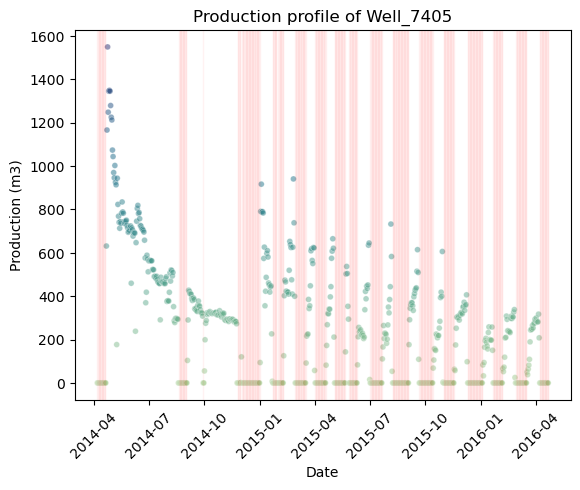

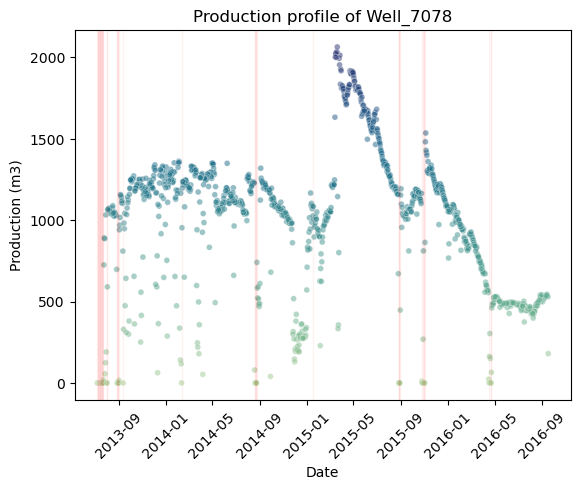

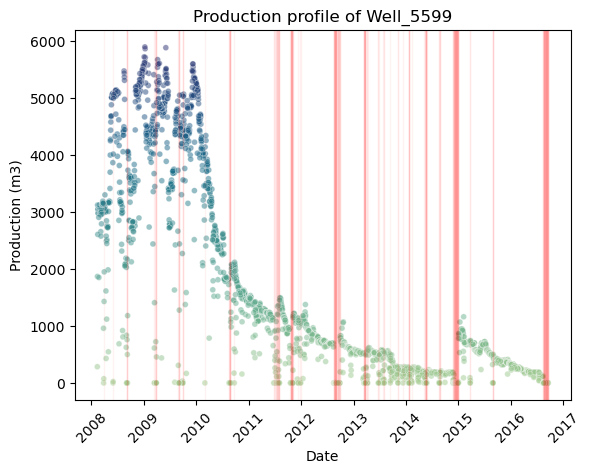

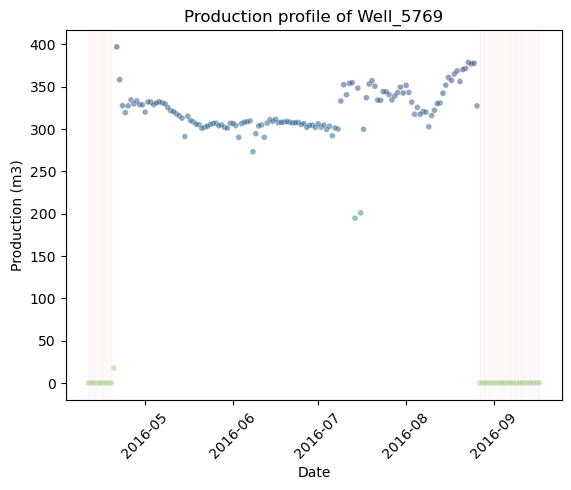

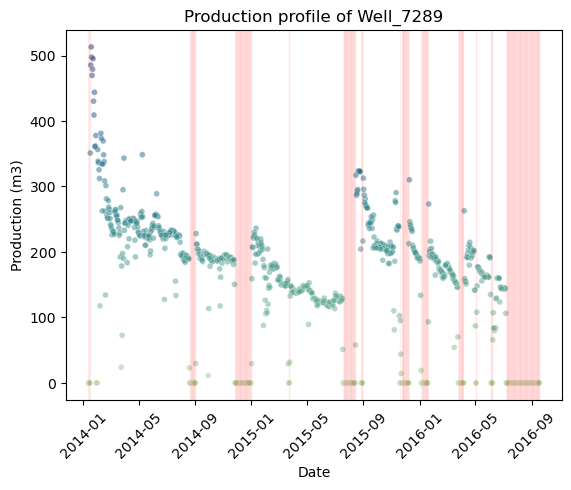

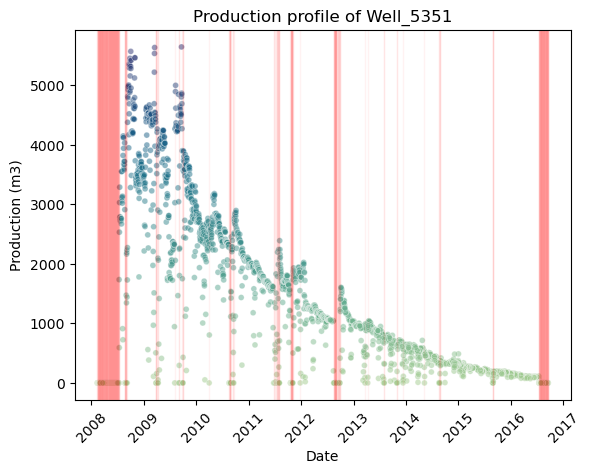

In [200]:
# Visualizing the production profile of all the wells...

for (well, df) in zip(well_df_dict.keys(), well_df_dict.values()):
    df_nf_dates = df[df.ON_STREAM_HRS == 0]["DATEPRD"]
    fig, ax_1 = plt.subplots()
    ax_1 = sns.scatterplot(x = df.DATEPRD, y = df.BORE_OIL_VOL, hue = df.BORE_OIL_VOL, 
                           palette = "crest", alpha = 0.5, legend = False, size = 1)
    plt.xticks(rotation = 45)
    for date in df_nf_dates:
        ax_1.axvline(date, color = "r" , linewidth = 1, alpha = 0.05)
    ax_1.set(title = f"Production profile of Well_{well}", xlabel = "Date", ylabel = "Production (m3)")
    fig_save(fig, f"Production profile of Well_{well}")

After visualizing the production profiles for all the wells, we choose the well 5351 for building our model as it has:
1. large number of sample points taken over a long period of time, and
2. its production follows the typical declining production trend seen in a typical oil well

In [201]:
df_5351 = well_df_dict[5351].copy()

# Cleaning the Dataset

In [202]:
df_5351.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3056 entries, 0 to 3055
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   3056 non-null   datetime64[ns]
 1   ON_STREAM_HRS             3056 non-null   float64       
 2   AVG_DOWNHOLE_PRESSURE     3050 non-null   float64       
 3   AVG_DOWNHOLE_TEMPERATURE  3050 non-null   float64       
 4   AVG_CHOKE_SIZE_P          2860 non-null   float64       
 5   AVG_WHP_P                 3056 non-null   float64       
 6   AVG_WHT_P                 3056 non-null   float64       
 7   DP_CHOKE_SIZE             3056 non-null   float64       
 8   BORE_OIL_VOL              3056 non-null   float64       
 9   BORE_GAS_VOL              3056 non-null   float64       
 10  BORE_WAT_VOL              3056 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 262.8 KB


For modelling purposes, we will only keep the entries in which the well flowed for the entire day, i.e. ON_STREAM_HRS == 24.

AVG_CHOKE_SIZE_P feature has 196 nan values. We'll drop the instances with no choke size values.

AVG_DOWNHOLE_PRESSURE and AVG_DOWNHOLE_TEMPERATURE both have 6 nan values within common instances. This is probably due to some sensor error as the production is non-zero in these instances. We'll also drop these instances.

In [203]:
## Removing Dates on which the well flowed for less than 24 hours from the dataset
df_5351.drop(index = list(df_5351[df_5351.ON_STREAM_HRS != 24].index), axis = 0, inplace = True)

## Removing Dates on which the well produced zero m3 oil from the dataset
df_5351.drop(index = list(df_5351[df_5351.BORE_OIL_VOL == 0].index), axis = 0, inplace = True)

## Removing Instances with null values in CHOKE Size and Downhole Pressure/Temp
df_5351.drop(index = list(df_5351[pd.isna(df_5351.AVG_CHOKE_SIZE_P)].index), axis = 0, inplace = True)
df_5351.drop(index = list(df_5351[pd.isna(df_5351.AVG_DOWNHOLE_PRESSURE)].index), axis = 0, inplace = True)

df_5351.reset_index(drop = True, inplace = True)

In [204]:
df_5351.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2367 entries, 0 to 2366
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   2367 non-null   datetime64[ns]
 1   ON_STREAM_HRS             2367 non-null   float64       
 2   AVG_DOWNHOLE_PRESSURE     2367 non-null   float64       
 3   AVG_DOWNHOLE_TEMPERATURE  2367 non-null   float64       
 4   AVG_CHOKE_SIZE_P          2367 non-null   float64       
 5   AVG_WHP_P                 2367 non-null   float64       
 6   AVG_WHT_P                 2367 non-null   float64       
 7   DP_CHOKE_SIZE             2367 non-null   float64       
 8   BORE_OIL_VOL              2367 non-null   float64       
 9   BORE_GAS_VOL              2367 non-null   float64       
 10  BORE_WAT_VOL              2367 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 203.5 KB


In [205]:
df_5351.describe()

ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  \
count         2367.0            2367.000000               2367.000000   
mean            24.0             246.740684                101.912049   
std              0.0              22.030419                  7.191018   
min             24.0               0.000000                  0.000000   
25%             24.0             240.281009                 99.789967   
50%             24.0             246.635570                101.560790   
75%             24.0             261.491514                105.135537   
max             24.0             281.304566                106.772733   

       AVG_CHOKE_SIZE_P    AVG_WHP_P    AVG_WHT_P  DP_CHOKE_SIZE  \
count       2367.000000  2367.000000  2367.000000    2367.000000   
mean          76.701626    42.690061    86.613436      12.689218   
std           26.376037    17.434284     4.091846      15.864699   
min            7.957581     0.000000    52.381899       1.450701   
25%           48.161902    31.304036    86.022461       2.367771   
50%           97.916667    33.111125    87.644353       4.443315   
75%          100.000000    47.894232    88.820941      14.938256   
max          100.000000   115.061175    93.509584      82.889579   

       BORE_OIL_VOL   BORE_GAS_VOL  BORE_WAT_VOL  
count    2367.00000    2367.000000   2367.000000  
mean     1486.04706  218064.741060   2757.716193  
std      1309.28993  184734.098763   1228.125435  
min        92.30000   12281.250000     -0.950000  
25%       333.84500   51686.735000   2572.305000  
50%      1056.14000  167338.200000   3185.470000  
75%      2332.03000  336003.095000   3529.780000  
max      5644.37000  789974.730000   5267.370000

In [206]:
## Since the Well head Pressure can't be zero for non-zero oil production, we are replacing it with the median value
df_5351.loc[df_5351[df_5351.AVG_WHP_P <= 1].index, "AVG_WHP_P"] = df_5351.AVG_WHP_P.median()

## Similarly, since the Downhole Pressure and Temperature can't be zero for non-zero oil production, 
## we are replacing it with the median value
df_5351.loc[df_5351[df_5351.AVG_DOWNHOLE_PRESSURE == 0].index, "AVG_DOWNHOLE_PRESSURE"] = df_5351.AVG_DOWNHOLE_PRESSURE.median()
df_5351.loc[df_5351[df_5351.AVG_DOWNHOLE_TEMPERATURE == 0].index, "AVG_DOWNHOLE_TEMPERATURE"] = df_5351.AVG_DOWNHOLE_TEMPERATURE.median()

In [207]:
df_5351.describe()

ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  \
count         2367.0            2367.000000               2367.000000   
mean            24.0             247.678462                102.298212   
std              0.0              15.902050                  3.471971   
min             24.0              96.608705                 39.768824   
25%             24.0             240.376652                 99.828246   
50%             24.0             246.635570                101.560790   
75%             24.0             261.491514                105.135537   
max             24.0             281.304566                106.772733   

       AVG_CHOKE_SIZE_P    AVG_WHP_P    AVG_WHT_P  DP_CHOKE_SIZE  \
count       2367.000000  2367.000000  2367.000000    2367.000000   
mean          76.701626    42.704049    86.613436      12.689218   
std           26.376037    17.413287     4.091846      15.864699   
min            7.957581    27.185420    52.381899       1.450701   
25%           48.161902    31.308120    86.022461       2.367771   
50%           97.916667    33.111125    87.644353       4.443315   
75%          100.000000    47.894232    88.820941      14.938256   
max          100.000000   115.061175    93.509584      82.889579   

       BORE_OIL_VOL   BORE_GAS_VOL  BORE_WAT_VOL  
count    2367.00000    2367.000000   2367.000000  
mean     1486.04706  218064.741060   2757.716193  
std      1309.28993  184734.098763   1228.125435  
min        92.30000   12281.250000     -0.950000  
25%       333.84500   51686.735000   2572.305000  
50%      1056.14000  167338.200000   3185.470000  
75%      2332.03000  336003.095000   3529.780000  
max      5644.37000  789974.730000   5267.370000

In [208]:
## Sorting the values in ascending order wrt the date column

df_5351 = df_5351.sort_values(["DATEPRD"])
df_5351.reset_index(inplace = True, drop = True)

In [209]:
## Saving the cleaned 5351 well production data to excel file
working_df_path = dataset_path.parent / "working_df_v6.xlsx"
df_5351.to_excel(str(working_df_path), index = False)  ##index = False doesn't save the index

In [210]:
df = pd.read_excel(working_df_path)

We will use the average flow rate feature AVG_OIL_FLOW_RATE instead of BORE_OIL_VOL as the target variable as it is a more appropriate metric.

In [211]:
## Adding a field called AVG_OIL_FLOW_RATE

df["AVG_OIL_FLOW_RATE"] = df.BORE_OIL_VOL/df.ON_STREAM_HRS

In [212]:
df.head()

DATEPRD  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  \
0 2008-07-13             24             260.866875                103.292880   
1 2008-07-15             24             254.982785                103.967009   
2 2008-07-16             24             251.475921                104.210557   
3 2008-07-17             24             249.346191                104.339184   
4 2008-07-18             24             251.501571                104.333687   

   AVG_CHOKE_SIZE_P   AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  \
0         21.052993  100.714919  52.381899      69.539413       1735.26   
1         27.277954   98.649941  67.590753      66.948884       2532.21   
2         30.650552   95.658734  73.782251      63.663812       3030.71   
3         32.562537   93.585252  78.035440      61.337700       3288.08   
4         30.051586   96.222774  75.749887      64.305031       2780.06   

   BORE_GAS_VOL  BORE_WAT_VOL  AVG_OIL_FLOW_RATE  
0     252235.23          4.00          72.302500  
1     373786.28          5.84         105.508750  
2     447840.09          9.13         126.279583  
3     474614.43          7.58         137.003333  
4     410359.82         11.05         115.835833

In [213]:
## Defining a function to plot the Date vs Flow rate chart
def date_vs_prod(df, nf_plot = False):
    fig, ax_1 = plt.subplots()
    sns.scatterplot(data = df, x = "DATEPRD", y = "AVG_OIL_FLOW_RATE", hue = "AVG_OIL_FLOW_RATE", alpha = 0.5, size = 5, ax = ax_1,
                   legend = False, palette="crest")
    if nf_plot:
        nf_dates = df[df.ON_STREAM_HRS == 0]
        nf_dates = nf_dates.iloc[:,0].values
        for date in nf_dates:
            ax_1.axvline(date, color = "r" , linewidth = 1, alpha = 0.05)
    return fig

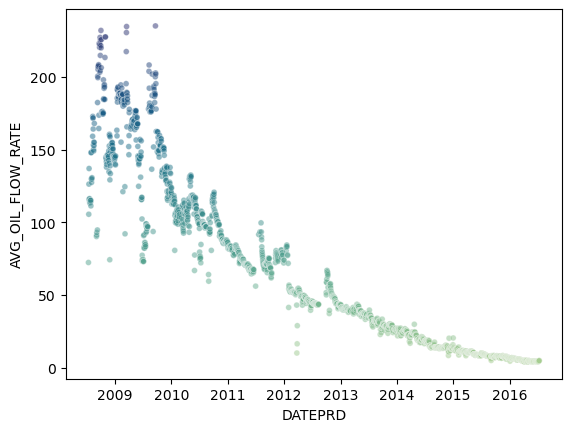

In [214]:
## Testing the above function
plot = date_vs_prod(df)

Now our data looks ready for EDA :)

## EDA

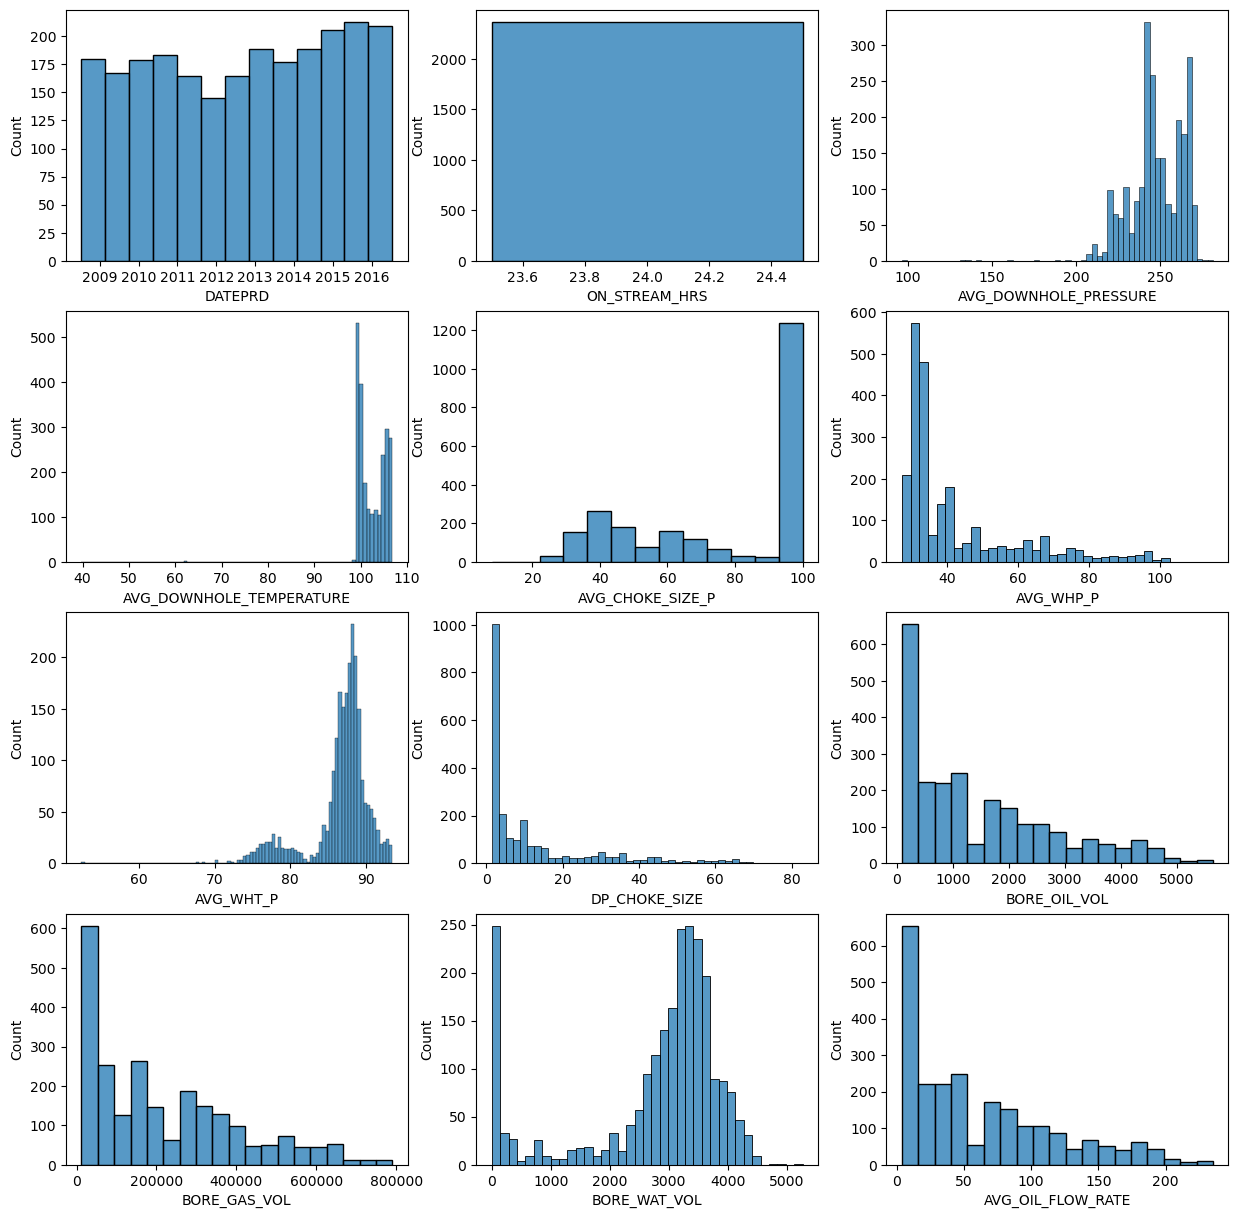

In [215]:
## Visualizing the distribution of the features in the dataset

cols = list(df.columns)
nrows = len(cols)/3 if len(cols)%3 == 0 else len(cols)//3+1
fig, ax = plt.subplots(nrows = int(nrows), ncols = 3, figsize = (15,15))
for index, (col, axis) in enumerate(zip(cols, ax.ravel())):
    sns.histplot(data=df, x = col, ax = axis)

C:\Users\spect\AppData\Local\Temp\ipykernel_12004\2013007748.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_corr.corr()


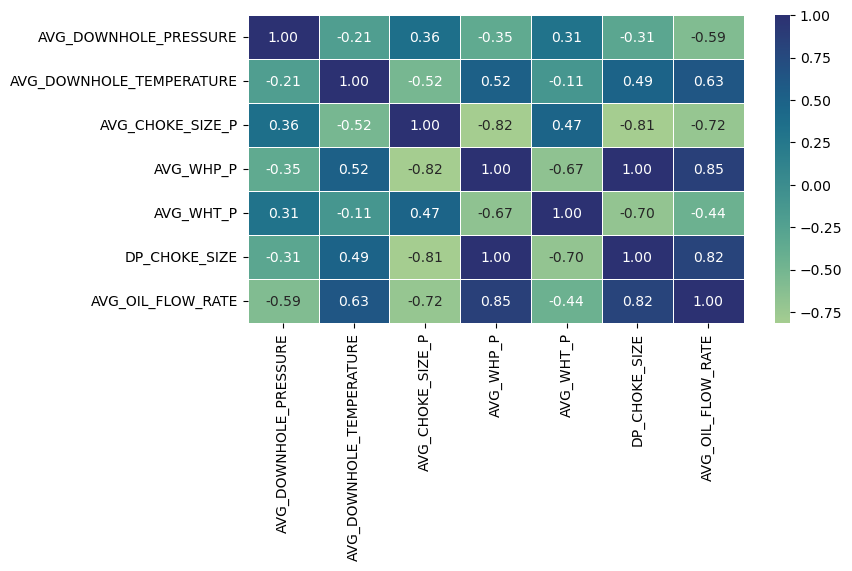

In [216]:
df_corr = df.drop(columns = ["ON_STREAM_HRS", "BORE_GAS_VOL", "BORE_WAT_VOL", "BORE_OIL_VOL"], axis = 1)
corr_matrix = df_corr.corr()
fig = plt.figure(figsize = (8,4))
ax = sns.heatmap(corr_matrix, annot = True, cmap = "crest", linewidth = 0.5, 
            annot_kws = {"fontsize": 10}, fmt=".2f")

The above boxplot shows that Wellhead Pressure, Choke Size, DP Choke and Oil Flow rate are all correlated with each other, which is to be expected.

As expected, Wellhead Pressure, DP across Choke, and Oil Flow rate are all positively correlated among themselves and negatively correlated with the Choke size. This is because choke size is kept low in high producing wells to maintain the drawdown. The choke size is gradually reduced as the production from the well decreases. Consequently, the pressure drop across the choke is high during the initial years. Also, during initial years when the well produces high volumes, the wellhead pressure is high. The scatter-plot below shows this relationship.

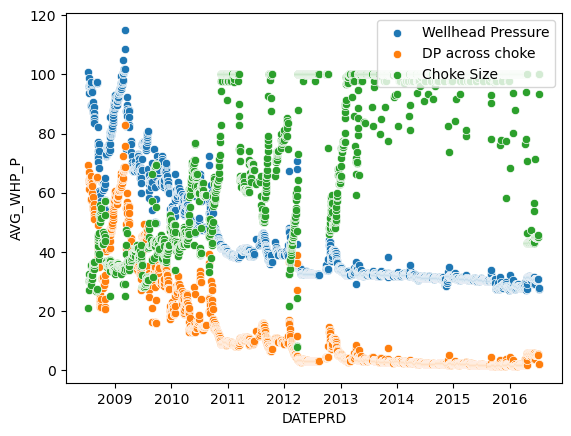

In [217]:
sns.scatterplot(data = df, x = "DATEPRD", y = "AVG_WHP_P", label = "Wellhead Pressure")
sns.scatterplot(data = df, x = "DATEPRD", y = "DP_CHOKE_SIZE", label = "DP across choke")
sns.scatterplot(data = df, x = "DATEPRD", y = "AVG_CHOKE_SIZE_P", label = "Choke Size")
plt.legend(loc = "upper right")

---

One interesting observation is that Well Head Temperature is not correlated with Downhole Temperature. Reasons for this are as follows:

The wellhead temperature of an oil well will be somewhat less than the BHT. The amount of cooling as crude flows to the surface will depend on several factors:

1. The relative amounts of oil and water
2. The specific heats of oil and water
3. The flow rate, the gas/liquid ratio
4. The vertical-flow pressure drop that controls the gas liberated and the attendant cooling effect, and the thermal heat transfer rate from the wellbore.

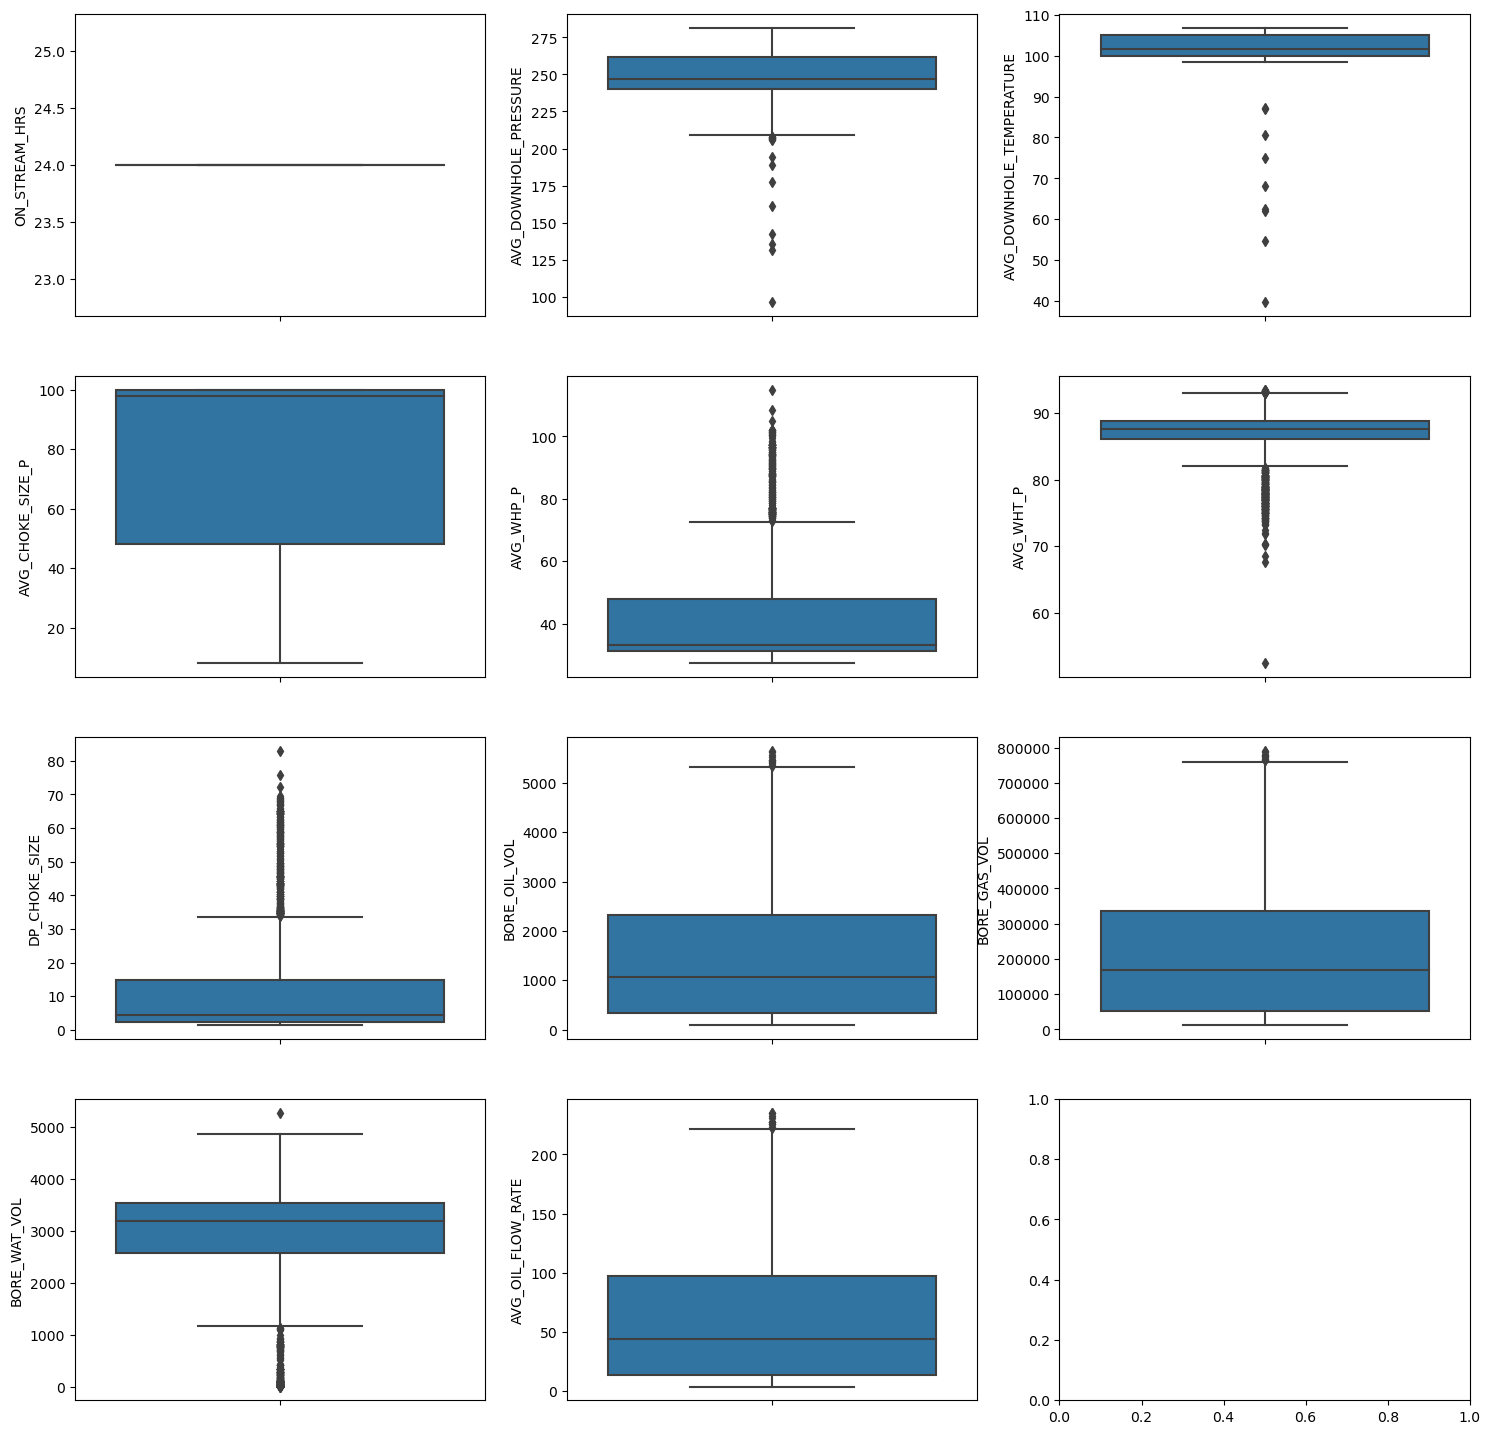

In [218]:
## Visualizing the distribution of the features in the dataset

cols = list(df.columns[1:])
nrows = len(cols)/3 if len(cols)%3 == 0 else len(cols)//3+1
fig, ax = plt.subplots(nrows = int(nrows), ncols = 3, figsize = (18,18))
for index, (col, axis) in enumerate(zip(cols, ax.ravel())):
    sns.boxplot(data=df, y = col, ax = axis)

***

Why are there so many values with low downhole temperatures? Is the well head temperature also low at those points? Do these points occur during the winters?

In [219]:
## Analysing the abnormally low values of downhole temperature (values less than 90 deg)

df_temp = df[(df.AVG_DOWNHOLE_TEMPERATURE < 90) & (df.AVG_DOWNHOLE_PRESSURE < 220)]
df_temp

DATEPRD  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  \
206  2009-04-04             24             142.195394   
210  2009-04-20             24             161.168309   
226  2009-05-11             24             131.509383   
431  2010-01-20             24             194.357709   
451  2010-02-10             24             188.629729   
1343 2013-05-15             24              96.608705   
1387 2013-07-08             24             211.485592   
1454 2013-09-29             24             135.625829   
1731 2014-08-29             24             177.673720   

      AVG_DOWNHOLE_TEMPERATURE  AVG_CHOKE_SIZE_P  AVG_WHP_P  AVG_WHT_P  \
206                  62.097413         36.915852  82.265890  79.017304   
210                  75.026294         38.396193  72.358102  78.249001   
226                  62.529313         41.256309  67.970132  80.122545   
431                  87.218937         49.241114  52.011679  86.076854   
451                  80.615963         41.727705  60.036823  89.643162   
1343                 39.768824        100.000000  34.031163  85.874968   
1387                 87.025056        100.000000  32.540497  89.268146   
1454                 54.760490        100.000000  32.486093  87.065948   
1731                 68.205620         99.290564  30.814119  86.924010   

      DP_CHOKE_SIZE  BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL  \
206       49.444290       4266.19     603057.78         39.67   
210       39.642990       3990.32     539753.59          2.50   
226       34.854465       4241.75     575312.38         18.76   
431       19.134864       2789.61     389180.91       2595.68   
451       27.782542       2521.73     355402.62       2616.02   
1343       4.874387        844.52     138409.00       3877.13   
1387       3.785294        852.38     132899.95       3609.61   
1454       2.992594        665.70      99793.64       3783.79   
1731       2.017607        374.02      67084.42       3095.61   

      AVG_OIL_FLOW_RATE  
206          177.757917  
210          166.263333  
226          176.739583  
431          116.233750  
451          105.072083  
1343          35.188333  
1387          35.515833  
1454          27.737500  
1731          15.584167

From the above table, it is observed that the low values of downhole temperature coexists with low values of downhole pressure. This indicates erroneous values being produced by the downhole equipment measuring the downhole pressure and temperature. Therefore, we are going to replace these values with median values.

In [220]:
## Replacing the outliers in Downhole Pressure and Downhole Temperature with their medians

temp_median = df["AVG_DOWNHOLE_TEMPERATURE"].median()
press_median = df["AVG_DOWNHOLE_PRESSURE"].median()
df["AVG_DOWNHOLE_TEMPERATURE"] = df.AVG_DOWNHOLE_TEMPERATURE.apply(lambda temp: temp_median if temp < 90 else temp)
df["AVG_DOWNHOLE_PRESSURE"] = df.AVG_DOWNHOLE_PRESSURE.apply(lambda press: press_median if press < 220 else press)

***

Doing seasonality analysis on the oil volume produced using FFT

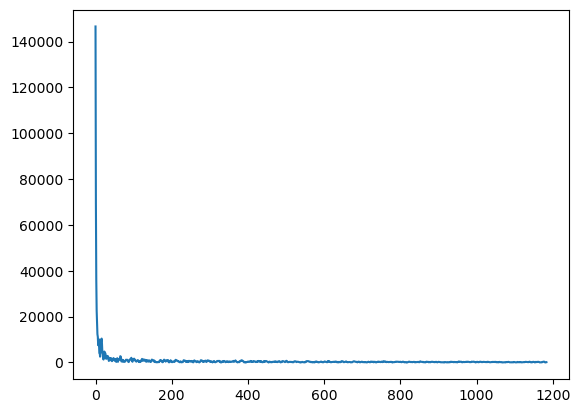

In [221]:
freq = tf.signal.rfft(df.AVG_OIL_FLOW_RATE)
plt.plot(np.abs(freq)[:10000])

The above graph shows that there is no seasonal trend in the oil production volume

***

Analysing the correlation between wellhead pressure and oil flow rate

<AxesSubplot: xlabel='AVG_WHP_P', ylabel='AVG_OIL_FLOW_RATE'>

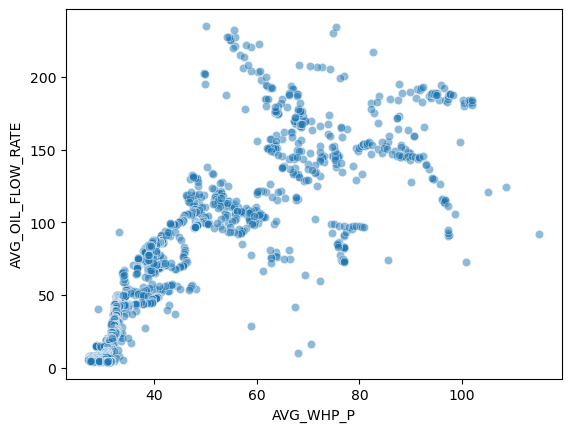

In [222]:
sns.scatterplot(x = df.AVG_WHP_P, y = df.AVG_OIL_FLOW_RATE, alpha = 0.5)

Analysing Wellhead Pressure vs Oil Flow Rate on yearwise basis for more in-depth analysis

In [223]:
df_temp = df.copy()
df_temp["Year"] = df_temp.DATEPRD.apply(lambda x: x.year)

In [224]:
years = np.unique(df_temp.Year)
years

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype=int64)

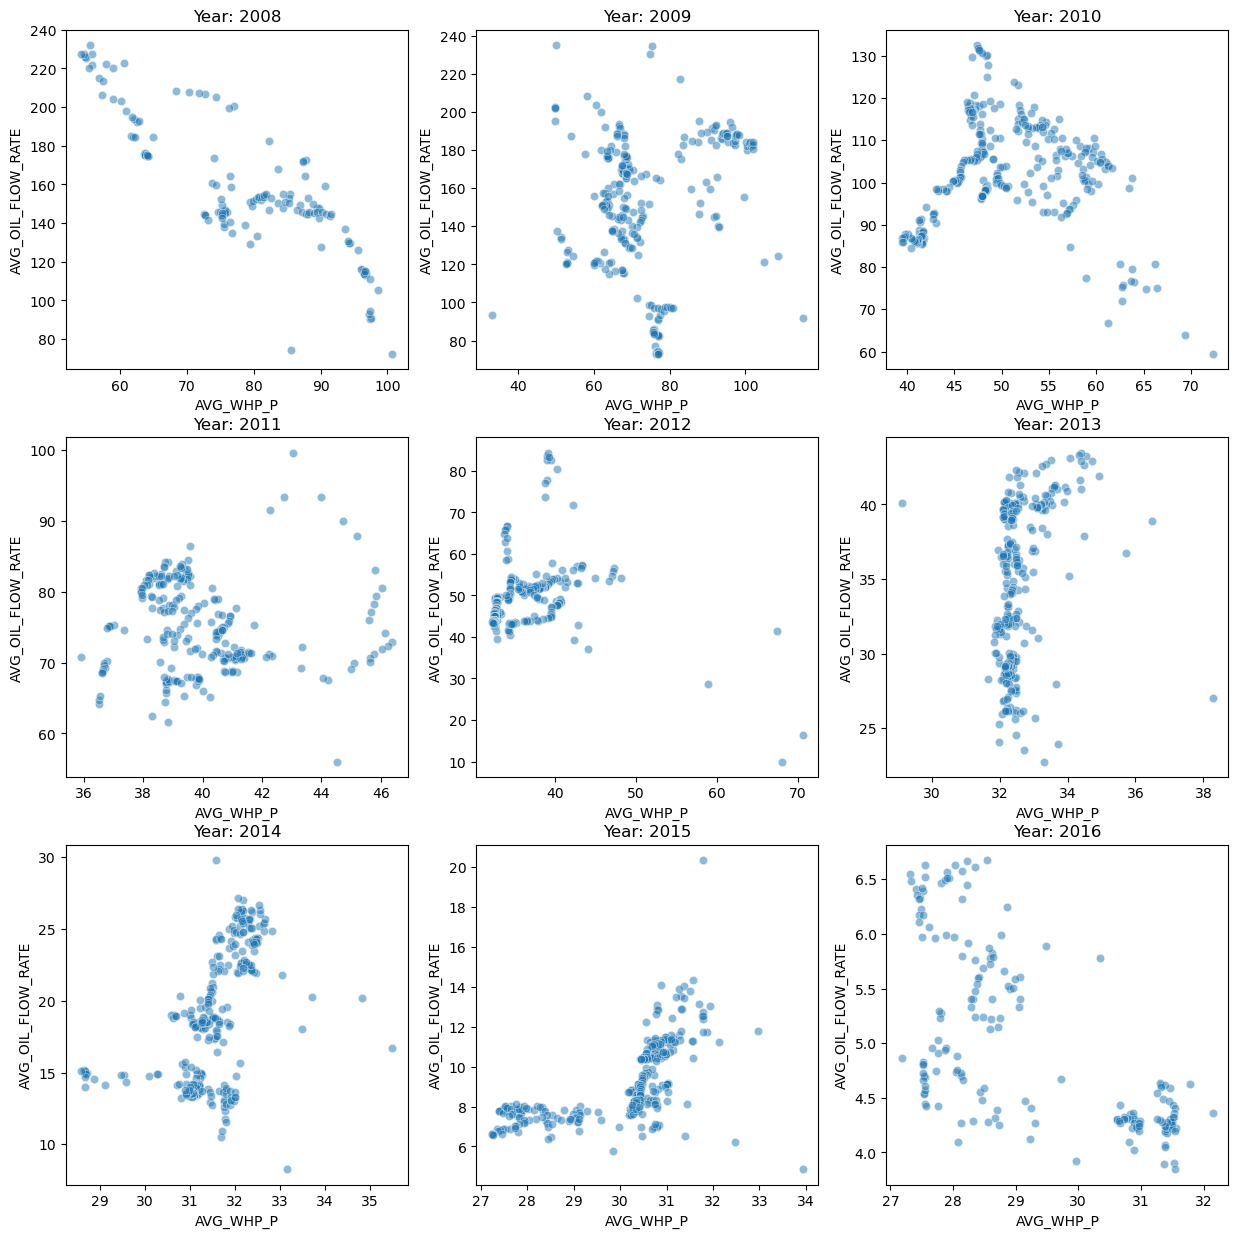

In [225]:
fig, ax = plt.subplots(nrows = 3, ncols= 3, figsize = (15,15))
for (year, axis) in zip(years, ax.ravel()):
    df_year = df_temp[df_temp.Year == year]
    sns.scatterplot(data = df_year, x = "AVG_WHP_P", y = "AVG_OIL_FLOW_RATE", alpha = 0.5, ax=axis, )
    axis.set(title = f"Year: {year}")

From the above plots, we can see that the high wellhead pressure datapoints (>80) mostly lie in the year 2008-09 plots, when the reservoir was young, and producing high volumes of oil. As the time has progressed, the oil volume has also decreased alongwith the wellhead pressure. 

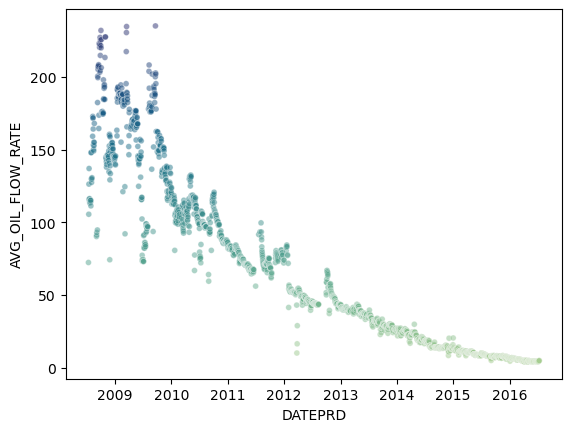

In [226]:
date_vs_prod(df)
plt.show()

***

# Modelling

### Preparing a function to apply all the pre-processing steps in a single go

In [227]:
def preprocessor(df_, train_start_date, val_date, test_date, DATEPROD = True, 
                 Day_col = False, Month_col = False, Year_col = False, scale = True):
    
    """
    Function for performing all the preprocessing steps in one go
    """
    
    # Creating a copy of the passed dataset so that the original dataset is not modified
    df = df_.copy()
    
    ## Removing Dates on which the well flowed for zero hours from the dataset
    df.drop(index = list(df[df.ON_STREAM_HRS == 0].index), axis = 0, inplace = True)
    df.reset_index(drop = True, inplace = True)
    
    ## Dropping the date points where the oil volume produced is equal to zero
    df.drop(index = list(df[df.BORE_OIL_VOL == 0].index), axis = 0, inplace = True)
    df.reset_index(drop = True, inplace = True)
    
    ## Some data points have ON_STREAM_HRS > 24...setting them to 24
    for index in df[df.ON_STREAM_HRS > 24].index:
        df.loc[index, "ON_STREAM_HRS"] = 24
    
    # Breaking the DATEPRD column into Day, Month and Year columns
    if Day_col:
        df["Day"] = df.DATEPRD.dt.day
    if Month_col:
        df["Month"] = df.DATEPRD.dt.month
    if Year_col:
        df["Year"] = df.DATEPRD.dt.year

    ## Removing features which are not needed
    features_x = ["ON_STREAM_HRS", 'BORE_GAS_VOL', 'BORE_WAT_VOL', "BORE_OIL_VOL"]
    df = df.drop(columns = features_x, axis = 1)
    
    ## Plotting graphs for visualizing the points taken into consideration while building the training, validation and 
    ## test datasets
    date_vs_prod(df)
    plt.axvline(pd.to_datetime(train_start_date), linestyle = "dotted", color = "orange")
    plt.axvline(pd.to_datetime(val_date), linestyle = "dotted", color = "orange")
    plt.axvline(pd.to_datetime(test_date), linestyle = "dotted", color = "orange")
    plt.title("ALL DATA POINTS")
    date_vs_prod(df[df.DATEPRD >= pd.to_datetime(train_start_date)])
    plt.axvline(pd.to_datetime(train_start_date), linestyle = "dotted", color = "orange")
    plt.axvline(pd.to_datetime(val_date), linestyle = "dotted", color = "orange")
    plt.axvline(pd.to_datetime(test_date), linestyle = "dotted", color = "orange")
    plt.title("DATA POINTS CONSIDERED")
    
    # Training dataset is taken to be all the data points after train_start_date and before val_date
    # Validation and testing dataset is taken to be all the data points after val_date
    df_train = df[(df.DATEPRD >= pd.to_datetime(train_start_date)) & (df.DATEPRD < pd.to_datetime(val_date))].copy()
    df_val_test = df[df.DATEPRD >= pd.to_datetime(val_date)].copy()
    
    features_list = list(df_train.columns)
    features_list.remove("AVG_OIL_FLOW_RATE")

    y_train = df_train["AVG_OIL_FLOW_RATE"]
    X_train = df_train.loc[:,features_list]

    df_val = df_val_test[df_val_test.DATEPRD < pd.to_datetime(test_date)]
    df_test = df_val_test[df_val_test.DATEPRD >= pd.to_datetime(test_date)]

    y_val = df_val["AVG_OIL_FLOW_RATE"]
    X_val = df_val.loc[:,features_list]

    y_test = df_test["AVG_OIL_FLOW_RATE"]
    X_test = df_test.loc[:,features_list]
    
    # Dropping DATEPROD col
    if DATEPROD:
        for df_ in [X_train, X_val, X_test]:
            df_.drop(["DATEPRD"], axis = 1, inplace = True)
    features_ = list(X_train.columns)
    print(f" Features in the output datasets: {features_}")
    
    # Scaling the data using StandardScaler from sklearn
    if scale:
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_val = scaler.transform(X_val)
        X_test = scaler.transform(X_test)
    
    # Printing the length of X_train, X_val and X_test datasets
    print(f"Total data points taken for training/validation/testing: {len(X_train) + len(X_val) + len(X_test)}")
    for X_name, X_df in zip(["Train", "Validation", "Test"], [X_train, X_val, X_test]):
        print(f"Data points in {X_name} are: {len(X_df)}")
    
    return (features_, X_train, y_train, X_val, y_val, X_test, y_test)

In [228]:
## Function for plotting predicted values vs actual values

def predict_plot(actual, predicted, fig_title = ""):
    """
    predict_plot(actual_values, predicted_values)
    """
    import matplotlib as mpl
    cmap = mpl.cm.get_cmap("cividis")
    fig, ax = plt.subplots(nrows = 1, ncols = 1)
    ax.scatter(actual, predicted, alpha = 0.2 , c = cmap((np.abs(actual)-np.abs(predicted))/np.abs(actual)))
    ax.set_xlabel("Actual values")
    ax.set_ylabel("Predicted values")
    ax.plot(np.linspace(actual.min(), actual.max(), 100), np.linspace(actual.min(), actual.max(), 100), "r--")
    ax.set_title(fig_title)
    sm = mpl.cm.ScalarMappable(cmap = cmap)
    cbar = plt.colorbar(sm)
    cbar.set_label('Error in predictions scaled to [0,1]', rotation=270)
    cbar.ax.set_yticklabels(['0','','','',"",'1'])
    plt.show()

### Preparing the data and trying non-time series models (linear, SVM, ensembles, NN)

In [229]:
df.DATEPRD

0      2008-07-13
1      2008-07-15
2      2008-07-16
3      2008-07-17
4      2008-07-18
          ...    
2362   2016-07-06
2363   2016-07-07
2364   2016-07-08
2365   2016-07-10
2366   2016-07-12
Name: DATEPRD, Length: 2367, dtype: datetime64[ns]

 Features in the output datasets: ['AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE']
Total data points taken for training/validation/testing: 1128
Data points in Train are: 606
Data points in Validation are: 255
Data points in Test are: 267


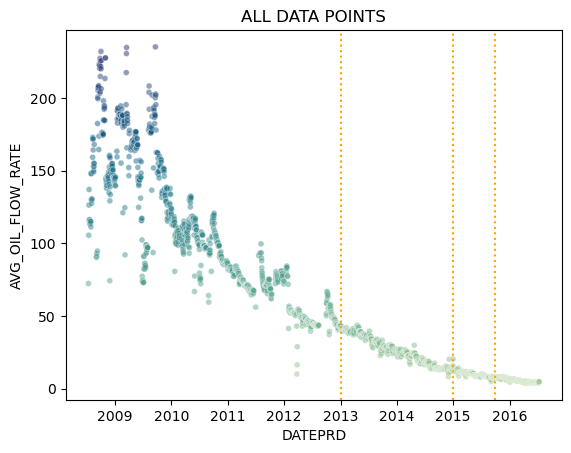

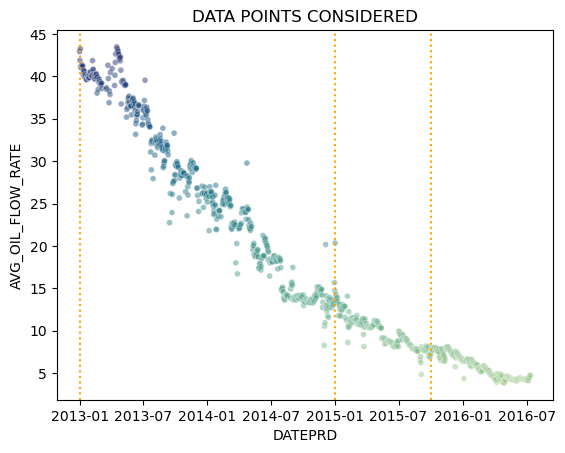

In [366]:
(features, X_train, y_train, X_val, y_val, X_test, y_test) = preprocessor(df, train_start_date="01/01/2013",
                                                             val_date = "01/01/2015", test_date = "10/01/2015",
                                                               Day_col = False, Month_col = False, Year_col = False)

***

Analysing the final dataset (train + val + test) features mean and standard distribution

In [367]:
df_sub = df[df.DATEPRD >= pd.to_datetime("01/01/2013")]

In [368]:
df_stats = df_sub.describe()
df_stats = df_stats.loc[["mean", "std"], :].T
df_stats

mean           std
ON_STREAM_HRS                24.000000      0.000000
AVG_DOWNHOLE_PRESSURE       258.891088      8.884908
AVG_DOWNHOLE_TEMPERATURE     99.959107      0.531947
AVG_CHOKE_SIZE_P             94.787781     14.179761
AVG_WHP_P                    30.999350      1.614033
AVG_WHT_P                    87.622523      1.231771
DP_CHOKE_SIZE                 2.675918      1.060819
BORE_OIL_VOL                423.007021    278.756401
BORE_GAS_VOL              64778.702243  43839.026441
BORE_WAT_VOL               3351.180860    301.244042
AVG_OIL_FLOW_RATE            17.625293     11.614850

***

## Implementing Decline Curve Analysis (DCA)

In [369]:
from scipy.optimize import curve_fit   #Importing the curve fit function from scipy package

def hyperbolic_equation(t, qi, b, di):
    """
    Hyperbolic decline curve equation
    Arguments:
        t: Float. Time since the well first came online, can be in various units 
        (days, months, etc) so long as they are consistent.
        qi: Float. Initial production rate when well first came online.
        b: Float. Hyperbolic decline constant
        di: Float. Nominal decline rate at time t=0
    Output: 
        Returns q, or the expected production rate at time t. Float.
    """
    return qi/((1.0+b*di*t)**(1.0/b))

def exponential_equation(t, qi, di):
    """
    Exponential decline curve equation
    Arguments:
        t: Float. Time since the well first came online, can be in various units 
        (days, months, etc) so long as they are consistent.
        qi: Float. Initial production rate when well first came online.
        di: Float. Nominal decline rate (constant)
    Output: 
        Returns q, or the expected production rate at time t. Float.
    """
    return qi*np.exp(-di*t)

def dca_plotter(flow_rates):
    """
    Plots DCA curves hyperbolic and exponential. Returns the constants of hyperbolic curve equation [qi_h, b, di_h]
    
    """

    def get_max_initial_production(flow_rates, number_days):
        return flow_rates[:number_days].max()
    
    def hyp_exp_plot(flow_rates, hyp_curve_fit, exp_curve_fit):
        """
        exp_curve_fit = [qi, di]
        hyp_curve_fit = [qi, b, di]
        """
        [qi_e, di_e] = exp_curve_fit
        [qi_h, b, di_h] = hyp_curve_fit
        
        fig = plt.figure(figsize = (10, 5))
        
        x = np.arange(len(flow_rates))
        fig = sns.scatterplot(x = x, y = flow_rates, label = "Flow Rate", color = "red", alpha = 0.8)
        fig = plt.plot(x, hyperbolic_equation(x, qi_h, b, di_h), label = f"Hyperbolic with b={b:.2E}",
                       color = "blue", linestyle = "dashed")
        fig = plt.plot(x, exponential_equation(x, qi_e, di_e), label = "Exponential", linestyle = "dashed", color = "k")
        plt.legend()
        return fig
    
    ## Getting the qi value
    qi = get_max_initial_production(flow_rates, 120)

    exp_values, exp_std = curve_fit(exponential_equation, np.arange(len(flow_rates)), flow_rates, bounds = (0, [qi, 100]))
    hyp_values, hyp_std = curve_fit(hyperbolic_equation, np.arange(len(flow_rates)), flow_rates, bounds = (0, [qi, 1, 100]))
    
    print(f"For exponential curve: qi = {exp_values[0]}, di = {exp_values[1]}")
    print(f"For hyperbolic curve: qi = {hyp_values[0]}, b = {hyp_values[1]}, di = {hyp_values[2]}")
    
    hyp_exp_plot(flow_rates, hyp_values, exp_values)
    
    return hyp_values

C:\Users\spect\AppData\Local\Temp\ipykernel_12004\102634527.py:37: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return flow_rates[:number_days].max()


For exponential curve: qi = 42.920034519950654, di = 50.0
For hyperbolic curve: qi = 43.46833333333333, b = 2.7885265147324066e-12, di = 0.0018841636956655782


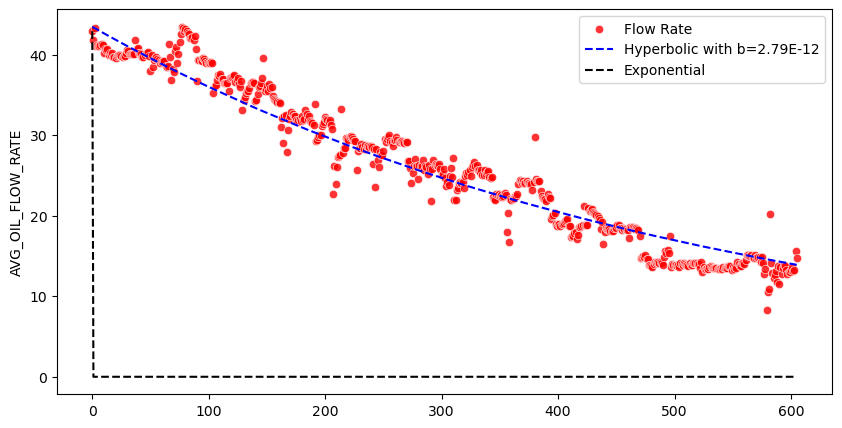

In [370]:
hyp_values = dca_plotter(y_train)

MSE for DCA Hyperbolic curve on training data: 4.54
MSE for DCA Hyperbolic curve on validation data: 2.20


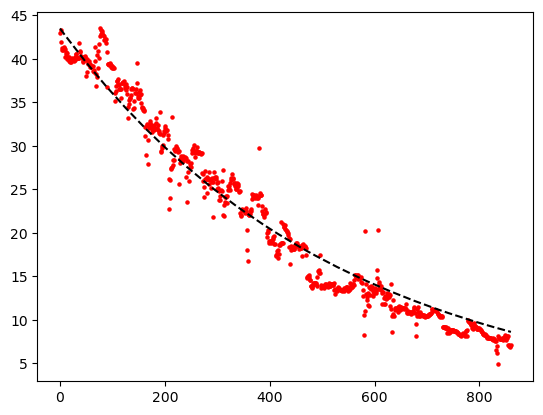

In [371]:
## Testing the hyperbolic equation obtained on training + validation data

from sklearn.metrics import mean_squared_error

Y = np.r_[y_train, y_val]
x = np.arange(len(Y))

[qi, b, di] = hyp_values

hyp = hyperbolic_equation(x, qi, b, di)
plt.scatter(x = x, y = Y, s = 5, color = "red")
plt.plot(x, hyp, linestyle = "dashed", color = "k")

## Calculating the MSE if we only use DCA for flowrate prediction

hyp_train_pred = hyp[:len(y_train)]
hyp_val_pred = hyp[len(y_train):]

hyp_train_mse = mean_squared_error(y_train, hyp_train_pred)
hyp_val_mse = mean_squared_error(y_val, hyp_val_pred)

print(f"MSE for DCA Hyperbolic curve on training data: {hyp_train_mse:.2f}")
print(f"MSE for DCA Hyperbolic curve on validation data: {hyp_val_mse:.2f}")

In [372]:
from sklearn.metrics import r2_score
r2_dca_train = r2_score(y_train, hyp_train_pred)
r2_dca_val = r2_score(y_val, hyp_val_pred)

print(f"R2 for DCA Hyperbolic curve on training data: {r2_dca_train:.2f}")
print(f"R2 for DCA Hyperbolic curve on validation data: {r2_dca_val:.2f}")

R2 for DCA Hyperbolic curve on training data: 0.95
R2 for DCA Hyperbolic curve on validation data: 0.34


The Hyperbolic equation obtained from decline curve analysis fits the data points on the training and validation data very well

Thus, the hyperbolic equation can be used to check the performance of our models

### Including the flow rates as predicted by DCA in the training, validation, and test data

The DCA will only be fitted on the training data for model selection and training+validation data for test data performance evaluation

Here, we will fit the DCA only on the training data and then use the hyperbolic equation obtained to get predicted flow rates

In [373]:
## Run this code block if the DCA feature is not to be included...otherwise, run the next code block

X_train_dca = X_train.copy()
X_val_dca = X_val.copy()
X_test_dca = X_test.copy()

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

[qi, b, di] = hyp_values  ##hyp_values is obtained by fitting the curve using dca_plotter() function

X_ = np.r_[X_train, X_val, X_test]
hyp_q = hyperbolic_equation(np.arange(len(X_)), qi, b, di)
hyp_q_scaled = scaler.fit_transform(hyp_q.reshape(-1, 1))
X_ = np.c_[X_, hyp_q_scaled]

X_train_dca = X_[:len(X_train), :]
X_val_dca = X_[len(X_train):(len(X_val)+len(X_train)), :]
X_test_dca = X_[(len(X_train) + len(X_val)):, :]

## Modifying the features list to include the DCA column feature name
if features.count("DCA_FLOW_RATE") == 0:
    features = features + ["DCA_FLOW_RATE"]

In [350]:
X_train_dca.shape, X_val_dca.shape, X_test_dca.shape

((606, 6), (255, 6), (267, 6))

In [351]:
features

['AVG_DOWNHOLE_PRESSURE',
 'AVG_DOWNHOLE_TEMPERATURE',
 'AVG_CHOKE_SIZE_P',
 'AVG_WHP_P',
 'AVG_WHT_P',
 'DP_CHOKE_SIZE']

***

Performing a final correlation analysis on the training and validation data

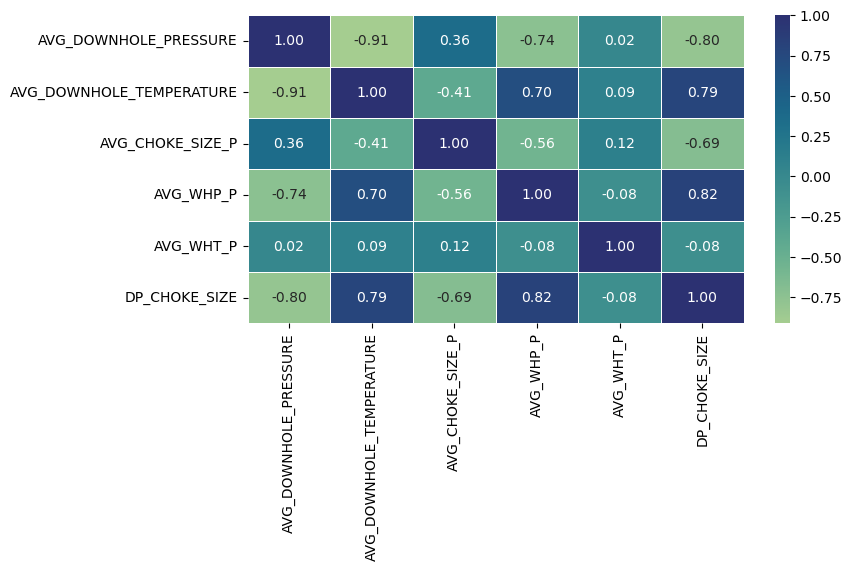

In [352]:
X_ = np.r_[X_train_dca, X_val_dca]
df_ = pd.DataFrame(X_, columns=features)
df_corr = df_.corr()
fig = plt.figure(figsize = (8,4))
ax = sns.heatmap(df_corr, annot = True, cmap = "crest", linewidth = 0.5, 
            annot_kws = {"fontsize": 10}, fmt=".2f")

***

### Creating a function to remove some specified features from a dataset

In [305]:
def feature_subsetter(features_list, features_sub, X_train, X_val, X_test):
    """
    `features_list` is a list containing the names of all the features. The order of the features in this list should 
        necessarily be the same to the order of the feautres in the dataset.
    `features_sub` is a list containing the names of the features to be kept. All other features will be removed.
    
    Return X_train, X_val, X_test
    """
    if len(features_list) != X_train.shape[1]:
        print(f"Error...no. of features in features list is {len(features_list)} and its not matching with the no. of columns in X_train {X_train.shape[1]}")
        
    features_sub_index = [features_list.index(f) for f in features_sub]

    ## Subsetting the original arrays
    X_train = X_train[:, features_sub_index]
    X_val = X_val[:, features_sub_index]
    X_test = X_test[:, features_sub_index]
    return X_train, X_val, X_test

In [328]:
features_sub = ['AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_CHOKE_SIZE_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE']
X_train_dca, X_val_dca, X_test_dca = feature_subsetter(features,  features_sub, X_train_dca, X_val_dca, X_test_dca)

In [353]:
X_train_dca.shape, X_val_dca.shape, X_test_dca.shape

((606, 6), (255, 6), (267, 6))

In [354]:
features = features_sub

***

## 1. Trying Linear Models

### SGD Regressor

In [374]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
sgd.fit(X_train_dca, y_train)

SGDRegressor()

In [375]:
## Hyperparameter tuning SGD Regressor

from sklearn.model_selection import GridSearchCV
param_grid = {"l1_ratio": np.linspace(0,1,11),
             "alpha" : np.logspace(-3,2,11)}
sgd_grid = GridSearchCV(estimator = sgd, param_grid = param_grid, scoring = "neg_mean_squared_error", n_jobs = -1, 
                       verbose = 2, cv = 5)
sgd_grid.fit(X_train_dca, y_train)

Fitting 5 folds for each of 121 candidates, totalling 605 fits


GridSearchCV(cv=5, estimator=SGDRegressor(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02]),
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             scoring='neg_mean_squared_error', verbose=2)

In [376]:
sgd_grid.best_params_

{'alpha': 0.1, 'l1_ratio': 0.5}

In [377]:
## Setting the sgd equal to the best estimator found using grid search
sgd_best = sgd_grid.best_estimator_

In [378]:
## Training Error
mean_squared_error(y_train, sgd_best.predict(X_train_dca))

4.458868663712089

In [379]:
## R2 score for training dataset
r2_score(y_train, sgd_best.predict(X_train_dca))

0.9498402114711191

In [380]:
## Validation error
mean_squared_error(y_val, sgd_best.predict(X_val_dca))

1.4735581692033555

In [381]:
## R2 score for validation dataset
r2_score(y_val, sgd_best.predict(X_val_dca))

0.5581276582227941

C:\Users\spect\AppData\Local\Temp\ipykernel_12004\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_12004\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


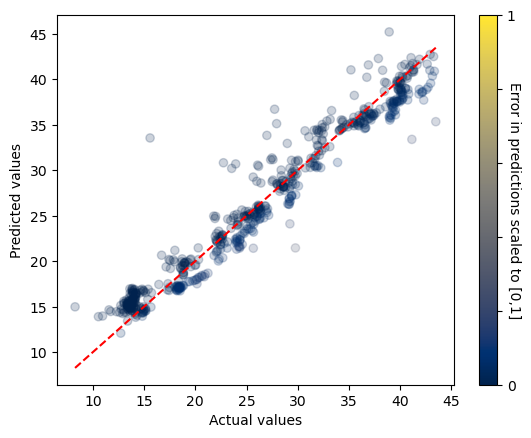

In [382]:
predict_plot(y_train, sgd_best.predict(X_train_dca))

C:\Users\spect\AppData\Local\Temp\ipykernel_12004\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_12004\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


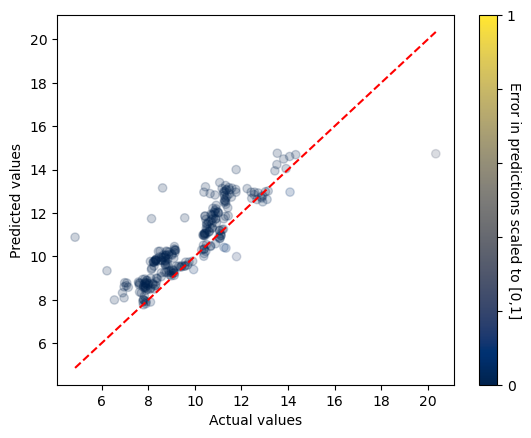

In [383]:
predict_plot(y_val, sgd_best.predict(X_val_dca))

<AxesSubplot: >

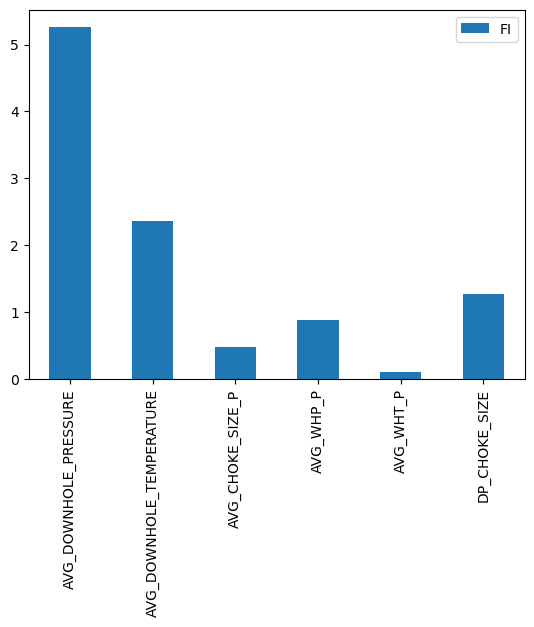

In [384]:
fi_df = pd.DataFrame(data = np.abs(sgd_best.coef_), index = features, columns = ["FI"])
fi_df.plot.bar()

***

## 2. Trying SVM

### 2.1 SVM RBF Kernel

In [385]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train_dca, y_train)

SVR()

In [386]:
mean_squared_error(y_val, svr.predict(X_val_dca))

21.906080223157367

In [387]:
mean_squared_error(y_train, svr.predict(X_train_dca))

4.952164350296506

C:\Users\spect\AppData\Local\Temp\ipykernel_12004\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_12004\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


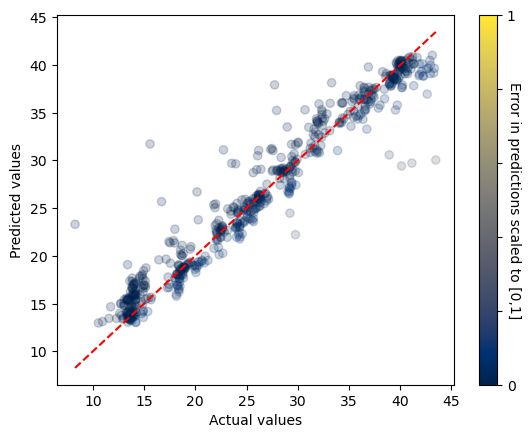

In [388]:
predict_plot(y_train, svr.predict(X_train_dca))

C:\Users\spect\AppData\Local\Temp\ipykernel_12004\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_12004\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


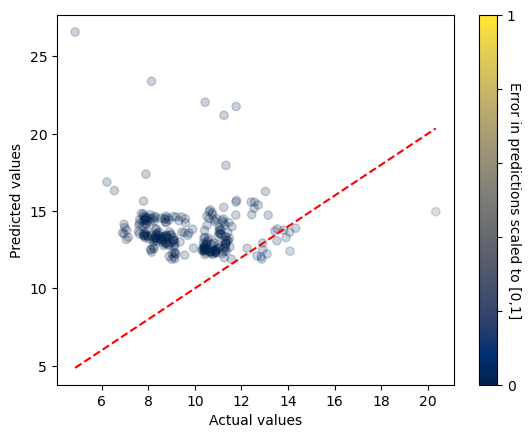

In [389]:
predict_plot(y_val, svr.predict(X_val_dca))

### 2.2 SVM Poly kernel

Degree = 3

In [390]:
from sklearn.svm import SVR
svm_poly_3 = SVR(kernel = "poly", degree = 3)
svm_poly_3.fit(X_train_dca, y_train)

SVR(kernel='poly')

In [391]:
mean_squared_error(y_val, svm_poly_3.predict(X_val_dca))

436.07965637160214

In [392]:
mean_squared_error(y_train, svm_poly_3.predict(X_train_dca))

10.481949501512759

C:\Users\spect\AppData\Local\Temp\ipykernel_12004\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_12004\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


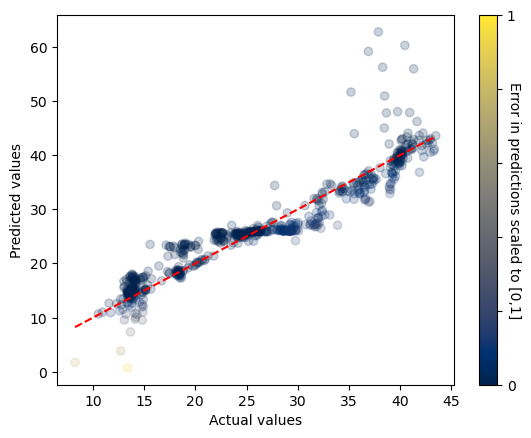

In [393]:
predict_plot(y_train, svm_poly_3.predict(X_train_dca))

C:\Users\spect\AppData\Local\Temp\ipykernel_12004\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_12004\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


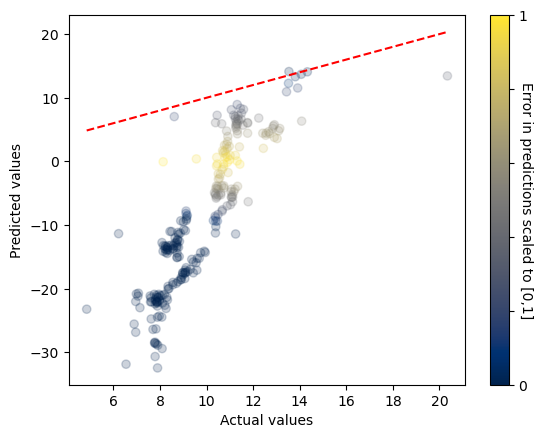

In [394]:
predict_plot(y_val, svm_poly_3.predict(X_val_dca))

***

## 3. Trying KNN Regressor

In [395]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=8)
knn_reg.fit(X_train_dca, y_train)

KNeighborsRegressor(n_neighbors=8)

In [396]:
mean_squared_error(y_val, knn_reg.predict(X_val_dca))

21.45623858536731

In [397]:
mean_squared_error(y_train, knn_reg.predict(X_train_dca))

3.0999253496573607

C:\Users\spect\AppData\Local\Temp\ipykernel_12004\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_12004\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


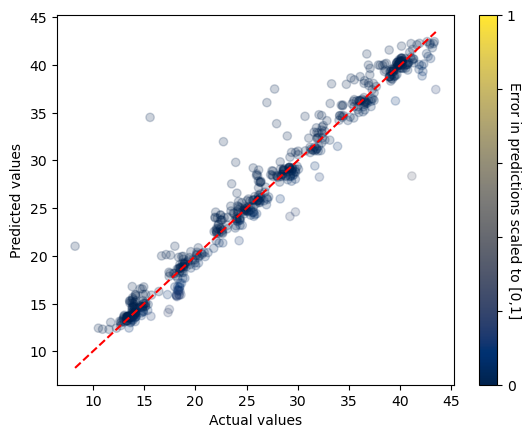

In [398]:
predict_plot(y_train, knn_reg.predict(X_train_dca))

C:\Users\spect\AppData\Local\Temp\ipykernel_12004\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_12004\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


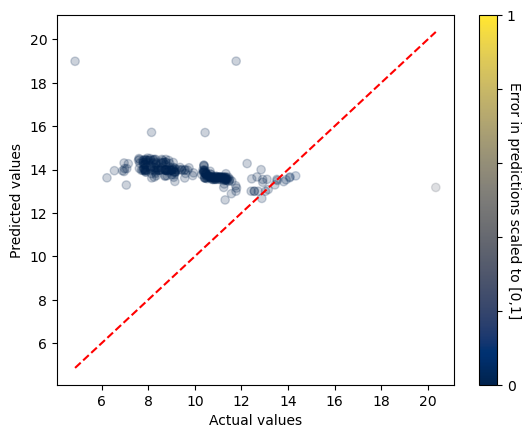

In [399]:
predict_plot(y_val, knn_reg.predict(X_val_dca))

***

## 4. Trying Random Forest Model

In [400]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf = RandomForestRegressor(n_jobs=-1, random_state=42)
rf.fit(X_train_dca, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [401]:
mean_squared_error(rf.predict(X_val_dca), y_val)

15.548447727412242

In [402]:
mean_squared_error(y_train, rf.predict(X_train_dca))

0.2628087986471803

Such a significant difference in the mean squared error between training predictions and validation predictions signifies that the Random Forest model is overfitting

C:\Users\spect\AppData\Local\Temp\ipykernel_12004\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_12004\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


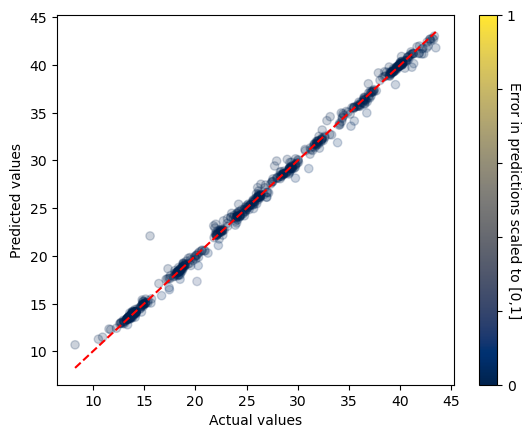

In [403]:
predict_plot(y_train, rf.predict(X_train_dca))

C:\Users\spect\AppData\Local\Temp\ipykernel_12004\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_12004\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


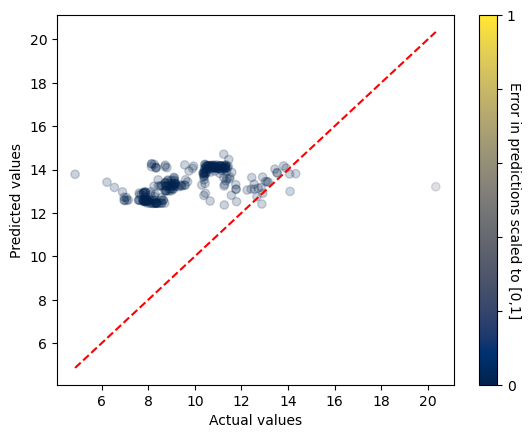

In [404]:
predict_plot(y_val, rf.predict(X_val_dca))

Feature importance in the Random Forest Model

<AxesSubplot: >

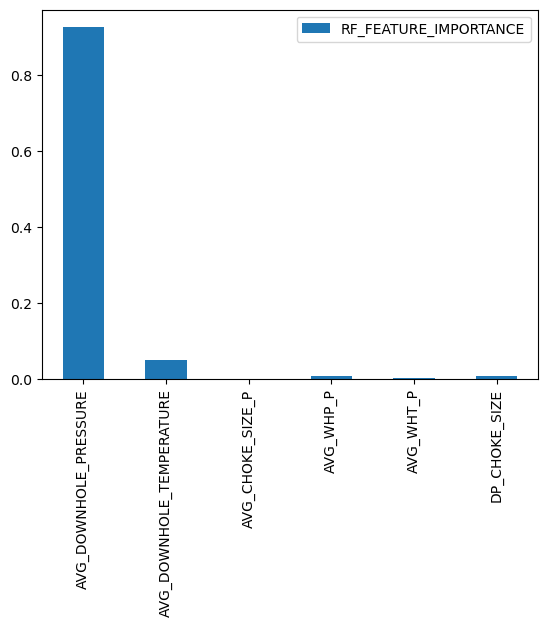

In [406]:
rf_fi = rf.feature_importances_
df_fi = pd.DataFrame(data = rf_fi, index = features, columns=["RF_FEATURE_IMPORTANCE"])
df_fi.plot.bar()

***

## 5. Gradient Boosting

Using XGBRegressor

In [407]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train_dca, y_train, eval_set = [(X_val_dca, y_val)], verbose = 2, early_stopping_rounds = 10)

[0]	validation_0-rmse:5.62727
[2]	validation_0-rmse:1.89394
[4]	validation_0-rmse:1.95421
[6]	validation_0-rmse:1.78366
[8]	validation_0-rmse:2.05694
[10]	validation_0-rmse:2.17419
[12]	validation_0-rmse:2.30200
[13]	validation_0-rmse:2.32246


C:\Users\spect\OneDrive\Desktop\ML_conda_projects\spectre_lab\env\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [408]:
mean_squared_error(y_train, xgb_reg.predict(X_train_dca))

46.549877882922125

C:\Users\spect\AppData\Local\Temp\ipykernel_12004\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_12004\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


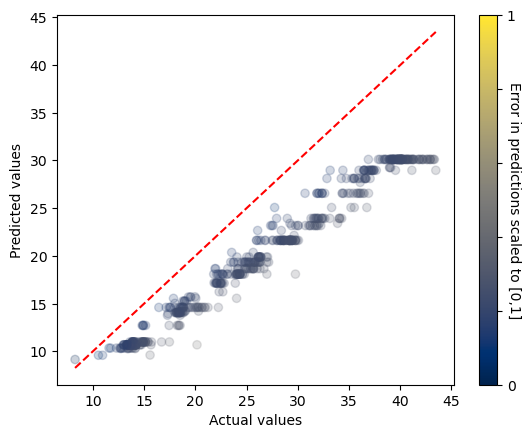

In [409]:
predict_plot(y_train, xgb_reg.predict(X_train_dca))

Using Gradient Boosting Regressor

In [410]:
from sklearn.ensemble import GradientBoostingRegressor
grd_reg = GradientBoostingRegressor(n_estimators = 150)
grd_reg.fit(X_train_dca, y_train)

GradientBoostingRegressor(n_estimators=150)

In [411]:
mean_squared_error(y_train, grd_reg.predict(X_train_dca))

0.36589873492146324

In [412]:
mean_squared_error(y_val, grd_reg.predict(X_val_dca))

9.298290415992724

C:\Users\spect\AppData\Local\Temp\ipykernel_12004\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_12004\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


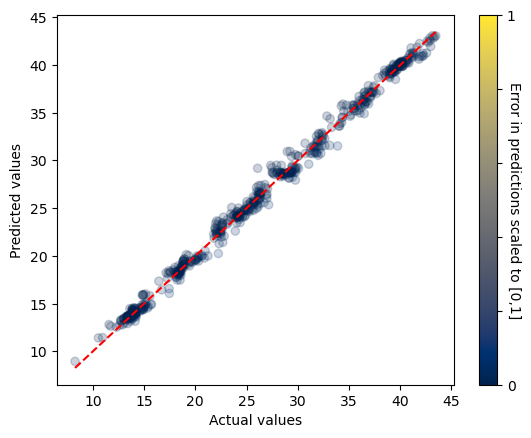

In [413]:
predict_plot(y_train, grd_reg.predict(X_train_dca))

C:\Users\spect\AppData\Local\Temp\ipykernel_12004\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_12004\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


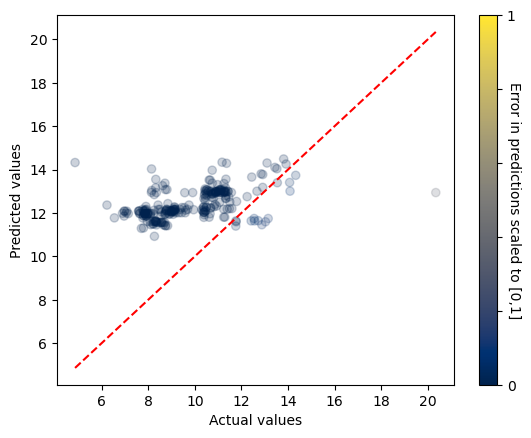

In [414]:
predict_plot(y_val, grd_reg.predict(X_val_dca))

***

## 6. Neural Networks

### 6.1 MLP Regressor using scikitlearn

In [417]:
## Trying MLP lyers from scikit-learn

from sklearn.neural_network import MLPRegressor
mlp_reg = MLPRegressor([100,10,1], max_iter = 10000, verbose = 2)
mlp_reg.fit(X_train_dca, y_train)

Iteration 1, loss = 360.86296728
Iteration 2, loss = 359.93584377
Iteration 3, loss = 358.83125221
Iteration 4, loss = 357.58635657
Iteration 5, loss = 356.18204783
Iteration 6, loss = 354.59892795
Iteration 7, loss = 352.80580191
Iteration 8, loss = 350.80413969
Iteration 9, loss = 348.53296509
Iteration 10, loss = 346.06550695
Iteration 11, loss = 343.43195591
Iteration 12, loss = 340.44336223
Iteration 13, loss = 337.14419867
Iteration 14, loss = 333.45410737
Iteration 15, loss = 329.25580487
Iteration 16, loss = 324.66534200
Iteration 17, loss = 319.38419611
Iteration 18, loss = 313.62827619
Iteration 19, loss = 307.20318656
Iteration 20, loss = 300.11758973
Iteration 21, loss = 292.26062001
Iteration 22, loss = 283.66596358
Iteration 23, loss = 274.55692557
Iteration 24, loss = 264.61102303
Iteration 25, loss = 254.42869787
Iteration 26, loss = 243.60793385
Iteration 27, loss = 232.20274074
Iteration 28, loss = 219.74717371
Iteration 29, loss = 206.39039256
Iteration 30, loss = 19

Iteration 285, loss = 2.27607538
Iteration 286, loss = 2.26991264
Iteration 287, loss = 2.25861151
Iteration 288, loss = 2.24213891
Iteration 289, loss = 2.21531810
Iteration 290, loss = 2.20836453
Iteration 291, loss = 2.21861399
Iteration 292, loss = 2.21895995
Iteration 293, loss = 2.20374732
Iteration 294, loss = 2.18018907
Iteration 295, loss = 2.18328781
Iteration 296, loss = 2.18221581
Iteration 297, loss = 2.16587190
Iteration 298, loss = 2.14873608
Iteration 299, loss = 2.13964482
Iteration 300, loss = 2.13871663
Iteration 301, loss = 2.13385050
Iteration 302, loss = 2.12493482
Iteration 303, loss = 2.11108832
Iteration 304, loss = 2.10269676
Iteration 305, loss = 2.11046363
Iteration 306, loss = 2.10764235
Iteration 307, loss = 2.09693790
Iteration 308, loss = 2.08690301
Iteration 309, loss = 2.07717673
Iteration 310, loss = 2.07249838
Iteration 311, loss = 2.07136405
Iteration 312, loss = 2.05868838
Iteration 313, loss = 2.04753453
Iteration 314, loss = 2.04258515
Iteration 

MLPRegressor(hidden_layer_sizes=[100, 10, 1], max_iter=10000, verbose=2)

In [418]:
mean_squared_error(y_val, mlp_reg.predict(X_val_dca))

5.885957642490985

In [422]:
r2_score(y_val, mlp_reg.predict(X_val_dca))

-0.7650079524821323

In [423]:
r2_score(y_train, mlp_reg.predict(X_train_dca))

0.9668341252464687

In [419]:
mean_squared_error(y_train, mlp_reg.predict(X_train_dca))

2.9482237461582

C:\Users\spect\AppData\Local\Temp\ipykernel_12004\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_12004\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


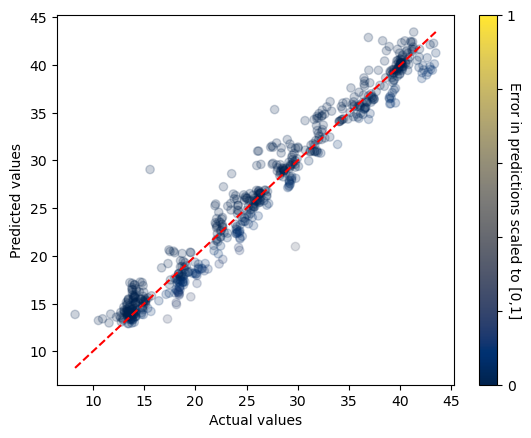

In [420]:
predict_plot(y_train, mlp_reg.predict(X_train_dca))

C:\Users\spect\AppData\Local\Temp\ipykernel_12004\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_12004\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


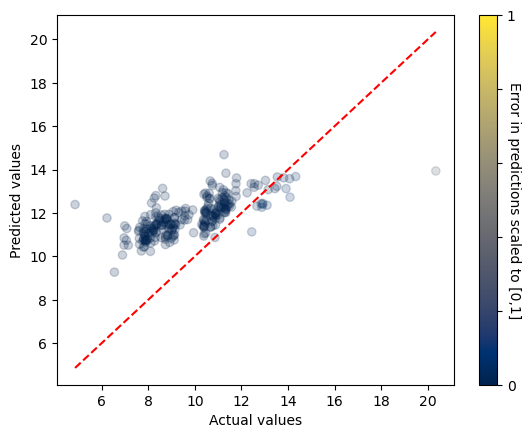

In [421]:
predict_plot(y_val, mlp_reg.predict(X_val_dca))

### 6.2 Tensorflow fully connected sequential neural network

In [472]:
nn = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=[X_train_dca.shape[1]]),
    keras.layers.Dense(200, activation = "relu"),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(10, activation = "relu"),
    keras.layers.Dense(1, activation = "relu"),
])
nn.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 200)               1400      
                                                                 
 dense_42 (Dense)            (None, 100)               20100     
                                                                 
 dense_43 (Dense)            (None, 100)               10100     
                                                                 
 dense_44 (Dense)            (None, 10)                1010      
                                                                 
 dense_45 (Dense)            (None, 1)                 11        
                                                                 
Total params: 32,621
Trainable params: 32,621
Non-trainable params: 0
_________________________________________________________________


In [463]:
## Code to get the optimum learning rate for the SGD optimizer

def lr_epoch(epoch):
    return 1e-8*10**(epoch/62)
    

nn.compile(optimizer = keras.optimizers.SGD(learning_rate=1e-4), loss = keras.losses.mean_squared_error)
lr_scheduler = keras.callbacks.LearningRateScheduler(lr_epoch)
history = nn.fit(X_train_dca, y_train, epochs = 500, validation_data = (X_val_dca, y_val), callbacks = [lr_scheduler])

Epoch 1/500
19/19 [==============================] - 1s 12ms/step - loss: 771.6664 - val_loss: 99.5335 - lr: 1.0000e-08
Epoch 2/500
19/19 [==============================] - 0s 4ms/step - loss: 771.6666 - val_loss: 99.5335 - lr: 1.0378e-08
Epoch 3/500
19/19 [==============================] - 0s 5ms/step - loss: 771.6664 - val_loss: 99.5335 - lr: 1.0771e-08
Epoch 4/500
19/19 [==============================] - 0s 4ms/step - loss: 771.6664 - val_loss: 99.5335 - lr: 1.1179e-08
Epoch 5/500
19/19 [==============================] - 0s 5ms/step - loss: 771.6665 - val_loss: 99.5335 - lr: 1.1602e-08
Epoch 6/500
19/19 [==============================] - 0s 5ms/step - loss: 771.6666 - val_loss: 99.5335 - lr: 1.2041e-08
Epoch 7/500
19/19 [==============================] - 0s 5ms/step - loss: 771.6665 - val_loss: 99.5335 - lr: 1.2496e-08
Epoch 8/500
19/19 [==============================] - 0s 5ms/step - loss: 771.6664 - val_loss: 99.5335 - lr: 1.2969e-08
Epoch 9/500
19/19 [============================

19/19 [==============================] - 0s 5ms/step - loss: 771.6661 - val_loss: 99.5335 - lr: 1.2496e-07
Epoch 70/500
19/19 [==============================] - 0s 4ms/step - loss: 771.6661 - val_loss: 99.5335 - lr: 1.2969e-07
Epoch 71/500
19/19 [==============================] - 0s 4ms/step - loss: 771.6660 - val_loss: 99.5335 - lr: 1.3460e-07
Epoch 72/500
19/19 [==============================] - 0s 4ms/step - loss: 771.6660 - val_loss: 99.5335 - lr: 1.3969e-07
Epoch 73/500
19/19 [==============================] - 0s 4ms/step - loss: 771.6660 - val_loss: 99.5335 - lr: 1.4497e-07
Epoch 74/500
19/19 [==============================] - 0s 4ms/step - loss: 771.6658 - val_loss: 99.5335 - lr: 1.5046e-07
Epoch 75/500
19/19 [==============================] - 0s 4ms/step - loss: 771.6658 - val_loss: 99.5335 - lr: 1.5615e-07
Epoch 76/500
19/19 [==============================] - 0s 4ms/step - loss: 771.6657 - val_loss: 99.5335 - lr: 1.6206e-07
Epoch 77/500
19/19 [==============================] -

19/19 [==============================] - 0s 4ms/step - loss: 771.6566 - val_loss: 99.5333 - lr: 1.5615e-06
Epoch 138/500
19/19 [==============================] - 0s 4ms/step - loss: 771.6558 - val_loss: 99.5332 - lr: 1.6206e-06
Epoch 139/500
19/19 [==============================] - 0s 4ms/step - loss: 771.6550 - val_loss: 99.5332 - lr: 1.6819e-06
Epoch 140/500
19/19 [==============================] - 0s 4ms/step - loss: 771.6540 - val_loss: 99.5332 - lr: 1.7456e-06
Epoch 141/500
19/19 [==============================] - 0s 4ms/step - loss: 771.6531 - val_loss: 99.5332 - lr: 1.8116e-06
Epoch 142/500
19/19 [==============================] - 0s 4ms/step - loss: 771.6519 - val_loss: 99.5332 - lr: 1.8802e-06
Epoch 143/500
19/19 [==============================] - 0s 4ms/step - loss: 771.6505 - val_loss: 99.5332 - lr: 1.9513e-06
Epoch 144/500
19/19 [==============================] - 0s 4ms/step - loss: 771.6489 - val_loss: 99.5331 - lr: 2.0251e-06
Epoch 145/500
19/19 [=========================

Epoch 205/500
19/19 [==============================] - 0s 5ms/step - loss: 718.2642 - val_loss: 77.1580 - lr: 1.9513e-05
Epoch 206/500
19/19 [==============================] - 0s 5ms/step - loss: 713.3196 - val_loss: 75.2358 - lr: 2.0251e-05
Epoch 207/500
19/19 [==============================] - 0s 5ms/step - loss: 707.6508 - val_loss: 73.0625 - lr: 2.1017e-05
Epoch 208/500
19/19 [==============================] - 0s 5ms/step - loss: 701.0591 - val_loss: 70.5777 - lr: 2.1813e-05
Epoch 209/500
19/19 [==============================] - 0s 5ms/step - loss: 693.2755 - val_loss: 67.7037 - lr: 2.2638e-05
Epoch 210/500
19/19 [==============================] - 0s 5ms/step - loss: 683.9277 - val_loss: 64.3402 - lr: 2.3495e-05
Epoch 211/500
19/19 [==============================] - 0s 5ms/step - loss: 672.5039 - val_loss: 60.3455 - lr: 2.4384e-05
Epoch 212/500
19/19 [==============================] - 0s 5ms/step - loss: 658.1700 - val_loss: 55.5124 - lr: 2.5306e-05
Epoch 213/500
19/19 [===========

19/19 [==============================] - 0s 5ms/step - loss: 3.6903 - val_loss: 8.1653 - lr: 2.4384e-04
Epoch 274/500
19/19 [==============================] - 0s 4ms/step - loss: 3.6446 - val_loss: 9.4601 - lr: 2.5306e-04
Epoch 275/500
19/19 [==============================] - 0s 5ms/step - loss: 3.5648 - val_loss: 8.8429 - lr: 2.6264e-04
Epoch 276/500
19/19 [==============================] - 0s 5ms/step - loss: 3.5629 - val_loss: 8.6770 - lr: 2.7257e-04
Epoch 277/500
19/19 [==============================] - 0s 5ms/step - loss: 3.5153 - val_loss: 8.3473 - lr: 2.8289e-04
Epoch 278/500
19/19 [==============================] - 0s 5ms/step - loss: 3.4758 - val_loss: 8.6420 - lr: 2.9359e-04
Epoch 279/500
19/19 [==============================] - 0s 7ms/step - loss: 3.3900 - val_loss: 8.7030 - lr: 3.0470e-04
Epoch 280/500
19/19 [==============================] - 0s 4ms/step - loss: 3.3903 - val_loss: 7.9470 - lr: 3.1623e-04
Epoch 281/500
19/19 [==============================] - 0s 4ms/step - l

19/19 [==============================] - 0s 4ms/step - loss: 23.5375 - val_loss: 5.8257 - lr: 0.0033
Epoch 344/500
19/19 [==============================] - 0s 4ms/step - loss: 17.8187 - val_loss: 36.5532 - lr: 0.0034
Epoch 345/500
19/19 [==============================] - 0s 5ms/step - loss: 9.8654 - val_loss: 6.0459 - lr: 0.0035
Epoch 346/500
19/19 [==============================] - 0s 6ms/step - loss: 9.5388 - val_loss: 18.1015 - lr: 0.0037
Epoch 347/500
19/19 [==============================] - 0s 5ms/step - loss: 11.6643 - val_loss: 5.6972 - lr: 0.0038
Epoch 348/500
19/19 [==============================] - 0s 5ms/step - loss: 24.9100 - val_loss: 15.4351 - lr: 0.0040
Epoch 349/500
19/19 [==============================] - 0s 5ms/step - loss: 7.4936 - val_loss: 13.6451 - lr: 0.0041
Epoch 350/500
19/19 [==============================] - 0s 4ms/step - loss: 9.4460 - val_loss: 18.5565 - lr: 0.0043
Epoch 351/500
19/19 [==============================] - 0s 5ms/step - loss: 15.7707 - val_loss

19/19 [==============================] - 0s 4ms/step - loss: 771.6804 - val_loss: 99.5343 - lr: 0.0442
Epoch 414/500
19/19 [==============================] - 0s 4ms/step - loss: 771.6805 - val_loss: 99.5343 - lr: 0.0458
Epoch 415/500
19/19 [==============================] - 0s 4ms/step - loss: 771.6805 - val_loss: 99.5343 - lr: 0.0476
Epoch 416/500
19/19 [==============================] - 0s 4ms/step - loss: 771.6804 - val_loss: 99.5343 - lr: 0.0494
Epoch 417/500
19/19 [==============================] - 0s 5ms/step - loss: 771.6805 - val_loss: 99.5343 - lr: 0.0512
Epoch 418/500
19/19 [==============================] - 0s 5ms/step - loss: 771.6804 - val_loss: 99.5343 - lr: 0.0532
Epoch 419/500
19/19 [==============================] - 0s 5ms/step - loss: 771.6804 - val_loss: 99.5343 - lr: 0.0552
Epoch 420/500
19/19 [==============================] - 0s 4ms/step - loss: 771.6805 - val_loss: 99.5343 - lr: 0.0573
Epoch 421/500
19/19 [==============================] - 0s 4ms/step - loss: 771

19/19 [==============================] - 0s 4ms/step - loss: 771.6804 - val_loss: 99.5343 - lr: 0.5946
Epoch 484/500
19/19 [==============================] - 0s 4ms/step - loss: 771.6805 - val_loss: 99.5343 - lr: 0.6171
Epoch 485/500
19/19 [==============================] - 0s 4ms/step - loss: 771.6805 - val_loss: 99.5343 - lr: 0.6404
Epoch 486/500
19/19 [==============================] - 0s 4ms/step - loss: 771.6805 - val_loss: 99.5343 - lr: 0.6646
Epoch 487/500
19/19 [==============================] - 0s 4ms/step - loss: 771.6805 - val_loss: 99.5343 - lr: 0.6898
Epoch 488/500
19/19 [==============================] - 0s 4ms/step - loss: 771.6805 - val_loss: 99.5343 - lr: 0.7159
Epoch 489/500
19/19 [==============================] - 0s 4ms/step - loss: 771.6804 - val_loss: 99.5343 - lr: 0.7430
Epoch 490/500
19/19 [==============================] - 0s 4ms/step - loss: 771.6804 - val_loss: 99.5343 - lr: 0.7711
Epoch 491/500
19/19 [==============================] - 0s 4ms/step - loss: 771

In [464]:
history.history.keys()

dict_keys(['loss', 'val_loss', 'lr'])

(0.0, 0.002, 0.0, 200.0)

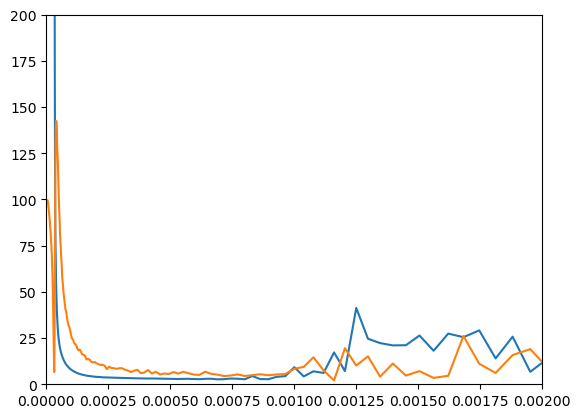

In [471]:
plt.plot(history.history["lr"], history.history["loss"])
plt.plot(history.history["lr"], history.history["val_loss"])
plt.axis([0, 0.002, 0, 200])

The optimum learning rate for this model is 5e-4

In [473]:
n_epochs = 5000

nn.compile(optimizer = keras.optimizers.SGD(learning_rate=5e-4), loss = keras.losses.mean_squared_error)
early_stopping = keras.callbacks.EarlyStopping(monitor = "val_loss", restore_best_weights=True, patience=500)
history = nn.fit(X_train_dca, y_train, epochs = n_epochs, validation_data = (X_val_dca, y_val), callbacks = [early_stopping])

Epoch 1/5000
19/19 [==============================] - 1s 13ms/step - loss: 718.8195 - val_loss: 43.2089
Epoch 2/5000
19/19 [==============================] - 0s 5ms/step - loss: 171.0373 - val_loss: 90.2649
Epoch 3/5000
19/19 [==============================] - 0s 5ms/step - loss: 20.5309 - val_loss: 59.2896
Epoch 4/5000
19/19 [==============================] - 0s 5ms/step - loss: 13.3755 - val_loss: 36.8639
Epoch 5/5000
19/19 [==============================] - 0s 5ms/step - loss: 9.8966 - val_loss: 38.0218
Epoch 6/5000
19/19 [==============================] - 0s 5ms/step - loss: 7.9029 - val_loss: 26.4919
Epoch 7/5000
19/19 [==============================] - 0s 5ms/step - loss: 6.3433 - val_loss: 20.6849
Epoch 8/5000
19/19 [==============================] - 0s 6ms/step - loss: 5.8676 - val_loss: 19.5693
Epoch 9/5000
19/19 [==============================] - 0s 5ms/step - loss: 5.1834 - val_loss: 21.9415
Epoch 10/5000
19/19 [==============================] - 0s 6ms/step - loss: 4.8364 - 

Epoch 82/5000
19/19 [==============================] - 0s 5ms/step - loss: 2.1293 - val_loss: 3.7264
Epoch 83/5000
19/19 [==============================] - 0s 5ms/step - loss: 2.1882 - val_loss: 4.4414
Epoch 84/5000
19/19 [==============================] - 0s 5ms/step - loss: 2.1055 - val_loss: 4.3356
Epoch 85/5000
19/19 [==============================] - 0s 5ms/step - loss: 2.0276 - val_loss: 4.7329
Epoch 86/5000
19/19 [==============================] - 0s 5ms/step - loss: 2.0815 - val_loss: 3.5607
Epoch 87/5000
19/19 [==============================] - 0s 5ms/step - loss: 2.0920 - val_loss: 3.5682
Epoch 88/5000
19/19 [==============================] - 0s 5ms/step - loss: 2.1301 - val_loss: 4.1665
Epoch 89/5000
19/19 [==============================] - 0s 4ms/step - loss: 2.0266 - val_loss: 3.3531
Epoch 90/5000
19/19 [==============================] - 0s 4ms/step - loss: 2.0510 - val_loss: 3.8151
Epoch 91/5000
19/19 [==============================] - 0s 4ms/step - loss: 2.0318 - val_los

19/19 [==============================] - 0s 5ms/step - loss: 1.7354 - val_loss: 3.2722
Epoch 163/5000
19/19 [==============================] - 0s 4ms/step - loss: 1.6550 - val_loss: 2.5637
Epoch 164/5000
19/19 [==============================] - 0s 4ms/step - loss: 1.6739 - val_loss: 2.6312
Epoch 165/5000
19/19 [==============================] - 0s 5ms/step - loss: 1.6726 - val_loss: 3.0414
Epoch 166/5000
19/19 [==============================] - 0s 5ms/step - loss: 1.6881 - val_loss: 3.5845
Epoch 167/5000
19/19 [==============================] - 0s 5ms/step - loss: 1.5898 - val_loss: 2.8721
Epoch 168/5000
19/19 [==============================] - 0s 5ms/step - loss: 1.6449 - val_loss: 2.8687
Epoch 169/5000
19/19 [==============================] - 0s 5ms/step - loss: 1.6250 - val_loss: 3.6559
Epoch 170/5000
19/19 [==============================] - 0s 5ms/step - loss: 1.7326 - val_loss: 2.8295
Epoch 171/5000
19/19 [==============================] - 0s 5ms/step - loss: 1.6219 - val_loss: 3.

19/19 [==============================] - 0s 6ms/step - loss: 1.4130 - val_loss: 2.5314
Epoch 243/5000
19/19 [==============================] - 0s 8ms/step - loss: 1.4181 - val_loss: 2.3258
Epoch 244/5000
19/19 [==============================] - 0s 5ms/step - loss: 1.3493 - val_loss: 2.2481
Epoch 245/5000
19/19 [==============================] - 0s 5ms/step - loss: 1.3805 - val_loss: 2.2690
Epoch 246/5000
19/19 [==============================] - 0s 5ms/step - loss: 1.4178 - val_loss: 2.4571
Epoch 247/5000
19/19 [==============================] - 0s 4ms/step - loss: 1.4146 - val_loss: 2.2108
Epoch 248/5000
19/19 [==============================] - 0s 4ms/step - loss: 1.4449 - val_loss: 3.8311
Epoch 249/5000
19/19 [==============================] - 0s 4ms/step - loss: 1.4211 - val_loss: 3.8732
Epoch 250/5000
19/19 [==============================] - 0s 4ms/step - loss: 1.4346 - val_loss: 2.0113
Epoch 251/5000
19/19 [==============================] - 0s 4ms/step - loss: 1.4617 - val_loss: 2.

19/19 [==============================] - 0s 4ms/step - loss: 1.2250 - val_loss: 2.8446
Epoch 323/5000
19/19 [==============================] - 0s 4ms/step - loss: 1.2601 - val_loss: 1.9835
Epoch 324/5000
19/19 [==============================] - 0s 4ms/step - loss: 1.2398 - val_loss: 2.2570
Epoch 325/5000
19/19 [==============================] - 0s 4ms/step - loss: 1.3664 - val_loss: 2.3775
Epoch 326/5000
19/19 [==============================] - 0s 4ms/step - loss: 1.3208 - val_loss: 1.9750
Epoch 327/5000
19/19 [==============================] - 0s 4ms/step - loss: 1.2995 - val_loss: 2.1684
Epoch 328/5000
19/19 [==============================] - 0s 4ms/step - loss: 1.3328 - val_loss: 2.5295
Epoch 329/5000
19/19 [==============================] - 0s 4ms/step - loss: 1.3403 - val_loss: 1.9632
Epoch 330/5000
19/19 [==============================] - 0s 4ms/step - loss: 1.3387 - val_loss: 2.1247
Epoch 331/5000
19/19 [==============================] - 0s 4ms/step - loss: 1.2527 - val_loss: 1.

19/19 [==============================] - 0s 4ms/step - loss: 1.1517 - val_loss: 1.8527
Epoch 403/5000
19/19 [==============================] - 0s 4ms/step - loss: 1.1381 - val_loss: 1.5575
Epoch 404/5000
19/19 [==============================] - 0s 7ms/step - loss: 1.2158 - val_loss: 2.2907
Epoch 405/5000
19/19 [==============================] - 0s 4ms/step - loss: 1.1427 - val_loss: 2.2257
Epoch 406/5000
19/19 [==============================] - 0s 4ms/step - loss: 1.1370 - val_loss: 1.5955
Epoch 407/5000
19/19 [==============================] - 0s 4ms/step - loss: 1.1761 - val_loss: 1.9304
Epoch 408/5000
19/19 [==============================] - 0s 4ms/step - loss: 1.1407 - val_loss: 1.6780
Epoch 409/5000
19/19 [==============================] - 0s 4ms/step - loss: 1.1719 - val_loss: 1.9932
Epoch 410/5000
19/19 [==============================] - 0s 4ms/step - loss: 1.1263 - val_loss: 1.9751
Epoch 411/5000
19/19 [==============================] - 0s 4ms/step - loss: 1.1852 - val_loss: 2.

19/19 [==============================] - 0s 4ms/step - loss: 1.1770 - val_loss: 1.8571
Epoch 483/5000
19/19 [==============================] - 0s 5ms/step - loss: 1.0447 - val_loss: 1.7858
Epoch 484/5000
19/19 [==============================] - 0s 4ms/step - loss: 1.1013 - val_loss: 1.4817
Epoch 485/5000
19/19 [==============================] - 0s 4ms/step - loss: 1.0612 - val_loss: 2.5248
Epoch 486/5000
19/19 [==============================] - 0s 4ms/step - loss: 1.0486 - val_loss: 1.4392
Epoch 487/5000
19/19 [==============================] - 0s 4ms/step - loss: 1.1262 - val_loss: 1.7147
Epoch 488/5000
19/19 [==============================] - 0s 4ms/step - loss: 1.1150 - val_loss: 2.1771
Epoch 489/5000
19/19 [==============================] - 0s 4ms/step - loss: 1.0424 - val_loss: 1.5406
Epoch 490/5000
19/19 [==============================] - 0s 4ms/step - loss: 1.0488 - val_loss: 1.9692
Epoch 491/5000
19/19 [==============================] - 0s 4ms/step - loss: 1.0386 - val_loss: 1.

19/19 [==============================] - 0s 4ms/step - loss: 0.9667 - val_loss: 1.6174
Epoch 563/5000
19/19 [==============================] - 0s 4ms/step - loss: 0.9803 - val_loss: 2.0821
Epoch 564/5000
19/19 [==============================] - 0s 4ms/step - loss: 0.9305 - val_loss: 2.4455
Epoch 565/5000
19/19 [==============================] - 0s 4ms/step - loss: 1.0048 - val_loss: 2.1876
Epoch 566/5000
19/19 [==============================] - 0s 4ms/step - loss: 1.0124 - val_loss: 1.6883
Epoch 567/5000
19/19 [==============================] - 0s 4ms/step - loss: 1.0469 - val_loss: 2.0853
Epoch 568/5000
19/19 [==============================] - 0s 4ms/step - loss: 0.9810 - val_loss: 1.5486
Epoch 569/5000
19/19 [==============================] - 0s 4ms/step - loss: 1.1077 - val_loss: 1.7077
Epoch 570/5000
19/19 [==============================] - 0s 4ms/step - loss: 1.7273 - val_loss: 1.9460
Epoch 571/5000
19/19 [==============================] - 0s 4ms/step - loss: 1.1759 - val_loss: 1.

19/19 [==============================] - 0s 4ms/step - loss: 0.9458 - val_loss: 1.7305
Epoch 643/5000
19/19 [==============================] - 0s 4ms/step - loss: 0.8725 - val_loss: 1.5533
Epoch 644/5000
19/19 [==============================] - 0s 4ms/step - loss: 0.9065 - val_loss: 1.6996
Epoch 645/5000
19/19 [==============================] - 0s 4ms/step - loss: 1.0059 - val_loss: 1.5905
Epoch 646/5000
19/19 [==============================] - 0s 4ms/step - loss: 0.8551 - val_loss: 1.5866
Epoch 647/5000
19/19 [==============================] - 0s 5ms/step - loss: 0.9318 - val_loss: 1.6720
Epoch 648/5000
19/19 [==============================] - 0s 4ms/step - loss: 1.0762 - val_loss: 2.1245
Epoch 649/5000
19/19 [==============================] - 0s 4ms/step - loss: 0.9771 - val_loss: 1.6310
Epoch 650/5000
19/19 [==============================] - 0s 4ms/step - loss: 0.9115 - val_loss: 1.6378
Epoch 651/5000
19/19 [==============================] - 0s 4ms/step - loss: 0.8747 - val_loss: 1.

19/19 [==============================] - 0s 4ms/step - loss: 0.8950 - val_loss: 1.8191
Epoch 723/5000
19/19 [==============================] - 0s 5ms/step - loss: 0.8189 - val_loss: 1.6873
Epoch 724/5000
19/19 [==============================] - 0s 5ms/step - loss: 0.9911 - val_loss: 1.8436
Epoch 725/5000
19/19 [==============================] - 0s 5ms/step - loss: 0.8789 - val_loss: 1.6627
Epoch 726/5000
19/19 [==============================] - 0s 4ms/step - loss: 1.0497 - val_loss: 1.7353
Epoch 727/5000
19/19 [==============================] - 0s 5ms/step - loss: 1.0469 - val_loss: 1.5779
Epoch 728/5000
19/19 [==============================] - 0s 4ms/step - loss: 0.9643 - val_loss: 1.6732
Epoch 729/5000
19/19 [==============================] - 0s 4ms/step - loss: 0.8568 - val_loss: 1.6569
Epoch 730/5000
19/19 [==============================] - 0s 4ms/step - loss: 0.8396 - val_loss: 1.6758
Epoch 731/5000
19/19 [==============================] - 0s 5ms/step - loss: 0.8346 - val_loss: 1.

19/19 [==============================] - 0s 4ms/step - loss: 0.8312 - val_loss: 1.8558
Epoch 803/5000
19/19 [==============================] - 0s 4ms/step - loss: 0.8845 - val_loss: 1.7564
Epoch 804/5000
19/19 [==============================] - 0s 4ms/step - loss: 0.8405 - val_loss: 1.6685
Epoch 805/5000
19/19 [==============================] - 0s 7ms/step - loss: 0.7439 - val_loss: 1.7657
Epoch 806/5000
19/19 [==============================] - 0s 4ms/step - loss: 0.7600 - val_loss: 1.7794
Epoch 807/5000
19/19 [==============================] - 0s 4ms/step - loss: 0.8324 - val_loss: 1.8401
Epoch 808/5000
19/19 [==============================] - 0s 5ms/step - loss: 0.8257 - val_loss: 1.7605
Epoch 809/5000
19/19 [==============================] - 0s 4ms/step - loss: 0.8981 - val_loss: 1.7825
Epoch 810/5000
19/19 [==============================] - 0s 4ms/step - loss: 0.7841 - val_loss: 1.7363
Epoch 811/5000
19/19 [==============================] - 0s 4ms/step - loss: 0.8720 - val_loss: 1.

19/19 [==============================] - 0s 4ms/step - loss: 0.9034 - val_loss: 1.7450
Epoch 883/5000
19/19 [==============================] - 0s 4ms/step - loss: 0.7664 - val_loss: 1.7858
Epoch 884/5000
19/19 [==============================] - 0s 4ms/step - loss: 1.2154 - val_loss: 2.4312
Epoch 885/5000
19/19 [==============================] - 0s 4ms/step - loss: 0.7588 - val_loss: 2.0188
Epoch 886/5000
19/19 [==============================] - 0s 4ms/step - loss: 0.8019 - val_loss: 1.6876
Epoch 887/5000
19/19 [==============================] - 0s 4ms/step - loss: 0.7791 - val_loss: 1.9343
Epoch 888/5000
19/19 [==============================] - 0s 4ms/step - loss: 0.8158 - val_loss: 1.6897
Epoch 889/5000
19/19 [==============================] - 0s 4ms/step - loss: 0.8015 - val_loss: 1.6899
Epoch 890/5000
19/19 [==============================] - 0s 4ms/step - loss: 0.7778 - val_loss: 1.7427
Epoch 891/5000
19/19 [==============================] - 0s 4ms/step - loss: 0.9293 - val_loss: 1.

(0.0, 1600.0, 0.0, 10.0)

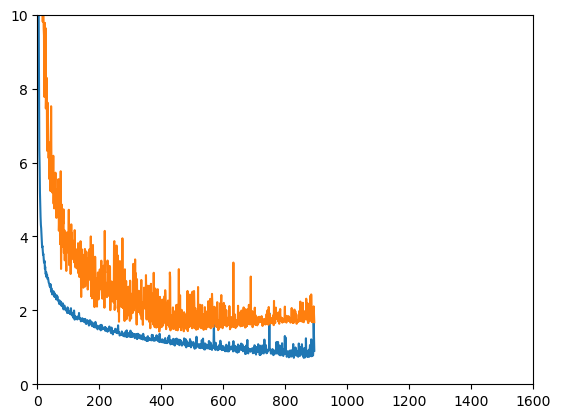

In [475]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.axis([0, 1600, 0, 10])

In [476]:
mean_squared_error(y_val, nn.predict(X_val_dca))

8/8 [==============================] - 0s 2ms/step


1.4263874623480928

In [477]:
mean_squared_error(y_train, nn.predict(X_train_dca))

19/19 [==============================] - 0s 1ms/step


1.2969828889331814

In [478]:
r2_score(y_train, nn.predict(X_train_dca))

19/19 [==============================] - 0s 1ms/step


0.9854096650202061

In [479]:
r2_score(y_val, nn.predict(X_val_dca))

8/8 [==============================] - 0s 2ms/step


0.572272624561442

In [482]:
## Saving the model
# nn.save("sequential.h5")

19/19 [==============================] - 0s 1ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_12004\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_12004\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


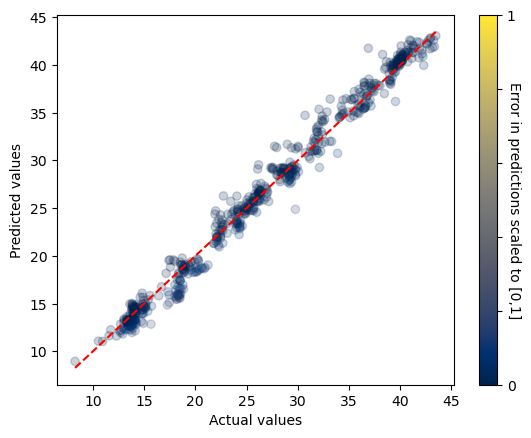

In [483]:
predict_plot(y_train, nn.predict(X_train_dca).ravel())

8/8 [==============================] - 0s 2ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_12004\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_12004\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


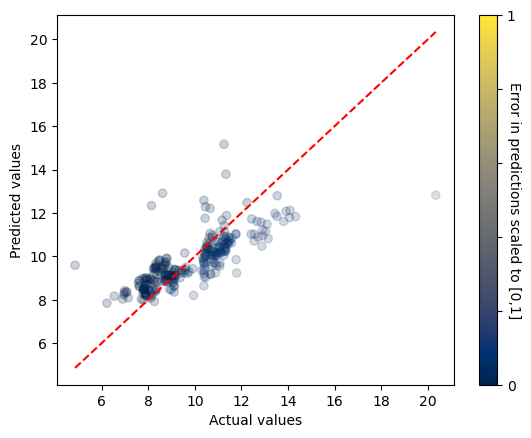

In [484]:
predict_plot(y_val, nn.predict(X_val_dca).ravel())

### 6.3.0 RNN Preparation

**Naive Forecasting**: Checking the mse if we predict the flow rate to be the same as the previous flow rate

In [485]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(y_train[1:], y_train[:-1])
print(f"We will get an mean squared error of {error:.2f} on the training data if we just assume that the flow rate at time 't-1' is going to be the flow rate at time 't'")

We will get an mean squared error of 1.67 on the training data if we just assume that the flow rate at time 't-1' is going to be the flow rate at time 't'


C:\Users\spect\AppData\Local\Temp\ipykernel_12004\919095729.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  error = mean_squared_error(y_train[1:], y_train[:-1])


Preparing the dataset for sequence to sequence

In [486]:
## Creating a function to prepare dataset for sequence to sequence RNN model

def seq_2_seq(X, y, window_size = 5, batch_size = 5):
    dt = np.c_[X, y]
    dt = tf.data.Dataset.from_tensor_slices(dt)
    dt = dt.window(size = window_size, shift = 1, drop_remainder=True)
    dt = dt.flat_map(lambda x: x.batch(window_size))
    dt = dt.map(lambda x: (x[:, :-1], x[:, -1]))
    dt = dt.batch(batch_size).prefetch(1)
    return dt

In [517]:
## Preparing the data using the above function
window = 3
batch_size = 8

train_dt = seq_2_seq(X_train_dca, y_train, window, batch_size)
val_dt = seq_2_seq(X_val_dca, y_val, window, batch_size)
test_dt = seq_2_seq(X_test_dca, y_test, window, batch_size)

In [489]:
for i in train_dt.take(2):
    print(i)

(<tf.Tensor: shape=(16, 3, 6), dtype=float64, numpy=
array([[[-1.38652997,  2.0873477 , -4.44531198,  2.80831819,
          0.21879669,  3.16117298],
        [-1.33302324,  2.04686023, -4.44463891,  3.0071449 ,
         -0.03530933,  2.92123577],
        [-1.41926151,  2.04277317, -4.44121096,  2.61539594,
          0.47274815,  3.03938207]],

       [[-1.33302324,  2.04686023, -4.44463891,  3.0071449 ,
         -0.03530933,  2.92123577],
        [-1.41926151,  2.04277317, -4.44121096,  2.61539594,
          0.47274815,  3.03938207],
        [-1.45394608,  2.02959205, -4.3644441 ,  2.46998269,
          0.45258645,  2.8920975 ]],

       [[-1.41926151,  2.04277317, -4.44121096,  2.61539594,
          0.47274815,  3.03938207],
        [-1.45394608,  2.02959205, -4.3644441 ,  2.46998269,
          0.45258645,  2.8920975 ],
        [-1.52896342,  2.02134396, -3.92130554,  1.9930963 ,
          0.03143781,  2.29409253]],

       [[-1.45394608,  2.02959205, -4.3644441 ,  2.46998269,
       

***

Creating a function to calculate the mean squared error for RNN models

In [490]:
## Creating a function to calculate the mean squared error for RNN and plot crossplot of actual vs predcited
## by taking rnn model, window size, dataset (X,y) and y values as input

def rnn_mse(model, window_size, dt, y, plot = True):
    preds = model.predict(dt)
    preds = preds[:, -1 :].ravel()
    if plot:
        predict_plot(y[window_size-1:], preds)
    return mean_squared_error(y[window_size-1:], preds)

def rnn_r2(model, window_size, dt, y):
    preds = model.predict(dt)
    preds = preds[:, -1 :].ravel()
    return r2_score(y[window_size-1:], preds)

***

### 6.3.1 Simple RNN

In [521]:
simple_rnn = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=[window, X_train_dca.shape[1]]),
    keras.layers.Bidirectional(keras.layers.SimpleRNN(30, return_sequences=True)),
    keras.layers.Bidirectional(keras.layers.SimpleRNN(10, return_sequences=True)),
    keras.layers.Dense(1)
])
simple_rnn.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_32 (Bidirecti  (None, 3, 60)            2220      
 onal)                                                           
                                                                 
 bidirectional_33 (Bidirecti  (None, 3, 20)            1420      
 onal)                                                           
                                                                 
 dense_53 (Dense)            (None, 3, 1)              21        
                                                                 
Total params: 3,661
Trainable params: 3,661
Non-trainable params: 0
_________________________________________________________________


In [519]:
## Finding the optimum learning rate for SGD optimizer for the Simple RNN model

simple_rnn.compile(optimizer = keras.optimizers.SGD(), loss = keras.losses.mean_squared_error)
lr_scheduler = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8*10**(epoch/62))
history = simple_rnn.fit(train_dt, epochs = 500, validation_data= val_dt, callbacks = [lr_scheduler])

Epoch 1/500
76/76 [==============================] - 3s 13ms/step - loss: 777.2264 - val_loss: 82.2534 - lr: 1.0000e-08
Epoch 2/500
76/76 [==============================] - 0s 5ms/step - loss: 777.2117 - val_loss: 82.2570 - lr: 1.0378e-08
Epoch 3/500
76/76 [==============================] - 0s 5ms/step - loss: 777.1962 - val_loss: 82.2607 - lr: 1.0771e-08
Epoch 4/500
76/76 [==============================] - 0s 5ms/step - loss: 777.1800 - val_loss: 82.2645 - lr: 1.1179e-08
Epoch 5/500
76/76 [==============================] - 0s 5ms/step - loss: 777.1636 - val_loss: 82.2685 - lr: 1.1602e-08
Epoch 6/500
76/76 [==============================] - 0s 5ms/step - loss: 777.1462 - val_loss: 82.2727 - lr: 1.2041e-08
Epoch 7/500
76/76 [==============================] - 0s 5ms/step - loss: 777.1282 - val_loss: 82.2770 - lr: 1.2496e-08
Epoch 8/500
76/76 [==============================] - 0s 6ms/step - loss: 777.1099 - val_loss: 82.2814 - lr: 1.2969e-08
Epoch 9/500
76/76 [============================

76/76 [==============================] - 0s 5ms/step - loss: 772.6948 - val_loss: 83.3479 - lr: 1.2496e-07
Epoch 70/500
76/76 [==============================] - 0s 5ms/step - loss: 772.5080 - val_loss: 83.3934 - lr: 1.2969e-07
Epoch 71/500
76/76 [==============================] - 0s 5ms/step - loss: 772.3140 - val_loss: 83.4406 - lr: 1.3460e-07
Epoch 72/500
76/76 [==============================] - 0s 5ms/step - loss: 772.1125 - val_loss: 83.4896 - lr: 1.3969e-07
Epoch 73/500
76/76 [==============================] - 0s 5ms/step - loss: 771.9034 - val_loss: 83.5405 - lr: 1.4497e-07
Epoch 74/500
76/76 [==============================] - 0s 5ms/step - loss: 771.6865 - val_loss: 83.5934 - lr: 1.5046e-07
Epoch 75/500
76/76 [==============================] - 0s 5ms/step - loss: 771.4611 - val_loss: 83.6483 - lr: 1.5615e-07
Epoch 76/500
76/76 [==============================] - 0s 5ms/step - loss: 771.2274 - val_loss: 83.7053 - lr: 1.6206e-07
Epoch 77/500
76/76 [==============================] -

76/76 [==============================] - 0s 5ms/step - loss: 720.1553 - val_loss: 93.9082 - lr: 1.5615e-06
Epoch 138/500
76/76 [==============================] - 0s 5ms/step - loss: 718.2064 - val_loss: 94.0668 - lr: 1.6206e-06
Epoch 139/500
76/76 [==============================] - 0s 6ms/step - loss: 716.1893 - val_loss: 94.2035 - lr: 1.6819e-06
Epoch 140/500
76/76 [==============================] - 0s 5ms/step - loss: 714.1000 - val_loss: 94.3152 - lr: 1.7456e-06
Epoch 141/500
76/76 [==============================] - 0s 5ms/step - loss: 711.9333 - val_loss: 94.3983 - lr: 1.8116e-06
Epoch 142/500
76/76 [==============================] - 0s 5ms/step - loss: 709.6854 - val_loss: 94.4492 - lr: 1.8802e-06
Epoch 143/500
76/76 [==============================] - 0s 5ms/step - loss: 707.3497 - val_loss: 94.4638 - lr: 1.9513e-06
Epoch 144/500
76/76 [==============================] - 0s 5ms/step - loss: 704.9210 - val_loss: 94.4376 - lr: 2.0251e-06
Epoch 145/500
76/76 [=========================

Epoch 205/500
76/76 [==============================] - 0s 5ms/step - loss: 133.5968 - val_loss: 13.0012 - lr: 1.9513e-05
Epoch 206/500
76/76 [==============================] - 0s 5ms/step - loss: 125.8641 - val_loss: 12.4591 - lr: 2.0251e-05
Epoch 207/500
76/76 [==============================] - 0s 5ms/step - loss: 118.5120 - val_loss: 11.1457 - lr: 2.1017e-05
Epoch 208/500
76/76 [==============================] - 0s 5ms/step - loss: 111.5016 - val_loss: 9.1132 - lr: 2.1813e-05
Epoch 209/500
76/76 [==============================] - 0s 5ms/step - loss: 104.7939 - val_loss: 6.6807 - lr: 2.2638e-05
Epoch 210/500
76/76 [==============================] - 0s 5ms/step - loss: 98.3557 - val_loss: 4.5701 - lr: 2.3495e-05
Epoch 211/500
76/76 [==============================] - 0s 5ms/step - loss: 92.1663 - val_loss: 3.8881 - lr: 2.4384e-05
Epoch 212/500
76/76 [==============================] - 0s 5ms/step - loss: 86.2217 - val_loss: 5.7203 - lr: 2.5306e-05
Epoch 213/500
76/76 [===================

76/76 [==============================] - 0s 5ms/step - loss: 4.1758 - val_loss: 12.8086 - lr: 2.4384e-04
Epoch 274/500
76/76 [==============================] - 0s 5ms/step - loss: 4.0216 - val_loss: 13.1792 - lr: 2.5306e-04
Epoch 275/500
76/76 [==============================] - 0s 5ms/step - loss: 3.8784 - val_loss: 13.5665 - lr: 2.6264e-04
Epoch 276/500
76/76 [==============================] - 0s 5ms/step - loss: 3.7459 - val_loss: 13.9655 - lr: 2.7257e-04
Epoch 277/500
76/76 [==============================] - 0s 5ms/step - loss: 3.6237 - val_loss: 14.3704 - lr: 2.8289e-04
Epoch 278/500
76/76 [==============================] - 0s 5ms/step - loss: 3.5112 - val_loss: 14.7747 - lr: 2.9359e-04
Epoch 279/500
76/76 [==============================] - 0s 5ms/step - loss: 3.4076 - val_loss: 15.1714 - lr: 3.0470e-04
Epoch 280/500
76/76 [==============================] - 0s 5ms/step - loss: 3.3122 - val_loss: 15.5529 - lr: 3.1623e-04
Epoch 281/500
76/76 [==============================] - 0s 5ms/

76/76 [==============================] - 0s 5ms/step - loss: 1.8542 - val_loss: 4.1832 - lr: 0.0033
Epoch 344/500
76/76 [==============================] - 0s 5ms/step - loss: 1.8499 - val_loss: 4.1685 - lr: 0.0034
Epoch 345/500
76/76 [==============================] - 0s 5ms/step - loss: 1.8439 - val_loss: 4.1593 - lr: 0.0035
Epoch 346/500
76/76 [==============================] - 0s 5ms/step - loss: 1.8447 - val_loss: 4.1610 - lr: 0.0037
Epoch 347/500
76/76 [==============================] - 0s 5ms/step - loss: 1.8203 - val_loss: 4.1353 - lr: 0.0038
Epoch 348/500
76/76 [==============================] - 0s 5ms/step - loss: 1.9273 - val_loss: 4.1333 - lr: 0.0040
Epoch 349/500
76/76 [==============================] - 0s 5ms/step - loss: 2.1351 - val_loss: 4.6469 - lr: 0.0041
Epoch 350/500
76/76 [==============================] - 0s 5ms/step - loss: 2.1972 - val_loss: 4.6544 - lr: 0.0043
Epoch 351/500
76/76 [==============================] - 0s 5ms/step - loss: 2.0987 - val_loss: 9.4198 -

76/76 [==============================] - 0s 5ms/step - loss: 73.2062 - val_loss: 14.0386 - lr: 0.0458
Epoch 415/500
76/76 [==============================] - 0s 5ms/step - loss: 255.8256 - val_loss: 14.7283 - lr: 0.0476
Epoch 416/500
76/76 [==============================] - 0s 5ms/step - loss: 1026.2115 - val_loss: 32.5863 - lr: 0.0494
Epoch 417/500
76/76 [==============================] - 0s 5ms/step - loss: 62.8701 - val_loss: 17.7815 - lr: 0.0512
Epoch 418/500
76/76 [==============================] - 0s 5ms/step - loss: 49.5387 - val_loss: 16.5129 - lr: 0.0532
Epoch 419/500
76/76 [==============================] - 0s 5ms/step - loss: 53.8736 - val_loss: 17.2992 - lr: 0.0552
Epoch 420/500
76/76 [==============================] - 0s 5ms/step - loss: 67.0522 - val_loss: 24.5015 - lr: 0.0573
Epoch 421/500
76/76 [==============================] - 0s 5ms/step - loss: 66.9652 - val_loss: 20.5626 - lr: 0.0595
Epoch 422/500
76/76 [==============================] - 0s 5ms/step - loss: 107.1220

76/76 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan - lr: 0.7159
Epoch 489/500
76/76 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan - lr: 0.7430
Epoch 490/500
76/76 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan - lr: 0.7711
Epoch 491/500
76/76 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan - lr: 0.8003
Epoch 492/500
76/76 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan - lr: 0.8305
Epoch 493/500
76/76 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan - lr: 0.8620
Epoch 494/500
76/76 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan - lr: 0.8946
Epoch 495/500
76/76 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan - lr: 0.9284
Epoch 496/500
76/76 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan - lr: 0.9635
Epoch 497/500
76/76 [=====================

(0.0, 0.01, 0.0, 100.0)

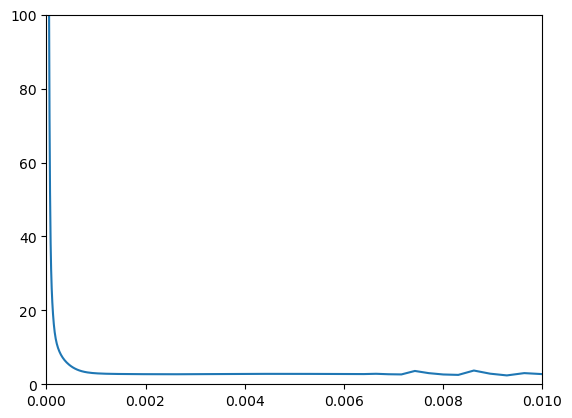

In [514]:
plt.plot(history.history["lr"], history.history["loss"])
plt.axis([0,0.01,0,100])

The optimum learning rate for the SGD optimizer for the Simple RNN model is 5e-3

Now, training the model with the optimum learning rate

In [522]:
epoch_opt = 5000 ##Optimum number of epochs for this model
simple_rnn.compile(optimizer = keras.optimizers.Adam(learning_rate = 5e-3), loss=keras.losses.mean_squared_error)
early_stopping = keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 500, restore_best_weights=True)
history = simple_rnn.fit(train_dt, epochs = epoch_opt, validation_data=val_dt, callbacks=[early_stopping])

Epoch 1/5000
76/76 [==============================] - 3s 12ms/step - loss: 681.3093 - val_loss: 20.7116
Epoch 2/5000
76/76 [==============================] - 0s 5ms/step - loss: 468.3637 - val_loss: 5.3113
Epoch 3/5000
76/76 [==============================] - 0s 5ms/step - loss: 292.7296 - val_loss: 30.4993
Epoch 4/5000
76/76 [==============================] - 0s 5ms/step - loss: 174.0310 - val_loss: 82.3864
Epoch 5/5000
76/76 [==============================] - 0s 5ms/step - loss: 128.2585 - val_loss: 106.9443
Epoch 6/5000
76/76 [==============================] - 0s 5ms/step - loss: 98.6746 - val_loss: 61.7596
Epoch 7/5000
76/76 [==============================] - 0s 5ms/step - loss: 72.9288 - val_loss: 44.9934
Epoch 8/5000
76/76 [==============================] - 0s 5ms/step - loss: 53.6682 - val_loss: 30.9053
Epoch 9/5000
76/76 [==============================] - 0s 5ms/step - loss: 40.7799 - val_loss: 23.5795
Epoch 10/5000
76/76 [==============================] - 0s 5ms/step - loss: 3

76/76 [==============================] - 0s 5ms/step - loss: 5.1573 - val_loss: 5.2286
Epoch 82/5000
76/76 [==============================] - 0s 5ms/step - loss: 5.3073 - val_loss: 13.6171
Epoch 83/5000
76/76 [==============================] - 0s 5ms/step - loss: 3.6654 - val_loss: 12.8988
Epoch 84/5000
76/76 [==============================] - 0s 5ms/step - loss: 3.7208 - val_loss: 15.4308
Epoch 85/5000
76/76 [==============================] - 0s 5ms/step - loss: 2.8851 - val_loss: 12.5249
Epoch 86/5000
76/76 [==============================] - 0s 5ms/step - loss: 2.5449 - val_loss: 13.2967
Epoch 87/5000
76/76 [==============================] - 0s 5ms/step - loss: 2.8861 - val_loss: 12.9272
Epoch 88/5000
76/76 [==============================] - 0s 5ms/step - loss: 2.6292 - val_loss: 8.9724
Epoch 89/5000
76/76 [==============================] - 0s 5ms/step - loss: 3.3571 - val_loss: 9.4374
Epoch 90/5000
76/76 [==============================] - 0s 5ms/step - loss: 2.9848 - val_loss: 51.08

Epoch 161/5000
76/76 [==============================] - 0s 6ms/step - loss: 2.3168 - val_loss: 17.0343
Epoch 162/5000
76/76 [==============================] - 1s 7ms/step - loss: 2.7606 - val_loss: 13.3581
Epoch 163/5000
76/76 [==============================] - 0s 6ms/step - loss: 2.1627 - val_loss: 16.5256
Epoch 164/5000
76/76 [==============================] - 1s 7ms/step - loss: 2.6972 - val_loss: 20.0448
Epoch 165/5000
76/76 [==============================] - 0s 6ms/step - loss: 2.2997 - val_loss: 13.2379
Epoch 166/5000
76/76 [==============================] - 0s 6ms/step - loss: 2.2517 - val_loss: 17.3055
Epoch 167/5000
76/76 [==============================] - 0s 6ms/step - loss: 2.3759 - val_loss: 21.3969
Epoch 168/5000
76/76 [==============================] - 0s 6ms/step - loss: 2.2321 - val_loss: 19.0974
Epoch 169/5000
76/76 [==============================] - 0s 6ms/step - loss: 2.1773 - val_loss: 13.4428
Epoch 170/5000
76/76 [==============================] - 0s 6ms/step - los

76/76 [==============================] - 0s 5ms/step - loss: 2.1344 - val_loss: 13.3022
Epoch 241/5000
76/76 [==============================] - 0s 5ms/step - loss: 2.2053 - val_loss: 12.6193
Epoch 242/5000
76/76 [==============================] - 0s 5ms/step - loss: 1.7319 - val_loss: 16.7049
Epoch 243/5000
76/76 [==============================] - 0s 5ms/step - loss: 2.0409 - val_loss: 18.8421
Epoch 244/5000
76/76 [==============================] - 0s 5ms/step - loss: 1.8157 - val_loss: 16.5590
Epoch 245/5000
76/76 [==============================] - 0s 5ms/step - loss: 2.3686 - val_loss: 18.8328
Epoch 246/5000
76/76 [==============================] - 0s 5ms/step - loss: 2.6838 - val_loss: 18.8192
Epoch 247/5000
76/76 [==============================] - 0s 5ms/step - loss: 2.2263 - val_loss: 18.3474
Epoch 248/5000
76/76 [==============================] - 0s 5ms/step - loss: 2.0087 - val_loss: 12.9037
Epoch 249/5000
76/76 [==============================] - 0s 5ms/step - loss: 2.7059 - val

76/76 [==============================] - 1s 7ms/step - loss: 1.9665 - val_loss: 20.9212
Epoch 320/5000
76/76 [==============================] - 0s 5ms/step - loss: 1.6819 - val_loss: 17.6265
Epoch 321/5000
76/76 [==============================] - 0s 6ms/step - loss: 1.6050 - val_loss: 16.5120
Epoch 322/5000
76/76 [==============================] - 0s 5ms/step - loss: 1.5765 - val_loss: 19.4701
Epoch 323/5000
76/76 [==============================] - 0s 5ms/step - loss: 1.9187 - val_loss: 22.3545
Epoch 324/5000
76/76 [==============================] - 0s 5ms/step - loss: 1.8427 - val_loss: 18.2861
Epoch 325/5000
76/76 [==============================] - 0s 5ms/step - loss: 1.6708 - val_loss: 21.7505
Epoch 326/5000
76/76 [==============================] - 0s 5ms/step - loss: 1.7234 - val_loss: 18.8322
Epoch 327/5000
76/76 [==============================] - 0s 5ms/step - loss: 1.7869 - val_loss: 20.3852
Epoch 328/5000
76/76 [==============================] - 0s 5ms/step - loss: 1.9096 - val

76/76 [==============================] - 0s 5ms/step - loss: 1.6075 - val_loss: 16.8856
Epoch 399/5000
76/76 [==============================] - 0s 5ms/step - loss: 2.3501 - val_loss: 26.8181
Epoch 400/5000
76/76 [==============================] - 0s 6ms/step - loss: 1.7619 - val_loss: 18.6627
Epoch 401/5000
76/76 [==============================] - 0s 5ms/step - loss: 1.5910 - val_loss: 17.8652
Epoch 402/5000
76/76 [==============================] - 0s 5ms/step - loss: 1.9692 - val_loss: 21.9519
Epoch 403/5000
76/76 [==============================] - 0s 5ms/step - loss: 1.9713 - val_loss: 14.7116
Epoch 404/5000
76/76 [==============================] - 0s 5ms/step - loss: 1.8614 - val_loss: 22.9679
Epoch 405/5000
76/76 [==============================] - 0s 5ms/step - loss: 2.0062 - val_loss: 18.5688
Epoch 406/5000
76/76 [==============================] - 0s 6ms/step - loss: 1.9048 - val_loss: 20.3375
Epoch 407/5000
76/76 [==============================] - 0s 5ms/step - loss: 1.9390 - val

76/76 [==============================] - 0s 5ms/step - loss: 1.5575 - val_loss: 20.8633
Epoch 478/5000
76/76 [==============================] - 0s 5ms/step - loss: 1.4310 - val_loss: 18.9455
Epoch 479/5000
76/76 [==============================] - 0s 5ms/step - loss: 1.3564 - val_loss: 20.2351
Epoch 480/5000
76/76 [==============================] - 0s 6ms/step - loss: 1.5774 - val_loss: 20.6990
Epoch 481/5000
76/76 [==============================] - 0s 5ms/step - loss: 1.6639 - val_loss: 20.5982
Epoch 482/5000
76/76 [==============================] - 0s 5ms/step - loss: 1.9963 - val_loss: 18.6058
Epoch 483/5000
76/76 [==============================] - 0s 5ms/step - loss: 2.7821 - val_loss: 23.2103
Epoch 484/5000
76/76 [==============================] - 0s 5ms/step - loss: 2.2628 - val_loss: 16.3527
Epoch 485/5000
76/76 [==============================] - 0s 5ms/step - loss: 2.1201 - val_loss: 21.3500
Epoch 486/5000
76/76 [==============================] - 0s 5ms/step - loss: 1.6965 - val

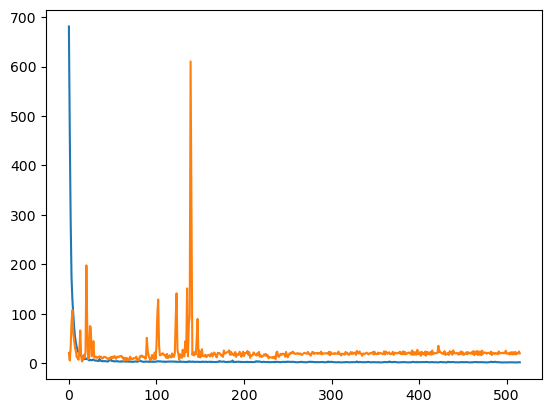

In [523]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
# plt.axis([0, 600, 0, 5])

76/76 [==============================] - 1s 3ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_12004\2202500861.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  predict_plot(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_12004\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_12004\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


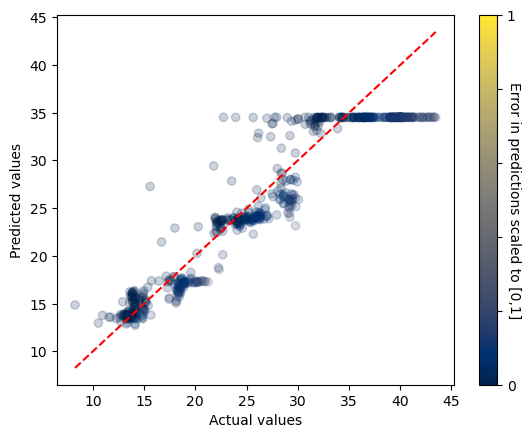

C:\Users\spect\AppData\Local\Temp\ipykernel_12004\2202500861.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


10.309761583390577

In [524]:
rnn_mse(model = simple_rnn, window_size = window, dt = train_dt, y = y_train)

32/32 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_12004\2202500861.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  predict_plot(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_12004\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_12004\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


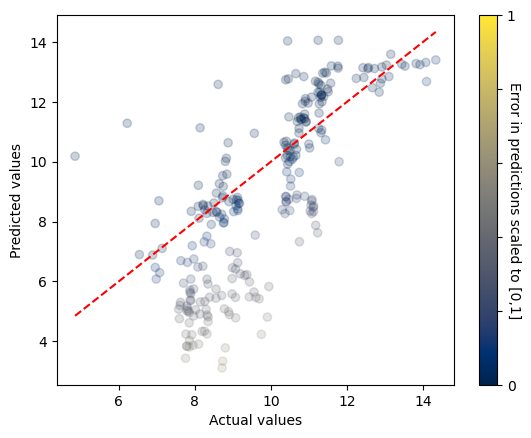

C:\Users\spect\AppData\Local\Temp\ipykernel_12004\2202500861.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


4.667022564176249

In [525]:
rnn_mse(model = simple_rnn, window_size = window, dt = val_dt, y = y_val)

In [526]:
rnn_r2(model = simple_rnn, window_size = window, dt = train_dt, y = y_train)

76/76 [==============================] - 0s 3ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_12004\2202500861.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return r2_score(y[window_size-1:], preds)


0.8832512595440436

In [527]:
rnn_r2(model = simple_rnn, window_size = window, dt = val_dt, y = y_val)

32/32 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_12004\2202500861.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return r2_score(y[window_size-1:], preds)


-0.6293064175301075

In [133]:
## Saving the model
# simple_rnn.save("simple_rnn_best_w3_b10.h5")

***

### 6.3.2 LSTM

In [553]:
lstm = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=[window, X_train_dca.shape[1]]),
    keras.layers.Bidirectional(keras.layers.LSTM(30, return_sequences=True)),
    keras.layers.Bidirectional(keras.layers.LSTM(10, return_sequences=True)),
    keras.layers.Dense(1)
])
lstm.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_36 (Bidirecti  (None, 3, 60)            8880      
 onal)                                                           
                                                                 
 bidirectional_37 (Bidirecti  (None, 3, 20)            5680      
 onal)                                                           
                                                                 
 dense_56 (Dense)            (None, 3, 1)              21        
                                                                 
Total params: 14,581
Trainable params: 14,581
Non-trainable params: 0
_________________________________________________________________


In [543]:
## Finding out the optimum learning rate for LSTM RNN model

lstm.compile(optimizer = keras.optimizers.SGD(), loss = keras.losses.mean_squared_error)
lr_scheduler = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8*10**(epoch/62))
history = lstm.fit(train_dt, validation_data = val_dt, epochs = 500, callbacks = [lr_scheduler])

Epoch 1/500
76/76 [==============================] - 9s 25ms/step - loss: 7.4811 - val_loss: 2.2666 - lr: 1.0000e-08
Epoch 2/500
76/76 [==============================] - 1s 7ms/step - loss: 7.4810 - val_loss: 2.2666 - lr: 1.0378e-08
Epoch 3/500
76/76 [==============================] - 1s 7ms/step - loss: 7.4809 - val_loss: 2.2667 - lr: 1.0771e-08
Epoch 4/500
76/76 [==============================] - 1s 7ms/step - loss: 7.4808 - val_loss: 2.2667 - lr: 1.1179e-08
Epoch 5/500
76/76 [==============================] - 1s 7ms/step - loss: 7.4808 - val_loss: 2.2668 - lr: 1.1602e-08
Epoch 6/500
76/76 [==============================] - 1s 7ms/step - loss: 7.4807 - val_loss: 2.2668 - lr: 1.2041e-08
Epoch 7/500
76/76 [==============================] - 1s 7ms/step - loss: 7.4806 - val_loss: 2.2668 - lr: 1.2496e-08
Epoch 8/500
76/76 [==============================] - 1s 7ms/step - loss: 7.4805 - val_loss: 2.2669 - lr: 1.2969e-08
Epoch 9/500
76/76 [==============================] - 1s 7ms/step - loss

76/76 [==============================] - 1s 7ms/step - loss: 7.4565 - val_loss: 2.2800 - lr: 1.3460e-07
Epoch 72/500
76/76 [==============================] - 1s 7ms/step - loss: 7.4555 - val_loss: 2.2805 - lr: 1.3969e-07
Epoch 73/500
76/76 [==============================] - 1s 7ms/step - loss: 7.4544 - val_loss: 2.2811 - lr: 1.4497e-07
Epoch 74/500
76/76 [==============================] - 1s 7ms/step - loss: 7.4534 - val_loss: 2.2817 - lr: 1.5046e-07
Epoch 75/500
76/76 [==============================] - 1s 7ms/step - loss: 7.4523 - val_loss: 2.2823 - lr: 1.5615e-07
Epoch 76/500
76/76 [==============================] - 1s 7ms/step - loss: 7.4511 - val_loss: 2.2829 - lr: 1.6206e-07
Epoch 77/500
76/76 [==============================] - 1s 7ms/step - loss: 7.4499 - val_loss: 2.2836 - lr: 1.6819e-07
Epoch 78/500
76/76 [==============================] - 1s 7ms/step - loss: 7.4487 - val_loss: 2.2843 - lr: 1.7456e-07
Epoch 79/500
76/76 [==============================] - 1s 7ms/step - loss: 7.4

Epoch 141/500
76/76 [==============================] - 1s 7ms/step - loss: 7.1898 - val_loss: 2.4452 - lr: 1.8116e-06
Epoch 142/500
76/76 [==============================] - 1s 7ms/step - loss: 7.1809 - val_loss: 2.4510 - lr: 1.8802e-06
Epoch 143/500
76/76 [==============================] - 1s 7ms/step - loss: 7.1718 - val_loss: 2.4570 - lr: 1.9513e-06
Epoch 144/500
76/76 [==============================] - 1s 7ms/step - loss: 7.1624 - val_loss: 2.4630 - lr: 2.0251e-06
Epoch 145/500
76/76 [==============================] - 1s 7ms/step - loss: 7.1529 - val_loss: 2.4692 - lr: 2.1017e-06
Epoch 146/500
76/76 [==============================] - 1s 7ms/step - loss: 7.1431 - val_loss: 2.4756 - lr: 2.1813e-06
Epoch 147/500
76/76 [==============================] - 0s 6ms/step - loss: 7.1331 - val_loss: 2.4820 - lr: 2.2638e-06
Epoch 148/500
76/76 [==============================] - 0s 6ms/step - loss: 7.1228 - val_loss: 2.4886 - lr: 2.3495e-06
Epoch 149/500
76/76 [==============================] - 1

76/76 [==============================] - 0s 6ms/step - loss: 5.8798 - val_loss: 2.9141 - lr: 2.3495e-05
Epoch 211/500
76/76 [==============================] - 1s 7ms/step - loss: 5.8494 - val_loss: 2.9258 - lr: 2.4384e-05
Epoch 212/500
76/76 [==============================] - 0s 6ms/step - loss: 5.8187 - val_loss: 2.9381 - lr: 2.5306e-05
Epoch 213/500
76/76 [==============================] - 0s 6ms/step - loss: 5.7877 - val_loss: 2.9510 - lr: 2.6264e-05
Epoch 214/500
76/76 [==============================] - 1s 7ms/step - loss: 5.7564 - val_loss: 2.9646 - lr: 2.7257e-05
Epoch 215/500
76/76 [==============================] - 1s 7ms/step - loss: 5.7247 - val_loss: 2.9788 - lr: 2.8289e-05
Epoch 216/500
76/76 [==============================] - 0s 6ms/step - loss: 5.6928 - val_loss: 2.9937 - lr: 2.9359e-05
Epoch 217/500
76/76 [==============================] - 1s 7ms/step - loss: 5.6605 - val_loss: 3.0094 - lr: 3.0470e-05
Epoch 218/500
76/76 [==============================] - 0s 6ms/step - l

76/76 [==============================] - 1s 7ms/step - loss: 3.3787 - val_loss: 3.9055 - lr: 3.0470e-04
Epoch 280/500
76/76 [==============================] - 0s 6ms/step - loss: 3.3514 - val_loss: 3.8678 - lr: 3.1623e-04
Epoch 281/500
76/76 [==============================] - 1s 7ms/step - loss: 3.3247 - val_loss: 3.8281 - lr: 3.2819e-04
Epoch 282/500
76/76 [==============================] - 1s 7ms/step - loss: 3.2983 - val_loss: 3.7865 - lr: 3.4061e-04
Epoch 283/500
76/76 [==============================] - 1s 7ms/step - loss: 3.2725 - val_loss: 3.7432 - lr: 3.5350e-04
Epoch 284/500
76/76 [==============================] - 0s 7ms/step - loss: 3.2470 - val_loss: 3.6984 - lr: 3.6687e-04
Epoch 285/500
76/76 [==============================] - 0s 6ms/step - loss: 3.2220 - val_loss: 3.6525 - lr: 3.8075e-04
Epoch 286/500
76/76 [==============================] - 1s 7ms/step - loss: 3.1973 - val_loss: 3.6055 - lr: 3.9516e-04
Epoch 287/500
76/76 [==============================] - 1s 7ms/step - l

Epoch 350/500
76/76 [==============================] - 0s 7ms/step - loss: 2.0517 - val_loss: 4.7159 - lr: 0.0043
Epoch 351/500
76/76 [==============================] - 1s 7ms/step - loss: 2.0427 - val_loss: 4.7890 - lr: 0.0044
Epoch 352/500
76/76 [==============================] - 0s 6ms/step - loss: 2.0339 - val_loss: 4.8604 - lr: 0.0046
Epoch 353/500
76/76 [==============================] - 1s 7ms/step - loss: 2.0256 - val_loss: 4.9303 - lr: 0.0048
Epoch 354/500
76/76 [==============================] - 0s 6ms/step - loss: 2.0177 - val_loss: 4.9989 - lr: 0.0049
Epoch 355/500
76/76 [==============================] - 1s 7ms/step - loss: 2.0104 - val_loss: 5.0664 - lr: 0.0051
Epoch 356/500
76/76 [==============================] - 1s 7ms/step - loss: 2.0038 - val_loss: 5.1329 - lr: 0.0053
Epoch 357/500
76/76 [==============================] - 1s 7ms/step - loss: 1.9979 - val_loss: 5.1986 - lr: 0.0055
Epoch 358/500
76/76 [==============================] - 1s 7ms/step - loss: 1.9926 - val_

Epoch 422/500
76/76 [==============================] - 0s 6ms/step - loss: 5.0244 - val_loss: 10.5537 - lr: 0.0617
Epoch 423/500
76/76 [==============================] - 1s 7ms/step - loss: 4.5884 - val_loss: 11.8709 - lr: 0.0640
Epoch 424/500
76/76 [==============================] - 0s 6ms/step - loss: 6.6590 - val_loss: 10.8131 - lr: 0.0665
Epoch 425/500
76/76 [==============================] - 0s 6ms/step - loss: 8.2476 - val_loss: 12.6495 - lr: 0.0690
Epoch 426/500
76/76 [==============================] - 0s 6ms/step - loss: 12.9580 - val_loss: 11.0999 - lr: 0.0716
Epoch 427/500
76/76 [==============================] - 0s 6ms/step - loss: 13.2173 - val_loss: 9.8389 - lr: 0.0743
Epoch 428/500
76/76 [==============================] - 0s 6ms/step - loss: 9.3862 - val_loss: 9.8278 - lr: 0.0771
Epoch 429/500
76/76 [==============================] - 0s 6ms/step - loss: 16.9195 - val_loss: 11.0834 - lr: 0.0800
Epoch 430/500
76/76 [==============================] - 0s 6ms/step - loss: 25.4

76/76 [==============================] - 0s 7ms/step - loss: 21.5597 - val_loss: 24.2017 - lr: 0.8305
Epoch 493/500
76/76 [==============================] - 1s 7ms/step - loss: 25.1320 - val_loss: 25.4153 - lr: 0.8620
Epoch 494/500
76/76 [==============================] - 1s 8ms/step - loss: 31.2759 - val_loss: 26.3286 - lr: 0.8946
Epoch 495/500
76/76 [==============================] - 1s 8ms/step - loss: 43.7223 - val_loss: 28.1787 - lr: 0.9284
Epoch 496/500
76/76 [==============================] - 1s 7ms/step - loss: 75.7594 - val_loss: 30.0289 - lr: 0.9635
Epoch 497/500
76/76 [==============================] - 1s 7ms/step - loss: 404.7614 - val_loss: 103.8184 - lr: 1.0000
Epoch 498/500
76/76 [==============================] - 1s 7ms/step - loss: 1803682656026624.0000 - val_loss: 12367339774573281280.0000 - lr: 1.0378
Epoch 499/500
76/76 [==============================] - 1s 7ms/step - loss: nan - val_loss: nan - lr: 1.0771
Epoch 500/500
76/76 [==============================] - 1s 7m

(0.0, 0.02, 0.0, 10.0)

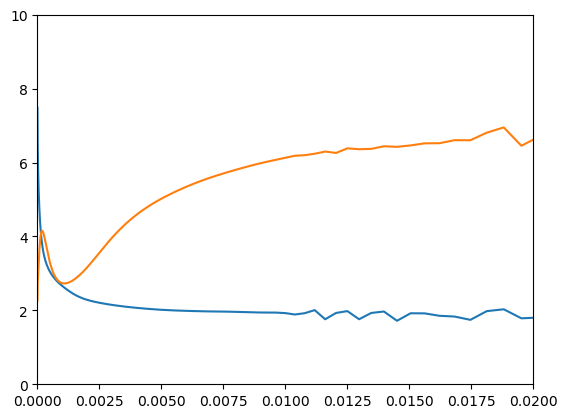

In [551]:
plt.plot(history.history["lr"], history.history["loss"])
plt.plot(history.history["lr"], history.history["val_loss"])
plt.axis([0, 0.02, 0, 10])

The optimum learning rate for the LSTM RNN model with the given configuration is 1e-3

In [554]:
## Using the optimum learning rate for training the model

epoch_opt = 5000 ##Optimum number of epochs for this model

lstm.compile(optimizer = keras.optimizers.SGD(1e-3), loss=keras.losses.mean_squared_error)
early_stopping = keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 500, restore_best_weights=True)
history = lstm.fit(train_dt, epochs = epoch_opt, validation_data=val_dt, callbacks=[early_stopping])

Epoch 1/5000
76/76 [==============================] - 7s 24ms/step - loss: 591.5170 - val_loss: 6.6355
Epoch 2/5000
76/76 [==============================] - 0s 7ms/step - loss: 187.8140 - val_loss: 5.6029
Epoch 3/5000
76/76 [==============================] - 1s 7ms/step - loss: 33.0946 - val_loss: 3.3085
Epoch 4/5000
76/76 [==============================] - 1s 7ms/step - loss: 14.2873 - val_loss: 4.1642
Epoch 5/5000
76/76 [==============================] - 0s 6ms/step - loss: 10.6515 - val_loss: 5.2258
Epoch 6/5000
76/76 [==============================] - 1s 7ms/step - loss: 9.4190 - val_loss: 5.9295
Epoch 7/5000
76/76 [==============================] - 1s 7ms/step - loss: 8.7814 - val_loss: 6.2692
Epoch 8/5000
76/76 [==============================] - 1s 7ms/step - loss: 8.3663 - val_loss: 6.3469
Epoch 9/5000
76/76 [==============================] - 1s 7ms/step - loss: 8.0583 - val_loss: 6.2522
Epoch 10/5000
76/76 [==============================] - 1s 7ms/step - loss: 7.8103 - val_loss

76/76 [==============================] - 0s 7ms/step - loss: 3.6557 - val_loss: 2.0488
Epoch 83/5000
76/76 [==============================] - 0s 6ms/step - loss: 3.6286 - val_loss: 2.0212
Epoch 84/5000
76/76 [==============================] - 1s 7ms/step - loss: 3.6017 - val_loss: 1.9918
Epoch 85/5000
76/76 [==============================] - 1s 7ms/step - loss: 3.5752 - val_loss: 1.9609
Epoch 86/5000
76/76 [==============================] - 0s 7ms/step - loss: 3.5490 - val_loss: 1.9287
Epoch 87/5000
76/76 [==============================] - 0s 7ms/step - loss: 3.5232 - val_loss: 1.8955
Epoch 88/5000
76/76 [==============================] - 0s 6ms/step - loss: 3.4976 - val_loss: 1.8613
Epoch 89/5000
76/76 [==============================] - 0s 6ms/step - loss: 3.4725 - val_loss: 1.8264
Epoch 90/5000
76/76 [==============================] - 0s 6ms/step - loss: 3.4476 - val_loss: 1.7910
Epoch 91/5000
76/76 [==============================] - 0s 6ms/step - loss: 3.4232 - val_loss: 1.7552
Epoc

76/76 [==============================] - 1s 7ms/step - loss: 2.2191 - val_loss: 1.5853
Epoch 163/5000
76/76 [==============================] - 1s 7ms/step - loss: 2.2085 - val_loss: 1.6059
Epoch 164/5000
76/76 [==============================] - 0s 7ms/step - loss: 2.1980 - val_loss: 1.6265
Epoch 165/5000
76/76 [==============================] - 0s 6ms/step - loss: 2.1877 - val_loss: 1.6472
Epoch 166/5000
76/76 [==============================] - 0s 6ms/step - loss: 2.1777 - val_loss: 1.6679
Epoch 167/5000
76/76 [==============================] - 0s 6ms/step - loss: 2.1678 - val_loss: 1.6885
Epoch 168/5000
76/76 [==============================] - 1s 7ms/step - loss: 2.1581 - val_loss: 1.7092
Epoch 169/5000
76/76 [==============================] - 0s 6ms/step - loss: 2.1486 - val_loss: 1.7298
Epoch 170/5000
76/76 [==============================] - 1s 7ms/step - loss: 2.1393 - val_loss: 1.7504
Epoch 171/5000
76/76 [==============================] - 0s 6ms/step - loss: 2.1301 - val_loss: 1.

76/76 [==============================] - 0s 7ms/step - loss: 1.7722 - val_loss: 2.8640
Epoch 243/5000
76/76 [==============================] - 0s 6ms/step - loss: 1.7690 - val_loss: 2.8734
Epoch 244/5000
76/76 [==============================] - 0s 7ms/step - loss: 1.7657 - val_loss: 2.8827
Epoch 245/5000
76/76 [==============================] - 0s 6ms/step - loss: 1.7625 - val_loss: 2.8919
Epoch 246/5000
76/76 [==============================] - 1s 7ms/step - loss: 1.7594 - val_loss: 2.9009
Epoch 247/5000
76/76 [==============================] - 0s 6ms/step - loss: 1.7562 - val_loss: 2.9098
Epoch 248/5000
76/76 [==============================] - 0s 6ms/step - loss: 1.7531 - val_loss: 2.9185
Epoch 249/5000
76/76 [==============================] - 0s 6ms/step - loss: 1.7499 - val_loss: 2.9272
Epoch 250/5000
76/76 [==============================] - 1s 7ms/step - loss: 1.7468 - val_loss: 2.9357
Epoch 251/5000
76/76 [==============================] - 1s 7ms/step - loss: 1.7437 - val_loss: 2.

76/76 [==============================] - 0s 6ms/step - loss: 1.5602 - val_loss: 3.3688
Epoch 323/5000
76/76 [==============================] - 0s 6ms/step - loss: 1.5580 - val_loss: 3.3735
Epoch 324/5000
76/76 [==============================] - 0s 6ms/step - loss: 1.5558 - val_loss: 3.3782
Epoch 325/5000
76/76 [==============================] - 0s 6ms/step - loss: 1.5536 - val_loss: 3.3828
Epoch 326/5000
76/76 [==============================] - 0s 6ms/step - loss: 1.5514 - val_loss: 3.3874
Epoch 327/5000
76/76 [==============================] - 0s 6ms/step - loss: 1.5493 - val_loss: 3.3920
Epoch 328/5000
76/76 [==============================] - 0s 6ms/step - loss: 1.5471 - val_loss: 3.3966
Epoch 329/5000
76/76 [==============================] - 0s 6ms/step - loss: 1.5450 - val_loss: 3.4011
Epoch 330/5000
76/76 [==============================] - 0s 6ms/step - loss: 1.5428 - val_loss: 3.4057
Epoch 331/5000
76/76 [==============================] - 0s 6ms/step - loss: 1.5407 - val_loss: 3.

76/76 [==============================] - 1s 7ms/step - loss: 1.4046 - val_loss: 3.6898
Epoch 403/5000
76/76 [==============================] - 1s 7ms/step - loss: 1.4029 - val_loss: 3.6933
Epoch 404/5000
76/76 [==============================] - 1s 7ms/step - loss: 1.4012 - val_loss: 3.6968
Epoch 405/5000
76/76 [==============================] - 1s 7ms/step - loss: 1.3995 - val_loss: 3.7002
Epoch 406/5000
76/76 [==============================] - 1s 7ms/step - loss: 1.3978 - val_loss: 3.7037
Epoch 407/5000
76/76 [==============================] - 0s 6ms/step - loss: 1.3960 - val_loss: 3.7071
Epoch 408/5000
76/76 [==============================] - 0s 6ms/step - loss: 1.3943 - val_loss: 3.7105
Epoch 409/5000
76/76 [==============================] - 0s 6ms/step - loss: 1.3926 - val_loss: 3.7140
Epoch 410/5000
76/76 [==============================] - 0s 6ms/step - loss: 1.3909 - val_loss: 3.7174
Epoch 411/5000
76/76 [==============================] - 0s 6ms/step - loss: 1.3892 - val_loss: 3.

76/76 [==============================] - 1s 7ms/step - loss: 1.2795 - val_loss: 3.9321
Epoch 483/5000
76/76 [==============================] - 1s 7ms/step - loss: 1.2781 - val_loss: 3.9347
Epoch 484/5000
76/76 [==============================] - 1s 7ms/step - loss: 1.2767 - val_loss: 3.9372
Epoch 485/5000
76/76 [==============================] - 1s 7ms/step - loss: 1.2753 - val_loss: 3.9398
Epoch 486/5000
76/76 [==============================] - 0s 7ms/step - loss: 1.2739 - val_loss: 3.9423
Epoch 487/5000
76/76 [==============================] - 1s 7ms/step - loss: 1.2725 - val_loss: 3.9448
Epoch 488/5000
76/76 [==============================] - 0s 7ms/step - loss: 1.2712 - val_loss: 3.9473
Epoch 489/5000
76/76 [==============================] - 1s 7ms/step - loss: 1.2698 - val_loss: 3.9498
Epoch 490/5000
76/76 [==============================] - 0s 7ms/step - loss: 1.2684 - val_loss: 3.9523
Epoch 491/5000
76/76 [==============================] - 1s 7ms/step - loss: 1.2670 - val_loss: 3.

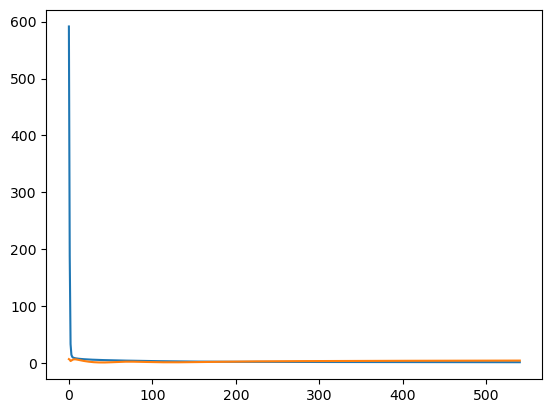

In [555]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
# plt.axis([0, 500, 0, 10])

76/76 [==============================] - 2s 3ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_12004\2202500861.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  predict_plot(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_12004\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_12004\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


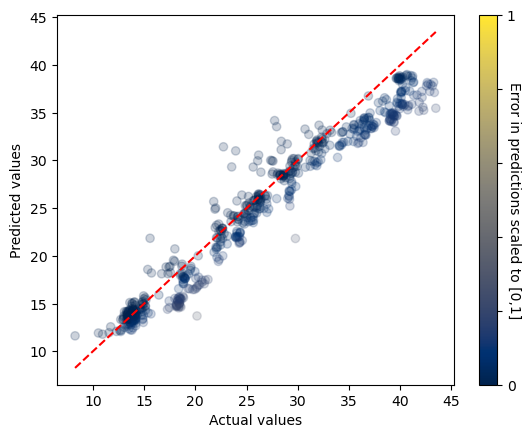

C:\Users\spect\AppData\Local\Temp\ipykernel_12004\2202500861.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


6.086239634087521

In [556]:
rnn_mse(model = lstm, window_size = window,  dt = train_dt, y = y_train)

32/32 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_12004\2202500861.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  predict_plot(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_12004\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_12004\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


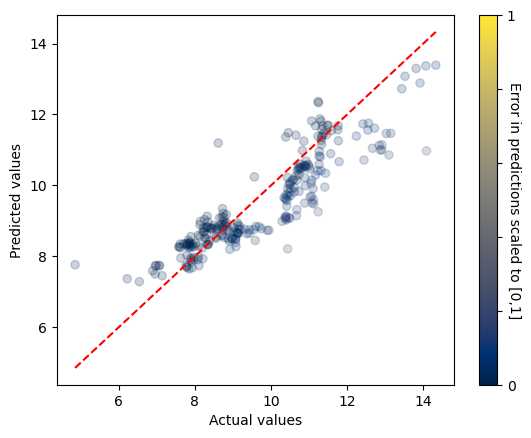

C:\Users\spect\AppData\Local\Temp\ipykernel_12004\2202500861.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


0.6577743248946182

In [557]:
rnn_mse(model = lstm, window_size = window, dt = val_dt, y = y_val)

In [558]:
rnn_r2(model = lstm, window_size = window,  dt = train_dt, y = y_train)

76/76 [==============================] - 0s 3ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_12004\2202500861.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return r2_score(y[window_size-1:], preds)


0.9310788318773947

In [559]:
rnn_r2(model = lstm, window_size = window, dt = val_dt, y = y_val)

32/32 [==============================] - 0s 3ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_12004\2202500861.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return r2_score(y[window_size-1:], preds)


0.7703640995730866

In [561]:
## Saving the model
# lstm.save("lstm.h5")

In [175]:
## Loading a saved model
# lstm = keras.models.load_model("lstm_best_w2_b32.h5")

***

### 6.3.3 GRU

In [562]:
gru = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=[window, X_train_dca.shape[1]]),
    keras.layers.Bidirectional(keras.layers.GRU(30, return_sequences=True)),
    keras.layers.Bidirectional(keras.layers.GRU(10, return_sequences=True)),
    keras.layers.Dense(1)
])
gru.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_38 (Bidirecti  (None, 3, 60)            6840      
 onal)                                                           
                                                                 
 bidirectional_39 (Bidirecti  (None, 3, 20)            4320      
 onal)                                                           
                                                                 
 dense_57 (Dense)            (None, 3, 1)              21        
                                                                 
Total params: 11,181
Trainable params: 11,181
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## Finding out the optimum learning rate for GRU RNN model

gru.compile(optimizer = keras.optimizers.SGD(), loss = keras.losses.mean_squared_error)
lr_scheduler = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8*10**(epoch/62))
history = gru.fit(train_dt, validation_data = val_dt, epochs = 500, callbacks = [lr_scheduler])

Epoch 1/500
76/76 [==============================] - 8s 24ms/step - loss: 771.1429 - val_loss: 95.5762 - lr: 1.0000e-08
Epoch 2/500
76/76 [==============================] - 1s 8ms/step - loss: 771.1373 - val_loss: 95.5751 - lr: 1.0378e-08
Epoch 3/500
76/76 [==============================] - 1s 9ms/step - loss: 771.1320 - val_loss: 95.5739 - lr: 1.0771e-08
Epoch 4/500
76/76 [==============================] - 1s 8ms/step - loss: 771.1259 - val_loss: 95.5727 - lr: 1.1179e-08
Epoch 5/500
76/76 [==============================] - 1s 9ms/step - loss: 771.1198 - val_loss: 95.5715 - lr: 1.1602e-08
Epoch 6/500
76/76 [==============================] - 1s 8ms/step - loss: 771.1135 - val_loss: 95.5702 - lr: 1.2041e-08
Epoch 7/500
76/76 [==============================] - 1s 9ms/step - loss: 771.1068 - val_loss: 95.5688 - lr: 1.2496e-08
Epoch 8/500
76/76 [==============================] - 1s 8ms/step - loss: 771.1001 - val_loss: 95.5675 - lr: 1.2969e-08
Epoch 9/500
76/76 [============================

76/76 [==============================] - 1s 8ms/step - loss: 769.4844 - val_loss: 95.2351 - lr: 1.2496e-07
Epoch 70/500
76/76 [==============================] - 1s 9ms/step - loss: 769.4163 - val_loss: 95.2211 - lr: 1.2969e-07
Epoch 71/500
76/76 [==============================] - 1s 8ms/step - loss: 769.3455 - val_loss: 95.2065 - lr: 1.3460e-07
Epoch 72/500
76/76 [==============================] - 1s 8ms/step - loss: 769.2719 - val_loss: 95.1914 - lr: 1.3969e-07
Epoch 73/500
76/76 [==============================] - 1s 8ms/step - loss: 769.1958 - val_loss: 95.1758 - lr: 1.4497e-07
Epoch 74/500
76/76 [==============================] - 1s 8ms/step - loss: 769.1167 - val_loss: 95.1595 - lr: 1.5046e-07
Epoch 75/500
76/76 [==============================] - 1s 9ms/step - loss: 769.0347 - val_loss: 95.1426 - lr: 1.5615e-07
Epoch 76/500
76/76 [==============================] - 1s 8ms/step - loss: 768.9494 - val_loss: 95.1251 - lr: 1.6206e-07
Epoch 77/500
76/76 [==============================] -

76/76 [==============================] - 1s 8ms/step - loss: 748.7464 - val_loss: 91.0037 - lr: 1.5615e-06
Epoch 138/500
76/76 [==============================] - 1s 8ms/step - loss: 747.8859 - val_loss: 90.8293 - lr: 1.6206e-06
Epoch 139/500
76/76 [==============================] - 1s 8ms/step - loss: 746.9915 - val_loss: 90.6481 - lr: 1.6819e-06
Epoch 140/500
76/76 [==============================] - 1s 8ms/step - loss: 746.0619 - val_loss: 90.4598 - lr: 1.7456e-06
Epoch 141/500
76/76 [==============================] - 1s 9ms/step - loss: 745.0954 - val_loss: 90.2642 - lr: 1.8116e-06
Epoch 142/500
76/76 [==============================] - 1s 9ms/step - loss: 744.0908 - val_loss: 90.0609 - lr: 1.8802e-06
Epoch 143/500
76/76 [==============================] - 1s 8ms/step - loss: 743.0464 - val_loss: 89.8496 - lr: 1.9513e-06
Epoch 144/500
76/76 [==============================] - 1s 8ms/step - loss: 741.9595 - val_loss: 89.6299 - lr: 2.0251e-06
Epoch 145/500
76/76 [=========================

Epoch 205/500
76/76 [==============================] - 1s 9ms/step - loss: 325.2112 - val_loss: 7.7545 - lr: 1.9513e-05
Epoch 206/500
76/76 [==============================] - 1s 8ms/step - loss: 306.0352 - val_loss: 5.6774 - lr: 2.0251e-05
Epoch 207/500
76/76 [==============================] - 1s 8ms/step - loss: 286.9738 - val_loss: 4.0157 - lr: 2.1017e-05
Epoch 208/500
76/76 [==============================] - 1s 9ms/step - loss: 268.1669 - val_loss: 2.8128 - lr: 2.1813e-05
Epoch 209/500
76/76 [==============================] - 1s 8ms/step - loss: 249.7511 - val_loss: 2.0948 - lr: 2.2638e-05
Epoch 210/500
76/76 [==============================] - 1s 8ms/step - loss: 231.8562 - val_loss: 1.8661 - lr: 2.3495e-05
Epoch 211/500
76/76 [==============================] - 1s 9ms/step - loss: 214.6008 - val_loss: 2.1055 - lr: 2.4384e-05
Epoch 212/500
76/76 [==============================] - 1s 8ms/step - loss: 198.0878 - val_loss: 2.7638 - lr: 2.5306e-05
Epoch 213/500
76/76 [===================

In [ ]:
plt.plot(history.history["lr"], history.history["loss"])
plt.plot(history.history["lr"], history.history["val_loss"])
# plt.axis()

The optimum learning rate for the GRU model in the given architecture is

In [179]:
## Using the optimum SGD learning rate for training of the GRU model

epoch_opt = 5000 

gru.compile(optimizer = keras.optimizers.SGD(), loss=keras.losses.mean_squared_error)
early_stopping = keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 500, restore_best_weights=True)
history = gru.fit(train_dt, epochs = epoch_opt, validation_data=val_dt, callbacks=[early_stopping])

Epoch 1/5000
61/61 [==============================] - 8s 30ms/step - loss: 752.0151 - val_loss: 95.2455
Epoch 2/5000
61/61 [==============================] - 1s 8ms/step - loss: 617.7217 - val_loss: 45.9174
Epoch 3/5000
61/61 [==============================] - 1s 9ms/step - loss: 461.5188 - val_loss: 9.9281
Epoch 4/5000
61/61 [==============================] - 1s 9ms/step - loss: 390.1761 - val_loss: 3.1102
Epoch 5/5000
61/61 [==============================] - 1s 9ms/step - loss: 345.6754 - val_loss: 2.8257
Epoch 6/5000
61/61 [==============================] - 1s 10ms/step - loss: 308.4086 - val_loss: 6.0319
Epoch 7/5000
61/61 [==============================] - 1s 8ms/step - loss: 275.3334 - val_loss: 11.6179
Epoch 8/5000
61/61 [==============================] - 1s 9ms/step - loss: 248.1164 - val_loss: 18.7645
Epoch 9/5000
61/61 [==============================] - 1s 8ms/step - loss: 225.0811 - val_loss: 27.0341
Epoch 10/5000
61/61 [==============================] - 1s 10ms/step - loss:

61/61 [==============================] - 1s 8ms/step - loss: 2.5904 - val_loss: 3.9903
Epoch 82/5000
61/61 [==============================] - 1s 8ms/step - loss: 2.4515 - val_loss: 4.0657
Epoch 83/5000
61/61 [==============================] - 1s 8ms/step - loss: 2.5594 - val_loss: 4.2127
Epoch 84/5000
61/61 [==============================] - 1s 8ms/step - loss: 2.3894 - val_loss: 4.1496
Epoch 85/5000
61/61 [==============================] - 0s 8ms/step - loss: 2.2980 - val_loss: 4.2125
Epoch 86/5000
61/61 [==============================] - 1s 8ms/step - loss: 2.3742 - val_loss: 4.3945
Epoch 87/5000
61/61 [==============================] - 0s 8ms/step - loss: 2.1876 - val_loss: 4.1761
Epoch 88/5000
61/61 [==============================] - 1s 8ms/step - loss: 2.1388 - val_loss: 4.0156
Epoch 89/5000
61/61 [==============================] - 1s 9ms/step - loss: 2.1275 - val_loss: 3.9751
Epoch 90/5000
61/61 [==============================] - 1s 9ms/step - loss: 2.0238 - val_loss: 3.8437
Epoc

61/61 [==============================] - 1s 8ms/step - loss: 2.0020 - val_loss: 4.0709
Epoch 162/5000
61/61 [==============================] - 0s 8ms/step - loss: 1.6391 - val_loss: 5.3509
Epoch 163/5000
61/61 [==============================] - 0s 8ms/step - loss: 1.8237 - val_loss: 6.0875
Epoch 164/5000
61/61 [==============================] - 0s 8ms/step - loss: 1.5572 - val_loss: 5.1071
Epoch 165/5000
61/61 [==============================] - 0s 8ms/step - loss: 1.5994 - val_loss: 4.1635
Epoch 166/5000
61/61 [==============================] - 0s 8ms/step - loss: 1.6295 - val_loss: 4.4862
Epoch 167/5000
61/61 [==============================] - 1s 8ms/step - loss: 1.5073 - val_loss: 5.7332
Epoch 168/5000
61/61 [==============================] - 0s 8ms/step - loss: 1.6542 - val_loss: 6.2102
Epoch 169/5000
61/61 [==============================] - 1s 9ms/step - loss: 1.7757 - val_loss: 4.8953
Epoch 170/5000
61/61 [==============================] - 0s 8ms/step - loss: 1.9560 - val_loss: 4.

61/61 [==============================] - 1s 9ms/step - loss: 1.2489 - val_loss: 9.8330
Epoch 242/5000
61/61 [==============================] - 1s 10ms/step - loss: 1.1911 - val_loss: 10.6453
Epoch 243/5000
61/61 [==============================] - 1s 9ms/step - loss: 1.2251 - val_loss: 9.6993
Epoch 244/5000
61/61 [==============================] - 1s 9ms/step - loss: 1.4679 - val_loss: 9.4765
Epoch 245/5000
61/61 [==============================] - 1s 10ms/step - loss: 1.3730 - val_loss: 10.2325
Epoch 246/5000
61/61 [==============================] - 1s 10ms/step - loss: 1.2906 - val_loss: 10.7400
Epoch 247/5000
61/61 [==============================] - 1s 11ms/step - loss: 1.5763 - val_loss: 9.8808
Epoch 248/5000
61/61 [==============================] - 1s 17ms/step - loss: 1.5519 - val_loss: 9.2641
Epoch 249/5000
61/61 [==============================] - 1s 13ms/step - loss: 1.3530 - val_loss: 10.9761
Epoch 250/5000
61/61 [==============================] - 1s 11ms/step - loss: 1.2725 - v

(0.0, 300.0, 0.0, 5.0)

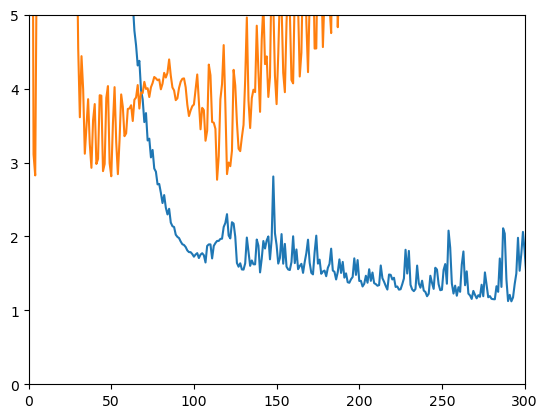

In [184]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
# plt.axis([0, 300, 0, 5])

61/61 [==============================] - 2s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_12004\2202500861.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  predict_plot(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_12004\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_12004\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


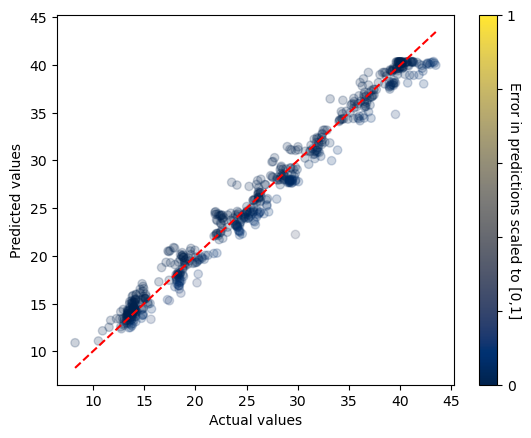

C:\Users\spect\AppData\Local\Temp\ipykernel_12004\2202500861.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


1.5444110817457222

In [181]:
rnn_mse(model = gru, window_size = window, dt = train_dt, y = y_train)

In [185]:
rnn_r2(model = gru, window_size = window, dt = train_dt, y = y_train)

61/61 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_12004\2202500861.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return r2_score(y[window_size-1:], preds)


0.9825109390666689

26/26 [==============================] - 0s 6ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_12004\2202500861.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  predict_plot(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_12004\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_12004\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


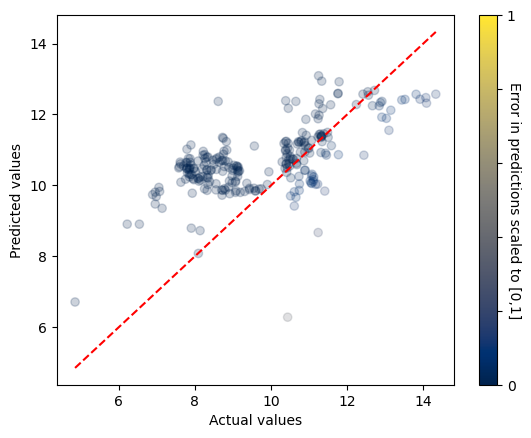

C:\Users\spect\AppData\Local\Temp\ipykernel_12004\2202500861.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


2.6484445237804506

In [182]:
rnn_mse(model = gru, window_size = window, dt = val_dt, y = y_val)

In [186]:
rnn_r2(model = gru, window_size = window, dt = val_dt, y = y_val)

26/26 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_12004\2202500861.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return r2_score(y[window_size-1:], preds)


0.0754003007847901

In [183]:
## Saving the model
# gru.save("gru_best_w3_b10.h5")

***

Creating a function to find the optimum window size and batch size

In [228]:
from collections import defaultdict

save_path = Path(os.getcwd()) / "optimizing_rnn"

# weights_path = dataset_path.parent.parent / "model_weights"  ## Creating a folder to save the initial weights of the model

def rnn_optimizer(model_name, window_trials, batch_trials, X_train, y_train, X_val, y_val, epochs = 1000):
    
    """
    This function can be used to run multiple fits of a model to check the performance of different window sizes 
    and batch sizes used in data preparation on the model performance.
    
    Paste the model code in this function before proceeding. Keep the number of epochs high and include early stopping
    callback with restore_best_weights = True for proper functioning.
    
    Returns history_dict, mse_train, mse_val in dictionary form (batch_size, window_size)
    """
    
    history_dict = defaultdict(tuple)
    mse_train = defaultdict(tuple)
    mse_val = defaultdict(tuple)

    for batch_size in batch_trials:
        for window in window_trials:
            
            ## Preparing the training and validation datasets
            train_dt = seq_2_seq(X_train, y_train, window, batch_size)
            val_dt = seq_2_seq(X_val, y_val, window, batch_size)

            ###### Paste the model here #######
            
            model = keras.models.Sequential([
                keras.layers.InputLayer(input_shape=[window, X_train.shape[1]]),
                keras.layers.Bidirectional(keras.layers.SimpleRNN(30, return_sequences=True)),
                keras.layers.Bidirectional(keras.layers.SimpleRNN(10, return_sequences=True)),
                keras.layers.Dense(1)
            ])

            model.compile(optimizer = keras.optimizers.Adam(), loss=keras.losses.mean_squared_error)
            early_stopping = keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 200, restore_best_weights=True)

            ###### Paste the model here #######

            history_dict[(batch_size, window)] = model.fit(train_dt, epochs = epochs, validation_data=val_dt, 
                                                           callbacks = [early_stopping])
            mse_train[(batch_size, window)] = rnn_mse(model, window, train_dt, y_train, plot = False)
            mse_val[(batch_size, window)] = rnn_mse(model, window, val_dt, y_val, plot = False)
            
            save_path_model = save_path / f"{model_name}_b{batch_size}_w{window}.h5" # Saving the model for future reference
            model.save(save_path_model)
    
    mse_train = sorted(mse_train.items(), key= lambda d:d[1], reverse=False) ## Sorting the mse_train & mse_val dict 
    mse_val = sorted(mse_val.items(), key= lambda d:d[1], reverse=False) ## in the ascending order of mse

    return history_dict, mse_train, mse_val

In [207]:
## Trying the above function for LSTM

window_trials = [2,3,4,5,6]
batch_trials = [8, 10, 16, 20, 32]

epochs = 1000
history_dict_lstm, mse_train_lstm, mse_val_lstm = rnn_optimizer("lstm", window_trials, batch_trials, X_train_dca, y_train, 
                                                               X_val_dca, y_val, epochs)

Epoch 1/1000
88/88 [==============================] - 17s 21ms/step - loss: 733.9228 - val_loss: 90.4815
Epoch 2/1000
88/88 [==============================] - 0s 5ms/step - loss: 596.4134 - val_loss: 41.5283
Epoch 3/1000
88/88 [==============================] - 0s 5ms/step - loss: 394.7657 - val_loss: 7.7905
Epoch 4/1000
88/88 [==============================] - 0s 5ms/step - loss: 321.7191 - val_loss: 2.9225
Epoch 5/1000
88/88 [==============================] - 0s 5ms/step - loss: 276.1414 - val_loss: 6.7118
Epoch 6/1000
88/88 [==============================] - 0s 5ms/step - loss: 241.3358 - val_loss: 13.8983
Epoch 7/1000
88/88 [==============================] - 0s 5ms/step - loss: 213.3901 - val_loss: 22.3724
Epoch 8/1000
88/88 [==============================] - 0s 5ms/step - loss: 190.4864 - val_loss: 30.3562
Epoch 9/1000
88/88 [==============================] - 0s 5ms/step - loss: 171.4542 - val_loss: 35.0618
Epoch 10/1000
88/88 [==============================] - 0s 5ms/step - loss:

88/88 [==============================] - 0s 5ms/step - loss: 1.8905 - val_loss: 1.1796
Epoch 162/1000
88/88 [==============================] - 0s 5ms/step - loss: 1.8475 - val_loss: 1.1757
Epoch 163/1000
88/88 [==============================] - 0s 5ms/step - loss: 1.8752 - val_loss: 1.1830
Epoch 164/1000
88/88 [==============================] - 0s 5ms/step - loss: 1.8322 - val_loss: 1.1798
Epoch 165/1000
88/88 [==============================] - 0s 5ms/step - loss: 1.8593 - val_loss: 1.1865
Epoch 166/1000
88/88 [==============================] - 0s 5ms/step - loss: 1.8154 - val_loss: 1.1838
Epoch 167/1000
88/88 [==============================] - 0s 5ms/step - loss: 1.8415 - val_loss: 1.1899
Epoch 168/1000
88/88 [==============================] - 0s 5ms/step - loss: 1.7967 - val_loss: 1.1880
Epoch 169/1000
88/88 [==============================] - 0s 5ms/step - loss: 1.8197 - val_loss: 1.1933
Epoch 170/1000
88/88 [==============================] - 0s 5ms/step - loss: 1.7754 - val_loss: 1.

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
88/88 [==============================] - 8s 25ms/step - loss: 724.7198 - val_loss: 88.8930
Epoch 2/1000
88/88 [==============================] - 1s 7ms/step - loss: 535.5925 - val_loss: 20.0409
Epoch 3/1000
88/88 [==============================] - 1s 7ms/step - loss: 396.4793 - val_loss: 4.4463
Epoch 4/1000
88/88 [==============================] - 1s 7ms/step - loss: 336.4091 - val_loss: 4.0094
Epoch 5/1000
88/88 [==============================] - 1s 7ms/step - loss: 291.6728 - val_loss: 8.6820
Epoch 6/1000
88/88 [==============================] - 1s 7ms/step - loss: 255.7640 - val_loss: 16.4693
Epoch 7/1000
88/88 [==============================] - 1s 6ms/step - loss: 226.3082 - val_loss: 26.2889
Epoch 8/1000
88/88 [==============================] - 1s 7ms/step - loss: 201.9668 - val_loss: 37.2448
Epoch 9/1000
88/88 [==============================] - 1s 6ms/step - loss: 181.8048 - val_loss: 48.2247
Epoch 10/1000
88/88 [==============================] - 1s 6ms/step - loss: 

88/88 [==============================] - 1s 7ms/step - loss: 1.5662 - val_loss: 2.0101
Epoch 162/1000
88/88 [==============================] - 1s 6ms/step - loss: 1.5250 - val_loss: 1.9875
Epoch 163/1000
88/88 [==============================] - 1s 6ms/step - loss: 1.6848 - val_loss: 2.0006
Epoch 164/1000
88/88 [==============================] - 1s 7ms/step - loss: 1.6165 - val_loss: 2.0159
Epoch 165/1000
88/88 [==============================] - 1s 6ms/step - loss: 1.5996 - val_loss: 2.0467
Epoch 166/1000
88/88 [==============================] - 1s 6ms/step - loss: 1.5282 - val_loss: 2.0708
Epoch 167/1000
88/88 [==============================] - 1s 6ms/step - loss: 1.5020 - val_loss: 2.0654
Epoch 168/1000
88/88 [==============================] - 1s 7ms/step - loss: 1.4973 - val_loss: 2.0771
Epoch 169/1000
88/88 [==============================] - 1s 6ms/step - loss: 1.5675 - val_loss: 2.1082
Epoch 170/1000
88/88 [==============================] - 1s 7ms/step - loss: 1.5000 - val_loss: 2.

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
88/88 [==============================] - 8s 26ms/step - loss: 721.6033 - val_loss: 92.0686
Epoch 2/1000
88/88 [==============================] - 1s 8ms/step - loss: 524.5629 - val_loss: 21.3524
Epoch 3/1000
88/88 [==============================] - 1s 8ms/step - loss: 383.8983 - val_loss: 4.3718
Epoch 4/1000
88/88 [==============================] - 1s 8ms/step - loss: 324.0591 - val_loss: 4.8057
Epoch 5/1000
88/88 [==============================] - 1s 7ms/step - loss: 280.0973 - val_loss: 10.6675
Epoch 6/1000
88/88 [==============================] - 1s 7ms/step - loss: 245.1159 - val_loss: 19.5411
Epoch 7/1000
88/88 [==============================] - 1s 7ms/step - loss: 216.6563 - val_loss: 30.2104
Epoch 8/1000
88/88 [==============================] - 1s 7ms/step - loss: 193.3329 - val_loss: 41.5772
Epoch 9/1000
88/88 [==============================] - 1s 7ms/step - loss: 174.1640 - val_loss: 51.8741
Epoch 10/1000
88/88 [==============================] - 1s 7ms/step - loss:

88/88 [==============================] - 1s 7ms/step - loss: 1.5757 - val_loss: 7.9483
Epoch 162/1000
88/88 [==============================] - 1s 7ms/step - loss: 1.7210 - val_loss: 6.4205
Epoch 163/1000
88/88 [==============================] - 1s 7ms/step - loss: 1.3507 - val_loss: 6.1184
Epoch 164/1000
88/88 [==============================] - 1s 7ms/step - loss: 1.4813 - val_loss: 8.3067
Epoch 165/1000
88/88 [==============================] - 1s 7ms/step - loss: 1.5099 - val_loss: 7.0400
Epoch 166/1000
88/88 [==============================] - 1s 8ms/step - loss: 1.4465 - val_loss: 6.3034
Epoch 167/1000
88/88 [==============================] - 1s 8ms/step - loss: 1.5607 - val_loss: 7.5159
Epoch 168/1000
88/88 [==============================] - 1s 7ms/step - loss: 1.3123 - val_loss: 6.6499
Epoch 169/1000
88/88 [==============================] - 1s 7ms/step - loss: 1.4383 - val_loss: 5.6542
Epoch 170/1000
88/88 [==============================] - 1s 8ms/step - loss: 1.6933 - val_loss: 8.

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
88/88 [==============================] - 8s 24ms/step - loss: 708.2125 - val_loss: 67.1890
Epoch 2/1000
88/88 [==============================] - 1s 8ms/step - loss: 489.0583 - val_loss: 12.0643
Epoch 3/1000
88/88 [==============================] - 1s 8ms/step - loss: 387.9210 - val_loss: 3.5975
Epoch 4/1000
88/88 [==============================] - 1s 9ms/step - loss: 331.9743 - val_loss: 4.5755
Epoch 5/1000
88/88 [==============================] - 1s 8ms/step - loss: 288.3746 - val_loss: 10.0166
Epoch 6/1000
88/88 [==============================] - 1s 9ms/step - loss: 252.8997 - val_loss: 18.4742
Epoch 7/1000
88/88 [==============================] - 1s 9ms/step - loss: 223.6772 - val_loss: 29.0225
Epoch 8/1000
88/88 [==============================] - 1s 9ms/step - loss: 199.5372 - val_loss: 40.8765
Epoch 9/1000
88/88 [==============================] - 1s 9ms/step - loss: 179.6163 - val_loss: 53.1614
Epoch 10/1000
88/88 [==============================] - 1s 8ms/step - loss:

88/88 [==============================] - 1s 9ms/step - loss: 1.2822 - val_loss: 4.1352
Epoch 162/1000
88/88 [==============================] - 1s 8ms/step - loss: 1.2572 - val_loss: 4.1964
Epoch 163/1000
88/88 [==============================] - 1s 8ms/step - loss: 1.2229 - val_loss: 3.8911
Epoch 164/1000
88/88 [==============================] - 1s 8ms/step - loss: 1.2127 - val_loss: 4.3210
Epoch 165/1000
88/88 [==============================] - 1s 8ms/step - loss: 1.2847 - val_loss: 4.9294
Epoch 166/1000
88/88 [==============================] - 1s 8ms/step - loss: 1.3305 - val_loss: 4.1161
Epoch 167/1000
88/88 [==============================] - 1s 8ms/step - loss: 1.2188 - val_loss: 4.0879
Epoch 168/1000
88/88 [==============================] - 1s 8ms/step - loss: 1.6543 - val_loss: 4.9520
Epoch 169/1000
88/88 [==============================] - 1s 8ms/step - loss: 1.3080 - val_loss: 5.3925
Epoch 170/1000
88/88 [==============================] - 1s 8ms/step - loss: 1.2679 - val_loss: 4.

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
88/88 [==============================] - 8s 25ms/step - loss: 705.8114 - val_loss: 86.8901
Epoch 2/1000
88/88 [==============================] - 1s 9ms/step - loss: 470.1066 - val_loss: 9.5517
Epoch 3/1000
88/88 [==============================] - 1s 9ms/step - loss: 367.3365 - val_loss: 3.3393
Epoch 4/1000
88/88 [==============================] - 1s 9ms/step - loss: 313.7038 - val_loss: 6.5012
Epoch 5/1000
88/88 [==============================] - 1s 10ms/step - loss: 272.2303 - val_loss: 13.6625
Epoch 6/1000
88/88 [==============================] - 1s 10ms/step - loss: 238.7056 - val_loss: 23.5363
Epoch 7/1000
88/88 [==============================] - 1s 9ms/step - loss: 211.2819 - val_loss: 35.2349
Epoch 8/1000
88/88 [==============================] - 1s 9ms/step - loss: 188.7937 - val_loss: 47.9670
Epoch 9/1000
88/88 [==============================] - 1s 9ms/step - loss: 170.3731 - val_loss: 60.7547
Epoch 10/1000
88/88 [==============================] - 1s 9ms/step - loss

88/88 [==============================] - 1s 9ms/step - loss: 1.2608 - val_loss: 6.4529
Epoch 162/1000
88/88 [==============================] - 1s 9ms/step - loss: 1.3716 - val_loss: 5.3252
Epoch 163/1000
88/88 [==============================] - 1s 9ms/step - loss: 1.4543 - val_loss: 4.3639
Epoch 164/1000
88/88 [==============================] - 1s 9ms/step - loss: 1.3962 - val_loss: 5.4266
Epoch 165/1000
88/88 [==============================] - 1s 9ms/step - loss: 1.2385 - val_loss: 6.9074
Epoch 166/1000
88/88 [==============================] - 1s 9ms/step - loss: 1.3867 - val_loss: 5.0409
Epoch 167/1000
88/88 [==============================] - 1s 9ms/step - loss: 1.3972 - val_loss: 4.5454
Epoch 168/1000
88/88 [==============================] - 1s 9ms/step - loss: 1.4570 - val_loss: 6.4466
Epoch 169/1000
88/88 [==============================] - 1s 9ms/step - loss: 1.2286 - val_loss: 7.1153
Epoch 170/1000
88/88 [==============================] - 1s 9ms/step - loss: 1.4493 - val_loss: 4.

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
71/71 [==============================] - 7s 28ms/step - loss: 734.1370 - val_loss: 97.3823
Epoch 2/1000
71/71 [==============================] - 0s 7ms/step - loss: 640.4890 - val_loss: 82.2172
Epoch 3/1000
71/71 [==============================] - 0s 6ms/step - loss: 452.2363 - val_loss: 25.6333
Epoch 4/1000
71/71 [==============================] - 0s 6ms/step - loss: 364.5671 - val_loss: 5.3849
Epoch 5/1000
71/71 [==============================] - 0s 6ms/step - loss: 317.6634 - val_loss: 2.8880
Epoch 6/1000
71/71 [==============================] - 0s 6ms/step - loss: 282.1552 - val_loss: 5.5116
Epoch 7/1000
71/71 [==============================] - 0s 6ms/step - loss: 253.1735 - val_loss: 10.6137
Epoch 8/1000
71/71 [==============================] - 0s 6ms/step - loss: 228.8294 - val_loss: 17.0408
Epoch 9/1000
71/71 [==============================] - 0s 6ms/step - loss: 208.1047 - val_loss: 23.9702
Epoch 10/1000
71/71 [==============================] - 0s 6ms/step - loss: 

71/71 [==============================] - 0s 6ms/step - loss: 2.0336 - val_loss: 1.5156
Epoch 162/1000
71/71 [==============================] - 0s 6ms/step - loss: 2.0642 - val_loss: 1.5414
Epoch 163/1000
71/71 [==============================] - 0s 6ms/step - loss: 2.0733 - val_loss: 1.5501
Epoch 164/1000
71/71 [==============================] - 0s 6ms/step - loss: 2.1859 - val_loss: 1.4710
Epoch 165/1000
71/71 [==============================] - 0s 6ms/step - loss: 2.1047 - val_loss: 1.5424
Epoch 166/1000
71/71 [==============================] - 0s 6ms/step - loss: 2.0373 - val_loss: 1.5384
Epoch 167/1000
71/71 [==============================] - 0s 6ms/step - loss: 2.1179 - val_loss: 1.6008
Epoch 168/1000
71/71 [==============================] - 0s 6ms/step - loss: 2.0985 - val_loss: 1.5043
Epoch 169/1000
71/71 [==============================] - 0s 6ms/step - loss: 2.2975 - val_loss: 1.5819
Epoch 170/1000
71/71 [==============================] - 0s 6ms/step - loss: 2.0466 - val_loss: 1.

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
71/71 [==============================] - 7s 29ms/step - loss: 732.0639 - val_loss: 95.2868
Epoch 2/1000
71/71 [==============================] - 1s 7ms/step - loss: 605.6509 - val_loss: 54.0183
Epoch 3/1000
71/71 [==============================] - 0s 7ms/step - loss: 432.3851 - val_loss: 11.9892
Epoch 4/1000
71/71 [==============================] - 0s 7ms/step - loss: 367.0279 - val_loss: 3.5485
Epoch 5/1000
71/71 [==============================] - 0s 7ms/step - loss: 323.1538 - val_loss: 3.4141
Epoch 6/1000
71/71 [==============================] - 0s 7ms/step - loss: 288.0287 - val_loss: 6.8811
Epoch 7/1000
71/71 [==============================] - 0s 7ms/step - loss: 258.6923 - val_loss: 12.5237
Epoch 8/1000
71/71 [==============================] - 0s 7ms/step - loss: 233.7921 - val_loss: 19.5635
Epoch 9/1000
71/71 [==============================] - 0s 7ms/step - loss: 212.5103 - val_loss: 27.3612
Epoch 10/1000
71/71 [==============================] - 0s 7ms/step - loss: 

71/71 [==============================] - 0s 7ms/step - loss: 1.8192 - val_loss: 1.7063
Epoch 162/1000
71/71 [==============================] - 0s 7ms/step - loss: 1.8823 - val_loss: 1.7676
Epoch 163/1000
71/71 [==============================] - 0s 7ms/step - loss: 1.8292 - val_loss: 1.7567
Epoch 164/1000
71/71 [==============================] - 0s 7ms/step - loss: 1.9394 - val_loss: 1.6977
Epoch 165/1000
71/71 [==============================] - 0s 7ms/step - loss: 1.9431 - val_loss: 1.8052
Epoch 166/1000
71/71 [==============================] - 0s 7ms/step - loss: 1.8710 - val_loss: 1.7696
Epoch 167/1000
71/71 [==============================] - 0s 7ms/step - loss: 1.8705 - val_loss: 1.7038
Epoch 168/1000
71/71 [==============================] - 0s 7ms/step - loss: 1.9235 - val_loss: 1.8157
Epoch 169/1000
71/71 [==============================] - 0s 7ms/step - loss: 1.7531 - val_loss: 1.8035
Epoch 170/1000
71/71 [==============================] - 0s 7ms/step - loss: 1.6911 - val_loss: 1.

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
71/71 [==============================] - 8s 30ms/step - loss: 729.5932 - val_loss: 94.8609
Epoch 2/1000
71/71 [==============================] - 1s 8ms/step - loss: 582.7514 - val_loss: 33.6766
Epoch 3/1000
71/71 [==============================] - 1s 8ms/step - loss: 417.3058 - val_loss: 6.7466
Epoch 4/1000
71/71 [==============================] - 1s 8ms/step - loss: 357.3995 - val_loss: 3.3134
Epoch 5/1000
71/71 [==============================] - 1s 8ms/step - loss: 315.0226 - val_loss: 5.1333
Epoch 6/1000
71/71 [==============================] - 1s 8ms/step - loss: 280.7324 - val_loss: 9.8914
Epoch 7/1000
71/71 [==============================] - 1s 8ms/step - loss: 252.0344 - val_loss: 16.6363
Epoch 8/1000
71/71 [==============================] - 1s 8ms/step - loss: 227.7080 - val_loss: 24.7629
Epoch 9/1000
71/71 [==============================] - 1s 7ms/step - loss: 206.9823 - val_loss: 33.7595
Epoch 10/1000
71/71 [==============================] - 1s 8ms/step - loss: 1

71/71 [==============================] - 1s 8ms/step - loss: 1.6680 - val_loss: 1.2229
Epoch 162/1000
71/71 [==============================] - 1s 7ms/step - loss: 1.6567 - val_loss: 1.2693
Epoch 163/1000
71/71 [==============================] - 1s 8ms/step - loss: 1.6535 - val_loss: 1.3244
Epoch 164/1000
71/71 [==============================] - 1s 7ms/step - loss: 1.6796 - val_loss: 1.2906
Epoch 165/1000
71/71 [==============================] - 1s 8ms/step - loss: 1.7197 - val_loss: 1.2219
Epoch 166/1000
71/71 [==============================] - 1s 7ms/step - loss: 1.6521 - val_loss: 1.1874
Epoch 167/1000
71/71 [==============================] - 1s 8ms/step - loss: 1.6040 - val_loss: 1.2464
Epoch 168/1000
71/71 [==============================] - 1s 7ms/step - loss: 1.6042 - val_loss: 1.2850
Epoch 169/1000
71/71 [==============================] - 1s 8ms/step - loss: 1.5985 - val_loss: 1.3379
Epoch 170/1000
71/71 [==============================] - 1s 7ms/step - loss: 1.6183 - val_loss: 1.

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
71/71 [==============================] - 8s 31ms/step - loss: 726.6345 - val_loss: 87.5159
Epoch 2/1000
71/71 [==============================] - 1s 9ms/step - loss: 569.9505 - val_loss: 22.5922
Epoch 3/1000
71/71 [==============================] - 1s 9ms/step - loss: 405.2700 - val_loss: 4.5946
Epoch 4/1000
71/71 [==============================] - 1s 8ms/step - loss: 347.3699 - val_loss: 3.5941
Epoch 5/1000
71/71 [==============================] - 1s 8ms/step - loss: 306.1437 - val_loss: 6.7444
Epoch 6/1000
71/71 [==============================] - 1s 8ms/step - loss: 272.7050 - val_loss: 12.4858
Epoch 7/1000
71/71 [==============================] - 1s 8ms/step - loss: 244.7514 - val_loss: 20.0703
Epoch 8/1000
71/71 [==============================] - 1s 8ms/step - loss: 221.1156 - val_loss: 28.9683
Epoch 9/1000
71/71 [==============================] - 1s 8ms/step - loss: 201.0437 - val_loss: 38.7139
Epoch 10/1000
71/71 [==============================] - 1s 8ms/step - loss: 

71/71 [==============================] - 1s 8ms/step - loss: 1.4876 - val_loss: 1.8204
Epoch 162/1000
71/71 [==============================] - 1s 8ms/step - loss: 1.5125 - val_loss: 1.7430
Epoch 163/1000
71/71 [==============================] - 1s 8ms/step - loss: 1.6092 - val_loss: 1.8001
Epoch 164/1000
71/71 [==============================] - 1s 8ms/step - loss: 1.6543 - val_loss: 1.7532
Epoch 165/1000
71/71 [==============================] - 1s 8ms/step - loss: 1.5324 - val_loss: 1.9039
Epoch 166/1000
71/71 [==============================] - 1s 9ms/step - loss: 1.4360 - val_loss: 1.9365
Epoch 167/1000
71/71 [==============================] - 1s 8ms/step - loss: 1.4454 - val_loss: 1.7306
Epoch 168/1000
71/71 [==============================] - 1s 8ms/step - loss: 1.6482 - val_loss: 1.8572
Epoch 169/1000
71/71 [==============================] - 1s 8ms/step - loss: 1.6115 - val_loss: 1.8413
Epoch 170/1000
71/71 [==============================] - 1s 8ms/step - loss: 1.5123 - val_loss: 1.

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
70/70 [==============================] - 8s 30ms/step - loss: 701.0414 - val_loss: 90.7191
Epoch 2/1000
70/70 [==============================] - 1s 9ms/step - loss: 490.7590 - val_loss: 16.8737
Epoch 3/1000
70/70 [==============================] - 1s 9ms/step - loss: 374.8411 - val_loss: 3.2588
Epoch 4/1000
70/70 [==============================] - 1s 9ms/step - loss: 326.6274 - val_loss: 3.9803
Epoch 5/1000
70/70 [==============================] - 1s 9ms/step - loss: 289.5598 - val_loss: 8.2092
Epoch 6/1000
70/70 [==============================] - 1s 9ms/step - loss: 258.9345 - val_loss: 14.6951
Epoch 7/1000
70/70 [==============================] - 1s 10ms/step - loss: 233.1109 - val_loss: 22.7635
Epoch 8/1000
70/70 [==============================] - 1s 10ms/step - loss: 211.1762 - val_loss: 31.8885
Epoch 9/1000
70/70 [==============================] - 1s 10ms/step - loss: 192.5040 - val_loss: 41.5412
Epoch 10/1000
70/70 [==============================] - 1s 9ms/step - los

70/70 [==============================] - 1s 9ms/step - loss: 1.7225 - val_loss: 7.9678
Epoch 162/1000
70/70 [==============================] - 1s 9ms/step - loss: 1.8846 - val_loss: 9.3525
Epoch 163/1000
70/70 [==============================] - 1s 10ms/step - loss: 2.0608 - val_loss: 8.2381
Epoch 164/1000
70/70 [==============================] - 1s 10ms/step - loss: 1.8586 - val_loss: 6.1113
Epoch 165/1000
70/70 [==============================] - 1s 9ms/step - loss: 1.5548 - val_loss: 5.7087
Epoch 166/1000
70/70 [==============================] - 1s 9ms/step - loss: 1.8231 - val_loss: 6.0227
Epoch 167/1000
70/70 [==============================] - 1s 9ms/step - loss: 1.9176 - val_loss: 10.8147
Epoch 168/1000
70/70 [==============================] - 1s 9ms/step - loss: 1.9810 - val_loss: 9.3607
Epoch 169/1000
70/70 [==============================] - 1s 9ms/step - loss: 2.0812 - val_loss: 7.9339
Epoch 170/1000
70/70 [==============================] - 1s 9ms/step - loss: 2.2012 - val_loss:

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
44/44 [==============================] - 7s 39ms/step - loss: 741.0571 - val_loss: 97.1428
Epoch 2/1000
44/44 [==============================] - 0s 6ms/step - loss: 716.4805 - val_loss: 93.6641
Epoch 3/1000
44/44 [==============================] - 0s 7ms/step - loss: 636.0704 - val_loss: 80.7587
Epoch 4/1000
44/44 [==============================] - 0s 6ms/step - loss: 509.9800 - val_loss: 48.4286
Epoch 5/1000
44/44 [==============================] - 0s 7ms/step - loss: 429.7616 - val_loss: 20.6322
Epoch 6/1000
44/44 [==============================] - 0s 7ms/step - loss: 383.5737 - val_loss: 8.7307
Epoch 7/1000
44/44 [==============================] - 0s 7ms/step - loss: 350.2234 - val_loss: 4.0497
Epoch 8/1000
44/44 [==============================] - 0s 8ms/step - loss: 323.1319 - val_loss: 2.8066
Epoch 9/1000
44/44 [==============================] - 0s 6ms/step - loss: 299.9476 - val_loss: 3.5342
Epoch 10/1000
44/44 [==============================] - 0s 7ms/step - loss: 2

Epoch 81/1000
44/44 [==============================] - 0s 7ms/step - loss: 11.1080 - val_loss: 1.2648
Epoch 82/1000
44/44 [==============================] - 0s 6ms/step - loss: 10.7011 - val_loss: 1.2943
Epoch 83/1000
44/44 [==============================] - 0s 6ms/step - loss: 10.3124 - val_loss: 1.3240
Epoch 84/1000
44/44 [==============================] - 0s 6ms/step - loss: 9.9411 - val_loss: 1.3539
Epoch 85/1000
44/44 [==============================] - 0s 6ms/step - loss: 9.5864 - val_loss: 1.3833
Epoch 86/1000
44/44 [==============================] - 0s 6ms/step - loss: 9.2468 - val_loss: 1.4126
Epoch 87/1000
44/44 [==============================] - 0s 6ms/step - loss: 8.9225 - val_loss: 1.4413
Epoch 88/1000
44/44 [==============================] - 0s 6ms/step - loss: 8.6121 - val_loss: 1.4696
Epoch 89/1000
44/44 [==============================] - 0s 6ms/step - loss: 8.3161 - val_loss: 1.4974
Epoch 90/1000
44/44 [==============================] - 0s 6ms/step - loss: 8.0331 - val_

44/44 [==============================] - 0s 7ms/step - loss: 1.9918 - val_loss: 1.4727
Epoch 242/1000
44/44 [==============================] - 0s 6ms/step - loss: 1.9533 - val_loss: 1.2710
Epoch 243/1000
44/44 [==============================] - 0s 6ms/step - loss: 2.0348 - val_loss: 1.3318
Epoch 244/1000
44/44 [==============================] - 0s 7ms/step - loss: 1.9904 - val_loss: 1.4188
Epoch 245/1000
44/44 [==============================] - 0s 7ms/step - loss: 1.9629 - val_loss: 1.2966
Epoch 246/1000
44/44 [==============================] - 0s 6ms/step - loss: 1.9488 - val_loss: 1.4642
Epoch 247/1000
44/44 [==============================] - 0s 7ms/step - loss: 1.9753 - val_loss: 1.4105
Epoch 248/1000
44/44 [==============================] - 0s 6ms/step - loss: 1.9802 - val_loss: 1.2687
Epoch 249/1000
44/44 [==============================] - 0s 6ms/step - loss: 1.8869 - val_loss: 1.3926
Epoch 250/1000
44/44 [==============================] - 0s 6ms/step - loss: 1.8810 - val_loss: 1.

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
44/44 [==============================] - 8s 52ms/step - loss: 736.5687 - val_loss: 97.7713
Epoch 2/1000
44/44 [==============================] - 0s 8ms/step - loss: 689.1984 - val_loss: 95.6236
Epoch 3/1000
44/44 [==============================] - 0s 8ms/step - loss: 566.6118 - val_loss: 76.1153
Epoch 4/1000
44/44 [==============================] - 0s 7ms/step - loss: 456.1462 - val_loss: 31.0259
Epoch 5/1000
44/44 [==============================] - 0s 8ms/step - loss: 399.3307 - val_loss: 10.4381
Epoch 6/1000
44/44 [==============================] - 0s 7ms/step - loss: 362.9641 - val_loss: 4.5574
Epoch 7/1000
44/44 [==============================] - 0s 7ms/step - loss: 334.2148 - val_loss: 3.2450
Epoch 8/1000
44/44 [==============================] - 0s 7ms/step - loss: 309.7456 - val_loss: 4.1240
Epoch 9/1000
44/44 [==============================] - 0s 7ms/step - loss: 288.2622 - val_loss: 6.3662
Epoch 10/1000
44/44 [==============================] - 0s 8ms/step - loss: 2

Epoch 81/1000
44/44 [==============================] - 0s 7ms/step - loss: 10.9480 - val_loss: 1.3002
Epoch 82/1000
44/44 [==============================] - 0s 9ms/step - loss: 10.6970 - val_loss: 1.5223
Epoch 83/1000
44/44 [==============================] - 0s 7ms/step - loss: 10.1561 - val_loss: 1.3177
Epoch 84/1000
44/44 [==============================] - 0s 7ms/step - loss: 9.9143 - val_loss: 1.5308
Epoch 85/1000
44/44 [==============================] - 0s 8ms/step - loss: 9.3944 - val_loss: 1.3426
Epoch 86/1000
44/44 [==============================] - 0s 7ms/step - loss: 9.1516 - val_loss: 1.5362
Epoch 87/1000
44/44 [==============================] - 0s 7ms/step - loss: 8.6826 - val_loss: 1.3736
Epoch 88/1000
44/44 [==============================] - 0s 8ms/step - loss: 8.4503 - val_loss: 1.5490
Epoch 89/1000
44/44 [==============================] - 0s 8ms/step - loss: 8.0645 - val_loss: 1.3993
Epoch 90/1000
44/44 [==============================] - 0s 7ms/step - loss: 7.8736 - val_

44/44 [==============================] - 0s 7ms/step - loss: 2.7041 - val_loss: 1.4067
Epoch 242/1000
44/44 [==============================] - 0s 7ms/step - loss: 2.9332 - val_loss: 1.5805
Epoch 243/1000
44/44 [==============================] - 0s 7ms/step - loss: 2.5456 - val_loss: 1.3836
Epoch 244/1000
44/44 [==============================] - 0s 7ms/step - loss: 2.6403 - val_loss: 1.5315
Epoch 245/1000
44/44 [==============================] - 0s 7ms/step - loss: 2.4096 - val_loss: 1.4039
Epoch 246/1000
44/44 [==============================] - 0s 7ms/step - loss: 2.4686 - val_loss: 1.5572
Epoch 247/1000
44/44 [==============================] - 0s 7ms/step - loss: 2.2644 - val_loss: 1.3967
Epoch 248/1000
44/44 [==============================] - 0s 7ms/step - loss: 2.2864 - val_loss: 1.5251
Epoch 249/1000
44/44 [==============================] - 0s 7ms/step - loss: 2.1600 - val_loss: 1.4122
Epoch 250/1000
44/44 [==============================] - 0s 7ms/step - loss: 2.1700 - val_loss: 1.

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
44/44 [==============================] - 7s 45ms/step - loss: 734.2395 - val_loss: 96.7523
Epoch 2/1000
44/44 [==============================] - 0s 9ms/step - loss: 688.9557 - val_loss: 87.3991
Epoch 3/1000
44/44 [==============================] - 0s 9ms/step - loss: 562.2228 - val_loss: 43.5943
Epoch 4/1000
44/44 [==============================] - 0s 8ms/step - loss: 462.4136 - val_loss: 15.7590
Epoch 5/1000
44/44 [==============================] - 0s 8ms/step - loss: 415.1645 - val_loss: 7.6769
Epoch 6/1000
44/44 [==============================] - 0s 8ms/step - loss: 380.7026 - val_loss: 4.4110
Epoch 7/1000
44/44 [==============================] - 0s 8ms/step - loss: 351.8656 - val_loss: 3.5255
Epoch 8/1000
44/44 [==============================] - 0s 8ms/step - loss: 326.6694 - val_loss: 4.2183
Epoch 9/1000
44/44 [==============================] - 0s 8ms/step - loss: 304.2301 - val_loss: 6.1066
Epoch 10/1000
44/44 [==============================] - 0s 8ms/step - loss: 28

Epoch 81/1000
44/44 [==============================] - 0s 8ms/step - loss: 10.7803 - val_loss: 1.1396
Epoch 82/1000
44/44 [==============================] - 0s 8ms/step - loss: 10.3660 - val_loss: 1.1414
Epoch 83/1000
44/44 [==============================] - 0s 8ms/step - loss: 9.9713 - val_loss: 1.1432
Epoch 84/1000
44/44 [==============================] - 0s 8ms/step - loss: 9.5954 - val_loss: 1.1449
Epoch 85/1000
44/44 [==============================] - 0s 8ms/step - loss: 9.2372 - val_loss: 1.1464
Epoch 86/1000
44/44 [==============================] - 0s 8ms/step - loss: 8.8959 - val_loss: 1.1478
Epoch 87/1000
44/44 [==============================] - 0s 8ms/step - loss: 8.5706 - val_loss: 1.1490
Epoch 88/1000
44/44 [==============================] - 0s 8ms/step - loss: 8.2607 - val_loss: 1.1501
Epoch 89/1000
44/44 [==============================] - 0s 8ms/step - loss: 7.9655 - val_loss: 1.1511
Epoch 90/1000
44/44 [==============================] - 0s 8ms/step - loss: 7.6844 - val_l

44/44 [==============================] - 0s 8ms/step - loss: 1.9403 - val_loss: 1.6513
Epoch 242/1000
44/44 [==============================] - 0s 8ms/step - loss: 1.9996 - val_loss: 1.7256
Epoch 243/1000
44/44 [==============================] - 0s 8ms/step - loss: 1.7477 - val_loss: 1.9425
Epoch 244/1000
44/44 [==============================] - 0s 8ms/step - loss: 1.8315 - val_loss: 1.5517
Epoch 245/1000
44/44 [==============================] - 0s 8ms/step - loss: 1.8088 - val_loss: 1.6420
Epoch 246/1000
44/44 [==============================] - 0s 8ms/step - loss: 1.8026 - val_loss: 1.8893
Epoch 247/1000
44/44 [==============================] - 0s 8ms/step - loss: 1.6657 - val_loss: 1.9913
Epoch 248/1000
44/44 [==============================] - 0s 8ms/step - loss: 1.6091 - val_loss: 1.5060
Epoch 249/1000
44/44 [==============================] - 0s 8ms/step - loss: 1.6686 - val_loss: 1.8274
Epoch 250/1000
44/44 [==============================] - 0s 8ms/step - loss: 1.7429 - val_loss: 1.

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
44/44 [==============================] - 7s 45ms/step - loss: 730.0988 - val_loss: 96.2614
Epoch 2/1000
44/44 [==============================] - 0s 10ms/step - loss: 650.0687 - val_loss: 77.3552
Epoch 3/1000
44/44 [==============================] - 0s 10ms/step - loss: 488.3292 - val_loss: 24.8247
Epoch 4/1000
44/44 [==============================] - 0s 9ms/step - loss: 412.5488 - val_loss: 7.7184
Epoch 5/1000
44/44 [==============================] - 0s 9ms/step - loss: 374.1938 - val_loss: 3.8671
Epoch 6/1000
44/44 [==============================] - 0s 9ms/step - loss: 344.2183 - val_loss: 3.2296
Epoch 7/1000
44/44 [==============================] - 0s 9ms/step - loss: 318.6101 - val_loss: 4.3410
Epoch 8/1000
44/44 [==============================] - 0s 9ms/step - loss: 296.0595 - val_loss: 6.6891
Epoch 9/1000
44/44 [==============================] - 0s 9ms/step - loss: 275.9226 - val_loss: 10.0046
Epoch 10/1000
44/44 [==============================] - 0s 9ms/step - loss: 

Epoch 81/1000
44/44 [==============================] - 0s 9ms/step - loss: 9.5909 - val_loss: 1.1459
Epoch 82/1000
44/44 [==============================] - 0s 9ms/step - loss: 9.2403 - val_loss: 1.1427
Epoch 83/1000
44/44 [==============================] - 0s 9ms/step - loss: 8.9057 - val_loss: 1.1403
Epoch 84/1000
44/44 [==============================] - 0s 9ms/step - loss: 8.5866 - val_loss: 1.1389
Epoch 85/1000
44/44 [==============================] - 0s 9ms/step - loss: 8.2819 - val_loss: 1.1386
Epoch 86/1000
44/44 [==============================] - 0s 9ms/step - loss: 7.9912 - val_loss: 1.1392
Epoch 87/1000
44/44 [==============================] - 0s 9ms/step - loss: 7.7136 - val_loss: 1.1405
Epoch 88/1000
44/44 [==============================] - 0s 9ms/step - loss: 7.4488 - val_loss: 1.1424
Epoch 89/1000
44/44 [==============================] - 0s 9ms/step - loss: 7.1962 - val_loss: 1.1447
Epoch 90/1000
44/44 [==============================] - 0s 9ms/step - loss: 6.9554 - val_los

44/44 [==============================] - 0s 9ms/step - loss: 1.9981 - val_loss: 1.1980
Epoch 242/1000
44/44 [==============================] - 0s 9ms/step - loss: 2.0900 - val_loss: 1.2274
Epoch 243/1000
44/44 [==============================] - 0s 9ms/step - loss: 2.0667 - val_loss: 1.2504
Epoch 244/1000
44/44 [==============================] - 0s 9ms/step - loss: 2.2904 - val_loss: 1.4979
Epoch 245/1000
44/44 [==============================] - 0s 9ms/step - loss: 2.1446 - val_loss: 1.1853
Epoch 246/1000
44/44 [==============================] - 0s 9ms/step - loss: 2.1588 - val_loss: 1.1738
Epoch 247/1000
44/44 [==============================] - 0s 9ms/step - loss: 2.1435 - val_loss: 1.2634
Epoch 248/1000
44/44 [==============================] - 0s 9ms/step - loss: 2.2835 - val_loss: 1.5467
Epoch 249/1000
44/44 [==============================] - 0s 9ms/step - loss: 2.1596 - val_loss: 1.1709
Epoch 250/1000
44/44 [==============================] - 0s 10ms/step - loss: 2.0406 - val_loss: 1

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
44/44 [==============================] - 7s 42ms/step - loss: 739.3135 - val_loss: 97.2047
Epoch 2/1000
44/44 [==============================] - 0s 10ms/step - loss: 672.7215 - val_loss: 83.1887
Epoch 3/1000
44/44 [==============================] - 0s 10ms/step - loss: 521.6636 - val_loss: 27.9845
Epoch 4/1000
44/44 [==============================] - 0s 10ms/step - loss: 429.8111 - val_loss: 8.3264
Epoch 5/1000
44/44 [==============================] - 0s 10ms/step - loss: 386.5203 - val_loss: 4.2323
Epoch 6/1000
44/44 [==============================] - 0s 10ms/step - loss: 354.1998 - val_loss: 3.3362
Epoch 7/1000
44/44 [==============================] - 0s 10ms/step - loss: 326.9864 - val_loss: 4.2228
Epoch 8/1000
44/44 [==============================] - 0s 10ms/step - loss: 303.1965 - val_loss: 6.3998
Epoch 9/1000
44/44 [==============================] - 0s 10ms/step - loss: 282.0531 - val_loss: 9.6022
Epoch 10/1000
44/44 [==============================] - 0s 11ms/step - 

Epoch 160/1000
44/44 [==============================] - 0s 10ms/step - loss: 2.7549 - val_loss: 2.6237
Epoch 161/1000
44/44 [==============================] - 0s 10ms/step - loss: 2.6798 - val_loss: 4.1232
Epoch 162/1000
44/44 [==============================] - 0s 10ms/step - loss: 3.0245 - val_loss: 4.6553
Epoch 163/1000
44/44 [==============================] - 0s 10ms/step - loss: 2.3755 - val_loss: 3.9036
Epoch 164/1000
44/44 [==============================] - 0s 10ms/step - loss: 2.3574 - val_loss: 3.4614
Epoch 165/1000
44/44 [==============================] - 0s 10ms/step - loss: 2.3913 - val_loss: 4.8627
Epoch 166/1000
44/44 [==============================] - 0s 11ms/step - loss: 2.4676 - val_loss: 3.5927
Epoch 167/1000
44/44 [==============================] - 0s 11ms/step - loss: 2.5741 - val_loss: 4.4016
Epoch 168/1000
44/44 [==============================] - 0s 11ms/step - loss: 2.7268 - val_loss: 4.5426
Epoch 169/1000
44/44 [==============================] - 0s 10ms/step - lo

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
36/36 [==============================] - 7s 51ms/step - loss: 742.9292 - val_loss: 96.6939
Epoch 2/1000
36/36 [==============================] - 0s 8ms/step - loss: 726.9440 - val_loss: 93.4420
Epoch 3/1000
36/36 [==============================] - 0s 8ms/step - loss: 678.9233 - val_loss: 83.1606
Epoch 4/1000
36/36 [==============================] - 0s 8ms/step - loss: 564.0001 - val_loss: 56.1206
Epoch 5/1000
36/36 [==============================] - 0s 8ms/step - loss: 461.7015 - val_loss: 27.5913
Epoch 6/1000
36/36 [==============================] - 0s 8ms/step - loss: 406.8161 - val_loss: 12.9846
Epoch 7/1000
36/36 [==============================] - 0s 8ms/step - loss: 371.7473 - val_loss: 6.4768
Epoch 8/1000
36/36 [==============================] - 0s 8ms/step - loss: 344.8990 - val_loss: 3.7538
Epoch 9/1000
36/36 [==============================] - 0s 7ms/step - loss: 322.4929 - val_loss: 3.1034
Epoch 10/1000
36/36 [==============================] - 0s 7ms/step - loss: 

36/36 [==============================] - 0s 8ms/step - loss: 3.1635 - val_loss: 1.3775
Epoch 161/1000
36/36 [==============================] - 0s 8ms/step - loss: 3.1314 - val_loss: 1.2529
Epoch 162/1000
36/36 [==============================] - 0s 7ms/step - loss: 3.2250 - val_loss: 1.3619
Epoch 163/1000
36/36 [==============================] - 0s 7ms/step - loss: 3.1708 - val_loss: 1.1910
Epoch 164/1000
36/36 [==============================] - 0s 8ms/step - loss: 3.1959 - val_loss: 1.3961
Epoch 165/1000
36/36 [==============================] - 0s 8ms/step - loss: 3.1092 - val_loss: 1.2474
Epoch 166/1000
36/36 [==============================] - 0s 8ms/step - loss: 2.9933 - val_loss: 1.3660
Epoch 167/1000
36/36 [==============================] - 0s 7ms/step - loss: 3.0355 - val_loss: 1.2170
Epoch 168/1000
36/36 [==============================] - 0s 8ms/step - loss: 2.9219 - val_loss: 1.2791
Epoch 169/1000
36/36 [==============================] - 0s 8ms/step - loss: 3.0054 - val_loss: 1.

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
36/36 [==============================] - 7s 50ms/step - loss: 739.4160 - val_loss: 96.8015
Epoch 2/1000
36/36 [==============================] - 0s 8ms/step - loss: 713.3777 - val_loss: 93.4369
Epoch 3/1000
36/36 [==============================] - 0s 8ms/step - loss: 632.7604 - val_loss: 77.8743
Epoch 4/1000
36/36 [==============================] - 0s 8ms/step - loss: 496.2459 - val_loss: 36.9138
Epoch 5/1000
36/36 [==============================] - 0s 8ms/step - loss: 419.0319 - val_loss: 13.0363
Epoch 6/1000
36/36 [==============================] - 0s 8ms/step - loss: 380.3026 - val_loss: 5.7569
Epoch 7/1000
36/36 [==============================] - 0s 8ms/step - loss: 352.2452 - val_loss: 3.4092
Epoch 8/1000
36/36 [==============================] - 0s 8ms/step - loss: 329.0391 - val_loss: 3.2088
Epoch 9/1000
36/36 [==============================] - 0s 8ms/step - loss: 308.8362 - val_loss: 4.2607
Epoch 10/1000
36/36 [==============================] - 0s 8ms/step - loss: 2

Epoch 81/1000
36/36 [==============================] - 0s 8ms/step - loss: 19.8999 - val_loss: 1.0392
Epoch 82/1000
36/36 [==============================] - 0s 8ms/step - loss: 19.5903 - val_loss: 1.0151
Epoch 83/1000
36/36 [==============================] - 0s 8ms/step - loss: 18.6412 - val_loss: 1.0577
Epoch 84/1000
36/36 [==============================] - 0s 8ms/step - loss: 18.4430 - val_loss: 1.0065
Epoch 85/1000
36/36 [==============================] - 0s 8ms/step - loss: 17.4843 - val_loss: 1.0145
Epoch 86/1000
36/36 [==============================] - 0s 8ms/step - loss: 17.1258 - val_loss: 1.0233
Epoch 87/1000
36/36 [==============================] - 0s 8ms/step - loss: 16.3473 - val_loss: 1.0066
Epoch 88/1000
36/36 [==============================] - 0s 8ms/step - loss: 15.9159 - val_loss: 1.0385
Epoch 89/1000
36/36 [==============================] - 0s 8ms/step - loss: 15.2254 - val_loss: 1.0116
Epoch 90/1000
36/36 [==============================] - 0s 8ms/step - loss: 14.7702

36/36 [==============================] - 0s 8ms/step - loss: 2.0968 - val_loss: 1.2663
Epoch 242/1000
36/36 [==============================] - 0s 8ms/step - loss: 2.0655 - val_loss: 1.0647
Epoch 243/1000
36/36 [==============================] - 0s 8ms/step - loss: 2.0748 - val_loss: 1.2917
Epoch 244/1000
36/36 [==============================] - 0s 8ms/step - loss: 2.1400 - val_loss: 1.0616
Epoch 245/1000
36/36 [==============================] - 0s 8ms/step - loss: 2.2243 - val_loss: 1.1702
Epoch 246/1000
36/36 [==============================] - 0s 9ms/step - loss: 2.0898 - val_loss: 1.2606
Epoch 247/1000
36/36 [==============================] - 0s 9ms/step - loss: 2.1079 - val_loss: 1.0750
Epoch 248/1000
36/36 [==============================] - 0s 9ms/step - loss: 1.9968 - val_loss: 1.2929
Epoch 249/1000
36/36 [==============================] - 0s 9ms/step - loss: 2.1230 - val_loss: 1.0657
Epoch 250/1000
36/36 [==============================] - 0s 8ms/step - loss: 2.2073 - val_loss: 1.

36/36 [==============================] - 0s 8ms/step - loss: 1.3286 - val_loss: 2.0885
Epoch 402/1000
36/36 [==============================] - 0s 8ms/step - loss: 1.3041 - val_loss: 2.1300
Epoch 403/1000
36/36 [==============================] - 0s 8ms/step - loss: 1.3098 - val_loss: 2.0881
Epoch 404/1000
36/36 [==============================] - 0s 8ms/step - loss: 1.2881 - val_loss: 2.1655
Epoch 405/1000
36/36 [==============================] - 0s 8ms/step - loss: 1.2913 - val_loss: 2.0919
Epoch 406/1000
36/36 [==============================] - 0s 8ms/step - loss: 1.2741 - val_loss: 2.1788
Epoch 407/1000
36/36 [==============================] - 0s 8ms/step - loss: 1.2745 - val_loss: 2.0981
Epoch 408/1000
36/36 [==============================] - 0s 8ms/step - loss: 1.2618 - val_loss: 2.1994
Epoch 409/1000
36/36 [==============================] - 0s 8ms/step - loss: 1.2636 - val_loss: 2.1267
Epoch 410/1000
36/36 [==============================] - 0s 8ms/step - loss: 1.2547 - val_loss: 2.

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
36/36 [==============================] - 14s 228ms/step - loss: 737.7891 - val_loss: 96.4985
Epoch 2/1000
36/36 [==============================] - 0s 9ms/step - loss: 707.6959 - val_loss: 90.6782
Epoch 3/1000
36/36 [==============================] - 0s 9ms/step - loss: 621.0477 - val_loss: 62.7923
Epoch 4/1000
36/36 [==============================] - 0s 9ms/step - loss: 509.3693 - val_loss: 27.1440
Epoch 5/1000
36/36 [==============================] - 0s 9ms/step - loss: 450.4599 - val_loss: 13.5827
Epoch 6/1000
36/36 [==============================] - 0s 9ms/step - loss: 414.9326 - val_loss: 7.6720
Epoch 7/1000
36/36 [==============================] - 0s 9ms/step - loss: 386.7879 - val_loss: 4.7367
Epoch 8/1000
36/36 [==============================] - 0s 9ms/step - loss: 362.5208 - val_loss: 3.4849
Epoch 9/1000
36/36 [==============================] - 0s 9ms/step - loss: 340.9005 - val_loss: 3.4032
Epoch 10/1000
36/36 [==============================] - 0s 9ms/step - loss:

36/36 [==============================] - 0s 9ms/step - loss: 2.9318 - val_loss: 1.3895
Epoch 161/1000
36/36 [==============================] - 0s 9ms/step - loss: 2.9055 - val_loss: 1.4572
Epoch 162/1000
36/36 [==============================] - 0s 9ms/step - loss: 2.9308 - val_loss: 1.4150
Epoch 163/1000
36/36 [==============================] - 0s 9ms/step - loss: 2.9901 - val_loss: 1.4479
Epoch 164/1000
36/36 [==============================] - 0s 9ms/step - loss: 3.1167 - val_loss: 1.4677
Epoch 165/1000
36/36 [==============================] - 0s 9ms/step - loss: 2.9592 - val_loss: 1.4170
Epoch 166/1000
36/36 [==============================] - 0s 9ms/step - loss: 2.9296 - val_loss: 1.4864
Epoch 167/1000
36/36 [==============================] - 0s 9ms/step - loss: 2.7883 - val_loss: 1.4028
Epoch 168/1000
36/36 [==============================] - 0s 9ms/step - loss: 2.7884 - val_loss: 1.5358
Epoch 169/1000
36/36 [==============================] - 0s 10ms/step - loss: 2.9125 - val_loss: 1

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
36/36 [==============================] - 7s 53ms/step - loss: 738.8260 - val_loss: 95.2401
Epoch 2/1000
36/36 [==============================] - 0s 10ms/step - loss: 692.7390 - val_loss: 84.9697
Epoch 3/1000
36/36 [==============================] - 0s 10ms/step - loss: 570.7124 - val_loss: 43.2034
Epoch 4/1000
36/36 [==============================] - 0s 10ms/step - loss: 449.3000 - val_loss: 12.7636
Epoch 5/1000
36/36 [==============================] - 0s 9ms/step - loss: 396.8804 - val_loss: 5.6837
Epoch 6/1000
36/36 [==============================] - 0s 9ms/step - loss: 365.6677 - val_loss: 3.5518
Epoch 7/1000
36/36 [==============================] - 0s 9ms/step - loss: 340.6859 - val_loss: 3.3447
Epoch 8/1000
36/36 [==============================] - 0s 9ms/step - loss: 319.0882 - val_loss: 4.3199
Epoch 9/1000
36/36 [==============================] - 0s 10ms/step - loss: 299.8698 - val_loss: 6.1674
Epoch 10/1000
36/36 [==============================] - 0s 9ms/step - loss

36/36 [==============================] - 0s 10ms/step - loss: 3.6747 - val_loss: 2.7607
Epoch 161/1000
36/36 [==============================] - 0s 9ms/step - loss: 3.3458 - val_loss: 2.2009
Epoch 162/1000
36/36 [==============================] - 0s 9ms/step - loss: 3.3081 - val_loss: 2.0890
Epoch 163/1000
36/36 [==============================] - 0s 9ms/step - loss: 3.6702 - val_loss: 1.9813
Epoch 164/1000
36/36 [==============================] - 0s 9ms/step - loss: 3.6187 - val_loss: 2.7571
Epoch 165/1000
36/36 [==============================] - 0s 9ms/step - loss: 3.3674 - val_loss: 2.2455
Epoch 166/1000
36/36 [==============================] - 0s 9ms/step - loss: 2.9607 - val_loss: 2.0084
Epoch 167/1000
36/36 [==============================] - 0s 9ms/step - loss: 3.2238 - val_loss: 2.1542
Epoch 168/1000
36/36 [==============================] - 0s 9ms/step - loss: 3.3283 - val_loss: 2.4317
Epoch 169/1000
36/36 [==============================] - 0s 9ms/step - loss: 3.1816 - val_loss: 2

36/36 [==============================] - 0s 9ms/step - loss: 1.7556 - val_loss: 5.1471
Epoch 321/1000
36/36 [==============================] - 0s 9ms/step - loss: 1.8014 - val_loss: 7.3414
Epoch 322/1000
36/36 [==============================] - 0s 9ms/step - loss: 2.0973 - val_loss: 6.6740
Epoch 323/1000
36/36 [==============================] - 0s 9ms/step - loss: 1.9791 - val_loss: 6.2069
Epoch 324/1000
36/36 [==============================] - 0s 9ms/step - loss: 2.0220 - val_loss: 7.6508
Epoch 325/1000
36/36 [==============================] - 0s 9ms/step - loss: 1.6158 - val_loss: 5.8429
Epoch 326/1000
36/36 [==============================] - 0s 9ms/step - loss: 1.4731 - val_loss: 7.6010
Epoch 327/1000
36/36 [==============================] - 0s 9ms/step - loss: 1.3279 - val_loss: 6.7578
Epoch 328/1000
36/36 [==============================] - 0s 9ms/step - loss: 1.3376 - val_loss: 6.8720
Epoch 329/1000
36/36 [==============================] - 0s 9ms/step - loss: 1.3861 - val_loss: 7.

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
35/35 [==============================] - 7s 57ms/step - loss: 736.0021 - val_loss: 95.7055
Epoch 2/1000
35/35 [==============================] - 0s 11ms/step - loss: 691.0746 - val_loss: 85.9314
Epoch 3/1000
35/35 [==============================] - 0s 11ms/step - loss: 575.9202 - val_loss: 44.3480
Epoch 4/1000
35/35 [==============================] - 0s 10ms/step - loss: 464.2570 - val_loss: 15.3195
Epoch 5/1000
35/35 [==============================] - 0s 10ms/step - loss: 414.1400 - val_loss: 7.1833
Epoch 6/1000
35/35 [==============================] - 0s 11ms/step - loss: 382.8959 - val_loss: 4.1730
Epoch 7/1000
35/35 [==============================] - 0s 11ms/step - loss: 357.4438 - val_loss: 3.1806
Epoch 8/1000
35/35 [==============================] - 0s 10ms/step - loss: 335.2509 - val_loss: 3.4229
Epoch 9/1000
35/35 [==============================] - 0s 10ms/step - loss: 315.3822 - val_loss: 4.5846
Epoch 10/1000
35/35 [==============================] - 0s 10ms/step -

35/35 [==============================] - 0s 10ms/step - loss: 19.0957 - val_loss: 7.5144
Epoch 81/1000
35/35 [==============================] - 0s 10ms/step - loss: 17.8652 - val_loss: 5.4626
Epoch 82/1000
35/35 [==============================] - 0s 10ms/step - loss: 17.5302 - val_loss: 6.7007
Epoch 83/1000
35/35 [==============================] - 0s 10ms/step - loss: 17.0816 - val_loss: 6.8228
Epoch 84/1000
35/35 [==============================] - 0s 10ms/step - loss: 17.1990 - val_loss: 5.6338
Epoch 85/1000
35/35 [==============================] - 0s 10ms/step - loss: 17.1967 - val_loss: 6.7082
Epoch 86/1000
35/35 [==============================] - 0s 10ms/step - loss: 15.3623 - val_loss: 5.0829
Epoch 87/1000
35/35 [==============================] - 0s 10ms/step - loss: 14.9668 - val_loss: 6.5982
Epoch 88/1000
35/35 [==============================] - 0s 10ms/step - loss: 14.3685 - val_loss: 5.2082
Epoch 89/1000
35/35 [==============================] - 0s 10ms/step - loss: 14.4059 - v

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
22/22 [==============================] - 7s 84ms/step - loss: 744.0242 - val_loss: 98.5975
Epoch 2/1000
22/22 [==============================] - 0s 9ms/step - loss: 734.0978 - val_loss: 98.4537
Epoch 3/1000
22/22 [==============================] - 0s 9ms/step - loss: 718.4158 - val_loss: 98.3199
Epoch 4/1000
22/22 [==============================] - 0s 9ms/step - loss: 686.0827 - val_loss: 98.0970
Epoch 5/1000
22/22 [==============================] - 0s 9ms/step - loss: 626.9939 - val_loss: 96.9480
Epoch 6/1000
22/22 [==============================] - 0s 8ms/step - loss: 555.1633 - val_loss: 92.5946
Epoch 7/1000
22/22 [==============================] - 0s 11ms/step - loss: 494.0447 - val_loss: 80.9992
Epoch 8/1000
22/22 [==============================] - 0s 8ms/step - loss: 447.0702 - val_loss: 59.7174
Epoch 9/1000
22/22 [==============================] - 0s 9ms/step - loss: 412.1409 - val_loss: 37.3001
Epoch 10/1000
22/22 [==============================] - 0s 9ms/step - lo

Epoch 160/1000
22/22 [==============================] - 0s 8ms/step - loss: 9.6535 - val_loss: 1.3706
Epoch 161/1000
22/22 [==============================] - 0s 8ms/step - loss: 9.4490 - val_loss: 1.3880
Epoch 162/1000
22/22 [==============================] - 0s 8ms/step - loss: 9.2618 - val_loss: 1.4053
Epoch 163/1000
22/22 [==============================] - 0s 8ms/step - loss: 9.0664 - val_loss: 1.4240
Epoch 164/1000
22/22 [==============================] - 0s 8ms/step - loss: 8.8915 - val_loss: 1.4390
Epoch 165/1000
22/22 [==============================] - 0s 8ms/step - loss: 8.7050 - val_loss: 1.4602
Epoch 166/1000
22/22 [==============================] - 0s 8ms/step - loss: 8.5438 - val_loss: 1.4713
Epoch 167/1000
22/22 [==============================] - 0s 8ms/step - loss: 8.3665 - val_loss: 1.4969
Epoch 168/1000
22/22 [==============================] - 0s 8ms/step - loss: 8.2216 - val_loss: 1.5017
Epoch 169/1000
22/22 [==============================] - 0s 8ms/step - loss: 8.0552

22/22 [==============================] - 0s 8ms/step - loss: 2.2022 - val_loss: 1.3616
Epoch 321/1000
22/22 [==============================] - 0s 9ms/step - loss: 2.2658 - val_loss: 1.3064
Epoch 322/1000
22/22 [==============================] - 0s 8ms/step - loss: 2.3238 - val_loss: 1.3493
Epoch 323/1000
22/22 [==============================] - 0s 9ms/step - loss: 2.3508 - val_loss: 1.3113
Epoch 324/1000
22/22 [==============================] - 0s 8ms/step - loss: 2.3224 - val_loss: 1.3522
Epoch 325/1000
22/22 [==============================] - 0s 8ms/step - loss: 2.2554 - val_loss: 1.2754
Epoch 326/1000
22/22 [==============================] - 0s 8ms/step - loss: 2.2824 - val_loss: 1.3451
Epoch 327/1000
22/22 [==============================] - 0s 8ms/step - loss: 2.3122 - val_loss: 1.3135
Epoch 328/1000
22/22 [==============================] - 0s 8ms/step - loss: 2.3709 - val_loss: 1.2900
Epoch 329/1000
22/22 [==============================] - 0s 8ms/step - loss: 2.2456 - val_loss: 1.

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
22/22 [==============================] - 8s 88ms/step - loss: 743.7406 - val_loss: 96.6091
Epoch 2/1000
22/22 [==============================] - 0s 10ms/step - loss: 729.9393 - val_loss: 94.5203
Epoch 3/1000
22/22 [==============================] - 0s 10ms/step - loss: 707.1782 - val_loss: 90.8768
Epoch 4/1000
22/22 [==============================] - 0s 10ms/step - loss: 659.0575 - val_loss: 83.2020
Epoch 5/1000
22/22 [==============================] - 0s 10ms/step - loss: 580.0774 - val_loss: 66.7065
Epoch 6/1000
22/22 [==============================] - 0s 10ms/step - loss: 500.2164 - val_loss: 43.4369
Epoch 7/1000
22/22 [==============================] - 0s 9ms/step - loss: 443.8206 - val_loss: 25.4497
Epoch 8/1000
22/22 [==============================] - 0s 9ms/step - loss: 407.8968 - val_loss: 14.9261
Epoch 9/1000
22/22 [==============================] - 0s 9ms/step - loss: 382.7199 - val_loss: 9.0337
Epoch 10/1000
22/22 [==============================] - 0s 9ms/step -

Epoch 160/1000
22/22 [==============================] - 0s 9ms/step - loss: 9.7416 - val_loss: 1.2193
Epoch 161/1000
22/22 [==============================] - 0s 10ms/step - loss: 9.7192 - val_loss: 1.2699
Epoch 162/1000
22/22 [==============================] - 0s 9ms/step - loss: 9.4054 - val_loss: 1.2236
Epoch 163/1000
22/22 [==============================] - 0s 9ms/step - loss: 9.3973 - val_loss: 1.2833
Epoch 164/1000
22/22 [==============================] - 0s 9ms/step - loss: 9.0841 - val_loss: 1.2273
Epoch 165/1000
22/22 [==============================] - 0s 9ms/step - loss: 9.0871 - val_loss: 1.2945
Epoch 166/1000
22/22 [==============================] - 0s 9ms/step - loss: 8.7760 - val_loss: 1.2300
Epoch 167/1000
22/22 [==============================] - 0s 9ms/step - loss: 8.7856 - val_loss: 1.3035
Epoch 168/1000
22/22 [==============================] - 0s 9ms/step - loss: 8.4794 - val_loss: 1.2316
Epoch 169/1000
22/22 [==============================] - 0s 9ms/step - loss: 8.490

22/22 [==============================] - 0s 9ms/step - loss: 2.3922 - val_loss: 1.3903
Epoch 321/1000
22/22 [==============================] - 0s 9ms/step - loss: 2.3341 - val_loss: 1.3178
Epoch 322/1000
22/22 [==============================] - 0s 9ms/step - loss: 2.3073 - val_loss: 1.3741
Epoch 323/1000
9/9 [==============================] - 0s 6ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
22/22 [==============================] - 7s 77ms/step - loss: 740.9869 - val_loss: 95.0702
Epoch 2/1000
22/22 [==============================] - 0s 10ms/step - loss: 720.8963 - val_loss: 94.0957
Epoch 3/1000
22/22 [==============================] - 0s 10ms/step - loss: 687.5712 - val_loss: 91.9707
Epoch 4/1000
22/22 [==============================] - 0s 10ms/step - loss: 619.9584 - val_loss: 85.5027
Epoch 5/1000
22/22 [==============================] - 0s 10ms/step - loss: 521.8796 - val_loss: 65.1533
Epoch 6/1000
22/22 [==============================] - 0s 10ms/step - loss: 443.3575 - val_loss: 33.4775
Epoch 7/1000
22/22 [==============================] - 0s 10ms/step - loss: 400.0659 - val_loss: 15.0685
Epoch 8/1000
22/22 [==============================] - 0s 10ms/step - loss: 373.2483 - val_loss: 7.6229
Epoch 9/1000
22/22 [==============================] - 0s 10ms/step - loss: 353.2188 - val_loss: 4.4848
Epoch 10/1000
22/22 [==============================] - 0s 10ms/ste

Epoch 80/1000
22/22 [==============================] - 0s 10ms/step - loss: 48.5898 - val_loss: 4.9049
Epoch 81/1000
22/22 [==============================] - 0s 10ms/step - loss: 47.2512 - val_loss: 8.0630
Epoch 82/1000
22/22 [==============================] - 0s 9ms/step - loss: 46.3722 - val_loss: 4.0236
Epoch 83/1000
22/22 [==============================] - 0s 9ms/step - loss: 45.0357 - val_loss: 7.5018
Epoch 84/1000
22/22 [==============================] - 0s 9ms/step - loss: 44.2050 - val_loss: 3.2665
Epoch 85/1000
22/22 [==============================] - 0s 10ms/step - loss: 42.8755 - val_loss: 6.7995
Epoch 86/1000
22/22 [==============================] - 0s 10ms/step - loss: 42.0216 - val_loss: 2.9665
Epoch 87/1000
22/22 [==============================] - 0s 9ms/step - loss: 40.7766 - val_loss: 6.1079
Epoch 88/1000
22/22 [==============================] - 0s 9ms/step - loss: 39.9174 - val_loss: 2.9721
Epoch 89/1000
22/22 [==============================] - 0s 10ms/step - loss: 38

22/22 [==============================] - 0s 10ms/step - loss: 9.0712 - val_loss: 1.3027
Epoch 160/1000
22/22 [==============================] - 0s 10ms/step - loss: 9.1335 - val_loss: 1.5388
Epoch 161/1000
22/22 [==============================] - 0s 10ms/step - loss: 8.7753 - val_loss: 1.3054
Epoch 162/1000
22/22 [==============================] - 0s 10ms/step - loss: 8.8484 - val_loss: 1.5659
Epoch 163/1000
22/22 [==============================] - 0s 10ms/step - loss: 8.4943 - val_loss: 1.3095
Epoch 164/1000
22/22 [==============================] - 0s 10ms/step - loss: 8.5766 - val_loss: 1.5927
Epoch 165/1000
22/22 [==============================] - 0s 10ms/step - loss: 8.2261 - val_loss: 1.3149
Epoch 166/1000
22/22 [==============================] - 0s 10ms/step - loss: 8.3155 - val_loss: 1.6185
Epoch 167/1000
22/22 [==============================] - 0s 10ms/step - loss: 7.9687 - val_loss: 1.3214
Epoch 168/1000
22/22 [==============================] - 0s 9ms/step - loss: 8.0628 - val

Epoch 239/1000
22/22 [==============================] - 0s 10ms/step - loss: 3.5665 - val_loss: 1.5877
Epoch 240/1000
22/22 [==============================] - 0s 10ms/step - loss: 3.6474 - val_loss: 1.8905
Epoch 241/1000
22/22 [==============================] - 0s 10ms/step - loss: 3.5203 - val_loss: 1.5886
Epoch 242/1000
22/22 [==============================] - 0s 10ms/step - loss: 3.6002 - val_loss: 1.8869
Epoch 243/1000
22/22 [==============================] - 0s 10ms/step - loss: 3.4756 - val_loss: 1.5892
Epoch 244/1000
22/22 [==============================] - 0s 10ms/step - loss: 3.5542 - val_loss: 1.8830
Epoch 245/1000
22/22 [==============================] - 0s 10ms/step - loss: 3.4319 - val_loss: 1.5896
Epoch 246/1000
22/22 [==============================] - 0s 10ms/step - loss: 3.5090 - val_loss: 1.8787
Epoch 247/1000
22/22 [==============================] - 0s 10ms/step - loss: 3.3889 - val_loss: 1.5897
Epoch 248/1000
22/22 [==============================] - 0s 10ms/step - lo

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
22/22 [==============================] - 7s 85ms/step - loss: 739.0338 - val_loss: 95.7370
Epoch 2/1000
22/22 [==============================] - 0s 11ms/step - loss: 718.5369 - val_loss: 94.1390
Epoch 3/1000
22/22 [==============================] - 0s 12ms/step - loss: 683.0247 - val_loss: 89.8218
Epoch 4/1000
22/22 [==============================] - 0s 12ms/step - loss: 619.0330 - val_loss: 76.0497
Epoch 5/1000
22/22 [==============================] - 0s 11ms/step - loss: 541.9943 - val_loss: 48.8261
Epoch 6/1000
22/22 [==============================] - 0s 12ms/step - loss: 483.5038 - val_loss: 27.1901
Epoch 7/1000
22/22 [==============================] - 0s 11ms/step - loss: 447.4911 - val_loss: 15.6823
Epoch 8/1000
22/22 [==============================] - 0s 11ms/step - loss: 422.7164 - val_loss: 9.9708
Epoch 9/1000
22/22 [==============================] - 0s 11ms/step - loss: 402.6664 - val_loss: 6.8126
Epoch 10/1000
22/22 [==============================] - 0s 11ms/ste

22/22 [==============================] - 0s 11ms/step - loss: 9.7336 - val_loss: 1.2389
Epoch 159/1000
22/22 [==============================] - 0s 10ms/step - loss: 9.7268 - val_loss: 1.1096
Epoch 160/1000
22/22 [==============================] - 0s 11ms/step - loss: 9.4210 - val_loss: 1.2359
Epoch 161/1000
22/22 [==============================] - 0s 11ms/step - loss: 9.4484 - val_loss: 1.1201
Epoch 162/1000
22/22 [==============================] - 0s 11ms/step - loss: 9.1362 - val_loss: 1.2325
Epoch 163/1000
22/22 [==============================] - 0s 11ms/step - loss: 9.1983 - val_loss: 1.1348
Epoch 164/1000
22/22 [==============================] - 0s 11ms/step - loss: 8.8738 - val_loss: 1.2278
Epoch 165/1000
22/22 [==============================] - 0s 11ms/step - loss: 8.9666 - val_loss: 1.1534
Epoch 166/1000
22/22 [==============================] - 0s 11ms/step - loss: 8.6245 - val_loss: 1.2208
Epoch 167/1000
22/22 [==============================] - 0s 11ms/step - loss: 8.7382 - va

22/22 [==============================] - 0s 11ms/step - loss: 2.4779 - val_loss: 0.9419
Epoch 317/1000
22/22 [==============================] - 0s 11ms/step - loss: 2.5105 - val_loss: 1.0881
Epoch 318/1000
22/22 [==============================] - 0s 11ms/step - loss: 2.4427 - val_loss: 0.9426
Epoch 319/1000
22/22 [==============================] - 0s 10ms/step - loss: 2.4744 - val_loss: 1.0842
Epoch 320/1000
22/22 [==============================] - 0s 11ms/step - loss: 2.4099 - val_loss: 0.9431
Epoch 321/1000
22/22 [==============================] - 0s 11ms/step - loss: 2.4416 - val_loss: 1.0797
Epoch 322/1000
22/22 [==============================] - 0s 11ms/step - loss: 2.3808 - val_loss: 0.9433
Epoch 323/1000
22/22 [==============================] - 0s 11ms/step - loss: 2.4137 - val_loss: 1.0750
Epoch 324/1000
22/22 [==============================] - 0s 11ms/step - loss: 2.3561 - val_loss: 0.9432
Epoch 325/1000
22/22 [==============================] - 0s 11ms/step - loss: 2.3913 - va

22/22 [==============================] - 0s 12ms/step - loss: 1.5832 - val_loss: 1.2058
Epoch 475/1000
22/22 [==============================] - 0s 11ms/step - loss: 1.6146 - val_loss: 1.2786
Epoch 476/1000
22/22 [==============================] - 0s 11ms/step - loss: 1.5783 - val_loss: 1.2106
Epoch 477/1000
22/22 [==============================] - 0s 11ms/step - loss: 1.6121 - val_loss: 1.2814
Epoch 478/1000
22/22 [==============================] - 0s 11ms/step - loss: 1.5770 - val_loss: 1.2161
Epoch 479/1000
22/22 [==============================] - 0s 11ms/step - loss: 1.6136 - val_loss: 1.2863
Epoch 480/1000
22/22 [==============================] - 0s 11ms/step - loss: 1.5790 - val_loss: 1.2227
Epoch 481/1000
22/22 [==============================] - 0s 11ms/step - loss: 1.6183 - val_loss: 1.2934
Epoch 482/1000
22/22 [==============================] - 0s 11ms/step - loss: 1.5840 - val_loss: 1.2303
Epoch 483/1000
22/22 [==============================] - 0s 11ms/step - loss: 1.6260 - va

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
22/22 [==============================] - 7s 79ms/step - loss: 739.1870 - val_loss: 99.2603
Epoch 2/1000
22/22 [==============================] - 0s 12ms/step - loss: 712.5794 - val_loss: 98.4663
Epoch 3/1000
22/22 [==============================] - 0s 12ms/step - loss: 659.5872 - val_loss: 95.7089
Epoch 4/1000
22/22 [==============================] - 0s 12ms/step - loss: 569.8832 - val_loss: 80.4663
Epoch 5/1000
22/22 [==============================] - 0s 12ms/step - loss: 480.4916 - val_loss: 40.2056
Epoch 6/1000
22/22 [==============================] - 0s 12ms/step - loss: 426.6549 - val_loss: 15.4758
Epoch 7/1000
22/22 [==============================] - 0s 11ms/step - loss: 396.7847 - val_loss: 7.7118
Epoch 8/1000
22/22 [==============================] - 0s 12ms/step - loss: 375.6613 - val_loss: 4.7372
Epoch 9/1000
22/22 [==============================] - 0s 12ms/step - loss: 358.2223 - val_loss: 3.4825
Epoch 10/1000
22/22 [==============================] - 0s 12ms/step

22/22 [==============================] - 0s 11ms/step - loss: 9.4290 - val_loss: 1.2321
Epoch 159/1000
22/22 [==============================] - 0s 11ms/step - loss: 9.4341 - val_loss: 0.9970
Epoch 160/1000
22/22 [==============================] - 0s 15ms/step - loss: 9.0628 - val_loss: 1.2253
Epoch 161/1000
22/22 [==============================] - 0s 11ms/step - loss: 9.0554 - val_loss: 0.9895
Epoch 162/1000
22/22 [==============================] - 0s 13ms/step - loss: 8.7153 - val_loss: 1.2221
Epoch 163/1000
22/22 [==============================] - 0s 12ms/step - loss: 8.7027 - val_loss: 0.9840
Epoch 164/1000
22/22 [==============================] - 0s 12ms/step - loss: 8.3911 - val_loss: 1.2226
Epoch 165/1000
22/22 [==============================] - 0s 12ms/step - loss: 8.3799 - val_loss: 0.9808
Epoch 166/1000
22/22 [==============================] - 0s 12ms/step - loss: 8.0921 - val_loss: 1.2265
Epoch 167/1000
22/22 [==============================] - 0s 11ms/step - loss: 8.0878 - va

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


In [208]:
mse_train_lstm

[((20, 3), 2.744434337973124),
 ((16, 3), 2.7556895242738424),
 ((32, 5), 3.348495757759052),
 ((16, 4), 4.1027167853296715),
 ((10, 6), 5.205902156781986),
 ((20, 5), 5.322398939248781),
 ((16, 5), 5.712014919820394),
 ((16, 6), 9.06908992847398),
 ((8, 4), 9.872535367544922),
 ((8, 5), 10.055917574983482),
 ((10, 2), 13.730903058299003),
 ((20, 2), 13.798556034563909),
 ((16, 2), 14.752991242160787),
 ((32, 2), 15.119931710852912),
 ((8, 3), 16.01343881143311),
 ((8, 6), 17.405970818060446),
 ((8, 2), 17.883271602408353),
 ((10, 3), 19.372397469515192),
 ((32, 3), 21.967335881514053),
 ((32, 4), 22.602615280416373),
 ((32, 6), 32.39005664215338),
 ((10, 4), 34.13700446661279),
 ((20, 4), 35.87293109091846),
 ((10, 5), 39.13118744512314),
 ((20, 6), 116.21352171570007)]

In [209]:
mse_val_lstm

[((16, 5), 0.7054299657060823),
 ((32, 3), 0.8259447408961618),
 ((20, 2), 0.8407672748465006),
 ((32, 6), 0.8649482611890471),
 ((32, 5), 0.8910752418015209),
 ((10, 4), 0.8964382091463834),
 ((10, 2), 0.9402387023181628),
 ((16, 3), 0.9569188336787637),
 ((8, 2), 0.9803765298461251),
 ((32, 2), 1.0309996230139498),
 ((20, 3), 1.0435032451827742),
 ((10, 5), 1.0505798826024357),
 ((10, 3), 1.1001237855995063),
 ((16, 4), 1.1005682933547007),
 ((16, 2), 1.1021677683002937),
 ((8, 3), 1.214642594807183),
 ((10, 6), 1.2542270913143216),
 ((32, 4), 1.2795795798048097),
 ((8, 4), 1.280861876455955),
 ((20, 4), 1.3317647202598182),
 ((8, 6), 1.7055122840802623),
 ((8, 5), 1.757167054670917),
 ((16, 6), 1.9552016334616067),
 ((20, 6), 2.1420916199557833),
 ((20, 5), 2.728694012288771)]

In [225]:
## Trying the above function for GRU

window_trials = [2,3,4,5,6]
batch_trials = [8, 10, 16, 20, 32]

epochs = 1000
history_dict_gru, mse_train_gru, mse_val_gru = rnn_optimizer("gru", window_trials, batch_trials, X_train_dca, y_train, 
                                                               X_val_dca, y_val, epochs)

Epoch 1/1000
88/88 [==============================] - 9s 22ms/step - loss: 704.8121 - val_loss: 74.3437
Epoch 2/1000
88/88 [==============================] - 1s 7ms/step - loss: 493.1914 - val_loss: 13.1948
Epoch 3/1000
88/88 [==============================] - 1s 7ms/step - loss: 366.5876 - val_loss: 2.8748
Epoch 4/1000
88/88 [==============================] - 1s 8ms/step - loss: 307.0948 - val_loss: 5.5167
Epoch 5/1000
88/88 [==============================] - 1s 8ms/step - loss: 263.4503 - val_loss: 13.1351
Epoch 6/1000
88/88 [==============================] - 1s 8ms/step - loss: 229.0516 - val_loss: 23.5053
Epoch 7/1000
88/88 [==============================] - 1s 9ms/step - loss: 201.3750 - val_loss: 35.1617
Epoch 8/1000
88/88 [==============================] - 1s 8ms/step - loss: 178.8919 - val_loss: 46.3924
Epoch 9/1000
88/88 [==============================] - 1s 8ms/step - loss: 160.4263 - val_loss: 54.3364
Epoch 10/1000
88/88 [==============================] - 1s 7ms/step - loss:

88/88 [==============================] - 1s 6ms/step - loss: 1.6773 - val_loss: 2.1811
Epoch 162/1000
88/88 [==============================] - 1s 6ms/step - loss: 1.6158 - val_loss: 2.1999
Epoch 163/1000
88/88 [==============================] - 1s 6ms/step - loss: 1.6428 - val_loss: 2.2015
Epoch 164/1000
88/88 [==============================] - 1s 6ms/step - loss: 1.6399 - val_loss: 2.2340
Epoch 165/1000
88/88 [==============================] - 1s 6ms/step - loss: 1.5944 - val_loss: 2.2297
Epoch 166/1000
88/88 [==============================] - 1s 6ms/step - loss: 1.6352 - val_loss: 2.2410
Epoch 167/1000
88/88 [==============================] - 1s 6ms/step - loss: 1.6252 - val_loss: 2.2621
Epoch 168/1000
88/88 [==============================] - 1s 6ms/step - loss: 1.5586 - val_loss: 2.2667
Epoch 169/1000
88/88 [==============================] - 1s 6ms/step - loss: 1.6021 - val_loss: 2.2848
Epoch 170/1000
88/88 [==============================] - 1s 7ms/step - loss: 1.5874 - val_loss: 2.

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
88/88 [==============================] - 8s 25ms/step - loss: 703.3043 - val_loss: 68.6991
Epoch 2/1000
88/88 [==============================] - 1s 8ms/step - loss: 462.5770 - val_loss: 9.1004
Epoch 3/1000
88/88 [==============================] - 1s 8ms/step - loss: 349.8293 - val_loss: 3.1499
Epoch 4/1000
88/88 [==============================] - 1s 7ms/step - loss: 295.9755 - val_loss: 7.7774
Epoch 5/1000
88/88 [==============================] - 1s 7ms/step - loss: 255.2558 - val_loss: 16.5961
Epoch 6/1000
88/88 [==============================] - 1s 7ms/step - loss: 222.8165 - val_loss: 27.8829
Epoch 7/1000
88/88 [==============================] - 1s 7ms/step - loss: 196.6309 - val_loss: 40.4300
Epoch 8/1000
88/88 [==============================] - 1s 7ms/step - loss: 175.4194 - val_loss: 52.7099
Epoch 9/1000
88/88 [==============================] - 1s 7ms/step - loss: 158.1581 - val_loss: 60.6979
Epoch 10/1000
88/88 [==============================] - 1s 7ms/step - loss: 

88/88 [==============================] - 1s 7ms/step - loss: 1.3940 - val_loss: 5.6689
Epoch 162/1000
88/88 [==============================] - 1s 7ms/step - loss: 1.3940 - val_loss: 5.6246
Epoch 163/1000
88/88 [==============================] - 1s 7ms/step - loss: 1.4120 - val_loss: 5.6324
Epoch 164/1000
88/88 [==============================] - 1s 7ms/step - loss: 1.3903 - val_loss: 5.3597
Epoch 165/1000
88/88 [==============================] - 1s 7ms/step - loss: 1.3893 - val_loss: 5.6670
Epoch 166/1000
88/88 [==============================] - 1s 8ms/step - loss: 1.4738 - val_loss: 5.9080
Epoch 167/1000
88/88 [==============================] - 1s 9ms/step - loss: 1.4579 - val_loss: 6.4992
Epoch 168/1000
88/88 [==============================] - 1s 8ms/step - loss: 1.3855 - val_loss: 6.3512
Epoch 169/1000
88/88 [==============================] - 1s 7ms/step - loss: 1.3727 - val_loss: 6.3350
Epoch 170/1000
88/88 [==============================] - 1s 7ms/step - loss: 1.4060 - val_loss: 5.

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
88/88 [==============================] - 8s 24ms/step - loss: 677.0250 - val_loss: 56.5564
Epoch 2/1000
88/88 [==============================] - 1s 9ms/step - loss: 450.1980 - val_loss: 7.8814
Epoch 3/1000
88/88 [==============================] - 1s 9ms/step - loss: 359.2324 - val_loss: 2.9547
Epoch 4/1000
88/88 [==============================] - 1s 9ms/step - loss: 306.5065 - val_loss: 6.6428
Epoch 5/1000
88/88 [==============================] - 1s 9ms/step - loss: 265.2423 - val_loss: 14.5041
Epoch 6/1000
88/88 [==============================] - 1s 10ms/step - loss: 231.8568 - val_loss: 25.1137
Epoch 7/1000
88/88 [==============================] - 1s 9ms/step - loss: 204.6276 - val_loss: 37.5059
Epoch 8/1000
88/88 [==============================] - 1s 9ms/step - loss: 182.4113 - val_loss: 50.7920
Epoch 9/1000
88/88 [==============================] - 1s 9ms/step - loss: 164.3257 - val_loss: 63.7972
Epoch 10/1000
88/88 [==============================] - 1s 9ms/step - loss:

88/88 [==============================] - 1s 9ms/step - loss: 1.2753 - val_loss: 12.3020
Epoch 162/1000
88/88 [==============================] - 1s 9ms/step - loss: 1.2551 - val_loss: 12.1347
Epoch 163/1000
88/88 [==============================] - 1s 9ms/step - loss: 1.3227 - val_loss: 11.1152
Epoch 164/1000
88/88 [==============================] - 1s 9ms/step - loss: 1.2029 - val_loss: 11.9283
Epoch 165/1000
88/88 [==============================] - 1s 9ms/step - loss: 1.1874 - val_loss: 12.7498
Epoch 166/1000
88/88 [==============================] - 1s 9ms/step - loss: 1.3018 - val_loss: 11.7475
Epoch 167/1000
88/88 [==============================] - 1s 9ms/step - loss: 1.1865 - val_loss: 11.7301
Epoch 168/1000
88/88 [==============================] - 1s 9ms/step - loss: 1.2010 - val_loss: 12.8235
Epoch 169/1000
88/88 [==============================] - 1s 9ms/step - loss: 1.2190 - val_loss: 12.5117
Epoch 170/1000
88/88 [==============================] - 1s 9ms/step - loss: 1.3023 - val

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
88/88 [==============================] - 8s 27ms/step - loss: 683.0575 - val_loss: 57.0850
Epoch 2/1000
88/88 [==============================] - 1s 10ms/step - loss: 449.0143 - val_loss: 7.4637
Epoch 3/1000
88/88 [==============================] - 1s 10ms/step - loss: 365.4909 - val_loss: 3.2050
Epoch 4/1000
88/88 [==============================] - 1s 10ms/step - loss: 313.1101 - val_loss: 6.5813
Epoch 5/1000
88/88 [==============================] - 1s 11ms/step - loss: 271.4216 - val_loss: 14.0096
Epoch 6/1000
88/88 [==============================] - 1s 11ms/step - loss: 237.4116 - val_loss: 24.2954
Epoch 7/1000
88/88 [==============================] - 1s 11ms/step - loss: 209.5112 - val_loss: 36.5940
Epoch 8/1000
88/88 [==============================] - 1s 11ms/step - loss: 186.6427 - val_loss: 50.1932
Epoch 9/1000
88/88 [==============================] - 1s 10ms/step - loss: 167.9657 - val_loss: 64.4054
Epoch 10/1000
88/88 [==============================] - 1s 10ms/step

Epoch 81/1000
88/88 [==============================] - 1s 10ms/step - loss: 2.0553 - val_loss: 3.5709
Epoch 82/1000
88/88 [==============================] - 1s 10ms/step - loss: 2.0308 - val_loss: 3.5997
Epoch 83/1000
88/88 [==============================] - 1s 10ms/step - loss: 2.0082 - val_loss: 3.6293
Epoch 84/1000
88/88 [==============================] - 1s 10ms/step - loss: 1.9867 - val_loss: 3.6667
Epoch 85/1000
88/88 [==============================] - 1s 10ms/step - loss: 1.9651 - val_loss: 3.7121
Epoch 86/1000
88/88 [==============================] - 1s 10ms/step - loss: 1.9431 - val_loss: 3.7612
Epoch 87/1000
88/88 [==============================] - 1s 10ms/step - loss: 1.9214 - val_loss: 3.8100
Epoch 88/1000
88/88 [==============================] - 1s 10ms/step - loss: 1.9006 - val_loss: 3.8590
Epoch 89/1000
88/88 [==============================] - 1s 10ms/step - loss: 1.8810 - val_loss: 3.9104
Epoch 90/1000
88/88 [==============================] - 1s 11ms/step - loss: 1.8624

34/34 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
88/88 [==============================] - 9s 29ms/step - loss: 671.6473 - val_loss: 55.0950
Epoch 2/1000
88/88 [==============================] - 1s 12ms/step - loss: 423.5040 - val_loss: 4.5179
Epoch 3/1000
88/88 [==============================] - 1s 12ms/step - loss: 332.8723 - val_loss: 4.3939
Epoch 4/1000
88/88 [==============================] - 1s 12ms/step - loss: 283.4692 - val_loss: 11.0200
Epoch 5/1000
88/88 [==============================] - 1s 12ms/step - loss: 245.3481 - val_loss: 21.0698
Epoch 6/1000
88/88 [==============================] - 1s 12ms/step - loss: 214.8097 - val_loss: 33.3993
Epoch 7/1000
88/88 [==============================] - 1s 12ms/step - loss: 190.1377 - val_loss: 47.1470
Epoch 8/1000
88/88 [==============================] - 1s 12ms/step - loss: 170.2001 - val_loss: 61.4809
Epoch 9/1000
88/88 [==============================] - 1s 12ms/step - loss: 154.1184 - val_loss: 75.1052
Epoch 10/1000
88/88 [==============================] - 1s 12ms/ste

Epoch 81/1000
88/88 [==============================] - 1s 11ms/step - loss: 1.9609 - val_loss: 3.1630
Epoch 82/1000
88/88 [==============================] - 1s 11ms/step - loss: 1.9348 - val_loss: 3.1647
Epoch 83/1000
88/88 [==============================] - 1s 11ms/step - loss: 1.9090 - val_loss: 3.1650
Epoch 84/1000
88/88 [==============================] - 1s 11ms/step - loss: 1.8852 - val_loss: 3.1618
Epoch 85/1000
88/88 [==============================] - 1s 11ms/step - loss: 1.8644 - val_loss: 3.1575
Epoch 86/1000
88/88 [==============================] - 1s 11ms/step - loss: 1.8442 - val_loss: 3.1565
Epoch 87/1000
88/88 [==============================] - 1s 12ms/step - loss: 1.8223 - val_loss: 3.1593
Epoch 88/1000
88/88 [==============================] - 1s 11ms/step - loss: 1.7982 - val_loss: 3.1622
Epoch 89/1000
88/88 [==============================] - 1s 11ms/step - loss: 1.7760 - val_loss: 3.1559
Epoch 90/1000
88/88 [==============================] - 1s 11ms/step - loss: 1.7547

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
71/71 [==============================] - 8s 28ms/step - loss: 718.9168 - val_loss: 96.6270
Epoch 2/1000
71/71 [==============================] - 0s 7ms/step - loss: 562.4605 - val_loss: 38.0675
Epoch 3/1000
71/71 [==============================] - 1s 7ms/step - loss: 407.5094 - val_loss: 7.1133
Epoch 4/1000
71/71 [==============================] - 1s 7ms/step - loss: 343.7107 - val_loss: 2.7353
Epoch 5/1000
71/71 [==============================] - 1s 7ms/step - loss: 299.9573 - val_loss: 5.2250
Epoch 6/1000
71/71 [==============================] - 1s 7ms/step - loss: 265.2447 - val_loss: 11.0261
Epoch 7/1000
71/71 [==============================] - 1s 8ms/step - loss: 236.5958 - val_loss: 18.7981
Epoch 8/1000
71/71 [==============================] - 1s 8ms/step - loss: 212.6039 - val_loss: 27.6870
Epoch 9/1000
71/71 [==============================] - 1s 8ms/step - loss: 192.3764 - val_loss: 36.8614
Epoch 10/1000
71/71 [==============================] - 1s 8ms/step - loss: 

71/71 [==============================] - 1s 7ms/step - loss: 1.9716 - val_loss: 1.3800
Epoch 162/1000
71/71 [==============================] - 1s 7ms/step - loss: 2.0993 - val_loss: 1.2875
Epoch 163/1000
71/71 [==============================] - 0s 7ms/step - loss: 2.1047 - val_loss: 1.3710
Epoch 164/1000
71/71 [==============================] - 0s 7ms/step - loss: 1.9574 - val_loss: 1.3714
Epoch 165/1000
71/71 [==============================] - 0s 7ms/step - loss: 1.9444 - val_loss: 1.4142
Epoch 166/1000
71/71 [==============================] - 0s 7ms/step - loss: 1.9595 - val_loss: 1.5011
Epoch 167/1000
71/71 [==============================] - 1s 7ms/step - loss: 2.0328 - val_loss: 1.3944
Epoch 168/1000
71/71 [==============================] - 0s 7ms/step - loss: 2.3820 - val_loss: 1.5318
Epoch 169/1000
71/71 [==============================] - 0s 7ms/step - loss: 1.9107 - val_loss: 1.4741
Epoch 170/1000
71/71 [==============================] - 0s 7ms/step - loss: 1.9228 - val_loss: 1.

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
71/71 [==============================] - 8s 29ms/step - loss: 709.9034 - val_loss: 84.7703
Epoch 2/1000
71/71 [==============================] - 1s 9ms/step - loss: 511.8472 - val_loss: 19.0350
Epoch 3/1000
71/71 [==============================] - 1s 8ms/step - loss: 386.5718 - val_loss: 3.7225
Epoch 4/1000
71/71 [==============================] - 1s 9ms/step - loss: 333.3022 - val_loss: 3.5370
Epoch 5/1000
71/71 [==============================] - 1s 8ms/step - loss: 293.2878 - val_loss: 7.6793
Epoch 6/1000
71/71 [==============================] - 1s 8ms/step - loss: 260.6006 - val_loss: 14.4271
Epoch 7/1000
71/71 [==============================] - 1s 8ms/step - loss: 233.2729 - val_loss: 22.9722
Epoch 8/1000
71/71 [==============================] - 1s 8ms/step - loss: 210.2416 - val_loss: 32.7316
Epoch 9/1000
71/71 [==============================] - 1s 8ms/step - loss: 190.7862 - val_loss: 43.1569
Epoch 10/1000
71/71 [==============================] - 1s 8ms/step - loss: 

71/71 [==============================] - 1s 8ms/step - loss: 1.6671 - val_loss: 1.8372
Epoch 162/1000
71/71 [==============================] - 1s 8ms/step - loss: 1.6914 - val_loss: 1.7316
Epoch 163/1000
71/71 [==============================] - 1s 8ms/step - loss: 1.7356 - val_loss: 1.8420
Epoch 164/1000
71/71 [==============================] - 1s 8ms/step - loss: 1.7673 - val_loss: 1.7673
Epoch 165/1000
71/71 [==============================] - 1s 8ms/step - loss: 1.7832 - val_loss: 1.8861
Epoch 166/1000
71/71 [==============================] - 1s 8ms/step - loss: 1.6809 - val_loss: 1.9240
Epoch 167/1000
71/71 [==============================] - 1s 8ms/step - loss: 1.7873 - val_loss: 2.1098
Epoch 168/1000
71/71 [==============================] - 1s 8ms/step - loss: 1.7819 - val_loss: 2.3231
Epoch 169/1000
71/71 [==============================] - 1s 8ms/step - loss: 1.6695 - val_loss: 2.3423
Epoch 170/1000
71/71 [==============================] - 1s 8ms/step - loss: 1.6273 - val_loss: 2.

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
71/71 [==============================] - 8s 28ms/step - loss: 705.4302 - val_loss: 85.6147
Epoch 2/1000
71/71 [==============================] - 1s 10ms/step - loss: 505.7508 - val_loss: 18.1145
Epoch 3/1000
71/71 [==============================] - 1s 9ms/step - loss: 393.1207 - val_loss: 4.0103
Epoch 4/1000
71/71 [==============================] - 1s 10ms/step - loss: 340.5868 - val_loss: 3.6159
Epoch 5/1000
71/71 [==============================] - 1s 10ms/step - loss: 300.2856 - val_loss: 7.3638
Epoch 6/1000
71/71 [==============================] - 1s 10ms/step - loss: 267.0899 - val_loss: 13.7301
Epoch 7/1000
71/71 [==============================] - 1s 10ms/step - loss: 239.1782 - val_loss: 22.0010
Epoch 8/1000
71/71 [==============================] - 1s 11ms/step - loss: 215.5505 - val_loss: 31.6710
Epoch 9/1000
71/71 [==============================] - 1s 10ms/step - loss: 195.5197 - val_loss: 42.3141
Epoch 10/1000
71/71 [==============================] - 1s 10ms/step 

71/71 [==============================] - 1s 9ms/step - loss: 2.5951 - val_loss: 2.2365
Epoch 82/1000
71/71 [==============================] - 1s 10ms/step - loss: 2.5518 - val_loss: 2.2207
Epoch 83/1000
71/71 [==============================] - 1s 9ms/step - loss: 2.5112 - val_loss: 2.2054
Epoch 84/1000
71/71 [==============================] - 1s 10ms/step - loss: 2.4732 - val_loss: 2.1904
Epoch 85/1000
71/71 [==============================] - 1s 9ms/step - loss: 2.4375 - val_loss: 2.1758
Epoch 86/1000
71/71 [==============================] - 1s 9ms/step - loss: 2.4041 - val_loss: 2.1617
Epoch 87/1000
71/71 [==============================] - 1s 9ms/step - loss: 2.3726 - val_loss: 2.1480
Epoch 88/1000
71/71 [==============================] - 1s 9ms/step - loss: 2.3428 - val_loss: 2.1346
Epoch 89/1000
71/71 [==============================] - 1s 9ms/step - loss: 2.3145 - val_loss: 2.1215
Epoch 90/1000
71/71 [==============================] - 1s 9ms/step - loss: 2.2873 - val_loss: 2.1086
Ep

71/71 [==============================] - 1s 9ms/step - loss: 1.0778 - val_loss: 5.9188
Epoch 242/1000
71/71 [==============================] - 1s 9ms/step - loss: 1.2180 - val_loss: 4.3839
Epoch 243/1000
71/71 [==============================] - 1s 9ms/step - loss: 1.2462 - val_loss: 4.9819
Epoch 244/1000
71/71 [==============================] - 1s 9ms/step - loss: 1.2334 - val_loss: 6.8186
Epoch 245/1000
71/71 [==============================] - 1s 9ms/step - loss: 1.1427 - val_loss: 5.9286
Epoch 246/1000
71/71 [==============================] - 1s 10ms/step - loss: 1.4190 - val_loss: 4.5492
Epoch 247/1000
71/71 [==============================] - 1s 9ms/step - loss: 1.3309 - val_loss: 5.6616
Epoch 248/1000
71/71 [==============================] - 1s 9ms/step - loss: 1.3895 - val_loss: 6.8992
Epoch 249/1000
71/71 [==============================] - 1s 10ms/step - loss: 1.3308 - val_loss: 5.8467
Epoch 250/1000
71/71 [==============================] - 1s 10ms/step - loss: 1.4535 - val_loss:

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
71/71 [==============================] - 9s 43ms/step - loss: 696.0764 - val_loss: 81.0346
Epoch 2/1000
71/71 [==============================] - 1s 11ms/step - loss: 506.6204 - val_loss: 18.5369
Epoch 3/1000
71/71 [==============================] - 1s 11ms/step - loss: 400.5906 - val_loss: 4.0192
Epoch 4/1000
71/71 [==============================] - 1s 11ms/step - loss: 347.8136 - val_loss: 2.9752
Epoch 5/1000
71/71 [==============================] - 1s 12ms/step - loss: 306.8033 - val_loss: 6.0193
Epoch 6/1000
71/71 [==============================] - 1s 11ms/step - loss: 272.8826 - val_loss: 11.7712
Epoch 7/1000
71/71 [==============================] - 1s 11ms/step - loss: 244.2948 - val_loss: 19.5041
Epoch 8/1000
71/71 [==============================] - 1s 11ms/step - loss: 220.0473 - val_loss: 28.6868
Epoch 9/1000
71/71 [==============================] - 1s 11ms/step - loss: 199.4518 - val_loss: 38.8614
Epoch 10/1000
71/71 [==============================] - 1s 11ms/step

71/71 [==============================] - 1s 11ms/step - loss: 1.7282 - val_loss: 11.7554
Epoch 160/1000
71/71 [==============================] - 1s 10ms/step - loss: 1.6912 - val_loss: 13.6530
Epoch 161/1000
71/71 [==============================] - 1s 11ms/step - loss: 1.4162 - val_loss: 15.0611
Epoch 162/1000
71/71 [==============================] - 1s 10ms/step - loss: 1.6787 - val_loss: 11.9187
Epoch 163/1000
71/71 [==============================] - 1s 10ms/step - loss: 1.5459 - val_loss: 12.1423
Epoch 164/1000
71/71 [==============================] - 1s 10ms/step - loss: 1.6224 - val_loss: 15.3022
Epoch 165/1000
71/71 [==============================] - 1s 11ms/step - loss: 1.6376 - val_loss: 12.6888
Epoch 166/1000
71/71 [==============================] - 1s 10ms/step - loss: 1.7455 - val_loss: 11.3452
Epoch 167/1000
71/71 [==============================] - 1s 11ms/step - loss: 1.9964 - val_loss: 15.5368
Epoch 168/1000
71/71 [==============================] - 1s 10ms/step - loss: 1.

Epoch 238/1000
71/71 [==============================] - 1s 10ms/step - loss: 1.3768 - val_loss: 17.3622
Epoch 239/1000
71/71 [==============================] - 1s 11ms/step - loss: 1.6108 - val_loss: 16.7331
Epoch 240/1000
71/71 [==============================] - 1s 11ms/step - loss: 1.3400 - val_loss: 17.1460
Epoch 241/1000
71/71 [==============================] - 1s 11ms/step - loss: 1.3707 - val_loss: 18.5934
Epoch 242/1000
71/71 [==============================] - 1s 10ms/step - loss: 1.8232 - val_loss: 15.4561
Epoch 243/1000
71/71 [==============================] - 1s 10ms/step - loss: 1.5276 - val_loss: 16.0553
Epoch 244/1000
71/71 [==============================] - 1s 10ms/step - loss: 1.4286 - val_loss: 20.4235
Epoch 245/1000
71/71 [==============================] - 1s 10ms/step - loss: 1.9542 - val_loss: 15.0636
Epoch 246/1000
71/71 [==============================] - 1s 10ms/step - loss: 1.6493 - val_loss: 15.3149
Epoch 247/1000
71/71 [==============================] - 1s 11ms/

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
70/70 [==============================] - 8s 31ms/step - loss: 692.4253 - val_loss: 83.9216
Epoch 2/1000
70/70 [==============================] - 1s 12ms/step - loss: 470.7237 - val_loss: 14.7850
Epoch 3/1000
70/70 [==============================] - 1s 12ms/step - loss: 379.0756 - val_loss: 3.1148
Epoch 4/1000
70/70 [==============================] - 1s 12ms/step - loss: 331.1183 - val_loss: 3.8880
Epoch 5/1000
70/70 [==============================] - 1s 12ms/step - loss: 293.1343 - val_loss: 8.2066
Epoch 6/1000
70/70 [==============================] - 1s 13ms/step - loss: 261.4511 - val_loss: 14.9126
Epoch 7/1000
70/70 [==============================] - 1s 12ms/step - loss: 234.6364 - val_loss: 23.4054
Epoch 8/1000
70/70 [==============================] - 1s 12ms/step - loss: 211.8425 - val_loss: 33.2321
Epoch 9/1000
70/70 [==============================] - 1s 13ms/step - loss: 192.4612 - val_loss: 44.0051
Epoch 10/1000
70/70 [==============================] - 1s 12ms/step

Epoch 160/1000
70/70 [==============================] - 1s 11ms/step - loss: 2.3332 - val_loss: 8.3695
Epoch 161/1000
70/70 [==============================] - 1s 11ms/step - loss: 1.9125 - val_loss: 7.4893
Epoch 162/1000
70/70 [==============================] - 1s 12ms/step - loss: 1.5595 - val_loss: 7.5271
Epoch 163/1000
70/70 [==============================] - 1s 11ms/step - loss: 1.6806 - val_loss: 7.7573
Epoch 164/1000
70/70 [==============================] - 1s 12ms/step - loss: 1.5467 - val_loss: 7.1118
Epoch 165/1000
70/70 [==============================] - 1s 11ms/step - loss: 1.5477 - val_loss: 7.1287
Epoch 166/1000
70/70 [==============================] - 1s 12ms/step - loss: 1.4529 - val_loss: 7.8929
Epoch 167/1000
70/70 [==============================] - 1s 12ms/step - loss: 1.5332 - val_loss: 6.8538
Epoch 168/1000
70/70 [==============================] - 1s 12ms/step - loss: 1.6237 - val_loss: 6.7278
Epoch 169/1000
70/70 [==============================] - 1s 11ms/step - lo

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
44/44 [==============================] - 8s 43ms/step - loss: 725.9560 - val_loss: 94.4574
Epoch 2/1000
44/44 [==============================] - 0s 8ms/step - loss: 648.8941 - val_loss: 75.6386
Epoch 3/1000
44/44 [==============================] - 0s 8ms/step - loss: 505.3994 - val_loss: 34.3265
Epoch 4/1000
44/44 [==============================] - 0s 8ms/step - loss: 406.6706 - val_loss: 10.7413
Epoch 5/1000
44/44 [==============================] - 0s 8ms/step - loss: 359.4978 - val_loss: 4.0044
Epoch 6/1000
44/44 [==============================] - 0s 8ms/step - loss: 326.3142 - val_loss: 2.8078
Epoch 7/1000
44/44 [==============================] - 0s 8ms/step - loss: 299.3491 - val_loss: 4.2111
Epoch 8/1000
44/44 [==============================] - 0s 8ms/step - loss: 276.2665 - val_loss: 7.1966
Epoch 9/1000
44/44 [==============================] - 0s 8ms/step - loss: 256.0470 - val_loss: 11.2737
Epoch 10/1000
44/44 [==============================] - 0s 7ms/step - loss: 2

Epoch 81/1000
44/44 [==============================] - 0s 8ms/step - loss: 7.1233 - val_loss: 1.0633
Epoch 82/1000
44/44 [==============================] - 0s 7ms/step - loss: 6.8484 - val_loss: 1.0682
Epoch 83/1000
44/44 [==============================] - 0s 8ms/step - loss: 6.5876 - val_loss: 1.0737
Epoch 84/1000
44/44 [==============================] - 0s 8ms/step - loss: 6.3403 - val_loss: 1.0796
Epoch 85/1000
44/44 [==============================] - 0s 8ms/step - loss: 6.1061 - val_loss: 1.0860
Epoch 86/1000
44/44 [==============================] - 0s 7ms/step - loss: 5.8842 - val_loss: 1.0926
Epoch 87/1000
44/44 [==============================] - 0s 8ms/step - loss: 5.6742 - val_loss: 1.0995
Epoch 88/1000
44/44 [==============================] - 0s 8ms/step - loss: 5.4757 - val_loss: 1.1067
Epoch 89/1000
44/44 [==============================] - 0s 8ms/step - loss: 5.2879 - val_loss: 1.1140
Epoch 90/1000
44/44 [==============================] - 0s 8ms/step - loss: 5.1105 - val_los

44/44 [==============================] - 0s 8ms/step - loss: 1.9161 - val_loss: 1.5748
Epoch 242/1000
44/44 [==============================] - 0s 7ms/step - loss: 2.0184 - val_loss: 1.6649
Epoch 243/1000
44/44 [==============================] - 0s 8ms/step - loss: 2.0026 - val_loss: 1.6139
Epoch 244/1000
44/44 [==============================] - 0s 7ms/step - loss: 2.0118 - val_loss: 1.6362
Epoch 245/1000
44/44 [==============================] - 0s 8ms/step - loss: 1.8874 - val_loss: 1.6512
Epoch 246/1000
44/44 [==============================] - 0s 8ms/step - loss: 1.8878 - val_loss: 1.5902
Epoch 247/1000
44/44 [==============================] - 0s 8ms/step - loss: 2.0050 - val_loss: 1.6875
Epoch 248/1000
44/44 [==============================] - 0s 7ms/step - loss: 1.9209 - val_loss: 1.6545
Epoch 249/1000
44/44 [==============================] - 0s 8ms/step - loss: 1.9251 - val_loss: 1.6412
Epoch 250/1000
44/44 [==============================] - 0s 8ms/step - loss: 1.9107 - val_loss: 1.

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
44/44 [==============================] - 26s 41ms/step - loss: 709.2661 - val_loss: 94.4504
Epoch 2/1000
44/44 [==============================] - 0s 9ms/step - loss: 598.2090 - val_loss: 65.8248
Epoch 3/1000
44/44 [==============================] - 0s 9ms/step - loss: 447.2292 - val_loss: 19.5209
Epoch 4/1000
44/44 [==============================] - 0s 9ms/step - loss: 374.3325 - val_loss: 4.8297
Epoch 5/1000
44/44 [==============================] - 0s 9ms/step - loss: 336.6488 - val_loss: 2.6401
Epoch 6/1000
44/44 [==============================] - 0s 9ms/step - loss: 308.1418 - val_loss: 3.8838
Epoch 7/1000
44/44 [==============================] - 0s 9ms/step - loss: 284.1729 - val_loss: 6.8294
Epoch 8/1000
44/44 [==============================] - 0s 9ms/step - loss: 263.2751 - val_loss: 10.8916
Epoch 9/1000
44/44 [==============================] - 0s 9ms/step - loss: 244.7678 - val_loss: 15.7741
Epoch 10/1000
44/44 [==============================] - 0s 10ms/step - loss:

Epoch 81/1000
44/44 [==============================] - 0s 9ms/step - loss: 6.7433 - val_loss: 1.1700
Epoch 82/1000
44/44 [==============================] - 0s 9ms/step - loss: 6.4871 - val_loss: 1.1603
Epoch 83/1000
44/44 [==============================] - 0s 9ms/step - loss: 6.2432 - val_loss: 1.1507
Epoch 84/1000
44/44 [==============================] - 0s 9ms/step - loss: 6.0123 - val_loss: 1.1417
Epoch 85/1000
44/44 [==============================] - 0s 9ms/step - loss: 5.7945 - val_loss: 1.1335
Epoch 86/1000
44/44 [==============================] - 0s 9ms/step - loss: 5.5895 - val_loss: 1.1264
Epoch 87/1000
44/44 [==============================] - 0s 9ms/step - loss: 5.3965 - val_loss: 1.1203
Epoch 88/1000
44/44 [==============================] - 0s 9ms/step - loss: 5.2148 - val_loss: 1.1149
Epoch 89/1000
44/44 [==============================] - 0s 9ms/step - loss: 5.0434 - val_loss: 1.1096
Epoch 90/1000
44/44 [==============================] - 0s 9ms/step - loss: 4.8818 - val_los

44/44 [==============================] - 0s 10ms/step - loss: 2.7535 - val_loss: 1.4050
Epoch 242/1000
44/44 [==============================] - 0s 9ms/step - loss: 3.3278 - val_loss: 1.8245
Epoch 243/1000
44/44 [==============================] - 0s 9ms/step - loss: 2.4977 - val_loss: 1.4659
Epoch 244/1000
44/44 [==============================] - 0s 9ms/step - loss: 2.8233 - val_loss: 1.7732
Epoch 245/1000
44/44 [==============================] - 0s 9ms/step - loss: 2.3067 - val_loss: 1.4759
Epoch 246/1000
44/44 [==============================] - 0s 9ms/step - loss: 2.1596 - val_loss: 1.6928
Epoch 247/1000
44/44 [==============================] - 0s 9ms/step - loss: 1.8539 - val_loss: 1.4828
Epoch 248/1000
44/44 [==============================] - 0s 9ms/step - loss: 1.9198 - val_loss: 1.6948
Epoch 249/1000
44/44 [==============================] - 0s 9ms/step - loss: 1.7084 - val_loss: 1.5508
Epoch 250/1000
44/44 [==============================] - 0s 9ms/step - loss: 1.7073 - val_loss: 1

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
44/44 [==============================] - 8s 41ms/step - loss: 726.6221 - val_loss: 92.3682
Epoch 2/1000
44/44 [==============================] - 0s 10ms/step - loss: 625.3111 - val_loss: 60.9062
Epoch 3/1000
44/44 [==============================] - 0s 10ms/step - loss: 490.3298 - val_loss: 19.1129
Epoch 4/1000
44/44 [==============================] - 0s 10ms/step - loss: 417.1247 - val_loss: 6.6018
Epoch 5/1000
44/44 [==============================] - 0s 11ms/step - loss: 375.8791 - val_loss: 3.4880
Epoch 6/1000
44/44 [==============================] - 1s 12ms/step - loss: 344.3288 - val_loss: 3.2739
Epoch 7/1000
44/44 [==============================] - 0s 11ms/step - loss: 317.5241 - val_loss: 4.7505
Epoch 8/1000
44/44 [==============================] - 0s 11ms/step - loss: 294.0046 - val_loss: 7.4817
Epoch 9/1000
44/44 [==============================] - 0s 11ms/step - loss: 273.0737 - val_loss: 11.2242
Epoch 10/1000
44/44 [==============================] - 0s 10ms/step -

44/44 [==============================] - 0s 10ms/step - loss: 7.0909 - val_loss: 1.5493
Epoch 81/1000
44/44 [==============================] - 0s 10ms/step - loss: 6.7996 - val_loss: 1.5320
Epoch 82/1000
44/44 [==============================] - 0s 10ms/step - loss: 6.5167 - val_loss: 1.5217
Epoch 83/1000
44/44 [==============================] - 0s 10ms/step - loss: 6.2574 - val_loss: 1.5025
Epoch 84/1000
44/44 [==============================] - 0s 10ms/step - loss: 6.0005 - val_loss: 1.4974
Epoch 85/1000
44/44 [==============================] - 0s 10ms/step - loss: 5.7722 - val_loss: 1.4755
Epoch 86/1000
44/44 [==============================] - 0s 10ms/step - loss: 5.5368 - val_loss: 1.4800
Epoch 87/1000
44/44 [==============================] - 0s 10ms/step - loss: 5.3414 - val_loss: 1.4471
Epoch 88/1000
44/44 [==============================] - 0s 10ms/step - loss: 5.1222 - val_loss: 1.4681
Epoch 89/1000
44/44 [==============================] - 0s 10ms/step - loss: 4.9691 - val_loss: 1

Epoch 160/1000
44/44 [==============================] - 0s 10ms/step - loss: 1.8702 - val_loss: 1.3639
Epoch 161/1000
44/44 [==============================] - 0s 10ms/step - loss: 1.9055 - val_loss: 1.3072
Epoch 162/1000
44/44 [==============================] - 0s 10ms/step - loss: 1.8984 - val_loss: 1.4416
Epoch 163/1000
44/44 [==============================] - 0s 10ms/step - loss: 1.9638 - val_loss: 1.2097
Epoch 164/1000
44/44 [==============================] - 0s 10ms/step - loss: 2.0196 - val_loss: 1.6652
Epoch 165/1000
44/44 [==============================] - 0s 10ms/step - loss: 2.0358 - val_loss: 1.3195
Epoch 166/1000
44/44 [==============================] - 0s 10ms/step - loss: 2.0470 - val_loss: 1.2164
Epoch 167/1000
44/44 [==============================] - 0s 10ms/step - loss: 1.8722 - val_loss: 1.4230
Epoch 168/1000
44/44 [==============================] - 0s 10ms/step - loss: 1.8230 - val_loss: 1.4146
Epoch 169/1000
44/44 [==============================] - 0s 10ms/step - lo

44/44 [==============================] - 0s 10ms/step - loss: 1.2348 - val_loss: 4.1696
Epoch 319/1000
44/44 [==============================] - 0s 10ms/step - loss: 1.3370 - val_loss: 5.1695
Epoch 320/1000
44/44 [==============================] - 0s 10ms/step - loss: 1.3963 - val_loss: 4.5742
Epoch 321/1000
44/44 [==============================] - 0s 10ms/step - loss: 1.4076 - val_loss: 4.1907
Epoch 322/1000
44/44 [==============================] - 0s 10ms/step - loss: 1.4339 - val_loss: 5.6775
Epoch 323/1000
44/44 [==============================] - 0s 10ms/step - loss: 1.2142 - val_loss: 4.6448
Epoch 324/1000
44/44 [==============================] - 0s 10ms/step - loss: 1.2679 - val_loss: 4.3687
Epoch 325/1000
44/44 [==============================] - 0s 10ms/step - loss: 1.3775 - val_loss: 5.8548
Epoch 326/1000
44/44 [==============================] - 0s 10ms/step - loss: 1.5064 - val_loss: 4.8943
Epoch 327/1000
44/44 [==============================] - 0s 10ms/step - loss: 1.5820 - va

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
44/44 [==============================] - 8s 48ms/step - loss: 714.0309 - val_loss: 105.5403
Epoch 2/1000
44/44 [==============================] - 1s 12ms/step - loss: 595.5998 - val_loss: 72.9020
Epoch 3/1000
44/44 [==============================] - 1s 11ms/step - loss: 461.4950 - val_loss: 17.3652
Epoch 4/1000
44/44 [==============================] - 0s 11ms/step - loss: 408.5641 - val_loss: 6.1200
Epoch 5/1000
44/44 [==============================] - 1s 12ms/step - loss: 373.3974 - val_loss: 3.2880
Epoch 6/1000
44/44 [==============================] - 1s 12ms/step - loss: 344.1280 - val_loss: 2.9810
Epoch 7/1000
44/44 [==============================] - 1s 12ms/step - loss: 318.5219 - val_loss: 4.2608
Epoch 8/1000
44/44 [==============================] - 0s 11ms/step - loss: 295.7009 - val_loss: 6.7531
Epoch 9/1000
44/44 [==============================] - 1s 11ms/step - loss: 275.1862 - val_loss: 10.2381
Epoch 10/1000
44/44 [==============================] - 0s 11ms/step 

44/44 [==============================] - 0s 11ms/step - loss: 7.7528 - val_loss: 1.3253
Epoch 81/1000
44/44 [==============================] - 0s 11ms/step - loss: 7.4402 - val_loss: 1.3363
Epoch 82/1000
44/44 [==============================] - 0s 11ms/step - loss: 7.1297 - val_loss: 1.3480
Epoch 83/1000
44/44 [==============================] - 1s 11ms/step - loss: 6.8410 - val_loss: 1.3612
Epoch 84/1000
44/44 [==============================] - 0s 11ms/step - loss: 6.5492 - val_loss: 1.3657
Epoch 85/1000
44/44 [==============================] - 0s 11ms/step - loss: 6.2941 - val_loss: 1.3744
Epoch 86/1000
44/44 [==============================] - 0s 11ms/step - loss: 6.0335 - val_loss: 1.3755
Epoch 87/1000
44/44 [==============================] - 1s 12ms/step - loss: 5.8471 - val_loss: 1.3939
Epoch 88/1000
44/44 [==============================] - 0s 11ms/step - loss: 5.5923 - val_loss: 1.3952
Epoch 89/1000
44/44 [==============================] - 1s 11ms/step - loss: 5.4831 - val_loss: 1

Epoch 160/1000
44/44 [==============================] - 0s 11ms/step - loss: 2.4342 - val_loss: 2.2673
Epoch 161/1000
44/44 [==============================] - 0s 11ms/step - loss: 2.5564 - val_loss: 1.9746
Epoch 162/1000
44/44 [==============================] - 1s 12ms/step - loss: 2.4449 - val_loss: 2.3532
Epoch 163/1000
44/44 [==============================] - 0s 11ms/step - loss: 2.6179 - val_loss: 2.0256
Epoch 164/1000
44/44 [==============================] - 0s 11ms/step - loss: 2.4635 - val_loss: 2.4363
Epoch 165/1000
44/44 [==============================] - 1s 11ms/step - loss: 2.6547 - val_loss: 2.0918
Epoch 166/1000
44/44 [==============================] - 0s 11ms/step - loss: 2.5278 - val_loss: 2.5839
Epoch 167/1000
44/44 [==============================] - 0s 11ms/step - loss: 2.7049 - val_loss: 2.1669
Epoch 168/1000
44/44 [==============================] - 0s 11ms/step - loss: 2.5312 - val_loss: 2.6783
Epoch 169/1000
44/44 [==============================] - 0s 11ms/step - lo

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
44/44 [==============================] - 8s 43ms/step - loss: 697.4822 - val_loss: 107.8044
Epoch 2/1000
44/44 [==============================] - 1s 13ms/step - loss: 572.4396 - val_loss: 60.8461
Epoch 3/1000
44/44 [==============================] - 1s 12ms/step - loss: 472.7165 - val_loss: 17.1127
Epoch 4/1000
44/44 [==============================] - 1s 12ms/step - loss: 425.9840 - val_loss: 7.5917
Epoch 5/1000
44/44 [==============================] - 1s 12ms/step - loss: 391.2627 - val_loss: 4.1510
Epoch 6/1000
44/44 [==============================] - 1s 13ms/step - loss: 361.6551 - val_loss: 3.0526
Epoch 7/1000
44/44 [==============================] - 1s 13ms/step - loss: 335.4262 - val_loss: 3.5104
Epoch 8/1000
44/44 [==============================] - 1s 14ms/step - loss: 311.8486 - val_loss: 5.2005
Epoch 9/1000
44/44 [==============================] - 1s 14ms/step - loss: 290.5095 - val_loss: 7.9255
Epoch 10/1000
44/44 [==============================] - 1s 13ms/step -

44/44 [==============================] - 1s 12ms/step - loss: 8.1210 - val_loss: 1.3699
Epoch 81/1000
44/44 [==============================] - 1s 12ms/step - loss: 7.7763 - val_loss: 1.3577
Epoch 82/1000
44/44 [==============================] - 1s 12ms/step - loss: 7.4537 - val_loss: 1.3479
Epoch 83/1000
44/44 [==============================] - 1s 12ms/step - loss: 7.1424 - val_loss: 1.3398
Epoch 84/1000
44/44 [==============================] - 1s 12ms/step - loss: 6.8559 - val_loss: 1.3330
Epoch 85/1000
44/44 [==============================] - 1s 12ms/step - loss: 6.5713 - val_loss: 1.3274
Epoch 86/1000
44/44 [==============================] - 1s 12ms/step - loss: 6.3212 - val_loss: 1.3231
Epoch 87/1000
44/44 [==============================] - 1s 13ms/step - loss: 6.0526 - val_loss: 1.3195
Epoch 88/1000
44/44 [==============================] - 1s 12ms/step - loss: 5.8497 - val_loss: 1.3173
Epoch 89/1000
44/44 [==============================] - 1s 12ms/step - loss: 5.5824 - val_loss: 1

Epoch 160/1000
44/44 [==============================] - 1s 12ms/step - loss: 2.0028 - val_loss: 1.4524
Epoch 161/1000
44/44 [==============================] - 1s 13ms/step - loss: 2.0831 - val_loss: 1.5647
Epoch 162/1000
44/44 [==============================] - 1s 12ms/step - loss: 1.9769 - val_loss: 1.6000
Epoch 163/1000
44/44 [==============================] - 1s 13ms/step - loss: 1.9195 - val_loss: 1.3722
Epoch 164/1000
44/44 [==============================] - 1s 13ms/step - loss: 2.2189 - val_loss: 1.4220
Epoch 165/1000
44/44 [==============================] - 1s 12ms/step - loss: 2.0043 - val_loss: 1.5668
Epoch 166/1000
44/44 [==============================] - 1s 12ms/step - loss: 2.0513 - val_loss: 1.7727
Epoch 167/1000
44/44 [==============================] - 1s 12ms/step - loss: 2.1602 - val_loss: 1.4507
Epoch 168/1000
44/44 [==============================] - 1s 12ms/step - loss: 2.0673 - val_loss: 1.2873
Epoch 169/1000
44/44 [==============================] - 1s 12ms/step - lo

44/44 [==============================] - 1s 12ms/step - loss: 1.3504 - val_loss: 4.4006
Epoch 319/1000
44/44 [==============================] - 1s 12ms/step - loss: 1.1612 - val_loss: 3.4582
Epoch 320/1000
44/44 [==============================] - 1s 13ms/step - loss: 1.3610 - val_loss: 3.6215
Epoch 321/1000
44/44 [==============================] - 1s 12ms/step - loss: 1.3664 - val_loss: 4.5973
Epoch 322/1000
44/44 [==============================] - 1s 12ms/step - loss: 1.4835 - val_loss: 3.6642
Epoch 323/1000
44/44 [==============================] - 1s 12ms/step - loss: 1.3107 - val_loss: 3.4465
Epoch 324/1000
44/44 [==============================] - 1s 12ms/step - loss: 1.4485 - val_loss: 4.6933
Epoch 325/1000
44/44 [==============================] - 1s 13ms/step - loss: 1.1481 - val_loss: 3.6191
Epoch 326/1000
17/17 [==============================] - 0s 6ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
36/36 [==============================] - 7s 47ms/step - loss: 739.6638 - val_loss: 96.0494
Epoch 2/1000
36/36 [==============================] - 0s 9ms/step - loss: 682.2202 - val_loss: 84.9302
Epoch 3/1000
36/36 [==============================] - 0s 8ms/step - loss: 569.2518 - val_loss: 54.3951
Epoch 4/1000
36/36 [==============================] - 0s 8ms/step - loss: 441.9757 - val_loss: 20.8669
Epoch 5/1000
36/36 [==============================] - 0s 8ms/step - loss: 376.9082 - val_loss: 7.0045
Epoch 6/1000
36/36 [==============================] - 0s 8ms/step - loss: 340.0233 - val_loss: 2.9643
Epoch 7/1000
36/36 [==============================] - 0s 8ms/step - loss: 312.9728 - val_loss: 2.6534
Epoch 8/1000
36/36 [==============================] - 0s 8ms/step - loss: 290.7507 - val_loss: 4.2027
Epoch 9/1000
36/36 [==============================] - 0s 8ms/step - loss: 271.5725 - val_loss: 6.8756
Epoch 10/1000
36/36 [==============================] - 0s 9ms/step - loss: 25

Epoch 81/1000
36/36 [==============================] - 0s 8ms/step - loss: 12.5539 - val_loss: 0.8085
Epoch 82/1000
36/36 [==============================] - 0s 8ms/step - loss: 12.0918 - val_loss: 0.8191
Epoch 83/1000
36/36 [==============================] - 0s 8ms/step - loss: 11.6596 - val_loss: 0.8151
Epoch 84/1000
36/36 [==============================] - 0s 8ms/step - loss: 11.2356 - val_loss: 0.8245
Epoch 85/1000
36/36 [==============================] - 0s 8ms/step - loss: 10.8380 - val_loss: 0.8254
Epoch 86/1000
36/36 [==============================] - 0s 8ms/step - loss: 10.4493 - val_loss: 0.8339
Epoch 87/1000
36/36 [==============================] - 0s 8ms/step - loss: 10.0835 - val_loss: 0.8384
Epoch 88/1000
36/36 [==============================] - 0s 8ms/step - loss: 9.7274 - val_loss: 0.8466
Epoch 89/1000
36/36 [==============================] - 0s 8ms/step - loss: 9.3907 - val_loss: 0.8537
Epoch 90/1000
36/36 [==============================] - 0s 8ms/step - loss: 9.0645 - 

36/36 [==============================] - 0s 8ms/step - loss: 1.9411 - val_loss: 1.2431
Epoch 242/1000
36/36 [==============================] - 0s 8ms/step - loss: 1.9247 - val_loss: 1.2681
Epoch 243/1000
36/36 [==============================] - 0s 8ms/step - loss: 1.9150 - val_loss: 1.2485
Epoch 244/1000
36/36 [==============================] - 0s 8ms/step - loss: 1.8988 - val_loss: 1.2735
Epoch 245/1000
36/36 [==============================] - 0s 8ms/step - loss: 1.8885 - val_loss: 1.2543
Epoch 246/1000
36/36 [==============================] - 0s 8ms/step - loss: 1.8725 - val_loss: 1.2782
Epoch 247/1000
36/36 [==============================] - 0s 8ms/step - loss: 1.8624 - val_loss: 1.2605
Epoch 248/1000
36/36 [==============================] - 0s 8ms/step - loss: 1.8467 - val_loss: 1.2818
Epoch 249/1000
36/36 [==============================] - 0s 8ms/step - loss: 1.8376 - val_loss: 1.2670
Epoch 250/1000
36/36 [==============================] - 0s 8ms/step - loss: 1.8228 - val_loss: 1.

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
36/36 [==============================] - 8s 52ms/step - loss: 741.2368 - val_loss: 93.5090
Epoch 2/1000
36/36 [==============================] - 0s 10ms/step - loss: 688.7557 - val_loss: 82.3007
Epoch 3/1000
36/36 [==============================] - 0s 10ms/step - loss: 586.4317 - val_loss: 50.9040
Epoch 4/1000
36/36 [==============================] - 0s 9ms/step - loss: 483.7801 - val_loss: 21.3256
Epoch 5/1000
36/36 [==============================] - 0s 10ms/step - loss: 431.0583 - val_loss: 9.8833
Epoch 6/1000
36/36 [==============================] - 0s 9ms/step - loss: 396.2029 - val_loss: 5.2736
Epoch 7/1000
36/36 [==============================] - 0s 9ms/step - loss: 368.2090 - val_loss: 3.4315
Epoch 8/1000
36/36 [==============================] - 0s 9ms/step - loss: 344.0154 - val_loss: 3.1727
Epoch 9/1000
36/36 [==============================] - 0s 9ms/step - loss: 322.4691 - val_loss: 4.0331
Epoch 10/1000
36/36 [==============================] - 0s 9ms/step - loss:

36/36 [==============================] - 0s 9ms/step - loss: 2.5509 - val_loss: 2.0590
Epoch 161/1000
36/36 [==============================] - 0s 9ms/step - loss: 2.5055 - val_loss: 2.1951
Epoch 162/1000
36/36 [==============================] - 0s 9ms/step - loss: 2.4334 - val_loss: 2.0193
Epoch 163/1000
36/36 [==============================] - 0s 10ms/step - loss: 2.3867 - val_loss: 2.1516
Epoch 164/1000
36/36 [==============================] - 0s 9ms/step - loss: 2.3506 - val_loss: 1.9695
Epoch 165/1000
36/36 [==============================] - 0s 9ms/step - loss: 2.3064 - val_loss: 2.0914
Epoch 166/1000
36/36 [==============================] - 0s 9ms/step - loss: 2.2798 - val_loss: 1.9247
Epoch 167/1000
36/36 [==============================] - 0s 9ms/step - loss: 2.2461 - val_loss: 2.0543
Epoch 168/1000
36/36 [==============================] - 0s 9ms/step - loss: 2.2262 - val_loss: 1.8927
Epoch 169/1000
36/36 [==============================] - 0s 11ms/step - loss: 2.1902 - val_loss: 

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
36/36 [==============================] - 7s 48ms/step - loss: 732.6746 - val_loss: 96.3990
Epoch 2/1000
36/36 [==============================] - 0s 11ms/step - loss: 651.1581 - val_loss: 83.1390
Epoch 3/1000
36/36 [==============================] - 0s 11ms/step - loss: 528.1714 - val_loss: 38.4010
Epoch 4/1000
36/36 [==============================] - 0s 10ms/step - loss: 444.7840 - val_loss: 12.8350
Epoch 5/1000
36/36 [==============================] - 0s 11ms/step - loss: 402.9131 - val_loss: 6.1358
Epoch 6/1000
36/36 [==============================] - 0s 10ms/step - loss: 373.0545 - val_loss: 3.6387
Epoch 7/1000
36/36 [==============================] - 0s 11ms/step - loss: 348.0731 - val_loss: 3.0784
Epoch 8/1000
36/36 [==============================] - 0s 11ms/step - loss: 326.0490 - val_loss: 3.7537
Epoch 9/1000
36/36 [==============================] - 0s 10ms/step - loss: 306.2258 - val_loss: 5.3597
Epoch 10/1000
36/36 [==============================] - 0s 11ms/step -

36/36 [==============================] - 0s 11ms/step - loss: 14.3841 - val_loss: 4.5601
Epoch 81/1000
36/36 [==============================] - 0s 11ms/step - loss: 13.8425 - val_loss: 4.6005
Epoch 82/1000
36/36 [==============================] - 0s 10ms/step - loss: 13.3116 - val_loss: 4.6754
Epoch 83/1000
36/36 [==============================] - 0s 10ms/step - loss: 12.8108 - val_loss: 4.7203
Epoch 84/1000
36/36 [==============================] - 0s 10ms/step - loss: 12.3230 - val_loss: 4.7822
Epoch 85/1000
36/36 [==============================] - 0s 10ms/step - loss: 11.8614 - val_loss: 4.8280
Epoch 86/1000
36/36 [==============================] - 0s 10ms/step - loss: 11.4151 - val_loss: 4.8829
Epoch 87/1000
36/36 [==============================] - 0s 10ms/step - loss: 10.9914 - val_loss: 4.9290
Epoch 88/1000
36/36 [==============================] - 0s 10ms/step - loss: 10.5848 - val_loss: 4.9784
Epoch 89/1000
36/36 [==============================] - 0s 11ms/step - loss: 10.1961 - v

Epoch 160/1000
36/36 [==============================] - 0s 10ms/step - loss: 2.5243 - val_loss: 4.7404
Epoch 161/1000
36/36 [==============================] - 0s 11ms/step - loss: 2.3947 - val_loss: 4.1616
Epoch 162/1000
36/36 [==============================] - 0s 10ms/step - loss: 2.4109 - val_loss: 4.5242
Epoch 163/1000
36/36 [==============================] - 0s 11ms/step - loss: 2.7143 - val_loss: 3.4664
Epoch 164/1000
36/36 [==============================] - 0s 10ms/step - loss: 2.6051 - val_loss: 4.1869
Epoch 165/1000
36/36 [==============================] - 0s 11ms/step - loss: 2.6923 - val_loss: 4.8273
Epoch 166/1000
36/36 [==============================] - 0s 10ms/step - loss: 2.3685 - val_loss: 3.9133
Epoch 167/1000
36/36 [==============================] - 0s 10ms/step - loss: 2.4413 - val_loss: 4.3123
Epoch 168/1000
36/36 [==============================] - 0s 10ms/step - loss: 2.9769 - val_loss: 3.3510
Epoch 169/1000
36/36 [==============================] - 0s 10ms/step - lo

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
36/36 [==============================] - 8s 54ms/step - loss: 721.9554 - val_loss: 98.5007
Epoch 2/1000
36/36 [==============================] - 0s 13ms/step - loss: 637.3986 - val_loss: 84.3558
Epoch 3/1000
36/36 [==============================] - 0s 13ms/step - loss: 520.9136 - val_loss: 40.1973
Epoch 4/1000
36/36 [==============================] - 0s 13ms/step - loss: 440.1001 - val_loss: 12.3154
Epoch 5/1000
36/36 [==============================] - 0s 12ms/step - loss: 399.3146 - val_loss: 5.4409
Epoch 6/1000
36/36 [==============================] - 0s 12ms/step - loss: 369.9637 - val_loss: 3.2488
Epoch 7/1000
36/36 [==============================] - 0s 12ms/step - loss: 345.3482 - val_loss: 2.8971
Epoch 8/1000
36/36 [==============================] - 0s 12ms/step - loss: 323.6192 - val_loss: 3.7134
Epoch 9/1000
36/36 [==============================] - 0s 11ms/step - loss: 304.0406 - val_loss: 5.4221
Epoch 10/1000
36/36 [==============================] - 0s 12ms/step -

Epoch 80/1000
36/36 [==============================] - 0s 11ms/step - loss: 14.5586 - val_loss: 1.1955
Epoch 81/1000
36/36 [==============================] - 0s 12ms/step - loss: 14.0122 - val_loss: 1.1581
Epoch 82/1000
36/36 [==============================] - 0s 11ms/step - loss: 13.4899 - val_loss: 1.1092
Epoch 83/1000
36/36 [==============================] - 0s 12ms/step - loss: 12.9903 - val_loss: 1.0789
Epoch 84/1000
36/36 [==============================] - 0s 12ms/step - loss: 12.5015 - val_loss: 1.0414
Epoch 85/1000
36/36 [==============================] - 0s 12ms/step - loss: 12.0417 - val_loss: 1.0162
Epoch 86/1000
36/36 [==============================] - 0s 11ms/step - loss: 11.5857 - val_loss: 0.9892
Epoch 87/1000
36/36 [==============================] - 0s 12ms/step - loss: 11.1597 - val_loss: 0.9693
Epoch 88/1000
36/36 [==============================] - 0s 12ms/step - loss: 10.7359 - val_loss: 0.9510
Epoch 89/1000
36/36 [==============================] - 0s 11ms/step - los

36/36 [==============================] - 0s 12ms/step - loss: 2.5051 - val_loss: 1.4658
Epoch 239/1000
36/36 [==============================] - 0s 11ms/step - loss: 2.0928 - val_loss: 1.7121
Epoch 240/1000
36/36 [==============================] - 0s 11ms/step - loss: 2.0025 - val_loss: 1.5848
Epoch 241/1000
36/36 [==============================] - 0s 12ms/step - loss: 1.7641 - val_loss: 1.5939
Epoch 242/1000
36/36 [==============================] - 0s 12ms/step - loss: 1.6611 - val_loss: 1.5558
Epoch 243/1000
36/36 [==============================] - 0s 11ms/step - loss: 1.5529 - val_loss: 1.6227
Epoch 244/1000
36/36 [==============================] - 0s 11ms/step - loss: 1.5136 - val_loss: 1.5984
Epoch 245/1000
36/36 [==============================] - 0s 11ms/step - loss: 1.4791 - val_loss: 1.6123
Epoch 246/1000
36/36 [==============================] - 0s 11ms/step - loss: 1.4612 - val_loss: 1.6273
Epoch 247/1000
36/36 [==============================] - 0s 11ms/step - loss: 1.4342 - va

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
35/35 [==============================] - 8s 52ms/step - loss: 722.9888 - val_loss: 88.5463
Epoch 2/1000
35/35 [==============================] - 0s 13ms/step - loss: 633.9990 - val_loss: 58.9343
Epoch 3/1000
35/35 [==============================] - 0s 13ms/step - loss: 524.8433 - val_loss: 26.4424
Epoch 4/1000
35/35 [==============================] - 0s 13ms/step - loss: 462.3925 - val_loss: 12.8720
Epoch 5/1000
35/35 [==============================] - 0s 13ms/step - loss: 424.4825 - val_loss: 7.2361
Epoch 6/1000
35/35 [==============================] - 0s 13ms/step - loss: 395.0486 - val_loss: 4.5171
Epoch 7/1000
35/35 [==============================] - 0s 13ms/step - loss: 369.6728 - val_loss: 3.3319
Epoch 8/1000
35/35 [==============================] - 0s 13ms/step - loss: 347.0154 - val_loss: 3.2520
Epoch 9/1000
35/35 [==============================] - 0s 14ms/step - loss: 326.4599 - val_loss: 4.0693
Epoch 10/1000
35/35 [==============================] - 1s 16ms/step -

Epoch 80/1000
35/35 [==============================] - 0s 13ms/step - loss: 16.4616 - val_loss: 4.4934
Epoch 81/1000
35/35 [==============================] - 0s 13ms/step - loss: 15.8393 - val_loss: 4.6113
Epoch 82/1000
35/35 [==============================] - 0s 13ms/step - loss: 15.2408 - val_loss: 4.7252
Epoch 83/1000
35/35 [==============================] - 0s 13ms/step - loss: 14.6657 - val_loss: 4.8338
Epoch 84/1000
35/35 [==============================] - 0s 13ms/step - loss: 14.1120 - val_loss: 4.9387
Epoch 85/1000
35/35 [==============================] - 0s 13ms/step - loss: 13.5792 - val_loss: 5.0395
Epoch 86/1000
35/35 [==============================] - 0s 13ms/step - loss: 13.0677 - val_loss: 5.1366
Epoch 87/1000
35/35 [==============================] - 0s 14ms/step - loss: 12.5765 - val_loss: 5.2293
Epoch 88/1000
35/35 [==============================] - 0s 13ms/step - loss: 12.1052 - val_loss: 5.3165
Epoch 89/1000
35/35 [==============================] - 1s 14ms/step - los

Epoch 238/1000
35/35 [==============================] - 0s 13ms/step - loss: 1.6829 - val_loss: 17.9829
Epoch 239/1000
35/35 [==============================] - 0s 13ms/step - loss: 1.6490 - val_loss: 16.7282
Epoch 240/1000
35/35 [==============================] - 0s 13ms/step - loss: 1.7064 - val_loss: 18.0287
Epoch 241/1000
35/35 [==============================] - 0s 13ms/step - loss: 1.8761 - val_loss: 16.9478
Epoch 242/1000
35/35 [==============================] - 0s 13ms/step - loss: 1.8054 - val_loss: 18.2762
Epoch 243/1000
35/35 [==============================] - 0s 13ms/step - loss: 1.7658 - val_loss: 16.8379
Epoch 244/1000
35/35 [==============================] - 0s 13ms/step - loss: 1.8220 - val_loss: 18.2954
Epoch 245/1000
35/35 [==============================] - 0s 13ms/step - loss: 2.0696 - val_loss: 17.2120
Epoch 246/1000
35/35 [==============================] - 0s 13ms/step - loss: 1.9168 - val_loss: 18.4761
Epoch 247/1000
35/35 [==============================] - 0s 13ms/

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
22/22 [==============================] - 8s 81ms/step - loss: 733.3201 - val_loss: 97.1284
Epoch 2/1000
22/22 [==============================] - 0s 10ms/step - loss: 699.0162 - val_loss: 95.2948
Epoch 3/1000
22/22 [==============================] - 0s 10ms/step - loss: 652.1813 - val_loss: 90.5067
Epoch 4/1000
22/22 [==============================] - 0s 11ms/step - loss: 584.5916 - val_loss: 79.3333
Epoch 5/1000
22/22 [==============================] - 0s 10ms/step - loss: 510.4532 - val_loss: 59.2291
Epoch 6/1000
22/22 [==============================] - 0s 9ms/step - loss: 453.4482 - val_loss: 36.4160
Epoch 7/1000
22/22 [==============================] - 0s 9ms/step - loss: 415.1451 - val_loss: 20.3568
Epoch 8/1000
22/22 [==============================] - 0s 9ms/step - loss: 387.3221 - val_loss: 11.3462
Epoch 9/1000
22/22 [==============================] - 0s 9ms/step - loss: 365.6044 - val_loss: 6.4812
Epoch 10/1000
22/22 [==============================] - 0s 10ms/step -

22/22 [==============================] - 0s 9ms/step - loss: 42.2917 - val_loss: 6.1164
Epoch 81/1000
22/22 [==============================] - 0s 9ms/step - loss: 40.8867 - val_loss: 9.5412
Epoch 82/1000
22/22 [==============================] - 0s 9ms/step - loss: 39.9581 - val_loss: 6.5006
Epoch 83/1000
22/22 [==============================] - 0s 9ms/step - loss: 38.8114 - val_loss: 8.3980
Epoch 84/1000
22/22 [==============================] - 0s 9ms/step - loss: 37.9371 - val_loss: 6.4762
Epoch 85/1000
22/22 [==============================] - 0s 9ms/step - loss: 36.9352 - val_loss: 7.4119
Epoch 86/1000
22/22 [==============================] - 0s 10ms/step - loss: 36.1055 - val_loss: 6.1297
Epoch 87/1000
22/22 [==============================] - 0s 9ms/step - loss: 35.1959 - val_loss: 6.5016
Epoch 88/1000
22/22 [==============================] - 0s 9ms/step - loss: 34.4021 - val_loss: 5.5991
Epoch 89/1000
22/22 [==============================] - 0s 9ms/step - loss: 33.5577 - val_loss: 

22/22 [==============================] - 0s 9ms/step - loss: 2.4522 - val_loss: 1.2043
Epoch 240/1000
22/22 [==============================] - 0s 11ms/step - loss: 2.4292 - val_loss: 1.2237
Epoch 241/1000
22/22 [==============================] - 0s 10ms/step - loss: 2.4094 - val_loss: 1.1742
Epoch 242/1000
22/22 [==============================] - 0s 9ms/step - loss: 2.4348 - val_loss: 1.2646
Epoch 243/1000
22/22 [==============================] - 0s 9ms/step - loss: 2.4566 - val_loss: 1.1578
Epoch 244/1000
22/22 [==============================] - 0s 10ms/step - loss: 2.5476 - val_loss: 1.3089
Epoch 245/1000
22/22 [==============================] - 0s 10ms/step - loss: 2.5983 - val_loss: 1.1272
Epoch 246/1000
22/22 [==============================] - 0s 10ms/step - loss: 2.7810 - val_loss: 1.3246
Epoch 247/1000
22/22 [==============================] - 0s 9ms/step - loss: 2.6647 - val_loss: 1.1546
Epoch 248/1000
22/22 [==============================] - 0s 10ms/step - loss: 2.7334 - val_lo

22/22 [==============================] - 0s 9ms/step - loss: 2.8994 - val_loss: 2.0610
Epoch 320/1000
22/22 [==============================] - 0s 9ms/step - loss: 2.8230 - val_loss: 1.3424
Epoch 321/1000
22/22 [==============================] - 0s 9ms/step - loss: 2.6109 - val_loss: 2.4082
Epoch 322/1000
22/22 [==============================] - 0s 9ms/step - loss: 2.4124 - val_loss: 1.3519
Epoch 323/1000
22/22 [==============================] - 0s 9ms/step - loss: 2.2101 - val_loss: 2.1719
Epoch 324/1000
22/22 [==============================] - 0s 9ms/step - loss: 2.1043 - val_loss: 1.3841
Epoch 325/1000
22/22 [==============================] - 0s 9ms/step - loss: 2.0306 - val_loss: 1.8503
Epoch 326/1000
22/22 [==============================] - 0s 9ms/step - loss: 1.9882 - val_loss: 1.4063
Epoch 327/1000
22/22 [==============================] - 0s 12ms/step - loss: 1.9672 - val_loss: 1.6579
Epoch 328/1000
22/22 [==============================] - 0s 10ms/step - loss: 1.9341 - val_loss: 

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
22/22 [==============================] - 7s 75ms/step - loss: 739.2886 - val_loss: 96.9614
Epoch 2/1000
22/22 [==============================] - 0s 11ms/step - loss: 701.5518 - val_loss: 92.0100
Epoch 3/1000
22/22 [==============================] - 0s 11ms/step - loss: 648.3459 - val_loss: 81.7806
Epoch 4/1000
22/22 [==============================] - 0s 11ms/step - loss: 568.3967 - val_loss: 60.9643
Epoch 5/1000
22/22 [==============================] - 0s 11ms/step - loss: 487.4735 - val_loss: 34.3076
Epoch 6/1000
22/22 [==============================] - 0s 11ms/step - loss: 435.1562 - val_loss: 17.1993
Epoch 7/1000
22/22 [==============================] - 0s 11ms/step - loss: 402.9518 - val_loss: 9.2852
Epoch 8/1000
22/22 [==============================] - 0s 11ms/step - loss: 379.8738 - val_loss: 5.5567
Epoch 9/1000
22/22 [==============================] - 0s 11ms/step - loss: 361.0981 - val_loss: 3.7779
Epoch 10/1000
22/22 [==============================] - 0s 11ms/step

22/22 [==============================] - 0s 11ms/step - loss: 6.8669 - val_loss: 1.5873
Epoch 159/1000
22/22 [==============================] - 0s 11ms/step - loss: 6.7777 - val_loss: 1.8288
Epoch 160/1000
22/22 [==============================] - 0s 10ms/step - loss: 6.5848 - val_loss: 1.5847
Epoch 161/1000
22/22 [==============================] - 0s 10ms/step - loss: 6.5024 - val_loss: 1.8213
Epoch 162/1000
22/22 [==============================] - 0s 11ms/step - loss: 6.3175 - val_loss: 1.5815
Epoch 163/1000
22/22 [==============================] - 0s 11ms/step - loss: 6.2424 - val_loss: 1.8107
Epoch 164/1000
22/22 [==============================] - 0s 11ms/step - loss: 6.0663 - val_loss: 1.5778
Epoch 165/1000
22/22 [==============================] - 0s 10ms/step - loss: 5.9988 - val_loss: 1.7988
Epoch 166/1000
22/22 [==============================] - 0s 11ms/step - loss: 5.8317 - val_loss: 1.5739
Epoch 167/1000
22/22 [==============================] - 0s 10ms/step - loss: 5.7722 - va

22/22 [==============================] - 0s 11ms/step - loss: 1.8778 - val_loss: 1.7163
Epoch 317/1000
22/22 [==============================] - 0s 10ms/step - loss: 1.9205 - val_loss: 1.8056
Epoch 318/1000
22/22 [==============================] - 0s 11ms/step - loss: 2.0506 - val_loss: 1.7365
Epoch 319/1000
22/22 [==============================] - 0s 10ms/step - loss: 2.1330 - val_loss: 1.9235
Epoch 320/1000
22/22 [==============================] - 0s 11ms/step - loss: 2.2954 - val_loss: 1.8407
Epoch 321/1000
22/22 [==============================] - 0s 14ms/step - loss: 2.2377 - val_loss: 2.1974
Epoch 322/1000
22/22 [==============================] - 0s 10ms/step - loss: 2.2534 - val_loss: 1.7961
Epoch 323/1000
22/22 [==============================] - 0s 10ms/step - loss: 2.5788 - val_loss: 2.5890
Epoch 324/1000
22/22 [==============================] - 0s 12ms/step - loss: 2.6434 - val_loss: 1.9042
Epoch 325/1000
22/22 [==============================] - 0s 11ms/step - loss: 2.6033 - va

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
22/22 [==============================] - 8s 77ms/step - loss: 740.3345 - val_loss: 91.3288
Epoch 2/1000
22/22 [==============================] - 0s 12ms/step - loss: 701.8300 - val_loss: 86.2474
Epoch 3/1000
22/22 [==============================] - 0s 13ms/step - loss: 648.2985 - val_loss: 74.6564
Epoch 4/1000
22/22 [==============================] - 0s 12ms/step - loss: 574.9733 - val_loss: 53.8370
Epoch 5/1000
22/22 [==============================] - 0s 12ms/step - loss: 513.7262 - val_loss: 33.0765
Epoch 6/1000
22/22 [==============================] - 0s 12ms/step - loss: 474.5304 - val_loss: 20.4893
Epoch 7/1000
22/22 [==============================] - 0s 12ms/step - loss: 447.2175 - val_loss: 13.4779
Epoch 8/1000
22/22 [==============================] - 0s 12ms/step - loss: 425.4768 - val_loss: 9.2901
Epoch 9/1000
22/22 [==============================] - 0s 12ms/step - loss: 406.6586 - val_loss: 6.6106
Epoch 10/1000
22/22 [==============================] - 0s 12ms/ste

22/22 [==============================] - 0s 12ms/step - loss: 7.8328 - val_loss: 2.5892
Epoch 159/1000
22/22 [==============================] - 0s 12ms/step - loss: 7.7005 - val_loss: 2.9769
Epoch 160/1000
22/22 [==============================] - 0s 12ms/step - loss: 7.5050 - val_loss: 2.5856
Epoch 161/1000
22/22 [==============================] - 0s 12ms/step - loss: 7.3872 - val_loss: 2.9643
Epoch 162/1000
22/22 [==============================] - 0s 12ms/step - loss: 7.1998 - val_loss: 2.5810
Epoch 163/1000
22/22 [==============================] - 0s 12ms/step - loss: 7.0973 - val_loss: 2.9559
Epoch 164/1000
22/22 [==============================] - 0s 12ms/step - loss: 6.9158 - val_loss: 2.5761
Epoch 165/1000
22/22 [==============================] - 0s 11ms/step - loss: 6.8291 - val_loss: 2.9520
Epoch 166/1000
22/22 [==============================] - 0s 12ms/step - loss: 6.6516 - val_loss: 2.5716
Epoch 167/1000
22/22 [==============================] - 0s 12ms/step - loss: 6.5806 - va

22/22 [==============================] - 0s 12ms/step - loss: 1.7648 - val_loss: 3.0112
Epoch 317/1000
22/22 [==============================] - 0s 12ms/step - loss: 1.9482 - val_loss: 3.5761
Epoch 318/1000
22/22 [==============================] - 0s 12ms/step - loss: 1.8503 - val_loss: 3.1772
Epoch 319/1000
22/22 [==============================] - 0s 12ms/step - loss: 1.7710 - val_loss: 3.3960
Epoch 320/1000
22/22 [==============================] - 0s 12ms/step - loss: 1.6543 - val_loss: 3.1654
Epoch 321/1000
22/22 [==============================] - 0s 11ms/step - loss: 1.6571 - val_loss: 3.4887
Epoch 322/1000
22/22 [==============================] - 0s 12ms/step - loss: 1.6975 - val_loss: 3.1357
Epoch 323/1000
22/22 [==============================] - 0s 12ms/step - loss: 1.7814 - val_loss: 3.5043
Epoch 324/1000
22/22 [==============================] - 0s 12ms/step - loss: 1.7078 - val_loss: 3.2254
Epoch 325/1000
22/22 [==============================] - 0s 11ms/step - loss: 1.6939 - va

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
22/22 [==============================] - 8s 88ms/step - loss: 728.3325 - val_loss: 106.3191
Epoch 2/1000
22/22 [==============================] - 0s 14ms/step - loss: 663.6957 - val_loss: 105.3507
Epoch 3/1000
22/22 [==============================] - 0s 15ms/step - loss: 581.9355 - val_loss: 96.0645
Epoch 4/1000
22/22 [==============================] - 0s 14ms/step - loss: 485.2253 - val_loss: 65.3013
Epoch 5/1000
22/22 [==============================] - 0s 15ms/step - loss: 413.1497 - val_loss: 25.0545
Epoch 6/1000
22/22 [==============================] - 0s 14ms/step - loss: 376.0844 - val_loss: 8.2392
Epoch 7/1000
22/22 [==============================] - 0s 14ms/step - loss: 353.7852 - val_loss: 3.6755
Epoch 8/1000
22/22 [==============================] - 0s 14ms/step - loss: 336.5076 - val_loss: 2.5700
Epoch 9/1000
22/22 [==============================] - 0s 15ms/step - loss: 321.5575 - val_loss: 2.7100
Epoch 10/1000
22/22 [==============================] - 0s 14ms/ste

22/22 [==============================] - 0s 13ms/step - loss: 6.1806 - val_loss: 2.5832
Epoch 159/1000
22/22 [==============================] - 0s 13ms/step - loss: 6.1061 - val_loss: 2.5771
Epoch 160/1000
22/22 [==============================] - 0s 13ms/step - loss: 5.9497 - val_loss: 2.5929
Epoch 161/1000
22/22 [==============================] - 0s 13ms/step - loss: 5.8897 - val_loss: 2.5844
Epoch 162/1000
22/22 [==============================] - 0s 13ms/step - loss: 5.7417 - val_loss: 2.6043
Epoch 163/1000
22/22 [==============================] - 0s 14ms/step - loss: 5.6965 - val_loss: 2.5956
Epoch 164/1000
22/22 [==============================] - 0s 13ms/step - loss: 5.5575 - val_loss: 2.6180
Epoch 165/1000
22/22 [==============================] - 0s 13ms/step - loss: 5.5256 - val_loss: 2.6154
Epoch 166/1000
22/22 [==============================] - 0s 13ms/step - loss: 5.3959 - val_loss: 2.6344
Epoch 167/1000
22/22 [==============================] - 0s 13ms/step - loss: 5.3736 - va

22/22 [==============================] - 0s 13ms/step - loss: 1.7117 - val_loss: 1.9508
Epoch 317/1000
22/22 [==============================] - 0s 13ms/step - loss: 1.7108 - val_loss: 1.7245
Epoch 318/1000
22/22 [==============================] - 0s 12ms/step - loss: 1.7412 - val_loss: 1.9723
Epoch 319/1000
22/22 [==============================] - 0s 13ms/step - loss: 1.7432 - val_loss: 1.7155
Epoch 320/1000
22/22 [==============================] - 0s 13ms/step - loss: 1.7850 - val_loss: 2.0076
Epoch 321/1000
22/22 [==============================] - 0s 13ms/step - loss: 1.7888 - val_loss: 1.7082
Epoch 322/1000
22/22 [==============================] - 0s 13ms/step - loss: 1.8449 - val_loss: 2.0602
Epoch 323/1000
22/22 [==============================] - 0s 13ms/step - loss: 1.8481 - val_loss: 1.7034
Epoch 324/1000
22/22 [==============================] - 0s 13ms/step - loss: 1.9209 - val_loss: 2.1345
Epoch 325/1000
22/22 [==============================] - 0s 13ms/step - loss: 1.9189 - va

22/22 [==============================] - 0s 15ms/step - loss: 0.9791 - val_loss: 4.2977
Epoch 475/1000
22/22 [==============================] - 0s 14ms/step - loss: 0.9817 - val_loss: 4.0223
Epoch 476/1000
22/22 [==============================] - 0s 14ms/step - loss: 0.9852 - val_loss: 4.3652
Epoch 477/1000
22/22 [==============================] - 0s 13ms/step - loss: 0.9924 - val_loss: 4.0889
Epoch 478/1000
22/22 [==============================] - 0s 13ms/step - loss: 1.0018 - val_loss: 4.4568
Epoch 479/1000
22/22 [==============================] - 0s 14ms/step - loss: 1.0159 - val_loss: 4.1703
Epoch 480/1000
22/22 [==============================] - 0s 13ms/step - loss: 1.0340 - val_loss: 4.5843
Epoch 481/1000
22/22 [==============================] - 0s 13ms/step - loss: 1.0592 - val_loss: 4.2616
Epoch 482/1000
22/22 [==============================] - 0s 13ms/step - loss: 1.0900 - val_loss: 4.7746
Epoch 483/1000
22/22 [==============================] - 0s 13ms/step - loss: 1.1308 - va

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
22/22 [==============================] - 8s 87ms/step - loss: 741.9849 - val_loss: 103.5767
Epoch 2/1000
22/22 [==============================] - 0s 16ms/step - loss: 694.1311 - val_loss: 100.7921
Epoch 3/1000
22/22 [==============================] - 0s 15ms/step - loss: 631.1044 - val_loss: 91.0159
Epoch 4/1000
22/22 [==============================] - 0s 15ms/step - loss: 541.7173 - val_loss: 60.3985
Epoch 5/1000
22/22 [==============================] - 0s 15ms/step - loss: 470.8591 - val_loss: 25.0374
Epoch 6/1000
22/22 [==============================] - 0s 15ms/step - loss: 435.1667 - val_loss: 11.8412
Epoch 7/1000
22/22 [==============================] - 0s 14ms/step - loss: 411.7498 - val_loss: 7.2668
Epoch 8/1000
22/22 [==============================] - 0s 15ms/step - loss: 392.5751 - val_loss: 5.0210
Epoch 9/1000
22/22 [==============================] - 0s 16ms/step - loss: 375.5957 - val_loss: 3.7911
Epoch 10/1000
22/22 [==============================] - 0s 14ms/st

22/22 [==============================] - 0s 14ms/step - loss: 7.6494 - val_loss: 1.5676
Epoch 159/1000
22/22 [==============================] - 0s 14ms/step - loss: 7.3226 - val_loss: 1.7079
Epoch 160/1000
22/22 [==============================] - 0s 14ms/step - loss: 7.3445 - val_loss: 1.6071
Epoch 161/1000
22/22 [==============================] - 0s 14ms/step - loss: 7.0256 - val_loss: 1.6875
Epoch 162/1000
22/22 [==============================] - 0s 14ms/step - loss: 7.0417 - val_loss: 1.6378
Epoch 163/1000
22/22 [==============================] - 0s 14ms/step - loss: 6.7365 - val_loss: 1.6681
Epoch 164/1000
22/22 [==============================] - 0s 14ms/step - loss: 6.7461 - val_loss: 1.6618
Epoch 165/1000
22/22 [==============================] - 0s 14ms/step - loss: 6.4590 - val_loss: 1.6509
Epoch 166/1000
22/22 [==============================] - 0s 15ms/step - loss: 6.4641 - val_loss: 1.6832
Epoch 167/1000
22/22 [==============================] - 0s 14ms/step - loss: 6.1969 - va

22/22 [==============================] - 0s 14ms/step - loss: 1.5919 - val_loss: 6.0800
Epoch 317/1000
22/22 [==============================] - 0s 14ms/step - loss: 1.5593 - val_loss: 4.9999
Epoch 318/1000
22/22 [==============================] - 0s 15ms/step - loss: 1.5539 - val_loss: 6.0106
Epoch 319/1000
22/22 [==============================] - 0s 14ms/step - loss: 1.5324 - val_loss: 5.0745
Epoch 320/1000
22/22 [==============================] - 0s 16ms/step - loss: 1.5300 - val_loss: 5.9703
Epoch 321/1000
22/22 [==============================] - 0s 14ms/step - loss: 1.5163 - val_loss: 5.1525
Epoch 322/1000
22/22 [==============================] - 0s 15ms/step - loss: 1.5159 - val_loss: 5.9544
Epoch 323/1000
22/22 [==============================] - 0s 14ms/step - loss: 1.5075 - val_loss: 5.2325
Epoch 324/1000
22/22 [==============================] - 0s 14ms/step - loss: 1.5080 - val_loss: 5.9573
Epoch 325/1000
22/22 [==============================] - 0s 14ms/step - loss: 1.5030 - va

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


In [226]:
mse_train_gru

[((10, 4), 1.574258423217234),
 ((32, 5), 1.8514416224715846),
 ((16, 4), 2.8268307234429706),
 ((16, 6), 3.3686716824170992),
 ((32, 3), 4.395090674671632),
 ((16, 3), 4.922845639011098),
 ((10, 2), 6.331272671548336),
 ((32, 2), 6.38625720601874),
 ((16, 2), 8.182600133439895),
 ((20, 5), 8.334565375228497),
 ((10, 5), 8.734082832761175),
 ((16, 5), 8.877353787272382),
 ((8, 2), 9.30155690928367),
 ((8, 3), 9.334618612046606),
 ((10, 3), 9.389104796321654),
 ((8, 5), 9.998594309290752),
 ((20, 2), 12.903286110729999),
 ((32, 4), 14.180501548935913),
 ((32, 6), 14.966795686030308),
 ((8, 6), 27.107307280934464),
 ((20, 3), 27.405352775803866),
 ((8, 4), 33.83985284179278),
 ((20, 6), 41.582321430218244),
 ((20, 4), 46.179720219208924),
 ((10, 6), 352.22726794088345)]

In [227]:
mse_val_gru

[((20, 5), 0.7168161205968969),
 ((20, 2), 0.7856792631327861),
 ((16, 3), 0.8225789454558119),
 ((10, 3), 0.880682042207941),
 ((20, 3), 0.8967904528709095),
 ((16, 4), 0.9161421424462091),
 ((16, 6), 0.9922261093615717),
 ((32, 2), 1.0179005294540007),
 ((16, 2), 1.0409114351618478),
 ((10, 2), 1.0481919723114816),
 ((8, 6), 1.0594699633640905),
 ((8, 2), 1.1260217698822168),
 ((32, 3), 1.1641896581138098),
 ((16, 5), 1.5509924444826506),
 ((10, 5), 1.9799130290094782),
 ((8, 3), 2.072847327854049),
 ((32, 6), 2.1083369119050555),
 ((10, 4), 2.4727903534032407),
 ((32, 4), 2.5845202268971947),
 ((32, 5), 3.1245961612705777),
 ((20, 4), 3.238768164196348),
 ((20, 6), 3.529717780960111),
 ((8, 4), 3.5430570844680638),
 ((10, 6), 3.985692499061415),
 ((8, 5), 4.825945322151803)]

In [229]:
## Trying the above function for Simple RNN

window_trials = [2,3,4,5,6]
batch_trials = [8, 10, 16, 20, 32]

epochs = 1000
history_dict_simple_rnn, mse_train_simple_rnn, mse_val_simple_rnn = rnn_optimizer("simple_rnn", window_trials, 
                                                                                  batch_trials, X_train_dca, y_train, X_val_dca, y_val, epochs)

Epoch 1/1000
88/88 [==============================] - 4s 13ms/step - loss: 623.1449 - val_loss: 87.4524
Epoch 2/1000
88/88 [==============================] - 0s 6ms/step - loss: 446.4914 - val_loss: 43.5113
Epoch 3/1000
88/88 [==============================] - 1s 9ms/step - loss: 354.5645 - val_loss: 13.2654
Epoch 4/1000
88/88 [==============================] - 1s 6ms/step - loss: 297.0007 - val_loss: 3.3514
Epoch 5/1000
88/88 [==============================] - 1s 7ms/step - loss: 254.7914 - val_loss: 3.1604
Epoch 6/1000
88/88 [==============================] - 1s 6ms/step - loss: 221.6462 - val_loss: 6.9449
Epoch 7/1000
88/88 [==============================] - 0s 5ms/step - loss: 194.8728 - val_loss: 11.3128
Epoch 8/1000
88/88 [==============================] - 1s 7ms/step - loss: 172.9238 - val_loss: 13.0486
Epoch 9/1000
88/88 [==============================] - 1s 6ms/step - loss: 154.5394 - val_loss: 11.4852
Epoch 10/1000
88/88 [==============================] - 1s 6ms/step - loss: 

88/88 [==============================] - 0s 5ms/step - loss: 1.4468 - val_loss: 3.5721
Epoch 162/1000
88/88 [==============================] - 1s 6ms/step - loss: 1.4395 - val_loss: 3.6041
Epoch 163/1000
88/88 [==============================] - 1s 6ms/step - loss: 1.4324 - val_loss: 3.6371
Epoch 164/1000
88/88 [==============================] - 1s 6ms/step - loss: 1.4254 - val_loss: 3.6696
Epoch 165/1000
88/88 [==============================] - 0s 5ms/step - loss: 1.4185 - val_loss: 3.7045
Epoch 166/1000
88/88 [==============================] - 0s 5ms/step - loss: 1.4115 - val_loss: 3.7379
Epoch 167/1000
88/88 [==============================] - 0s 5ms/step - loss: 1.4050 - val_loss: 3.7764
Epoch 168/1000
88/88 [==============================] - 1s 6ms/step - loss: 1.3984 - val_loss: 3.8086
Epoch 169/1000
88/88 [==============================] - 0s 6ms/step - loss: 1.3926 - val_loss: 3.8531
Epoch 170/1000
88/88 [==============================] - 0s 6ms/step - loss: 1.3857 - val_loss: 3.

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
88/88 [==============================] - 4s 14ms/step - loss: 685.2414 - val_loss: 92.2463
Epoch 2/1000
88/88 [==============================] - 1s 6ms/step - loss: 542.0411 - val_loss: 49.5709
Epoch 3/1000
88/88 [==============================] - 1s 6ms/step - loss: 447.5011 - val_loss: 16.5502
Epoch 4/1000
88/88 [==============================] - 1s 6ms/step - loss: 376.4983 - val_loss: 4.8204
Epoch 5/1000
88/88 [==============================] - 1s 6ms/step - loss: 322.8012 - val_loss: 2.2649
Epoch 6/1000
88/88 [==============================] - 1s 6ms/step - loss: 280.0349 - val_loss: 5.0281
Epoch 7/1000
88/88 [==============================] - 1s 7ms/step - loss: 245.0441 - val_loss: 10.8442
Epoch 8/1000
88/88 [==============================] - 1s 6ms/step - loss: 216.1373 - val_loss: 18.0227
Epoch 9/1000
88/88 [==============================] - 1s 7ms/step - loss: 192.1010 - val_loss: 24.6147
Epoch 10/1000
88/88 [==============================] - 1s 6ms/step - loss: 

88/88 [==============================] - 1s 6ms/step - loss: 1.1337 - val_loss: 4.9400
Epoch 162/1000
88/88 [==============================] - 1s 7ms/step - loss: 1.1268 - val_loss: 4.9201
Epoch 163/1000
88/88 [==============================] - 1s 6ms/step - loss: 1.1198 - val_loss: 4.9022
Epoch 164/1000
88/88 [==============================] - 1s 6ms/step - loss: 1.1129 - val_loss: 4.8877
Epoch 165/1000
88/88 [==============================] - 1s 6ms/step - loss: 1.1060 - val_loss: 4.8770
Epoch 166/1000
88/88 [==============================] - 1s 6ms/step - loss: 1.0990 - val_loss: 4.8693
Epoch 167/1000
88/88 [==============================] - 1s 6ms/step - loss: 1.0920 - val_loss: 4.8628
Epoch 168/1000
88/88 [==============================] - 0s 6ms/step - loss: 1.0850 - val_loss: 4.8558
Epoch 169/1000
88/88 [==============================] - 1s 6ms/step - loss: 1.0778 - val_loss: 4.8512
Epoch 170/1000
88/88 [==============================] - 0s 5ms/step - loss: 1.0707 - val_loss: 4.

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
88/88 [==============================] - 4s 14ms/step - loss: 652.0829 - val_loss: 54.8885
Epoch 2/1000
88/88 [==============================] - 1s 7ms/step - loss: 492.2166 - val_loss: 26.5018
Epoch 3/1000
88/88 [==============================] - 1s 7ms/step - loss: 415.0797 - val_loss: 7.2892
Epoch 4/1000
88/88 [==============================] - 1s 7ms/step - loss: 356.7713 - val_loss: 2.6427
Epoch 5/1000
88/88 [==============================] - 1s 7ms/step - loss: 307.9764 - val_loss: 3.9354
Epoch 6/1000
88/88 [==============================] - 1s 8ms/step - loss: 268.3660 - val_loss: 9.2713
Epoch 7/1000
88/88 [==============================] - 1s 7ms/step - loss: 235.7354 - val_loss: 17.1047
Epoch 8/1000
88/88 [==============================] - 1s 7ms/step - loss: 208.7505 - val_loss: 26.0687
Epoch 9/1000
88/88 [==============================] - 1s 7ms/step - loss: 186.4426 - val_loss: 34.3339
Epoch 10/1000
88/88 [==============================] - 1s 8ms/step - loss: 1

88/88 [==============================] - 1s 7ms/step - loss: 1.3506 - val_loss: 6.3803
Epoch 162/1000
88/88 [==============================] - 1s 7ms/step - loss: 1.3885 - val_loss: 5.7741
Epoch 163/1000
88/88 [==============================] - 1s 7ms/step - loss: 1.3578 - val_loss: 4.4279
Epoch 164/1000
88/88 [==============================] - 1s 7ms/step - loss: 1.2942 - val_loss: 3.5882
Epoch 165/1000
88/88 [==============================] - 1s 8ms/step - loss: 1.3231 - val_loss: 4.2428
Epoch 166/1000
88/88 [==============================] - 1s 7ms/step - loss: 1.3393 - val_loss: 4.8508
Epoch 167/1000
88/88 [==============================] - 1s 7ms/step - loss: 1.3394 - val_loss: 4.9202
Epoch 168/1000
88/88 [==============================] - 1s 7ms/step - loss: 1.4856 - val_loss: 5.3039
Epoch 169/1000
88/88 [==============================] - 1s 7ms/step - loss: 1.4571 - val_loss: 6.4879
Epoch 170/1000
88/88 [==============================] - 1s 7ms/step - loss: 1.4750 - val_loss: 6.

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
88/88 [==============================] - 4s 14ms/step - loss: 645.1747 - val_loss: 51.7438
Epoch 2/1000
88/88 [==============================] - 1s 7ms/step - loss: 485.6677 - val_loss: 21.0502
Epoch 3/1000
88/88 [==============================] - 1s 8ms/step - loss: 401.2434 - val_loss: 4.5095
Epoch 4/1000
88/88 [==============================] - 1s 8ms/step - loss: 341.9228 - val_loss: 2.8673
Epoch 5/1000
88/88 [==============================] - 1s 8ms/step - loss: 295.5496 - val_loss: 6.8115
Epoch 6/1000
88/88 [==============================] - 1s 9ms/step - loss: 257.8557 - val_loss: 14.2765
Epoch 7/1000
88/88 [==============================] - 1s 8ms/step - loss: 226.8012 - val_loss: 24.0481
Epoch 8/1000
88/88 [==============================] - 1s 8ms/step - loss: 201.1404 - val_loss: 35.0336
Epoch 9/1000
88/88 [==============================] - 1s 8ms/step - loss: 179.8991 - val_loss: 45.5949
Epoch 10/1000
88/88 [==============================] - 1s 7ms/step - loss: 

88/88 [==============================] - 1s 8ms/step - loss: 1.2520 - val_loss: 4.7620
Epoch 162/1000
88/88 [==============================] - 1s 8ms/step - loss: 1.4157 - val_loss: 4.5773
Epoch 163/1000
88/88 [==============================] - 1s 7ms/step - loss: 1.4586 - val_loss: 4.9299
Epoch 164/1000
88/88 [==============================] - 1s 7ms/step - loss: 1.5357 - val_loss: 4.4766
Epoch 165/1000
88/88 [==============================] - 1s 8ms/step - loss: 1.7722 - val_loss: 4.4342
Epoch 166/1000
88/88 [==============================] - 1s 7ms/step - loss: 1.2922 - val_loss: 4.9494
Epoch 167/1000
88/88 [==============================] - 1s 9ms/step - loss: 1.2012 - val_loss: 4.4490
Epoch 168/1000
88/88 [==============================] - 1s 8ms/step - loss: 1.2015 - val_loss: 4.7859
Epoch 169/1000
88/88 [==============================] - 1s 8ms/step - loss: 1.1613 - val_loss: 5.6734
Epoch 170/1000
88/88 [==============================] - 1s 7ms/step - loss: 1.2147 - val_loss: 4.

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
88/88 [==============================] - 4s 14ms/step - loss: 638.6322 - val_loss: 50.6386
Epoch 2/1000
88/88 [==============================] - 1s 8ms/step - loss: 455.1236 - val_loss: 32.4982
Epoch 3/1000
88/88 [==============================] - 1s 8ms/step - loss: 368.4537 - val_loss: 16.6311
Epoch 4/1000
88/88 [==============================] - 1s 8ms/step - loss: 316.0117 - val_loss: 15.0754
Epoch 5/1000
88/88 [==============================] - 1s 8ms/step - loss: 274.3536 - val_loss: 19.1473
Epoch 6/1000
88/88 [==============================] - 1s 8ms/step - loss: 240.1787 - val_loss: 26.9759
Epoch 7/1000
88/88 [==============================] - 1s 8ms/step - loss: 211.9531 - val_loss: 37.7162
Epoch 8/1000
88/88 [==============================] - 1s 8ms/step - loss: 188.6081 - val_loss: 51.3043
Epoch 9/1000
88/88 [==============================] - 1s 8ms/step - loss: 169.2084 - val_loss: 69.3596
Epoch 10/1000
88/88 [==============================] - 1s 8ms/step - los

88/88 [==============================] - 1s 8ms/step - loss: 1.1440 - val_loss: 9.0742
Epoch 162/1000
88/88 [==============================] - 1s 8ms/step - loss: 1.2944 - val_loss: 10.5827
Epoch 163/1000
88/88 [==============================] - 1s 8ms/step - loss: 1.1866 - val_loss: 9.2340
Epoch 164/1000
88/88 [==============================] - 1s 8ms/step - loss: 1.1247 - val_loss: 9.6797
Epoch 165/1000
88/88 [==============================] - 1s 8ms/step - loss: 1.0962 - val_loss: 9.6021
Epoch 166/1000
88/88 [==============================] - 1s 8ms/step - loss: 1.0706 - val_loss: 9.7069
Epoch 167/1000
88/88 [==============================] - 1s 8ms/step - loss: 1.0630 - val_loss: 9.1381
Epoch 168/1000
88/88 [==============================] - 1s 8ms/step - loss: 1.0612 - val_loss: 10.0876
Epoch 169/1000
88/88 [==============================] - 1s 8ms/step - loss: 1.1596 - val_loss: 9.4075
Epoch 170/1000
88/88 [==============================] - 1s 8ms/step - loss: 1.2058 - val_loss: 

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
71/71 [==============================] - 4s 14ms/step - loss: 691.7263 - val_loss: 119.4099
Epoch 2/1000
71/71 [==============================] - 1s 8ms/step - loss: 540.7423 - val_loss: 62.0982
Epoch 3/1000
71/71 [==============================] - 1s 8ms/step - loss: 441.6880 - val_loss: 27.1320
Epoch 4/1000
71/71 [==============================] - 0s 6ms/step - loss: 380.3571 - val_loss: 9.9990
Epoch 5/1000
71/71 [==============================] - 1s 7ms/step - loss: 331.6768 - val_loss: 2.8131
Epoch 6/1000
71/71 [==============================] - 0s 6ms/step - loss: 292.7074 - val_loss: 1.7280
Epoch 7/1000
71/71 [==============================] - 0s 6ms/step - loss: 260.5664 - val_loss: 4.0992
Epoch 8/1000
71/71 [==============================] - 0s 6ms/step - loss: 233.5042 - val_loss: 8.2909
Epoch 9/1000
71/71 [==============================] - 0s 6ms/step - loss: 210.5013 - val_loss: 12.9769
Epoch 10/1000
71/71 [==============================] - 0s 6ms/step - loss: 1

71/71 [==============================] - 0s 5ms/step - loss: 1.5257 - val_loss: 3.6736
Epoch 162/1000
71/71 [==============================] - 0s 5ms/step - loss: 1.5140 - val_loss: 3.6695
Epoch 163/1000
71/71 [==============================] - 0s 5ms/step - loss: 1.5107 - val_loss: 3.7258
Epoch 164/1000
71/71 [==============================] - 0s 5ms/step - loss: 1.5002 - val_loss: 3.7164
Epoch 165/1000
71/71 [==============================] - 0s 5ms/step - loss: 1.4972 - val_loss: 3.7853
Epoch 166/1000
71/71 [==============================] - 0s 5ms/step - loss: 1.4811 - val_loss: 3.7173
Epoch 167/1000
71/71 [==============================] - 0s 5ms/step - loss: 1.4921 - val_loss: 3.8717
Epoch 168/1000
71/71 [==============================] - 0s 5ms/step - loss: 1.4733 - val_loss: 3.7601
Epoch 169/1000
71/71 [==============================] - 0s 5ms/step - loss: 1.4779 - val_loss: 3.9013
Epoch 170/1000
71/71 [==============================] - 0s 5ms/step - loss: 1.4648 - val_loss: 3.

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
71/71 [==============================] - 4s 14ms/step - loss: 670.5123 - val_loss: 108.1719
Epoch 2/1000
71/71 [==============================] - 1s 8ms/step - loss: 542.0856 - val_loss: 60.2354
Epoch 3/1000
71/71 [==============================] - 0s 6ms/step - loss: 457.8789 - val_loss: 23.6324
Epoch 4/1000
71/71 [==============================] - 0s 7ms/step - loss: 400.8975 - val_loss: 9.7501
Epoch 5/1000
71/71 [==============================] - 0s 6ms/step - loss: 354.9297 - val_loss: 3.5232
Epoch 6/1000
71/71 [==============================] - 0s 7ms/step - loss: 316.6422 - val_loss: 2.1194
Epoch 7/1000
71/71 [==============================] - 0s 7ms/step - loss: 283.8342 - val_loss: 3.8561
Epoch 8/1000
71/71 [==============================] - 1s 9ms/step - loss: 255.5206 - val_loss: 7.7340
Epoch 9/1000
71/71 [==============================] - 0s 7ms/step - loss: 231.0412 - val_loss: 12.9950
Epoch 10/1000
71/71 [==============================] - 1s 8ms/step - loss: 2

71/71 [==============================] - 0s 6ms/step - loss: 1.3950 - val_loss: 3.3653
Epoch 162/1000
71/71 [==============================] - 0s 7ms/step - loss: 1.3839 - val_loss: 3.4379
Epoch 163/1000
71/71 [==============================] - 0s 6ms/step - loss: 1.3697 - val_loss: 3.4858
Epoch 164/1000
71/71 [==============================] - 0s 6ms/step - loss: 1.3613 - val_loss: 3.5178
Epoch 165/1000
71/71 [==============================] - 0s 6ms/step - loss: 1.3613 - val_loss: 3.5779
Epoch 166/1000
71/71 [==============================] - 0s 6ms/step - loss: 1.3618 - val_loss: 3.6736
Epoch 167/1000
71/71 [==============================] - 0s 6ms/step - loss: 1.3476 - val_loss: 3.7638
Epoch 168/1000
71/71 [==============================] - 1s 7ms/step - loss: 1.3262 - val_loss: 3.7966
Epoch 169/1000
71/71 [==============================] - 0s 6ms/step - loss: 1.3180 - val_loss: 3.7784
Epoch 170/1000
71/71 [==============================] - 0s 7ms/step - loss: 1.3269 - val_loss: 3.

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
71/71 [==============================] - 4s 16ms/step - loss: 664.7186 - val_loss: 104.7296
Epoch 2/1000
71/71 [==============================] - 1s 7ms/step - loss: 484.4878 - val_loss: 28.6679
Epoch 3/1000
71/71 [==============================] - 1s 8ms/step - loss: 392.6180 - val_loss: 6.7372
Epoch 4/1000
71/71 [==============================] - 1s 7ms/step - loss: 343.5372 - val_loss: 2.3969
Epoch 5/1000
71/71 [==============================] - 1s 8ms/step - loss: 304.6285 - val_loss: 3.0357
Epoch 6/1000
71/71 [==============================] - 1s 7ms/step - loss: 271.8216 - val_loss: 6.7202
Epoch 7/1000
71/71 [==============================] - 1s 9ms/step - loss: 243.8924 - val_loss: 12.3671
Epoch 8/1000
71/71 [==============================] - 1s 8ms/step - loss: 219.9921 - val_loss: 19.1466
Epoch 9/1000
71/71 [==============================] - 1s 8ms/step - loss: 199.4973 - val_loss: 26.1702
Epoch 10/1000
71/71 [==============================] - 1s 7ms/step - loss: 

71/71 [==============================] - 1s 8ms/step - loss: 1.3417 - val_loss: 6.6053
Epoch 162/1000
71/71 [==============================] - 1s 7ms/step - loss: 1.2743 - val_loss: 5.8314
Epoch 163/1000
71/71 [==============================] - 1s 8ms/step - loss: 1.3885 - val_loss: 6.3655
Epoch 164/1000
71/71 [==============================] - 0s 7ms/step - loss: 1.3996 - val_loss: 6.0633
Epoch 165/1000
71/71 [==============================] - 1s 8ms/step - loss: 1.2650 - val_loss: 6.0284
Epoch 166/1000
71/71 [==============================] - 0s 7ms/step - loss: 1.2641 - val_loss: 6.3432
Epoch 167/1000
71/71 [==============================] - 1s 8ms/step - loss: 1.3526 - val_loss: 5.1843
Epoch 168/1000
71/71 [==============================] - 0s 7ms/step - loss: 1.3271 - val_loss: 6.3229
Epoch 169/1000
71/71 [==============================] - 1s 7ms/step - loss: 1.2621 - val_loss: 6.7627
Epoch 170/1000
71/71 [==============================] - 0s 7ms/step - loss: 1.2860 - val_loss: 6.

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
71/71 [==============================] - 4s 17ms/step - loss: 606.2711 - val_loss: 60.4277
Epoch 2/1000
71/71 [==============================] - 1s 8ms/step - loss: 436.9683 - val_loss: 22.4029
Epoch 3/1000
71/71 [==============================] - 1s 8ms/step - loss: 357.2846 - val_loss: 8.7147
Epoch 4/1000
71/71 [==============================] - 1s 7ms/step - loss: 312.7230 - val_loss: 5.4078
Epoch 5/1000
71/71 [==============================] - 1s 8ms/step - loss: 277.6064 - val_loss: 6.6084
Epoch 6/1000
71/71 [==============================] - 1s 7ms/step - loss: 248.2776 - val_loss: 10.5607
Epoch 7/1000
71/71 [==============================] - 1s 8ms/step - loss: 223.4006 - val_loss: 16.3037
Epoch 8/1000
71/71 [==============================] - 1s 7ms/step - loss: 202.2076 - val_loss: 23.3067
Epoch 9/1000
71/71 [==============================] - 1s 8ms/step - loss: 184.1337 - val_loss: 31.4296
Epoch 10/1000
71/71 [==============================] - 1s 8ms/step - loss: 

71/71 [==============================] - 1s 8ms/step - loss: 1.3993 - val_loss: 5.7718
Epoch 162/1000
71/71 [==============================] - 1s 7ms/step - loss: 1.7676 - val_loss: 8.6862
Epoch 163/1000
71/71 [==============================] - 1s 8ms/step - loss: 1.9167 - val_loss: 5.2556
Epoch 164/1000
71/71 [==============================] - 1s 7ms/step - loss: 1.8185 - val_loss: 5.3467
Epoch 165/1000
71/71 [==============================] - 1s 8ms/step - loss: 2.0375 - val_loss: 4.4663
Epoch 166/1000
71/71 [==============================] - 1s 7ms/step - loss: 1.8241 - val_loss: 6.4104
Epoch 167/1000
71/71 [==============================] - 1s 9ms/step - loss: 2.2549 - val_loss: 4.2030
Epoch 168/1000
71/71 [==============================] - 1s 7ms/step - loss: 2.4330 - val_loss: 6.5512
Epoch 169/1000
71/71 [==============================] - 1s 8ms/step - loss: 1.5210 - val_loss: 6.9059
Epoch 170/1000
71/71 [==============================] - 1s 8ms/step - loss: 1.3611 - val_loss: 6.

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
70/70 [==============================] - 4s 16ms/step - loss: 625.5654 - val_loss: 46.1960
Epoch 2/1000
70/70 [==============================] - 1s 8ms/step - loss: 447.8429 - val_loss: 13.6870
Epoch 3/1000
70/70 [==============================] - 1s 9ms/step - loss: 378.9693 - val_loss: 4.3098
Epoch 4/1000
70/70 [==============================] - 1s 8ms/step - loss: 334.9645 - val_loss: 2.9571
Epoch 5/1000
70/70 [==============================] - 1s 9ms/step - loss: 298.5314 - val_loss: 5.2930
Epoch 6/1000
70/70 [==============================] - 1s 10ms/step - loss: 267.4639 - val_loss: 10.0891
Epoch 7/1000
70/70 [==============================] - 1s 9ms/step - loss: 240.7397 - val_loss: 16.5700
Epoch 8/1000
70/70 [==============================] - 1s 10ms/step - loss: 217.6999 - val_loss: 24.0330
Epoch 9/1000
70/70 [==============================] - 1s 8ms/step - loss: 197.8313 - val_loss: 31.5968
Epoch 10/1000
70/70 [==============================] - 1s 9ms/step - loss

70/70 [==============================] - 1s 8ms/step - loss: 1.5237 - val_loss: 4.1746
Epoch 162/1000
70/70 [==============================] - 1s 9ms/step - loss: 1.6754 - val_loss: 4.2158
Epoch 163/1000
70/70 [==============================] - 1s 8ms/step - loss: 1.8060 - val_loss: 5.9555
Epoch 164/1000
70/70 [==============================] - 1s 9ms/step - loss: 1.4158 - val_loss: 4.8601
Epoch 165/1000
70/70 [==============================] - 1s 8ms/step - loss: 1.5778 - val_loss: 4.7927
Epoch 166/1000
70/70 [==============================] - 1s 9ms/step - loss: 1.7179 - val_loss: 4.3377
Epoch 167/1000
70/70 [==============================] - 1s 8ms/step - loss: 1.5965 - val_loss: 5.1234
Epoch 168/1000
70/70 [==============================] - 1s 8ms/step - loss: 1.7281 - val_loss: 4.5902
Epoch 169/1000
70/70 [==============================] - 1s 8ms/step - loss: 1.9692 - val_loss: 5.8623
Epoch 170/1000
70/70 [==============================] - 1s 8ms/step - loss: 1.5286 - val_loss: 3.

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
44/44 [==============================] - 4s 21ms/step - loss: 713.3287 - val_loss: 107.6742
Epoch 2/1000
44/44 [==============================] - 0s 8ms/step - loss: 601.7138 - val_loss: 86.3875
Epoch 3/1000
44/44 [==============================] - 0s 6ms/step - loss: 516.0331 - val_loss: 56.1836
Epoch 4/1000
44/44 [==============================] - 0s 7ms/step - loss: 453.5220 - val_loss: 34.1126
Epoch 5/1000
44/44 [==============================] - 0s 6ms/step - loss: 405.5873 - val_loss: 18.6418
Epoch 6/1000
44/44 [==============================] - 0s 7ms/step - loss: 369.3045 - val_loss: 9.2120
Epoch 7/1000
44/44 [==============================] - 0s 6ms/step - loss: 339.8438 - val_loss: 4.2009
Epoch 8/1000
44/44 [==============================] - 0s 7ms/step - loss: 313.5611 - val_loss: 2.1097
Epoch 9/1000
44/44 [==============================] - 0s 6ms/step - loss: 288.6846 - val_loss: 2.1228
Epoch 10/1000
44/44 [==============================] - 0s 7ms/step - loss: 

44/44 [==============================] - 0s 8ms/step - loss: 2.4815 - val_loss: 6.5740
Epoch 161/1000
44/44 [==============================] - 0s 6ms/step - loss: 2.8188 - val_loss: 2.3514
Epoch 162/1000
44/44 [==============================] - 0s 7ms/step - loss: 2.3699 - val_loss: 2.1171
Epoch 163/1000
44/44 [==============================] - 0s 6ms/step - loss: 2.3084 - val_loss: 4.5853
Epoch 164/1000
44/44 [==============================] - 0s 6ms/step - loss: 2.1911 - val_loss: 4.0703
Epoch 165/1000
44/44 [==============================] - 0s 6ms/step - loss: 2.5732 - val_loss: 2.0187
Epoch 166/1000
44/44 [==============================] - 0s 7ms/step - loss: 2.3613 - val_loss: 2.3686
Epoch 167/1000
44/44 [==============================] - 0s 7ms/step - loss: 2.2636 - val_loss: 5.5445
Epoch 168/1000
44/44 [==============================] - 0s 6ms/step - loss: 2.2628 - val_loss: 4.1006
Epoch 169/1000
44/44 [==============================] - 0s 6ms/step - loss: 2.3123 - val_loss: 2.

44/44 [==============================] - 0s 7ms/step - loss: 1.6925 - val_loss: 5.7713
Epoch 321/1000
44/44 [==============================] - 0s 6ms/step - loss: 1.4064 - val_loss: 5.0244
Epoch 322/1000
44/44 [==============================] - 0s 7ms/step - loss: 1.4579 - val_loss: 5.8319
Epoch 323/1000
44/44 [==============================] - 0s 6ms/step - loss: 1.4726 - val_loss: 4.8163
Epoch 324/1000
44/44 [==============================] - 0s 6ms/step - loss: 1.4866 - val_loss: 4.6082
Epoch 325/1000
44/44 [==============================] - 0s 6ms/step - loss: 1.5687 - val_loss: 6.0060
Epoch 326/1000
44/44 [==============================] - 0s 7ms/step - loss: 1.4744 - val_loss: 5.5538
Epoch 327/1000
44/44 [==============================] - 0s 6ms/step - loss: 1.4503 - val_loss: 5.8242
Epoch 328/1000
44/44 [==============================] - 0s 7ms/step - loss: 1.4540 - val_loss: 6.8340
Epoch 329/1000
44/44 [==============================] - 0s 7ms/step - loss: 1.3783 - val_loss: 5.

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
44/44 [==============================] - 4s 21ms/step - loss: 694.4339 - val_loss: 135.6043
Epoch 2/1000
44/44 [==============================] - 0s 9ms/step - loss: 599.5895 - val_loss: 111.8292
Epoch 3/1000
44/44 [==============================] - 0s 7ms/step - loss: 517.1715 - val_loss: 66.5829
Epoch 4/1000
44/44 [==============================] - 0s 7ms/step - loss: 453.7535 - val_loss: 33.0171
Epoch 5/1000
44/44 [==============================] - 0s 9ms/step - loss: 410.7266 - val_loss: 17.5280
Epoch 6/1000
44/44 [==============================] - 0s 7ms/step - loss: 377.4527 - val_loss: 8.8431
Epoch 7/1000
44/44 [==============================] - 0s 8ms/step - loss: 349.0331 - val_loss: 4.3189
Epoch 8/1000
44/44 [==============================] - 0s 8ms/step - loss: 322.1992 - val_loss: 2.5512
Epoch 9/1000
44/44 [==============================] - 0s 7ms/step - loss: 298.0182 - val_loss: 2.7911
Epoch 10/1000
44/44 [==============================] - 0s 8ms/step - loss:

44/44 [==============================] - 0s 7ms/step - loss: 2.3488 - val_loss: 2.3063
Epoch 161/1000
44/44 [==============================] - 0s 8ms/step - loss: 2.6330 - val_loss: 1.7767
Epoch 162/1000
44/44 [==============================] - 0s 7ms/step - loss: 2.7288 - val_loss: 2.6757
Epoch 163/1000
44/44 [==============================] - 0s 7ms/step - loss: 3.2821 - val_loss: 1.6583
Epoch 164/1000
44/44 [==============================] - 0s 7ms/step - loss: 2.3477 - val_loss: 2.5163
Epoch 165/1000
44/44 [==============================] - 0s 7ms/step - loss: 2.3622 - val_loss: 1.8107
Epoch 166/1000
44/44 [==============================] - 0s 7ms/step - loss: 2.2208 - val_loss: 2.7540
Epoch 167/1000
44/44 [==============================] - 0s 11ms/step - loss: 2.1370 - val_loss: 1.8439
Epoch 168/1000
44/44 [==============================] - 0s 7ms/step - loss: 2.1020 - val_loss: 2.5603
Epoch 169/1000
44/44 [==============================] - 0s 8ms/step - loss: 2.3991 - val_loss: 1

44/44 [==============================] - 0s 7ms/step - loss: 1.5492 - val_loss: 8.2127
Epoch 321/1000
44/44 [==============================] - 0s 8ms/step - loss: 1.6722 - val_loss: 6.8883
Epoch 322/1000
44/44 [==============================] - 0s 7ms/step - loss: 1.5056 - val_loss: 7.4763
Epoch 323/1000
44/44 [==============================] - 0s 7ms/step - loss: 1.5644 - val_loss: 8.8422
Epoch 324/1000
44/44 [==============================] - 0s 8ms/step - loss: 1.3964 - val_loss: 6.4663
Epoch 325/1000
44/44 [==============================] - 0s 8ms/step - loss: 1.5218 - val_loss: 10.3525
Epoch 326/1000
44/44 [==============================] - 0s 7ms/step - loss: 1.4950 - val_loss: 5.1036
Epoch 327/1000
44/44 [==============================] - 0s 8ms/step - loss: 1.5290 - val_loss: 10.1644
Epoch 328/1000
44/44 [==============================] - 0s 7ms/step - loss: 1.5548 - val_loss: 5.2197
Epoch 329/1000
44/44 [==============================] - 0s 7ms/step - loss: 1.4945 - val_loss: 

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
44/44 [==============================] - 3s 20ms/step - loss: 693.2170 - val_loss: 106.3829
Epoch 2/1000
44/44 [==============================] - 0s 9ms/step - loss: 601.4909 - val_loss: 76.0970
Epoch 3/1000
44/44 [==============================] - 0s 7ms/step - loss: 532.0187 - val_loss: 45.6599
Epoch 4/1000
44/44 [==============================] - 0s 8ms/step - loss: 484.4350 - val_loss: 25.4551
Epoch 5/1000
44/44 [==============================] - 0s 8ms/step - loss: 446.3013 - val_loss: 14.8263
Epoch 6/1000
44/44 [==============================] - 0s 8ms/step - loss: 412.4408 - val_loss: 8.4295
Epoch 7/1000
44/44 [==============================] - 0s 8ms/step - loss: 382.2300 - val_loss: 4.7042
Epoch 8/1000
44/44 [==============================] - 0s 8ms/step - loss: 355.1944 - val_loss: 2.9378
Epoch 9/1000
44/44 [==============================] - 0s 8ms/step - loss: 330.7502 - val_loss: 2.6891
Epoch 10/1000
44/44 [==============================] - 0s 9ms/step - loss: 

44/44 [==============================] - 0s 9ms/step - loss: 2.9109 - val_loss: 9.3474
Epoch 161/1000
44/44 [==============================] - 0s 7ms/step - loss: 3.3635 - val_loss: 4.7498
Epoch 162/1000
44/44 [==============================] - 0s 8ms/step - loss: 2.8152 - val_loss: 9.6944
Epoch 163/1000
44/44 [==============================] - 0s 8ms/step - loss: 2.4573 - val_loss: 8.4202
Epoch 164/1000
44/44 [==============================] - 0s 8ms/step - loss: 2.0435 - val_loss: 5.9283
Epoch 165/1000
44/44 [==============================] - 0s 7ms/step - loss: 2.1815 - val_loss: 8.9143
Epoch 166/1000
44/44 [==============================] - 0s 9ms/step - loss: 2.1028 - val_loss: 5.4049
Epoch 167/1000
44/44 [==============================] - 0s 8ms/step - loss: 2.1659 - val_loss: 10.4184
Epoch 168/1000
44/44 [==============================] - 0s 9ms/step - loss: 2.1382 - val_loss: 6.4345
Epoch 169/1000
44/44 [==============================] - 0s 8ms/step - loss: 2.0960 - val_loss: 8

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
44/44 [==============================] - 3s 21ms/step - loss: 710.3099 - val_loss: 97.1607
Epoch 2/1000
44/44 [==============================] - 0s 9ms/step - loss: 578.8215 - val_loss: 68.7326
Epoch 3/1000
44/44 [==============================] - 0s 9ms/step - loss: 477.7961 - val_loss: 35.8612
Epoch 4/1000
44/44 [==============================] - 0s 9ms/step - loss: 424.4296 - val_loss: 17.0739
Epoch 5/1000
44/44 [==============================] - 1s 10ms/step - loss: 389.2390 - val_loss: 10.0383
Epoch 6/1000
44/44 [==============================] - 0s 9ms/step - loss: 359.6515 - val_loss: 6.4914
Epoch 7/1000
44/44 [==============================] - 0s 9ms/step - loss: 333.4980 - val_loss: 5.0831
Epoch 8/1000
44/44 [==============================] - 0s 9ms/step - loss: 310.0028 - val_loss: 5.2501
Epoch 9/1000
44/44 [==============================] - 0s 8ms/step - loss: 288.7469 - val_loss: 6.6618
Epoch 10/1000
44/44 [==============================] - 0s 10ms/step - loss:

44/44 [==============================] - 0s 8ms/step - loss: 2.8694 - val_loss: 6.2682
Epoch 161/1000
44/44 [==============================] - 0s 8ms/step - loss: 3.8349 - val_loss: 4.4217
Epoch 162/1000
44/44 [==============================] - 0s 9ms/step - loss: 2.3058 - val_loss: 3.3181
Epoch 163/1000
44/44 [==============================] - 0s 8ms/step - loss: 2.4429 - val_loss: 6.4670
Epoch 164/1000
44/44 [==============================] - 0s 9ms/step - loss: 2.1220 - val_loss: 3.3346
Epoch 165/1000
44/44 [==============================] - 0s 8ms/step - loss: 2.2470 - val_loss: 5.8454
Epoch 166/1000
44/44 [==============================] - 0s 9ms/step - loss: 2.0882 - val_loss: 4.1763
Epoch 167/1000
44/44 [==============================] - 0s 9ms/step - loss: 1.8819 - val_loss: 3.9355
Epoch 168/1000
44/44 [==============================] - 0s 9ms/step - loss: 1.8399 - val_loss: 4.4847
Epoch 169/1000
44/44 [==============================] - 0s 8ms/step - loss: 2.0784 - val_loss: 4.

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
44/44 [==============================] - 3s 22ms/step - loss: 711.5809 - val_loss: 148.6550
Epoch 2/1000
44/44 [==============================] - 0s 10ms/step - loss: 605.3965 - val_loss: 86.9560
Epoch 3/1000
44/44 [==============================] - 0s 10ms/step - loss: 519.9343 - val_loss: 38.1470
Epoch 4/1000
44/44 [==============================] - 0s 9ms/step - loss: 467.9404 - val_loss: 24.8627
Epoch 5/1000
44/44 [==============================] - 0s 9ms/step - loss: 430.6149 - val_loss: 15.9996
Epoch 6/1000
44/44 [==============================] - 0s 9ms/step - loss: 398.1385 - val_loss: 10.8724
Epoch 7/1000
44/44 [==============================] - 0s 9ms/step - loss: 369.1289 - val_loss: 7.9720
Epoch 8/1000
44/44 [==============================] - 0s 10ms/step - loss: 343.1674 - val_loss: 6.6940
Epoch 9/1000
44/44 [==============================] - 0s 9ms/step - loss: 319.6727 - val_loss: 6.7153
Epoch 10/1000
44/44 [==============================] - 0s 9ms/step - lo

44/44 [==============================] - 0s 10ms/step - loss: 3.4641 - val_loss: 5.8777
Epoch 161/1000
44/44 [==============================] - 0s 9ms/step - loss: 2.0097 - val_loss: 4.4640
Epoch 162/1000
44/44 [==============================] - 0s 9ms/step - loss: 1.9795 - val_loss: 4.7905
Epoch 163/1000
44/44 [==============================] - 0s 9ms/step - loss: 1.8925 - val_loss: 6.0653
Epoch 164/1000
44/44 [==============================] - 0s 9ms/step - loss: 1.9189 - val_loss: 6.5543
Epoch 165/1000
44/44 [==============================] - 0s 9ms/step - loss: 1.9912 - val_loss: 4.5886
Epoch 166/1000
44/44 [==============================] - 0s 9ms/step - loss: 1.9098 - val_loss: 6.4368
Epoch 167/1000
44/44 [==============================] - 0s 9ms/step - loss: 2.0289 - val_loss: 5.4866
Epoch 168/1000
44/44 [==============================] - 0s 9ms/step - loss: 1.8044 - val_loss: 6.2545
Epoch 169/1000
44/44 [==============================] - 0s 9ms/step - loss: 1.8602 - val_loss: 5

44/44 [==============================] - 0s 9ms/step - loss: 1.6292 - val_loss: 10.3926
Epoch 320/1000
44/44 [==============================] - 0s 10ms/step - loss: 1.7824 - val_loss: 10.6321
Epoch 321/1000
44/44 [==============================] - 0s 11ms/step - loss: 1.6292 - val_loss: 10.3980
Epoch 322/1000
44/44 [==============================] - 0s 8ms/step - loss: 1.7860 - val_loss: 10.6959
Epoch 323/1000
44/44 [==============================] - 0s 9ms/step - loss: 1.6318 - val_loss: 10.4059
Epoch 324/1000
44/44 [==============================] - 0s 9ms/step - loss: 1.7881 - val_loss: 10.7609
Epoch 325/1000
44/44 [==============================] - 0s 9ms/step - loss: 1.6301 - val_loss: 10.4162
Epoch 326/1000
44/44 [==============================] - 0s 9ms/step - loss: 1.7807 - val_loss: 10.8218
Epoch 327/1000
44/44 [==============================] - 0s 8ms/step - loss: 1.6190 - val_loss: 10.4282
Epoch 328/1000
17/17 [==============================] - 0s 7ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
36/36 [==============================] - 4s 30ms/step - loss: 707.2416 - val_loss: 91.1728
Epoch 2/1000
36/36 [==============================] - 0s 9ms/step - loss: 644.5920 - val_loss: 81.4726
Epoch 3/1000
36/36 [==============================] - 0s 8ms/step - loss: 592.0660 - val_loss: 68.0060
Epoch 4/1000
36/36 [==============================] - 0s 9ms/step - loss: 537.5775 - val_loss: 53.2537
Epoch 5/1000
36/36 [==============================] - 0s 8ms/step - loss: 487.8340 - val_loss: 37.8900
Epoch 6/1000
36/36 [==============================] - 0s 9ms/step - loss: 447.4781 - val_loss: 24.5378
Epoch 7/1000
36/36 [==============================] - 0s 8ms/step - loss: 414.6305 - val_loss: 14.8889
Epoch 8/1000
36/36 [==============================] - 0s 7ms/step - loss: 384.8041 - val_loss: 8.3441
Epoch 9/1000
36/36 [==============================] - 0s 7ms/step - loss: 357.7395 - val_loss: 4.3156
Epoch 10/1000
36/36 [==============================] - 0s 8ms/step - loss:

36/36 [==============================] - 0s 7ms/step - loss: 2.7844 - val_loss: 4.6840
Epoch 161/1000
36/36 [==============================] - 0s 7ms/step - loss: 2.7899 - val_loss: 3.8999
Epoch 162/1000
36/36 [==============================] - 0s 7ms/step - loss: 2.6989 - val_loss: 6.9157
Epoch 163/1000
36/36 [==============================] - 0s 6ms/step - loss: 2.6505 - val_loss: 8.8435
Epoch 164/1000
36/36 [==============================] - 0s 7ms/step - loss: 2.6213 - val_loss: 7.4593
Epoch 165/1000
36/36 [==============================] - 0s 8ms/step - loss: 2.6025 - val_loss: 6.3526
Epoch 166/1000
36/36 [==============================] - 0s 7ms/step - loss: 2.5762 - val_loss: 5.1752
Epoch 167/1000
36/36 [==============================] - 0s 6ms/step - loss: 2.6745 - val_loss: 6.3363
Epoch 168/1000
36/36 [==============================] - 0s 7ms/step - loss: 2.7089 - val_loss: 4.0735
Epoch 169/1000
36/36 [==============================] - 0s 6ms/step - loss: 2.4475 - val_loss: 5.

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
36/36 [==============================] - 3s 23ms/step - loss: 688.5384 - val_loss: 121.8942
Epoch 2/1000
36/36 [==============================] - 0s 7ms/step - loss: 592.4031 - val_loss: 92.4207
Epoch 3/1000
36/36 [==============================] - 0s 7ms/step - loss: 512.8613 - val_loss: 58.1587
Epoch 4/1000
36/36 [==============================] - 0s 7ms/step - loss: 453.8885 - val_loss: 32.6886
Epoch 5/1000
36/36 [==============================] - 0s 7ms/step - loss: 413.9751 - val_loss: 17.3259
Epoch 6/1000
36/36 [==============================] - 0s 7ms/step - loss: 383.9868 - val_loss: 9.5926
Epoch 7/1000
36/36 [==============================] - 0s 7ms/step - loss: 359.0839 - val_loss: 5.4497
Epoch 8/1000
36/36 [==============================] - 0s 7ms/step - loss: 337.0268 - val_loss: 3.3656
Epoch 9/1000
36/36 [==============================] - 0s 8ms/step - loss: 316.6251 - val_loss: 2.6788
Epoch 10/1000
36/36 [==============================] - 0s 8ms/step - loss: 

36/36 [==============================] - 0s 7ms/step - loss: 2.6931 - val_loss: 3.0731
Epoch 161/1000
36/36 [==============================] - 0s 7ms/step - loss: 2.7700 - val_loss: 2.6100
Epoch 162/1000
36/36 [==============================] - 0s 7ms/step - loss: 2.6425 - val_loss: 3.2532
Epoch 163/1000
36/36 [==============================] - 0s 7ms/step - loss: 2.7158 - val_loss: 2.6857
Epoch 164/1000
36/36 [==============================] - 0s 7ms/step - loss: 2.5897 - val_loss: 3.2866
Epoch 165/1000
36/36 [==============================] - 0s 6ms/step - loss: 2.6535 - val_loss: 2.8367
Epoch 166/1000
36/36 [==============================] - 0s 7ms/step - loss: 2.5258 - val_loss: 3.3025
Epoch 167/1000
36/36 [==============================] - 0s 7ms/step - loss: 2.5909 - val_loss: 2.8976
Epoch 168/1000
36/36 [==============================] - 0s 7ms/step - loss: 2.4537 - val_loss: 3.4789
Epoch 169/1000
36/36 [==============================] - 0s 8ms/step - loss: 2.4865 - val_loss: 3.

36/36 [==============================] - 0s 7ms/step - loss: 1.7450 - val_loss: 5.9819
Epoch 321/1000
36/36 [==============================] - 0s 7ms/step - loss: 1.9433 - val_loss: 5.4347
Epoch 322/1000
36/36 [==============================] - 0s 7ms/step - loss: 2.4073 - val_loss: 6.0174
Epoch 323/1000
36/36 [==============================] - 0s 7ms/step - loss: 3.1280 - val_loss: 4.8445
Epoch 324/1000
14/14 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
36/36 [==============================] - 4s 24ms/step - loss: 720.1536 - val_loss: 120.3592
Epoch 2/1000
36/36 [==============================] - 0s 8ms/step - loss: 635.0696 - val_loss: 100.7730
Epoch 3/1000
36/36 [==============================] - 0s 7ms/step - loss: 569.2192 - val_loss: 68.9460
Epoch 4/1000
36/36 [==============================] - 0s 8ms/step - loss: 508.5856 - val_loss: 43.6707
Epoch 5/1000
36/36 [==============================] - 0s 7ms/step - loss: 462.3624 - val_loss: 25.0365
Epoch 6/1000
36/36 [==============================] - 0s 7ms/step - loss: 428.0552 - val_loss: 14.3648
Epoch 7/1000
36/36 [==============================] - 0s 8ms/step - loss: 399.3041 - val_loss: 8.1975
Epoch 8/1000
36/36 [==============================] - 0s 8ms/step - loss: 373.9598 - val_loss: 4.6176
Epoch 9/1000
36/36 [==============================] - 0s 7ms/step - loss: 351.1972 - val_loss: 2.7485
Epoch 10/1000
36/36 [==============================] - 0s 8ms/step - loss

36/36 [==============================] - 0s 8ms/step - loss: 2.3852 - val_loss: 2.5470
Epoch 161/1000
36/36 [==============================] - 0s 7ms/step - loss: 2.3076 - val_loss: 2.2573
Epoch 162/1000
36/36 [==============================] - 0s 7ms/step - loss: 2.4629 - val_loss: 2.3448
Epoch 163/1000
36/36 [==============================] - 0s 7ms/step - loss: 2.9988 - val_loss: 3.3070
Epoch 164/1000
36/36 [==============================] - 0s 8ms/step - loss: 2.6979 - val_loss: 2.4276
Epoch 165/1000
36/36 [==============================] - 0s 8ms/step - loss: 3.0872 - val_loss: 2.5570
Epoch 166/1000
36/36 [==============================] - 0s 7ms/step - loss: 4.5152 - val_loss: 2.3750
Epoch 167/1000
36/36 [==============================] - 0s 8ms/step - loss: 2.9020 - val_loss: 2.9113
Epoch 168/1000
36/36 [==============================] - 0s 7ms/step - loss: 3.6969 - val_loss: 3.0107
Epoch 169/1000
36/36 [==============================] - 0s 7ms/step - loss: 4.3191 - val_loss: 3.

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
36/36 [==============================] - 4s 25ms/step - loss: 718.6503 - val_loss: 126.9755
Epoch 2/1000
36/36 [==============================] - 0s 7ms/step - loss: 618.4407 - val_loss: 127.7304
Epoch 3/1000
36/36 [==============================] - 0s 8ms/step - loss: 512.5641 - val_loss: 82.9848
Epoch 4/1000
36/36 [==============================] - 0s 8ms/step - loss: 435.6551 - val_loss: 31.3599
Epoch 5/1000
36/36 [==============================] - 0s 9ms/step - loss: 395.5679 - val_loss: 15.2891
Epoch 6/1000
36/36 [==============================] - 0s 9ms/step - loss: 366.8161 - val_loss: 7.4170
Epoch 7/1000
36/36 [==============================] - 0s 9ms/step - loss: 342.8744 - val_loss: 3.6534
Epoch 8/1000
36/36 [==============================] - 0s 9ms/step - loss: 321.7546 - val_loss: 2.2287
Epoch 9/1000
36/36 [==============================] - 0s 8ms/step - loss: 302.6865 - val_loss: 2.3106
Epoch 10/1000
36/36 [==============================] - 0s 8ms/step - loss:

36/36 [==============================] - 0s 8ms/step - loss: 3.8139 - val_loss: 4.9535
Epoch 161/1000
36/36 [==============================] - 0s 9ms/step - loss: 4.3652 - val_loss: 4.7981
Epoch 162/1000
36/36 [==============================] - 0s 9ms/step - loss: 3.4801 - val_loss: 4.4100
Epoch 163/1000
36/36 [==============================] - 0s 9ms/step - loss: 3.8617 - val_loss: 4.4739
Epoch 164/1000
36/36 [==============================] - 0s 8ms/step - loss: 3.7390 - val_loss: 5.1086
Epoch 165/1000
36/36 [==============================] - 0s 9ms/step - loss: 4.0289 - val_loss: 4.4819
Epoch 166/1000
36/36 [==============================] - 0s 8ms/step - loss: 3.2500 - val_loss: 4.2864
Epoch 167/1000
36/36 [==============================] - 0s 7ms/step - loss: 3.2697 - val_loss: 4.4960
Epoch 168/1000
36/36 [==============================] - 0s 8ms/step - loss: 2.9423 - val_loss: 4.5772
Epoch 169/1000
36/36 [==============================] - 0s 7ms/step - loss: 3.0062 - val_loss: 4.

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
35/35 [==============================] - 4s 27ms/step - loss: 745.5471 - val_loss: 125.5960
Epoch 2/1000
35/35 [==============================] - 0s 9ms/step - loss: 647.7563 - val_loss: 105.3457
Epoch 3/1000
35/35 [==============================] - 0s 10ms/step - loss: 563.4553 - val_loss: 65.7550
Epoch 4/1000
35/35 [==============================] - 0s 9ms/step - loss: 497.5150 - val_loss: 33.2179
Epoch 5/1000
35/35 [==============================] - 0s 9ms/step - loss: 455.0588 - val_loss: 17.7620
Epoch 6/1000
35/35 [==============================] - 0s 9ms/step - loss: 422.0193 - val_loss: 10.0673
Epoch 7/1000
35/35 [==============================] - 0s 10ms/step - loss: 394.5159 - val_loss: 5.9417
Epoch 8/1000
35/35 [==============================] - 0s 9ms/step - loss: 370.3611 - val_loss: 3.7841
Epoch 9/1000
35/35 [==============================] - 0s 10ms/step - loss: 348.5451 - val_loss: 2.9504
Epoch 10/1000
35/35 [==============================] - 0s 11ms/step - 

35/35 [==============================] - 0s 9ms/step - loss: 3.2710 - val_loss: 4.0402
Epoch 161/1000
35/35 [==============================] - 0s 10ms/step - loss: 2.8390 - val_loss: 4.8741
Epoch 162/1000
35/35 [==============================] - 0s 9ms/step - loss: 3.2850 - val_loss: 3.7303
Epoch 163/1000
35/35 [==============================] - 0s 9ms/step - loss: 2.8835 - val_loss: 5.8179
Epoch 164/1000
35/35 [==============================] - 0s 10ms/step - loss: 3.2637 - val_loss: 3.1433
Epoch 165/1000
35/35 [==============================] - 0s 9ms/step - loss: 2.7928 - val_loss: 5.4444
Epoch 166/1000
35/35 [==============================] - 0s 9ms/step - loss: 3.0638 - val_loss: 4.8098
Epoch 167/1000
35/35 [==============================] - 0s 10ms/step - loss: 2.6480 - val_loss: 5.0875
Epoch 168/1000
35/35 [==============================] - 0s 9ms/step - loss: 3.1347 - val_loss: 3.2708
Epoch 169/1000
35/35 [==============================] - 0s 10ms/step - loss: 2.9599 - val_loss

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
22/22 [==============================] - 3s 35ms/step - loss: 726.4244 - val_loss: 131.6258
Epoch 2/1000
22/22 [==============================] - 0s 9ms/step - loss: 661.3360 - val_loss: 132.4473
Epoch 3/1000
22/22 [==============================] - 0s 8ms/step - loss: 611.6247 - val_loss: 124.1982
Epoch 4/1000
22/22 [==============================] - 0s 8ms/step - loss: 563.2332 - val_loss: 106.7217
Epoch 5/1000
22/22 [==============================] - 0s 8ms/step - loss: 517.1283 - val_loss: 85.4986
Epoch 6/1000
22/22 [==============================] - 0s 8ms/step - loss: 477.4184 - val_loss: 66.5592
Epoch 7/1000
22/22 [==============================] - 0s 8ms/step - loss: 444.6511 - val_loss: 50.3405
Epoch 8/1000
22/22 [==============================] - 0s 9ms/step - loss: 417.6757 - val_loss: 36.6141
Epoch 9/1000
22/22 [==============================] - 0s 8ms/step - loss: 395.1110 - val_loss: 25.7172
Epoch 10/1000
22/22 [==============================] - 0s 9ms/step -

Epoch 80/1000
22/22 [==============================] - 0s 8ms/step - loss: 45.5568 - val_loss: 61.9028
Epoch 81/1000
22/22 [==============================] - 0s 7ms/step - loss: 44.4547 - val_loss: 50.8900
Epoch 82/1000
22/22 [==============================] - 0s 8ms/step - loss: 43.3509 - val_loss: 58.2886
Epoch 83/1000
22/22 [==============================] - 0s 8ms/step - loss: 42.3241 - val_loss: 49.1508
Epoch 84/1000
22/22 [==============================] - 0s 9ms/step - loss: 41.2966 - val_loss: 54.0342
Epoch 85/1000
22/22 [==============================] - 0s 8ms/step - loss: 40.3379 - val_loss: 46.2087
Epoch 86/1000
22/22 [==============================] - 0s 8ms/step - loss: 39.3770 - val_loss: 49.4730
Epoch 87/1000
22/22 [==============================] - 0s 7ms/step - loss: 38.4805 - val_loss: 42.6615
Epoch 88/1000
22/22 [==============================] - 0s 9ms/step - loss: 37.5782 - val_loss: 44.7772
Epoch 89/1000
22/22 [==============================] - 0s 9ms/step - loss

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
22/22 [==============================] - 3s 37ms/step - loss: 745.4225 - val_loss: 117.5789
Epoch 2/1000
22/22 [==============================] - 0s 9ms/step - loss: 685.1327 - val_loss: 120.7093
Epoch 3/1000
22/22 [==============================] - 0s 9ms/step - loss: 632.1117 - val_loss: 119.9175
Epoch 4/1000
22/22 [==============================] - 0s 9ms/step - loss: 570.7939 - val_loss: 112.3829
Epoch 5/1000
22/22 [==============================] - 0s 9ms/step - loss: 508.0812 - val_loss: 93.4251
Epoch 6/1000
22/22 [==============================] - 0s 9ms/step - loss: 455.1435 - val_loss: 67.5922
Epoch 7/1000
22/22 [==============================] - 0s 9ms/step - loss: 417.2014 - val_loss: 43.8958
Epoch 8/1000
22/22 [==============================] - 0s 9ms/step - loss: 390.7285 - val_loss: 27.6716
Epoch 9/1000
22/22 [==============================] - 0s 10ms/step - loss: 370.1444 - val_loss: 17.5817
Epoch 10/1000
22/22 [==============================] - 0s 9ms/step 

Epoch 80/1000
22/22 [==============================] - 0s 9ms/step - loss: 42.2494 - val_loss: 57.8870
Epoch 81/1000
22/22 [==============================] - 0s 9ms/step - loss: 41.3373 - val_loss: 39.3573
Epoch 82/1000
22/22 [==============================] - 0s 9ms/step - loss: 40.2301 - val_loss: 52.9562
Epoch 83/1000
22/22 [==============================] - 0s 9ms/step - loss: 39.3603 - val_loss: 37.0004
Epoch 84/1000
22/22 [==============================] - 0s 8ms/step - loss: 38.3275 - val_loss: 48.4468
Epoch 85/1000
22/22 [==============================] - 0s 11ms/step - loss: 37.5065 - val_loss: 34.3242
Epoch 86/1000
22/22 [==============================] - 0s 9ms/step - loss: 36.5231 - val_loss: 44.3002
Epoch 87/1000
22/22 [==============================] - 0s 9ms/step - loss: 35.7526 - val_loss: 31.5406
Epoch 88/1000
22/22 [==============================] - 0s 9ms/step - loss: 34.7984 - val_loss: 40.4394
Epoch 89/1000
22/22 [==============================] - 0s 13ms/step - lo

22/22 [==============================] - 0s 9ms/step - loss: 7.1341 - val_loss: 6.9335
Epoch 160/1000
22/22 [==============================] - 0s 9ms/step - loss: 7.0842 - val_loss: 12.2329
Epoch 161/1000
22/22 [==============================] - 0s 10ms/step - loss: 6.9013 - val_loss: 6.7221
Epoch 162/1000
22/22 [==============================] - 0s 8ms/step - loss: 6.8633 - val_loss: 12.3354
Epoch 163/1000
22/22 [==============================] - 0s 9ms/step - loss: 6.6967 - val_loss: 6.5252
Epoch 164/1000
22/22 [==============================] - 0s 9ms/step - loss: 6.6663 - val_loss: 12.4420
Epoch 165/1000
22/22 [==============================] - 0s 9ms/step - loss: 6.5169 - val_loss: 6.3559
Epoch 166/1000
22/22 [==============================] - 0s 12ms/step - loss: 6.4895 - val_loss: 12.5268
Epoch 167/1000
22/22 [==============================] - 0s 9ms/step - loss: 6.3581 - val_loss: 6.2281
Epoch 168/1000
22/22 [==============================] - 0s 8ms/step - loss: 6.3285 - val_lo

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
22/22 [==============================] - 3s 38ms/step - loss: 730.0286 - val_loss: 115.6334
Epoch 2/1000
22/22 [==============================] - 0s 9ms/step - loss: 658.2437 - val_loss: 119.3576
Epoch 3/1000
22/22 [==============================] - 0s 11ms/step - loss: 606.9681 - val_loss: 113.7181
Epoch 4/1000
22/22 [==============================] - 0s 9ms/step - loss: 559.8979 - val_loss: 96.1602
Epoch 5/1000
22/22 [==============================] - 0s 10ms/step - loss: 520.5203 - val_loss: 74.0219
Epoch 6/1000
22/22 [==============================] - 0s 9ms/step - loss: 488.4582 - val_loss: 56.4347
Epoch 7/1000
22/22 [==============================] - 0s 10ms/step - loss: 462.2175 - val_loss: 43.3020
Epoch 8/1000
22/22 [==============================] - 0s 10ms/step - loss: 439.9909 - val_loss: 33.1678
Epoch 9/1000
22/22 [==============================] - 0s 10ms/step - loss: 420.1530 - val_loss: 24.8968
Epoch 10/1000
22/22 [==============================] - 0s 9ms/st

22/22 [==============================] - 0s 8ms/step - loss: 8.6447 - val_loss: 2.9781
Epoch 159/1000
22/22 [==============================] - 0s 10ms/step - loss: 8.8304 - val_loss: 1.5152
Epoch 160/1000
22/22 [==============================] - 0s 10ms/step - loss: 8.6753 - val_loss: 1.8117
Epoch 161/1000
22/22 [==============================] - 0s 10ms/step - loss: 8.7733 - val_loss: 2.3884
Epoch 162/1000
22/22 [==============================] - 0s 9ms/step - loss: 8.4183 - val_loss: 1.5835
Epoch 163/1000
22/22 [==============================] - 0s 10ms/step - loss: 8.0162 - val_loss: 2.4873
Epoch 164/1000
22/22 [==============================] - 0s 9ms/step - loss: 7.6610 - val_loss: 1.6350
Epoch 165/1000
22/22 [==============================] - 0s 9ms/step - loss: 7.3167 - val_loss: 1.8741
Epoch 166/1000
22/22 [==============================] - 0s 9ms/step - loss: 7.1025 - val_loss: 1.6060
Epoch 167/1000
22/22 [==============================] - 0s 9ms/step - loss: 6.9179 - val_loss

22/22 [==============================] - 0s 9ms/step - loss: 3.0957 - val_loss: 2.9599
Epoch 239/1000
22/22 [==============================] - 0s 10ms/step - loss: 3.2399 - val_loss: 4.0897
Epoch 240/1000
22/22 [==============================] - 0s 9ms/step - loss: 2.9441 - val_loss: 4.0329
Epoch 241/1000
22/22 [==============================] - 0s 12ms/step - loss: 2.9719 - val_loss: 4.0139
Epoch 242/1000
22/22 [==============================] - 0s 9ms/step - loss: 2.8118 - val_loss: 3.1236
Epoch 243/1000
22/22 [==============================] - 0s 10ms/step - loss: 2.9507 - val_loss: 4.4284
Epoch 244/1000
22/22 [==============================] - 0s 9ms/step - loss: 2.8768 - val_loss: 2.5984
Epoch 245/1000
22/22 [==============================] - 0s 15ms/step - loss: 3.1149 - val_loss: 4.5185
Epoch 246/1000
22/22 [==============================] - 0s 11ms/step - loss: 3.0928 - val_loss: 2.3075
Epoch 247/1000
22/22 [==============================] - 0s 12ms/step - loss: 3.4483 - val_lo

Epoch 318/1000
22/22 [==============================] - 0s 9ms/step - loss: 2.2036 - val_loss: 3.0176
Epoch 319/1000
22/22 [==============================] - 0s 10ms/step - loss: 2.1737 - val_loss: 4.9371
Epoch 320/1000
22/22 [==============================] - 0s 10ms/step - loss: 2.0432 - val_loss: 3.1963
Epoch 321/1000
22/22 [==============================] - 0s 11ms/step - loss: 2.0254 - val_loss: 4.6483
Epoch 322/1000
22/22 [==============================] - 0s 9ms/step - loss: 2.0159 - val_loss: 3.9260
Epoch 323/1000
22/22 [==============================] - 0s 10ms/step - loss: 2.0975 - val_loss: 4.3098
Epoch 324/1000
22/22 [==============================] - 0s 9ms/step - loss: 2.3286 - val_loss: 5.2300
Epoch 325/1000
22/22 [==============================] - 0s 9ms/step - loss: 2.1047 - val_loss: 4.8547
Epoch 326/1000
22/22 [==============================] - 0s 9ms/step - loss: 2.1874 - val_loss: 5.1008
Epoch 327/1000
22/22 [==============================] - 0s 10ms/step - loss: 2

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
22/22 [==============================] - 4s 37ms/step - loss: 725.3591 - val_loss: 136.2743
Epoch 2/1000
22/22 [==============================] - 0s 11ms/step - loss: 647.1708 - val_loss: 134.1891
Epoch 3/1000
22/22 [==============================] - 0s 10ms/step - loss: 591.8335 - val_loss: 116.9130
Epoch 4/1000
22/22 [==============================] - 0s 11ms/step - loss: 537.2028 - val_loss: 81.3977
Epoch 5/1000
22/22 [==============================] - 0s 10ms/step - loss: 494.4488 - val_loss: 54.8075
Epoch 6/1000
22/22 [==============================] - 0s 11ms/step - loss: 460.1422 - val_loss: 36.9420
Epoch 7/1000
22/22 [==============================] - 0s 10ms/step - loss: 434.1295 - val_loss: 24.9598
Epoch 8/1000
22/22 [==============================] - 0s 10ms/step - loss: 413.1813 - val_loss: 17.6011
Epoch 9/1000
22/22 [==============================] - 0s 10ms/step - loss: 395.0759 - val_loss: 12.8577
Epoch 10/1000
22/22 [==============================] - 0s 12m

Epoch 158/1000
22/22 [==============================] - 0s 11ms/step - loss: 8.1253 - val_loss: 2.9935
Epoch 159/1000
22/22 [==============================] - 0s 10ms/step - loss: 7.8632 - val_loss: 4.4503
Epoch 160/1000
22/22 [==============================] - 0s 10ms/step - loss: 7.8297 - val_loss: 2.9768
Epoch 161/1000
22/22 [==============================] - 0s 10ms/step - loss: 7.5636 - val_loss: 4.2475
Epoch 162/1000
22/22 [==============================] - 0s 10ms/step - loss: 7.5408 - val_loss: 2.9458
Epoch 163/1000
22/22 [==============================] - 0s 10ms/step - loss: 7.2747 - val_loss: 4.0597
Epoch 164/1000
22/22 [==============================] - 0s 11ms/step - loss: 7.2594 - val_loss: 2.9017
Epoch 165/1000
22/22 [==============================] - 0s 9ms/step - loss: 6.9970 - val_loss: 3.8855
Epoch 166/1000
22/22 [==============================] - 0s 10ms/step - loss: 6.9859 - val_loss: 2.8465
Epoch 167/1000
22/22 [==============================] - 0s 10ms/step - los

Epoch 317/1000
22/22 [==============================] - 0s 9ms/step - loss: 1.8941 - val_loss: 4.1913
Epoch 318/1000
22/22 [==============================] - 0s 10ms/step - loss: 1.7981 - val_loss: 3.2148
Epoch 319/1000
22/22 [==============================] - 0s 10ms/step - loss: 1.7256 - val_loss: 4.4485
Epoch 320/1000
22/22 [==============================] - 0s 12ms/step - loss: 1.7976 - val_loss: 3.1409
Epoch 321/1000
22/22 [==============================] - 0s 10ms/step - loss: 1.7605 - val_loss: 3.1555
Epoch 322/1000
22/22 [==============================] - 0s 11ms/step - loss: 1.8910 - val_loss: 4.2532
Epoch 323/1000
22/22 [==============================] - 0s 10ms/step - loss: 1.8095 - val_loss: 2.9119
Epoch 324/1000
22/22 [==============================] - 0s 11ms/step - loss: 1.7657 - val_loss: 3.0737
Epoch 325/1000
22/22 [==============================] - 0s 10ms/step - loss: 1.7241 - val_loss: 2.7876
Epoch 326/1000
22/22 [==============================] - 0s 11ms/step - los

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Epoch 1/1000
22/22 [==============================] - 4s 45ms/step - loss: 715.8586 - val_loss: 124.7842
Epoch 2/1000
22/22 [==============================] - 0s 15ms/step - loss: 622.1299 - val_loss: 124.7530
Epoch 3/1000
22/22 [==============================] - 0s 10ms/step - loss: 551.8737 - val_loss: 87.4110
Epoch 4/1000
22/22 [==============================] - 0s 11ms/step - loss: 502.8208 - val_loss: 53.5397
Epoch 5/1000
22/22 [==============================] - 0s 10ms/step - loss: 468.9088 - val_loss: 34.6196
Epoch 6/1000
22/22 [==============================] - 0s 12ms/step - loss: 443.8098 - val_loss: 23.6854
Epoch 7/1000
22/22 [==============================] - 0s 10ms/step - loss: 423.0894 - val_loss: 17.1032
Epoch 8/1000
22/22 [==============================] - 0s 11ms/step - loss: 404.9262 - val_loss: 12.6330
Epoch 9/1000
22/22 [==============================] - 0s 10ms/step - loss: 388.4876 - val_loss: 9.4966
Epoch 10/1000
22/22 [==============================] - 0s 12ms/

Epoch 158/1000
22/22 [==============================] - 0s 11ms/step - loss: 8.0247 - val_loss: 3.7373
Epoch 159/1000
22/22 [==============================] - 0s 12ms/step - loss: 7.7262 - val_loss: 3.7279
Epoch 160/1000
22/22 [==============================] - 0s 11ms/step - loss: 7.4744 - val_loss: 3.4109
Epoch 161/1000
22/22 [==============================] - 0s 11ms/step - loss: 7.2841 - val_loss: 3.9165
Epoch 162/1000
22/22 [==============================] - 0s 10ms/step - loss: 7.2142 - val_loss: 2.9956
Epoch 163/1000
22/22 [==============================] - 0s 10ms/step - loss: 7.1205 - val_loss: 5.5776
Epoch 164/1000
22/22 [==============================] - 0s 11ms/step - loss: 7.2343 - val_loss: 3.0010
Epoch 165/1000
22/22 [==============================] - 0s 10ms/step - loss: 7.1582 - val_loss: 6.7703
Epoch 166/1000
22/22 [==============================] - 0s 11ms/step - loss: 7.3718 - val_loss: 3.0328
Epoch 167/1000
22/22 [==============================] - 0s 10ms/step - lo

Epoch 238/1000
22/22 [==============================] - 0s 11ms/step - loss: 2.4013 - val_loss: 2.7835
Epoch 239/1000
22/22 [==============================] - 0s 10ms/step - loss: 2.4950 - val_loss: 2.6668
Epoch 240/1000
22/22 [==============================] - 0s 11ms/step - loss: 2.5559 - val_loss: 3.5627
Epoch 241/1000
22/22 [==============================] - 0s 11ms/step - loss: 2.7682 - val_loss: 2.8615
Epoch 242/1000
22/22 [==============================] - 0s 11ms/step - loss: 2.8195 - val_loss: 3.7194
Epoch 243/1000
22/22 [==============================] - 0s 10ms/step - loss: 2.9871 - val_loss: 5.2069
Epoch 244/1000
22/22 [==============================] - 0s 11ms/step - loss: 2.7878 - val_loss: 3.2919
Epoch 245/1000
22/22 [==============================] - 0s 10ms/step - loss: 2.8678 - val_loss: 6.9218
Epoch 246/1000
22/22 [==============================] - 0s 11ms/step - loss: 2.6110 - val_loss: 2.9461
Epoch 247/1000
22/22 [==============================] - 0s 10ms/step - lo

22/22 [==============================] - 0s 11ms/step - loss: 2.6604 - val_loss: 11.7694
Epoch 397/1000
22/22 [==============================] - 0s 10ms/step - loss: 2.3754 - val_loss: 5.4605
Epoch 398/1000
22/22 [==============================] - 0s 10ms/step - loss: 2.5547 - val_loss: 11.5530
Epoch 399/1000
22/22 [==============================] - 0s 10ms/step - loss: 2.2656 - val_loss: 5.4110
Epoch 400/1000
22/22 [==============================] - 0s 10ms/step - loss: 2.3427 - val_loss: 10.8797
Epoch 401/1000
22/22 [==============================] - 0s 10ms/step - loss: 2.1158 - val_loss: 5.5618
Epoch 402/1000
22/22 [==============================] - 0s 11ms/step - loss: 2.2258 - val_loss: 10.3474
Epoch 403/1000
22/22 [==============================] - 0s 10ms/step - loss: 2.0316 - val_loss: 5.6663
Epoch 404/1000
22/22 [==============================] - 0s 11ms/step - loss: 2.1187 - val_loss: 9.9186
Epoch 405/1000
22/22 [==============================] - 0s 10ms/step - loss: 1.9552 

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


In [230]:
mse_train_simple_rnn

[((8, 2), 1.953504296209352),
 ((16, 2), 2.316283733675434),
 ((10, 5), 2.4487072719385323),
 ((10, 3), 2.5063337177081726),
 ((32, 5), 2.6615207789536894),
 ((32, 6), 2.790749097740153),
 ((16, 6), 3.111792985523783),
 ((8, 4), 3.353353494775337),
 ((20, 3), 3.9950495318725747),
 ((16, 5), 4.481230294849974),
 ((16, 3), 4.879315305876955),
 ((16, 4), 5.773784765590676),
 ((20, 6), 5.988259557107267),
 ((32, 4), 8.585266882444877),
 ((10, 6), 9.248298947942796),
 ((20, 4), 15.978913576120943),
 ((10, 4), 37.732121867443304),
 ((8, 6), 40.59131184143368),
 ((8, 5), 62.973184637674606),
 ((10, 2), 270.8068462331971),
 ((32, 2), 274.4917520375338),
 ((32, 3), 278.27147157463673),
 ((8, 3), 294.4434807294402),
 ((20, 2), 300.6555055292179),
 ((20, 5), 308.28980922784433)]

In [231]:
mse_val_simple_rnn

[((8, 5), 1.0555136861721899),
 ((16, 5), 1.0718734868774689),
 ((32, 4), 1.2189088584960612),
 ((10, 6), 1.2507176244500378),
 ((20, 2), 1.316219904269552),
 ((20, 4), 1.5010430367782355),
 ((20, 6), 1.50155397643702),
 ((32, 5), 1.5791608489964508),
 ((16, 3), 1.5981220585040408),
 ((20, 3), 1.7007294115254636),
 ((10, 2), 1.7086510008673905),
 ((32, 6), 1.7364800053103584),
 ((32, 2), 1.7447952527669002),
 ((8, 6), 1.8451985245077405),
 ((8, 2), 1.850575610469422),
 ((8, 4), 1.8885254070865727),
 ((10, 3), 1.992329023992898),
 ((16, 6), 2.0895387525555837),
 ((16, 2), 2.283834871580409),
 ((32, 3), 2.3593579098946056),
 ((20, 5), 2.42325419473036),
 ((8, 3), 2.436212606530101),
 ((10, 4), 2.452146728068125),
 ((16, 4), 2.6591618925645255),
 ((10, 5), 2.793491512316532)]

In [219]:
train_dt = seq_2_seq(X_train_dca, y_train, 4, 32)
val_dt = seq_2_seq(X_val_dca, y_val, 4, 32)
test_dt = seq_2_seq(X_test_dca, y_test, 4, 32)

lstm_16_5 = keras.models.load_model(save_path / "lstm_b32_w4.h5")
train_mse = rnn_mse(lstm_16_5, 4, train_dt, y_train, False)
val_mse = rnn_mse(lstm_16_5, 4, val_dt, y_val, False)
test_mse = rnn_mse(lstm_16_5, 4, test_dt, y_test, False)

print(train_mse)
print(val_mse)
print(test_mse)

9/9 [==============================] - 0s 6ms/step
      1/Unknown - 0s 49ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
22.602615280416373
1.2795795798048097
11.756434274422961


C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


In [ ]:
## Code to plot different learning curves for different window sizes
nrows = 2
ncols = 2
fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize = (15,5*nrows))

for axis, window in zip(ax.ravel(), window_trials):
    train_loss = history_dict[window].history["loss"]
    val_loss = history_dict[window].history["val_loss"]
    axis.plot(np.arange(len(train_loss)), train_loss, label = "train_loss", color = "blue")
    axis.plot(np.arange(len(train_loss)), val_loss, label = "val_loss", color = "red")
    axis.axhline(y = min_train_loss[window], linestyle = "--", color = "blue", label = "Min. train loss", alpha = 0.8)
    axis.axhline(y = min_val_loss[window], linestyle = "--", color = "red", label = "Min. val loss", alpha = 0.8)
    axis.set(title = f"Window size = {window}", xlim = [0,len(train_loss)], ylim = [0,10])
    axis.legend()
fig.suptitle(f"Batch size = {batch_size}", fontsize = 20, fontweight = 20)
fig_save(fig, f"LSTM Learning curves for different window sizes Batch size {batch_size}")

***

## Creating a function to calculate the feature importance of Neural Network models

In [381]:
from collections import defaultdict

def feature_imp_cal(model, X_train, y_train, X_val, y_val, features, window_size, batch_size, n_iters = 20):
    """
    This function is used to get a qualitative measure of the feature importance for nerual networks. Neural networks
    don't have any default feature importance calculation technique, hence this method is being used.
    
    The features list supplied to the function should contain the name of the features in train/val set in the 
    order in which they are present.
    
    """

    mse_train = defaultdict(int)
    mse_val = defaultdict(int)
    
    for n_iter in np.arange(n_iters):  ## Repeating the shuffling and evaluation process n_iters time to get an averaged picture
        for feature in features:

            f_ids = np.arange(len(features))    ## list of features indices
            f_id = list(f_ids).pop(features.index(feature))  ## index of the feature to be shuffled

            print(f"Shuffling the feature {feature}\nKeeping the following features intact{[features[idx] for idx in f_ids]}")

            ## shuffling the column of X_train and X_val containing the feature in question
            ## The order of the feature columns is kept intact
            X_train_left = X_train[:, f_ids[f_ids < f_id]]
            X_train_right = X_train[:, f_ids[f_ids > f_id]]
            X_train_shuffled = np.c_[X_train_left, np.random.permutation(X_train[:, f_id]), X_train_right]

            X_val_left = X_val[:, f_ids[f_ids < f_id]]
            X_val_right = X_val[:, f_ids[f_ids > f_id]]
            X_val_shuffled = np.c_[X_val_left, np.random.permutation(X_val[:, f_id]), X_val_right]

            train_dt = seq_2_seq(X_train_shuffled, y_train, window_size, batch_size)
            val_dt = seq_2_seq(X_val_shuffled, y_val, window_size, batch_size)

            mse_train[feature] += rnn_mse(model, window_size, train_dt, y_train, plot = False)
            mse_val[feature] += rnn_mse(model, window_size, val_dt, y_val, plot = False)
    
    for feature in features:
        mse_train[feature] = mse_train[feature]/(n_iters)
        mse_val[feature] = mse_val[feature]/(n_iters)
    
    return mse_train, mse_val

In [382]:
## Calculating FI for LSTM model

FI_mse_train_lstm, FI_mse_val_lstm = feature_imp_cal(lstm, X_train_dca, y_train, X_val_dca, y_val, features, window_size = 2, batch_size = 32, n_iters = 20)

Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 8ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 8ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 8ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 8ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     15/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 8ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 8ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 8ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 5ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
      1/Unknown - 0s 47ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 5ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 5ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 8ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 9ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


22/22 [==============================] - 0s 5ms/step
      9/Unknown - 0s 7ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 13ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
      1/Unknown - 0s 71ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 8ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 9ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 8ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 8ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 8ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 8ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 11ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 8ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 5ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 8ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 8ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 8ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 8ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 5ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
      1/Unknown - 0s 48ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 5ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
      1/Unknown - 0s 48ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 8ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 8ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 8ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 8ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 8ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 7ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 0s 6ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


In [383]:
FI_mse_train_lstm

defaultdict(int,
            {'AVG_CHOKE_SIZE_P': 21.66535444927482,
             'AVG_WHP_P': 10.755419449671173,
             'AVG_WHT_P': 9.785548094355576,
             'DCA_FLOW_RATE': 113.4581030807862,
             'AVG_DOWNHOLE_TEMPERATURE': 12.557098641426268})

In [384]:
FI_mse_val_lstm

defaultdict(int,
            {'AVG_CHOKE_SIZE_P': 3.9707915667261386,
             'AVG_WHP_P': 1.4904009223896226,
             'AVG_WHT_P': 1.8167364842864564,
             'DCA_FLOW_RATE': 3.692184766312473,
             'AVG_DOWNHOLE_TEMPERATURE': 1.1315773886124278})

From the above outputs, we see that for training set, the most important feature for the **LSTM** model is `DCA_FLOW_RATE` and for validation set, the most important feature is the `AVG_CHOKE_SIZE_P` with `DCA_FLOW_RATE` coming in at a close second.

In [386]:
## Calculating FI for GRU model

FI_mse_train_gru, FI_mse_val_gru = feature_imp_cal(gru, X_train_dca, y_train, X_val_dca, y_val, features, window_size = 3, batch_size = 10, n_iters = 20)

Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
71/71 [==============================] - 0s 4ms/step
     16/Unknown - 0s 3ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     16/Unknown - 0s 3ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
71/71 [==============================] - 0s 4ms/step
     15/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     17/Unknown - 0s 3ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     15/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


71/71 [==============================] - 0s 3ms/step
     15/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     18/Unknown - 0s 3ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     17/Unknown - 0s 3ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     16/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
71/71 [==============================] - 0s 3ms/step
     24/Unknown - 0s 5ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 6ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     13/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     16/Unknown - 0s 3ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     19/Unknown - 0s 3ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     18/Unknown - 0s 3ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     16/Unknown - 0s 3ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
71/71 [==============================] - 0s 4ms/step
     16/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     15/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     13/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 6ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     16/Unknown - 0s 3ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
71/71 [==============================] - 0s 4ms/step
     15/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     15/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     14/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     16/Unknown - 0s 3ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


71/71 [==============================] - 0s 4ms/step
     16/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     14/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     16/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     15/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


71/71 [==============================] - 0s 4ms/step
     14/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     15/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


71/71 [==============================] - 0s 4ms/step
     22/Unknown - 0s 5ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
      1/Unknown - 0s 62ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


71/71 [==============================] - 0s 5ms/step
     24/Unknown - 0s 5ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 6ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     13/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     14/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     15/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     16/Unknown - 0s 3ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


71/71 [==============================] - 0s 4ms/step
     14/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     15/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     15/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     15/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


71/71 [==============================] - 0s 4ms/step
     26/Unknown - 0s 4ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     11/Unknown - 0s 5ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     14/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     14/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     16/Unknown - 0s 3ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     15/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     14/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     14/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
      1/Unknown - 0s 64ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 6ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
      1/Unknown - 0s 64ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     15/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


71/71 [==============================] - 0s 6ms/step
     25/Unknown - 0s 4ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     14/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


71/71 [==============================] - 0s 4ms/step
     15/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
      1/Unknown - 0s 80ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


71/71 [==============================] - 1s 6ms/step
     25/Unknown - 0s 4ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 6ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
      1/Unknown - 0s 60ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     15/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 6ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     13/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 6ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     14/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     14/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     14/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     15/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
      1/Unknown - 0s 66ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


71/71 [==============================] - 0s 5ms/step
     24/Unknown - 0s 5ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
      1/Unknown - 0s 79ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


71/71 [==============================] - 1s 6ms/step
     22/Unknown - 0s 5ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 6ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
      1/Unknown - 0s 91ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


71/71 [==============================] - 1s 6ms/step
     24/Unknown - 0s 4ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 6ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     15/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


71/71 [==============================] - 0s 5ms/step
     18/Unknown - 0s 6ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 7ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
      1/Unknown - 0s 60ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


71/71 [==============================] - 0s 5ms/step
     17/Unknown - 0s 7ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 7ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     14/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 6ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     14/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


71/71 [==============================] - 0s 4ms/step
     15/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     29/Unknown - 0s 4ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
71/71 [==============================] - 0s 4ms/step
     23/Unknown - 0s 5ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 7ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     12/Unknown - 0s 5ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
      1/Unknown - 0s 79ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     13/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


71/71 [==============================] - 0s 5ms/step
     27/Unknown - 0s 4ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     16/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     17/Unknown - 0s 3ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


71/71 [==============================] - 0s 4ms/step
     15/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     16/Unknown - 0s 3ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     15/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     16/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


71/71 [==============================] - 0s 4ms/step
     26/Unknown - 0s 4ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 6ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
      1/Unknown - 0s 63ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     17/Unknown - 0s 3ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


71/71 [==============================] - 0s 4ms/step
     15/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     33/Unknown - 0s 3ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


71/71 [==============================] - 0s 4ms/step
     15/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     17/Unknown - 0s 3ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
      1/Unknown - 0s 79ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


71/71 [==============================] - 0s 5ms/step
     21/Unknown - 0s 5ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 6ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     13/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     15/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


71/71 [==============================] - 0s 4ms/step
     14/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     17/Unknown - 0s 3ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


71/71 [==============================] - 0s 4ms/step
     14/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     17/Unknown - 0s 3ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     16/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     15/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     15/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     17/Unknown - 0s 3ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     17/Unknown - 0s 3ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     13/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


71/71 [==============================] - 0s 4ms/step
     15/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     15/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
71/71 [==============================] - 0s 4ms/step
     15/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     16/Unknown - 0s 3ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
71/71 [==============================] - 0s 4ms/step
     25/Unknown - 0s 4ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 6ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
      2/Unknown - 0s 67ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


71/71 [==============================] - 1s 11ms/step
     20/Unknown - 0s 6ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 7ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     11/Unknown - 0s 5ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


71/71 [==============================] - 0s 5ms/step
     26/Unknown - 0s 4ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     15/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


71/71 [==============================] - 0s 5ms/step
     23/Unknown - 0s 5ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
      1/Unknown - 0s 69ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     15/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     13/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     17/Unknown - 0s 3ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


71/71 [==============================] - 0s 5ms/step
     14/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     30/Unknown - 0s 4ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
71/71 [==============================] - 0s 5ms/step
     14/Unknown - 0s 9ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 10ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     15/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     13/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
71/71 [==============================] - 0s 4ms/step
     26/Unknown - 0s 4ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 6ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     16/Unknown - 0s 3ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     16/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


71/71 [==============================] - 0s 4ms/step
     15/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     16/Unknown - 0s 3ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     16/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


71/71 [==============================] - 0s 5ms/step
     16/Unknown - 0s 3ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     12/Unknown - 0s 5ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     33/Unknown - 0s 3ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     32/Unknown - 0s 3ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     17/Unknown - 0s 3ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     19/Unknown - 0s 3ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     15/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     35/Unknown - 0s 3ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 4ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 4ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
71/71 [==============================] - 0s 4ms/step
     21/Unknown - 0s 5ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 6ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     17/Unknown - 0s 3ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     17/Unknown - 0s 3ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     17/Unknown - 0s 3ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


71/71 [==============================] - 0s 5ms/step
     14/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     16/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


71/71 [==============================] - 0s 4ms/step
     21/Unknown - 0s 6ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 7ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
      1/Unknown - 0s 61ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


71/71 [==============================] - 0s 5ms/step
     25/Unknown - 0s 4ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 6ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
      1/Unknown - 0s 86ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     16/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     15/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


71/71 [==============================] - 0s 4ms/step
     23/Unknown - 0s 5ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 6ms/step
Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     15/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


71/71 [==============================] - 0s 4ms/step
     15/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     14/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


71/71 [==============================] - 0s 5ms/step
     25/Unknown - 0s 4ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 6ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
      1/Unknown - 0s 62ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     17/Unknown - 0s 3ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


71/71 [==============================] - 0s 4ms/step
     14/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step
Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
      1/Unknown - 0s 60ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     13/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


71/71 [==============================] - 0s 5ms/step
     26/Unknown - 0s 4ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step
Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     18/Unknown - 0s 3ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     14/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     17/Unknown - 0s 3ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     17/Unknown - 0s 3ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     15/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
71/71 [==============================] - 0s 4ms/step
     27/Unknown - 0s 4ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 5ms/step
Shuffling the feature AVG_CHOKE_SIZE_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     15/Unknown - 0s 4ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


71/71 [==============================] - 0s 4ms/step
     22/Unknown - 0s 5ms/step

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 7ms/step
Shuffling the feature AVG_WHP_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
     17/Unknown - 0s 3ms/step 

C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_WHT_P
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature DCA_FLOW_RATE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


Shuffling the feature AVG_DOWNHOLE_TEMPERATURE
Keeping the following features intact['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', 'AVG_DOWNHOLE_TEMPERATURE']
27/27 [==============================] - 0s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)
C:\Users\spect\AppData\Local\Temp\ipykernel_25592\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


In [387]:
FI_mse_train_gru

defaultdict(int,
            {'AVG_CHOKE_SIZE_P': 19.931550271967406,
             'AVG_WHP_P': 13.013818504634548,
             'AVG_WHT_P': 7.309342429466888,
             'DCA_FLOW_RATE': 116.11733089385994,
             'AVG_DOWNHOLE_TEMPERATURE': 9.385751015875833})

In [388]:
FI_mse_val_gru

defaultdict(int,
            {'AVG_CHOKE_SIZE_P': 3.9795362039864757,
             'AVG_WHP_P': 2.247902027735661,
             'AVG_WHT_P': 2.0226568391803643,
             'DCA_FLOW_RATE': 3.38498832890071,
             'AVG_DOWNHOLE_TEMPERATURE': 1.6798036304409478})

***

## Final evaluation of top 5 models on the test set

Following is the list of scores that we have obtained so far:
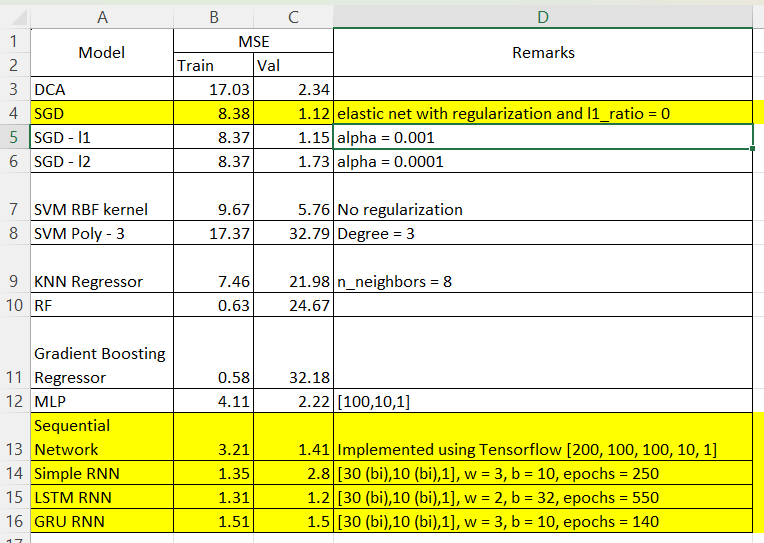

The top 5 models are:
1. SGD
2. Sequential Network
3. Simple RNN 
4. LSTM RNN
5. GRU RNN

Let's check the performance of these models on the test set to decide on the best model

SGD Regressor

In [593]:
mean_squared_error(y_test, sgd_best.predict(X_test_dca))

7.357527507944237

***

Sequential Neural Network

In [595]:
saved_models_path = Path(os.getcwd()) / "best_models_backup"

In [598]:
## Loading the saved sequential model

seq_nn_path = saved_models_path / "sequential.h5"
seq_nn = keras.models.load_model(seq_nn_path)

In [602]:
## Evaluating the saved sequential model on test set
mean_squared_error(y_test, seq_nn.predict(X_test_dca))

9/9 [==============================] - 0s 2ms/step


12.382504734689753

***

### Creating a function to get the mse on test dataset for saved top RNN models

In [252]:
from collections import defaultdict

save_path = Path(os.getcwd()) / "optimizing_rnn"

def saved_rnn_mse(model_name, X_test, y_test, windows, batch_sizes, folder_path):
    mse_train = defaultdict(tuple)
    
    for batch_size, window in zip(batch_sizes, windows):
        
        model_path = folder_path / f"{model_name}_b{batch_size}_w{window}.h5"
        model = keras.models.load_model(model_path)

        ## Preparing the test dataset
        test_dt = seq_2_seq(X_test, y_test, window, batch_size)

        mse_train[(batch_size, window)] = rnn_mse(model, window, test_dt, y_test, plot = False)
        
    mse_train = sorted(mse_train.items(), key = lambda d: d[1], reverse = False)
    return mse_train

In [257]:
## Getting test scores of top LSTM models
windows = [5,3,2,6,5]
batches = [16, 32, 20, 32, 32]

lstm_test_mse = saved_rnn_mse("lstm", X_test_dca, y_test, windows, batches, save_path)

18/18 [==============================] - 2s 7ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 2s 8ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


15/15 [==============================] - 2s 6ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 2s 8ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 2s 8ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


In [258]:
lstm_test_mse

[((32, 3), 5.645092484197315),
 ((16, 5), 7.905706412368398),
 ((32, 6), 8.467329163230506),
 ((32, 5), 10.416164307677137),
 ((20, 2), 11.803308702323735)]

In [259]:
## Getting test scores of top GRU models
windows = [5, 2, 3, 3, 3]
batches = [20,20,16,10,20]
gru_test_mse = saved_rnn_mse("gru", X_test_dca, y_test, windows, batches, save_path)

15/15 [==============================] - 2s 9ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


15/15 [==============================] - 1s 7ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


18/18 [==============================] - 1s 7ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


29/29 [==============================] - 2s 6ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


15/15 [==============================] - 2s 7ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


In [260]:
gru_test_mse

[((20, 2), 17.663715825422926),
 ((16, 3), 21.248089048686605),
 ((10, 3), 22.02788973083708),
 ((20, 5), 27.296609954014944),
 ((20, 3), 27.92206056199116)]

In [261]:
## Getting test scores of top Simple RNN models
windows = [5, 5, 4, 6, 2]
batches = [8, 16, 32, 10, 20]
simple_rnn_test_mse = saved_rnn_mse("simple_rnn", X_test_dca, y_test, windows, batches, save_path)

36/36 [==============================] - 1s 4ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


18/18 [==============================] - 1s 6ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


9/9 [==============================] - 1s 7ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


29/29 [==============================] - 1s 5ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


15/15 [==============================] - 1s 7ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_11384\2834760343.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return mean_squared_error(y[window_size-1:], preds)


In [262]:
simple_rnn_test_mse

[((20, 2), 48.44979064170314),
 ((8, 5), 132.52865774919727),
 ((16, 5), 166.138961690998),
 ((32, 4), 168.74472992933977),
 ((10, 6), 207.478072181178)]

***